In [1]:
whos

Interactive namespace is empty.


In [2]:
pwd

'/mmfs1/data/aglinska/BC-ABCD-ADHD'

In [3]:
import ants
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt

/data/aglinska/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [4]:
def get_triu(inMat):
    #inMat = rdm_bg

    assert np.ndim(inMat)==2, 'not 2 dim, wtf'
    assert inMat.shape[0]==inMat.shape[1], 'not a square'

    n = inMat.shape[0]
    triu_vec = inMat[np.triu_indices(n=n,k=1)]

    #assert (squareform(triu_vec)==inMat).sum()/(n**2)>.9, 'unfaithful triu'
    return triu_vec

In [5]:
indir = './Data/ABCD-data-use-T0'
folders = [folder for folder in os.listdir(indir) if folder.startswith('sub-')]
print(len(folders))
folders[0:5]

4836


['sub-NDARINVLBWER7ME',
 'sub-NDARINVTT9JRJDR',
 'sub-NDARINVZ8U8TUHJ',
 'sub-NDARINV9AH5WYA7',
 'sub-NDARINV42LK7GJJ']

In [6]:
fn_temp = './Data/ABCD-data-use-T0/{sub}/ses-baselineYear1Arm1/anat/{sub}_ses-baselineYear1Arm1_run-01_T1w.nii'

In [7]:
#im_temp = ants.image_read(fn_temp.format(sub=folders[0]))

In [8]:
im_temp = ants.resample_image(ants.image_read(fn_temp.format(sub=folders[0])),resample_params=(64,64,64),use_voxels=True)

In [9]:
# 256,256,256 memory hog
#anat_arr = [ants.image_read(fn_temp.format(sub=folders[i])).numpy().astype(np.float16) for i in tqdm(range(100))]

In [10]:
nsubs = len(folders)
print(nsubs)

4836


In [11]:
# 64,64,64 and float16 resample
anat_arr = [ants.resample_image(ants.image_read(fn_temp.format(sub=folders[i])),resample_params=(64,64,64),use_voxels=True).numpy().astype(np.float16) for i in tqdm(range(nsubs))]

  0%|          | 0/4836 [00:00<?, ?it/s]

  0%|          | 1/4836 [00:02<3:20:50,  2.49s/it]

  0%|          | 2/4836 [00:05<3:23:34,  2.53s/it]

  0%|          | 3/4836 [00:07<3:27:08,  2.57s/it]

  0%|          | 4/4836 [00:10<3:27:41,  2.58s/it]

  0%|          | 5/4836 [00:12<3:27:00,  2.57s/it]

  0%|          | 6/4836 [00:15<3:25:08,  2.55s/it]

  0%|          | 7/4836 [00:17<3:24:08,  2.54s/it]

  0%|          | 8/4836 [00:20<3:17:16,  2.45s/it]

  0%|          | 9/4836 [00:22<3:17:30,  2.46s/it]

  0%|          | 10/4836 [00:25<3:17:23,  2.45s/it]

  0%|          | 11/4836 [00:27<3:17:37,  2.46s/it]

  0%|          | 12/4836 [00:29<3:18:31,  2.47s/it]

  0%|          | 13/4836 [00:32<3:18:41,  2.47s/it]

  0%|          | 14/4836 [00:34<3:19:31,  2.48s/it]

  0%|          | 15/4836 [00:37<3:18:26,  2.47s/it]

  0%|          | 16/4836 [00:39<3:18:39,  2.47s/it]

  0%|          | 17/4836 [00:42<3:17:52,  2.46s/it]

  0%|          | 18/4836 [00:44<3:18:01,  2.47s/it]

  0%|          | 19/4836 [00:47<3:17:34,  2.46s/it]

  0%|          | 20/4836 [00:49<3:09:33,  2.36s/it]

  0%|          | 21/4836 [00:51<3:11:28,  2.39s/it]

  0%|          | 22/4836 [00:54<3:12:47,  2.40s/it]

  0%|          | 23/4836 [00:56<3:12:01,  2.39s/it]

  0%|          | 24/4836 [00:59<3:12:06,  2.40s/it]

  1%|          | 25/4836 [01:01<3:14:08,  2.42s/it]

  1%|          | 26/4836 [01:03<3:13:46,  2.42s/it]

  1%|          | 27/4836 [01:06<3:14:50,  2.43s/it]

  1%|          | 28/4836 [01:08<3:14:01,  2.42s/it]

  1%|          | 29/4836 [01:11<3:11:28,  2.39s/it]

  1%|          | 30/4836 [01:13<3:10:28,  2.38s/it]

  1%|          | 31/4836 [01:15<3:13:06,  2.41s/it]

  1%|          | 32/4836 [01:18<3:13:18,  2.41s/it]

  1%|          | 33/4836 [01:20<3:13:31,  2.42s/it]

  1%|          | 34/4836 [01:23<3:13:55,  2.42s/it]

  1%|          | 35/4836 [01:25<3:15:57,  2.45s/it]

  1%|          | 36/4836 [01:28<3:16:27,  2.46s/it]

  1%|          | 37/4836 [01:30<3:14:39,  2.43s/it]

  1%|          | 38/4836 [01:33<3:15:38,  2.45s/it]

  1%|          | 39/4836 [01:35<3:16:27,  2.46s/it]

  1%|          | 40/4836 [01:38<3:16:23,  2.46s/it]

  1%|          | 41/4836 [01:40<3:15:55,  2.45s/it]

  1%|          | 42/4836 [01:42<3:15:24,  2.45s/it]

  1%|          | 43/4836 [01:45<3:16:05,  2.45s/it]

  1%|          | 44/4836 [01:47<3:16:24,  2.46s/it]

  1%|          | 45/4836 [01:50<3:15:59,  2.45s/it]

  1%|          | 46/4836 [01:52<3:11:24,  2.40s/it]

  1%|          | 47/4836 [01:54<3:12:30,  2.41s/it]

  1%|          | 48/4836 [01:57<3:12:33,  2.41s/it]

  1%|          | 49/4836 [01:59<3:12:58,  2.42s/it]

  1%|          | 50/4836 [02:02<3:12:24,  2.41s/it]

  1%|          | 51/4836 [02:04<3:12:55,  2.42s/it]

  1%|          | 52/4836 [02:07<3:13:39,  2.43s/it]

  1%|          | 53/4836 [02:09<3:14:42,  2.44s/it]

  1%|          | 54/4836 [02:12<3:15:53,  2.46s/it]

  1%|          | 55/4836 [02:14<3:15:17,  2.45s/it]

  1%|          | 56/4836 [02:16<3:13:54,  2.43s/it]

  1%|          | 57/4836 [02:19<3:16:23,  2.47s/it]

  1%|          | 58/4836 [02:21<3:17:37,  2.48s/it]

  1%|          | 59/4836 [02:24<3:17:02,  2.47s/it]

  1%|          | 60/4836 [02:26<3:16:44,  2.47s/it]

  1%|▏         | 61/4836 [02:29<3:16:26,  2.47s/it]

  1%|▏         | 62/4836 [02:31<3:15:32,  2.46s/it]

  1%|▏         | 63/4836 [02:34<3:10:51,  2.40s/it]

  1%|▏         | 64/4836 [02:36<3:12:12,  2.42s/it]

  1%|▏         | 65/4836 [02:38<3:12:51,  2.43s/it]

  1%|▏         | 66/4836 [02:41<3:14:58,  2.45s/it]

  1%|▏         | 67/4836 [02:43<3:14:08,  2.44s/it]

  1%|▏         | 68/4836 [02:46<3:15:14,  2.46s/it]

  1%|▏         | 69/4836 [02:48<3:11:01,  2.40s/it]

  1%|▏         | 70/4836 [02:51<3:12:27,  2.42s/it]

  1%|▏         | 71/4836 [02:53<3:12:29,  2.42s/it]

  1%|▏         | 72/4836 [02:56<3:13:45,  2.44s/it]

  2%|▏         | 73/4836 [02:58<3:13:53,  2.44s/it]

  2%|▏         | 74/4836 [03:00<3:13:01,  2.43s/it]

  2%|▏         | 75/4836 [03:03<3:12:41,  2.43s/it]

  2%|▏         | 76/4836 [03:05<3:12:11,  2.42s/it]

  2%|▏         | 77/4836 [03:08<3:13:42,  2.44s/it]

  2%|▏         | 78/4836 [03:10<3:13:42,  2.44s/it]

  2%|▏         | 79/4836 [03:12<3:11:48,  2.42s/it]

  2%|▏         | 80/4836 [03:15<3:10:54,  2.41s/it]

  2%|▏         | 81/4836 [03:17<3:13:21,  2.44s/it]

  2%|▏         | 82/4836 [03:20<3:15:42,  2.47s/it]

  2%|▏         | 83/4836 [03:22<3:14:29,  2.46s/it]

  2%|▏         | 84/4836 [03:25<3:13:02,  2.44s/it]

  2%|▏         | 85/4836 [03:27<3:10:17,  2.40s/it]

  2%|▏         | 86/4836 [03:30<3:12:00,  2.43s/it]

  2%|▏         | 87/4836 [03:32<3:12:59,  2.44s/it]

  2%|▏         | 88/4836 [03:35<3:14:39,  2.46s/it]

  2%|▏         | 89/4836 [03:37<3:14:11,  2.45s/it]

  2%|▏         | 90/4836 [03:39<3:14:12,  2.46s/it]

  2%|▏         | 91/4836 [03:42<3:15:05,  2.47s/it]

  2%|▏         | 92/4836 [03:44<3:15:21,  2.47s/it]

  2%|▏         | 93/4836 [03:47<3:16:18,  2.48s/it]

  2%|▏         | 94/4836 [03:49<3:17:02,  2.49s/it]

  2%|▏         | 95/4836 [03:52<3:14:42,  2.46s/it]

  2%|▏         | 96/4836 [03:54<3:14:42,  2.46s/it]

  2%|▏         | 97/4836 [03:57<3:15:59,  2.48s/it]

  2%|▏         | 98/4836 [03:59<3:15:03,  2.47s/it]

  2%|▏         | 99/4836 [04:02<3:14:40,  2.47s/it]

  2%|▏         | 100/4836 [04:04<3:14:17,  2.46s/it]

  2%|▏         | 101/4836 [04:07<3:14:18,  2.46s/it]

  2%|▏         | 102/4836 [04:09<3:14:57,  2.47s/it]

  2%|▏         | 103/4836 [04:12<3:14:29,  2.47s/it]

  2%|▏         | 104/4836 [04:14<3:14:36,  2.47s/it]

  2%|▏         | 105/4836 [04:17<3:15:12,  2.48s/it]

  2%|▏         | 106/4836 [04:19<3:16:18,  2.49s/it]

  2%|▏         | 107/4836 [04:21<3:14:11,  2.46s/it]

  2%|▏         | 108/4836 [04:24<3:14:34,  2.47s/it]

  2%|▏         | 109/4836 [04:26<3:11:52,  2.44s/it]

  2%|▏         | 110/4836 [04:29<3:06:48,  2.37s/it]

  2%|▏         | 111/4836 [04:31<3:09:01,  2.40s/it]

  2%|▏         | 112/4836 [04:33<3:09:30,  2.41s/it]

  2%|▏         | 113/4836 [04:36<3:11:06,  2.43s/it]

  2%|▏         | 114/4836 [04:38<3:05:53,  2.36s/it]

  2%|▏         | 115/4836 [04:40<3:02:50,  2.32s/it]

  2%|▏         | 116/4836 [04:43<3:01:25,  2.31s/it]

  2%|▏         | 117/4836 [04:45<3:01:38,  2.31s/it]

  2%|▏         | 118/4836 [04:47<3:05:39,  2.36s/it]

  2%|▏         | 119/4836 [04:49<2:56:54,  2.25s/it]

  2%|▏         | 120/4836 [04:52<3:00:08,  2.29s/it]

  3%|▎         | 121/4836 [04:54<2:59:34,  2.29s/it]

  3%|▎         | 122/4836 [04:57<3:03:59,  2.34s/it]

  3%|▎         | 123/4836 [04:59<3:02:42,  2.33s/it]

  3%|▎         | 124/4836 [05:01<3:06:35,  2.38s/it]

  3%|▎         | 125/4836 [05:03<3:01:16,  2.31s/it]

  3%|▎         | 126/4836 [05:06<3:04:43,  2.35s/it]

  3%|▎         | 127/4836 [05:08<3:08:02,  2.40s/it]

  3%|▎         | 128/4836 [05:11<3:10:22,  2.43s/it]

  3%|▎         | 129/4836 [05:13<3:05:36,  2.37s/it]

  3%|▎         | 130/4836 [05:16<3:09:25,  2.42s/it]

  3%|▎         | 131/4836 [05:18<3:09:15,  2.41s/it]

  3%|▎         | 132/4836 [05:21<3:12:14,  2.45s/it]

  3%|▎         | 133/4836 [05:23<3:13:24,  2.47s/it]

  3%|▎         | 134/4836 [05:26<3:14:05,  2.48s/it]

  3%|▎         | 135/4836 [05:28<3:15:53,  2.50s/it]

  3%|▎         | 136/4836 [05:31<3:16:07,  2.50s/it]

  3%|▎         | 137/4836 [05:33<3:17:39,  2.52s/it]

  3%|▎         | 138/4836 [05:36<3:13:45,  2.47s/it]

  3%|▎         | 139/4836 [05:38<3:15:46,  2.50s/it]

  3%|▎         | 140/4836 [05:41<3:15:10,  2.49s/it]

  3%|▎         | 141/4836 [05:42<2:58:47,  2.28s/it]

  3%|▎         | 142/4836 [05:45<2:53:09,  2.21s/it]

  3%|▎         | 143/4836 [05:47<2:56:18,  2.25s/it]

  3%|▎         | 144/4836 [05:49<2:58:58,  2.29s/it]

  3%|▎         | 145/4836 [05:51<2:57:53,  2.28s/it]

  3%|▎         | 146/4836 [05:54<3:03:45,  2.35s/it]

  3%|▎         | 147/4836 [05:56<3:00:23,  2.31s/it]

  3%|▎         | 148/4836 [05:58<2:59:44,  2.30s/it]

  3%|▎         | 149/4836 [06:01<3:00:29,  2.31s/it]

  3%|▎         | 150/4836 [06:03<3:03:26,  2.35s/it]

  3%|▎         | 151/4836 [06:06<3:07:16,  2.40s/it]

  3%|▎         | 152/4836 [06:08<3:03:18,  2.35s/it]

  3%|▎         | 153/4836 [06:11<3:09:05,  2.42s/it]

  3%|▎         | 154/4836 [06:13<3:20:00,  2.56s/it]

  3%|▎         | 155/4836 [06:16<3:18:27,  2.54s/it]

  3%|▎         | 156/4836 [06:18<3:14:22,  2.49s/it]

  3%|▎         | 157/4836 [06:21<3:11:42,  2.46s/it]

  3%|▎         | 158/4836 [06:23<3:13:51,  2.49s/it]

  3%|▎         | 159/4836 [06:26<3:10:19,  2.44s/it]

  3%|▎         | 160/4836 [06:28<3:13:18,  2.48s/it]

  3%|▎         | 161/4836 [06:30<3:06:17,  2.39s/it]

  3%|▎         | 162/4836 [06:33<3:09:49,  2.44s/it]

  3%|▎         | 163/4836 [06:35<3:10:25,  2.45s/it]

  3%|▎         | 164/4836 [06:38<3:11:57,  2.47s/it]

  3%|▎         | 165/4836 [06:41<3:19:46,  2.57s/it]

  3%|▎         | 166/4836 [06:44<3:31:34,  2.72s/it]

  3%|▎         | 167/4836 [06:46<3:26:57,  2.66s/it]

  3%|▎         | 168/4836 [06:49<3:22:13,  2.60s/it]

  3%|▎         | 169/4836 [06:51<3:19:47,  2.57s/it]

  4%|▎         | 170/4836 [06:55<3:40:26,  2.83s/it]

  4%|▎         | 171/4836 [06:57<3:30:12,  2.70s/it]

  4%|▎         | 172/4836 [07:00<3:27:48,  2.67s/it]

  4%|▎         | 173/4836 [07:02<3:24:19,  2.63s/it]

  4%|▎         | 174/4836 [07:04<3:14:11,  2.50s/it]

  4%|▎         | 175/4836 [07:07<3:13:15,  2.49s/it]

  4%|▎         | 176/4836 [07:09<3:11:00,  2.46s/it]

  4%|▎         | 177/4836 [07:12<3:06:40,  2.40s/it]

  4%|▎         | 178/4836 [07:14<3:07:06,  2.41s/it]

  4%|▎         | 179/4836 [07:17<3:26:02,  2.65s/it]

  4%|▎         | 180/4836 [07:19<3:08:06,  2.42s/it]

  4%|▎         | 181/4836 [07:21<3:07:33,  2.42s/it]

  4%|▍         | 182/4836 [07:24<3:02:38,  2.35s/it]

  4%|▍         | 183/4836 [07:26<2:57:37,  2.29s/it]

  4%|▍         | 184/4836 [07:28<2:57:31,  2.29s/it]

  4%|▍         | 185/4836 [07:30<2:57:22,  2.29s/it]

  4%|▍         | 186/4836 [07:33<2:57:58,  2.30s/it]

  4%|▍         | 187/4836 [07:35<2:55:56,  2.27s/it]

  4%|▍         | 188/4836 [07:37<2:55:07,  2.26s/it]

  4%|▍         | 189/4836 [07:40<2:57:40,  2.29s/it]

  4%|▍         | 190/4836 [07:42<3:00:55,  2.34s/it]

  4%|▍         | 191/4836 [07:44<3:04:46,  2.39s/it]

  4%|▍         | 192/4836 [07:47<3:01:24,  2.34s/it]

  4%|▍         | 193/4836 [07:49<2:59:17,  2.32s/it]

  4%|▍         | 194/4836 [07:51<2:59:49,  2.32s/it]

  4%|▍         | 195/4836 [07:54<2:58:53,  2.31s/it]

  4%|▍         | 196/4836 [07:56<3:02:38,  2.36s/it]

  4%|▍         | 197/4836 [07:58<3:03:37,  2.37s/it]

  4%|▍         | 198/4836 [08:01<3:03:42,  2.38s/it]

  4%|▍         | 199/4836 [08:03<2:58:22,  2.31s/it]

  4%|▍         | 200/4836 [08:05<2:56:46,  2.29s/it]

  4%|▍         | 201/4836 [08:07<2:54:38,  2.26s/it]

  4%|▍         | 202/4836 [08:09<2:45:45,  2.15s/it]

  4%|▍         | 203/4836 [08:12<2:53:12,  2.24s/it]

  4%|▍         | 204/4836 [08:14<2:46:43,  2.16s/it]

  4%|▍         | 205/4836 [08:16<2:50:34,  2.21s/it]

  4%|▍         | 206/4836 [08:19<2:57:40,  2.30s/it]

  4%|▍         | 207/4836 [08:21<3:00:13,  2.34s/it]

  4%|▍         | 208/4836 [08:24<3:04:08,  2.39s/it]

  4%|▍         | 209/4836 [08:26<3:04:18,  2.39s/it]

  4%|▍         | 210/4836 [08:28<3:03:19,  2.38s/it]

  4%|▍         | 211/4836 [08:31<3:06:21,  2.42s/it]

  4%|▍         | 212/4836 [08:33<2:58:53,  2.32s/it]

  4%|▍         | 213/4836 [08:35<3:03:46,  2.39s/it]

  4%|▍         | 214/4836 [08:38<3:00:43,  2.35s/it]

  4%|▍         | 215/4836 [08:40<3:02:15,  2.37s/it]

  4%|▍         | 216/4836 [08:43<3:05:17,  2.41s/it]

  4%|▍         | 217/4836 [08:45<3:06:15,  2.42s/it]

  5%|▍         | 218/4836 [08:48<3:08:30,  2.45s/it]

  5%|▍         | 219/4836 [08:49<2:53:06,  2.25s/it]

  5%|▍         | 220/4836 [08:52<2:58:40,  2.32s/it]

  5%|▍         | 221/4836 [08:54<3:00:39,  2.35s/it]

  5%|▍         | 222/4836 [08:56<2:52:09,  2.24s/it]

  5%|▍         | 223/4836 [08:59<2:58:51,  2.33s/it]

  5%|▍         | 224/4836 [09:01<2:55:35,  2.28s/it]

  5%|▍         | 225/4836 [09:03<3:00:11,  2.34s/it]

  5%|▍         | 226/4836 [09:06<3:03:12,  2.38s/it]

  5%|▍         | 227/4836 [09:08<3:03:13,  2.39s/it]

  5%|▍         | 228/4836 [09:11<3:06:19,  2.43s/it]

  5%|▍         | 229/4836 [09:13<3:03:38,  2.39s/it]

  5%|▍         | 230/4836 [09:16<3:04:09,  2.40s/it]

  5%|▍         | 231/4836 [09:18<3:05:42,  2.42s/it]

  5%|▍         | 232/4836 [09:21<3:07:55,  2.45s/it]

  5%|▍         | 233/4836 [09:23<3:07:37,  2.45s/it]

  5%|▍         | 234/4836 [09:26<3:09:52,  2.48s/it]

  5%|▍         | 235/4836 [09:28<3:09:28,  2.47s/it]

  5%|▍         | 236/4836 [09:30<3:09:55,  2.48s/it]

  5%|▍         | 237/4836 [09:33<3:10:46,  2.49s/it]

  5%|▍         | 238/4836 [09:36<3:12:12,  2.51s/it]

  5%|▍         | 239/4836 [09:38<3:12:55,  2.52s/it]

  5%|▍         | 240/4836 [09:40<3:05:54,  2.43s/it]

  5%|▍         | 241/4836 [09:43<3:02:58,  2.39s/it]

  5%|▌         | 242/4836 [09:45<3:01:26,  2.37s/it]

  5%|▌         | 243/4836 [09:47<2:55:29,  2.29s/it]

  5%|▌         | 244/4836 [09:50<3:00:33,  2.36s/it]

  5%|▌         | 245/4836 [09:52<3:01:54,  2.38s/it]

  5%|▌         | 246/4836 [09:54<3:00:47,  2.36s/it]

  5%|▌         | 247/4836 [09:57<2:59:23,  2.35s/it]

  5%|▌         | 248/4836 [09:59<3:00:46,  2.36s/it]

  5%|▌         | 249/4836 [10:01<2:59:46,  2.35s/it]

  5%|▌         | 250/4836 [10:04<3:00:25,  2.36s/it]

  5%|▌         | 251/4836 [10:06<3:03:11,  2.40s/it]

  5%|▌         | 252/4836 [10:09<3:01:06,  2.37s/it]

  5%|▌         | 253/4836 [10:11<3:05:50,  2.43s/it]

  5%|▌         | 254/4836 [10:13<3:04:39,  2.42s/it]

  5%|▌         | 255/4836 [10:16<3:04:42,  2.42s/it]

  5%|▌         | 256/4836 [10:18<3:07:18,  2.45s/it]

  5%|▌         | 257/4836 [10:21<3:07:07,  2.45s/it]

  5%|▌         | 258/4836 [10:23<3:09:09,  2.48s/it]

  5%|▌         | 259/4836 [10:26<3:09:29,  2.48s/it]

  5%|▌         | 260/4836 [10:28<3:09:29,  2.48s/it]

  5%|▌         | 261/4836 [10:31<3:07:25,  2.46s/it]

  5%|▌         | 262/4836 [10:33<3:03:20,  2.41s/it]

  5%|▌         | 263/4836 [10:36<3:05:43,  2.44s/it]

  5%|▌         | 264/4836 [10:38<3:08:42,  2.48s/it]

  5%|▌         | 265/4836 [10:40<3:04:06,  2.42s/it]

  6%|▌         | 266/4836 [10:43<3:05:42,  2.44s/it]

  6%|▌         | 267/4836 [10:45<3:04:29,  2.42s/it]

  6%|▌         | 268/4836 [10:48<3:05:46,  2.44s/it]

  6%|▌         | 269/4836 [10:50<3:07:37,  2.46s/it]

  6%|▌         | 270/4836 [10:53<3:06:14,  2.45s/it]

  6%|▌         | 271/4836 [10:55<3:06:37,  2.45s/it]

  6%|▌         | 272/4836 [10:58<3:08:44,  2.48s/it]

  6%|▌         | 273/4836 [11:00<3:07:40,  2.47s/it]

  6%|▌         | 274/4836 [11:03<3:08:03,  2.47s/it]

  6%|▌         | 275/4836 [11:05<3:10:00,  2.50s/it]

  6%|▌         | 276/4836 [11:08<3:10:14,  2.50s/it]

  6%|▌         | 277/4836 [11:10<3:10:26,  2.51s/it]

  6%|▌         | 278/4836 [11:13<3:08:59,  2.49s/it]

  6%|▌         | 279/4836 [11:15<3:09:49,  2.50s/it]

  6%|▌         | 280/4836 [11:18<3:10:17,  2.51s/it]

  6%|▌         | 281/4836 [11:20<3:10:58,  2.52s/it]

  6%|▌         | 282/4836 [11:23<3:09:55,  2.50s/it]

  6%|▌         | 283/4836 [11:25<3:05:46,  2.45s/it]

  6%|▌         | 284/4836 [11:27<3:02:28,  2.41s/it]

  6%|▌         | 285/4836 [11:30<3:04:54,  2.44s/it]

  6%|▌         | 286/4836 [11:32<3:06:21,  2.46s/it]

  6%|▌         | 287/4836 [11:35<3:07:21,  2.47s/it]

  6%|▌         | 288/4836 [11:37<3:06:37,  2.46s/it]

  6%|▌         | 289/4836 [11:40<3:07:48,  2.48s/it]

  6%|▌         | 290/4836 [11:42<2:55:34,  2.32s/it]

  6%|▌         | 291/4836 [11:44<2:54:07,  2.30s/it]

  6%|▌         | 292/4836 [11:46<2:49:58,  2.24s/it]

  6%|▌         | 293/4836 [11:48<2:49:25,  2.24s/it]

  6%|▌         | 294/4836 [11:51<2:47:50,  2.22s/it]

  6%|▌         | 295/4836 [11:53<2:49:05,  2.23s/it]

  6%|▌         | 296/4836 [11:55<2:54:49,  2.31s/it]

  6%|▌         | 297/4836 [11:58<2:59:40,  2.38s/it]

  6%|▌         | 298/4836 [12:00<3:05:41,  2.46s/it]

  6%|▌         | 299/4836 [12:03<3:06:17,  2.46s/it]

  6%|▌         | 300/4836 [12:05<3:02:59,  2.42s/it]

  6%|▌         | 301/4836 [12:08<3:02:36,  2.42s/it]

  6%|▌         | 302/4836 [12:10<3:08:36,  2.50s/it]

  6%|▋         | 303/4836 [12:13<3:05:41,  2.46s/it]

  6%|▋         | 304/4836 [12:15<3:07:18,  2.48s/it]

  6%|▋         | 305/4836 [12:18<3:08:09,  2.49s/it]

  6%|▋         | 306/4836 [12:20<3:09:22,  2.51s/it]

  6%|▋         | 307/4836 [12:23<3:09:36,  2.51s/it]

  6%|▋         | 308/4836 [12:25<3:05:03,  2.45s/it]

  6%|▋         | 309/4836 [12:28<3:04:49,  2.45s/it]

  6%|▋         | 310/4836 [12:30<3:06:07,  2.47s/it]

  6%|▋         | 311/4836 [12:33<3:04:20,  2.44s/it]

  6%|▋         | 312/4836 [12:35<3:05:53,  2.47s/it]

  6%|▋         | 313/4836 [12:38<3:07:46,  2.49s/it]

  6%|▋         | 314/4836 [12:40<3:06:22,  2.47s/it]

  7%|▋         | 315/4836 [12:43<3:07:37,  2.49s/it]

  7%|▋         | 316/4836 [12:45<3:07:15,  2.49s/it]

  7%|▋         | 317/4836 [12:48<3:08:21,  2.50s/it]

  7%|▋         | 318/4836 [12:50<3:08:53,  2.51s/it]

  7%|▋         | 319/4836 [12:53<3:09:21,  2.52s/it]

  7%|▋         | 320/4836 [12:55<3:09:24,  2.52s/it]

  7%|▋         | 321/4836 [12:58<3:27:30,  2.76s/it]

  7%|▋         | 322/4836 [13:01<3:21:49,  2.68s/it]

  7%|▋         | 323/4836 [13:03<3:17:10,  2.62s/it]

  7%|▋         | 324/4836 [13:06<3:10:42,  2.54s/it]

  7%|▋         | 325/4836 [13:08<3:08:22,  2.51s/it]

  7%|▋         | 326/4836 [13:11<3:08:20,  2.51s/it]

  7%|▋         | 327/4836 [13:13<3:12:39,  2.56s/it]

  7%|▋         | 328/4836 [13:16<3:05:00,  2.46s/it]

  7%|▋         | 329/4836 [13:18<3:04:47,  2.46s/it]

  7%|▋         | 330/4836 [13:21<3:06:35,  2.48s/it]

  7%|▋         | 331/4836 [13:23<3:07:18,  2.49s/it]

  7%|▋         | 332/4836 [13:26<3:07:42,  2.50s/it]

  7%|▋         | 333/4836 [13:28<3:06:08,  2.48s/it]

  7%|▋         | 334/4836 [13:31<3:07:29,  2.50s/it]

  7%|▋         | 335/4836 [13:33<2:57:29,  2.37s/it]

  7%|▋         | 336/4836 [13:35<3:01:04,  2.41s/it]

  7%|▋         | 337/4836 [13:37<2:54:15,  2.32s/it]

  7%|▋         | 338/4836 [13:40<2:58:42,  2.38s/it]

  7%|▋         | 339/4836 [13:42<3:00:09,  2.40s/it]

  7%|▋         | 340/4836 [13:45<3:00:47,  2.41s/it]

  7%|▋         | 341/4836 [13:47<3:00:32,  2.41s/it]

  7%|▋         | 342/4836 [13:49<2:55:40,  2.35s/it]

  7%|▋         | 343/4836 [13:52<2:59:57,  2.40s/it]

  7%|▋         | 344/4836 [13:54<3:02:43,  2.44s/it]

  7%|▋         | 345/4836 [13:57<3:03:24,  2.45s/it]

  7%|▋         | 346/4836 [13:59<3:03:41,  2.45s/it]

  7%|▋         | 347/4836 [14:02<3:05:40,  2.48s/it]

  7%|▋         | 348/4836 [14:04<3:07:01,  2.50s/it]

  7%|▋         | 349/4836 [14:07<3:07:33,  2.51s/it]

  7%|▋         | 350/4836 [14:09<3:04:40,  2.47s/it]

  7%|▋         | 351/4836 [14:12<2:58:04,  2.38s/it]

  7%|▋         | 352/4836 [14:14<2:56:26,  2.36s/it]

  7%|▋         | 353/4836 [14:16<3:00:48,  2.42s/it]

  7%|▋         | 354/4836 [14:19<3:00:53,  2.42s/it]

  7%|▋         | 355/4836 [14:21<3:02:35,  2.44s/it]

  7%|▋         | 356/4836 [14:24<3:04:03,  2.46s/it]

  7%|▋         | 357/4836 [14:26<3:03:59,  2.46s/it]

  7%|▋         | 358/4836 [14:29<3:05:22,  2.48s/it]

  7%|▋         | 359/4836 [14:31<3:04:28,  2.47s/it]

  7%|▋         | 360/4836 [14:34<3:00:38,  2.42s/it]

  7%|▋         | 361/4836 [14:36<3:03:42,  2.46s/it]

  7%|▋         | 362/4836 [14:39<3:05:48,  2.49s/it]

  8%|▊         | 363/4836 [14:41<3:03:18,  2.46s/it]

  8%|▊         | 364/4836 [14:44<3:04:51,  2.48s/it]

  8%|▊         | 365/4836 [14:46<3:04:56,  2.48s/it]

  8%|▊         | 366/4836 [14:49<3:06:41,  2.51s/it]

  8%|▊         | 367/4836 [14:51<2:53:24,  2.33s/it]

  8%|▊         | 368/4836 [14:53<2:57:44,  2.39s/it]

  8%|▊         | 369/4836 [14:56<2:59:57,  2.42s/it]

  8%|▊         | 370/4836 [14:57<2:48:10,  2.26s/it]

  8%|▊         | 371/4836 [15:00<2:45:57,  2.23s/it]

  8%|▊         | 372/4836 [15:02<2:47:37,  2.25s/it]

  8%|▊         | 373/4836 [15:04<2:46:16,  2.24s/it]

  8%|▊         | 374/4836 [15:06<2:44:01,  2.21s/it]

  8%|▊         | 375/4836 [15:08<2:44:26,  2.21s/it]

  8%|▊         | 376/4836 [15:11<2:46:14,  2.24s/it]

  8%|▊         | 377/4836 [15:13<2:51:23,  2.31s/it]

  8%|▊         | 378/4836 [15:16<2:53:29,  2.34s/it]

  8%|▊         | 379/4836 [15:18<2:52:41,  2.32s/it]

  8%|▊         | 380/4836 [15:20<2:56:00,  2.37s/it]

  8%|▊         | 381/4836 [15:23<2:59:58,  2.42s/it]

  8%|▊         | 382/4836 [15:25<3:01:47,  2.45s/it]

  8%|▊         | 383/4836 [15:28<3:03:30,  2.47s/it]

  8%|▊         | 384/4836 [15:30<2:59:57,  2.43s/it]

  8%|▊         | 385/4836 [15:33<3:01:28,  2.45s/it]

  8%|▊         | 386/4836 [15:35<3:03:11,  2.47s/it]

  8%|▊         | 387/4836 [15:38<3:03:50,  2.48s/it]

  8%|▊         | 388/4836 [15:40<2:59:49,  2.43s/it]

  8%|▊         | 389/4836 [15:43<3:00:49,  2.44s/it]

  8%|▊         | 390/4836 [15:45<3:02:30,  2.46s/it]

  8%|▊         | 391/4836 [15:48<3:04:11,  2.49s/it]

  8%|▊         | 392/4836 [15:50<2:56:53,  2.39s/it]

  8%|▊         | 393/4836 [15:52<2:59:48,  2.43s/it]

  8%|▊         | 394/4836 [15:55<2:57:36,  2.40s/it]

  8%|▊         | 395/4836 [15:57<3:00:30,  2.44s/it]

  8%|▊         | 396/4836 [16:00<2:59:59,  2.43s/it]

  8%|▊         | 397/4836 [16:02<3:02:07,  2.46s/it]

  8%|▊         | 398/4836 [16:05<3:02:56,  2.47s/it]

  8%|▊         | 399/4836 [16:07<2:54:01,  2.35s/it]

  8%|▊         | 400/4836 [16:09<2:57:31,  2.40s/it]

  8%|▊         | 401/4836 [16:12<3:00:11,  2.44s/it]

  8%|▊         | 402/4836 [16:14<3:01:53,  2.46s/it]

  8%|▊         | 403/4836 [16:17<2:59:55,  2.44s/it]

  8%|▊         | 404/4836 [16:19<3:04:12,  2.49s/it]

  8%|▊         | 405/4836 [16:22<3:01:57,  2.46s/it]

  8%|▊         | 406/4836 [16:24<3:01:41,  2.46s/it]

  8%|▊         | 407/4836 [16:27<3:02:57,  2.48s/it]

  8%|▊         | 408/4836 [16:29<3:00:47,  2.45s/it]

  8%|▊         | 409/4836 [16:31<2:53:46,  2.36s/it]

  8%|▊         | 410/4836 [16:34<2:56:14,  2.39s/it]

  8%|▊         | 411/4836 [16:36<2:57:06,  2.40s/it]

  9%|▊         | 412/4836 [16:38<2:53:27,  2.35s/it]

  9%|▊         | 413/4836 [16:40<2:48:08,  2.28s/it]

  9%|▊         | 414/4836 [16:43<2:46:51,  2.26s/it]

  9%|▊         | 415/4836 [16:45<2:48:57,  2.29s/it]

  9%|▊         | 416/4836 [16:47<2:45:21,  2.24s/it]

  9%|▊         | 417/4836 [16:49<2:40:34,  2.18s/it]

  9%|▊         | 418/4836 [16:51<2:40:00,  2.17s/it]

  9%|▊         | 419/4836 [16:54<2:41:57,  2.20s/it]

  9%|▊         | 420/4836 [16:56<2:48:25,  2.29s/it]

  9%|▊         | 421/4836 [16:58<2:48:48,  2.29s/it]

  9%|▊         | 422/4836 [17:01<2:53:21,  2.36s/it]

  9%|▊         | 423/4836 [17:03<2:55:59,  2.39s/it]

  9%|▉         | 424/4836 [17:06<2:54:51,  2.38s/it]

  9%|▉         | 425/4836 [17:08<2:57:16,  2.41s/it]

  9%|▉         | 426/4836 [17:10<2:52:12,  2.34s/it]

  9%|▉         | 427/4836 [17:13<2:48:00,  2.29s/it]

  9%|▉         | 428/4836 [17:15<2:50:04,  2.32s/it]

  9%|▉         | 429/4836 [17:17<2:54:36,  2.38s/it]

  9%|▉         | 430/4836 [17:20<2:58:36,  2.43s/it]

  9%|▉         | 431/4836 [17:23<3:00:37,  2.46s/it]

  9%|▉         | 432/4836 [17:25<3:03:44,  2.50s/it]

  9%|▉         | 433/4836 [17:28<3:04:16,  2.51s/it]

  9%|▉         | 434/4836 [17:30<3:04:33,  2.52s/it]

  9%|▉         | 435/4836 [17:33<3:05:42,  2.53s/it]

  9%|▉         | 436/4836 [17:35<3:05:39,  2.53s/it]

  9%|▉         | 437/4836 [17:38<3:06:34,  2.54s/it]

  9%|▉         | 438/4836 [17:41<3:13:29,  2.64s/it]

  9%|▉         | 439/4836 [17:43<3:11:00,  2.61s/it]

  9%|▉         | 440/4836 [17:46<3:09:44,  2.59s/it]

  9%|▉         | 441/4836 [17:49<3:13:54,  2.65s/it]

  9%|▉         | 442/4836 [17:51<3:11:28,  2.61s/it]

  9%|▉         | 443/4836 [17:54<3:10:01,  2.60s/it]

  9%|▉         | 444/4836 [17:56<3:09:25,  2.59s/it]

  9%|▉         | 445/4836 [17:59<3:07:37,  2.56s/it]

  9%|▉         | 446/4836 [18:01<3:07:01,  2.56s/it]

  9%|▉         | 447/4836 [18:04<3:06:42,  2.55s/it]

  9%|▉         | 448/4836 [18:06<3:02:21,  2.49s/it]

  9%|▉         | 449/4836 [18:09<3:00:04,  2.46s/it]

  9%|▉         | 450/4836 [18:11<3:01:38,  2.48s/it]

  9%|▉         | 451/4836 [18:14<3:02:09,  2.49s/it]

  9%|▉         | 452/4836 [18:16<3:02:54,  2.50s/it]

  9%|▉         | 453/4836 [18:19<2:59:16,  2.45s/it]

  9%|▉         | 454/4836 [18:21<3:00:24,  2.47s/it]

  9%|▉         | 455/4836 [18:23<2:56:28,  2.42s/it]

  9%|▉         | 456/4836 [18:26<2:55:47,  2.41s/it]

  9%|▉         | 457/4836 [18:28<3:01:00,  2.48s/it]

  9%|▉         | 458/4836 [18:31<3:00:55,  2.48s/it]

  9%|▉         | 459/4836 [18:33<3:01:47,  2.49s/it]

 10%|▉         | 460/4836 [18:36<3:01:24,  2.49s/it]

 10%|▉         | 461/4836 [18:39<3:20:55,  2.76s/it]

 10%|▉         | 462/4836 [18:42<3:12:40,  2.64s/it]

 10%|▉         | 463/4836 [18:44<3:08:56,  2.59s/it]

 10%|▉         | 464/4836 [18:47<3:07:12,  2.57s/it]

 10%|▉         | 465/4836 [18:49<3:06:22,  2.56s/it]

 10%|▉         | 466/4836 [18:51<3:02:27,  2.51s/it]

 10%|▉         | 467/4836 [18:54<3:02:05,  2.50s/it]

 10%|▉         | 468/4836 [18:57<3:03:05,  2.51s/it]

 10%|▉         | 469/4836 [18:59<2:59:49,  2.47s/it]

 10%|▉         | 470/4836 [19:01<3:00:53,  2.49s/it]

 10%|▉         | 471/4836 [19:04<3:01:11,  2.49s/it]

 10%|▉         | 472/4836 [19:06<2:58:36,  2.46s/it]

 10%|▉         | 473/4836 [19:09<3:00:07,  2.48s/it]

 10%|▉         | 474/4836 [19:11<2:57:21,  2.44s/it]

 10%|▉         | 475/4836 [19:14<2:57:50,  2.45s/it]

 10%|▉         | 476/4836 [19:16<2:57:02,  2.44s/it]

 10%|▉         | 477/4836 [19:18<2:51:05,  2.36s/it]

 10%|▉         | 478/4836 [19:21<2:49:52,  2.34s/it]

 10%|▉         | 479/4836 [19:23<2:47:47,  2.31s/it]

 10%|▉         | 480/4836 [19:25<2:51:34,  2.36s/it]

 10%|▉         | 481/4836 [19:28<2:50:51,  2.35s/it]

 10%|▉         | 482/4836 [19:30<2:48:11,  2.32s/it]

 10%|▉         | 483/4836 [19:32<2:53:29,  2.39s/it]

 10%|█         | 484/4836 [19:34<2:46:28,  2.30s/it]

 10%|█         | 485/4836 [19:37<2:44:21,  2.27s/it]

 10%|█         | 486/4836 [19:39<2:41:26,  2.23s/it]

 10%|█         | 487/4836 [19:41<2:45:44,  2.29s/it]

 10%|█         | 488/4836 [19:44<2:47:23,  2.31s/it]

 10%|█         | 489/4836 [19:46<2:50:28,  2.35s/it]

 10%|█         | 490/4836 [19:48<2:45:37,  2.29s/it]

 10%|█         | 491/4836 [19:50<2:46:05,  2.29s/it]

 10%|█         | 492/4836 [19:53<2:45:31,  2.29s/it]

 10%|█         | 493/4836 [19:55<2:48:48,  2.33s/it]

 10%|█         | 494/4836 [19:57<2:45:13,  2.28s/it]

 10%|█         | 495/4836 [20:00<2:49:05,  2.34s/it]

 10%|█         | 496/4836 [20:02<2:50:56,  2.36s/it]

 10%|█         | 497/4836 [20:05<2:52:48,  2.39s/it]

 10%|█         | 498/4836 [20:07<2:54:41,  2.42s/it]

 10%|█         | 499/4836 [20:10<2:56:19,  2.44s/it]

 10%|█         | 500/4836 [20:12<2:57:06,  2.45s/it]

 10%|█         | 501/4836 [20:15<2:55:37,  2.43s/it]

 10%|█         | 502/4836 [20:17<2:55:27,  2.43s/it]

 10%|█         | 503/4836 [20:20<3:01:58,  2.52s/it]

 10%|█         | 504/4836 [20:22<2:59:53,  2.49s/it]

 10%|█         | 505/4836 [20:25<3:02:04,  2.52s/it]

 10%|█         | 506/4836 [20:27<3:00:56,  2.51s/it]

 10%|█         | 507/4836 [20:30<3:01:07,  2.51s/it]

 11%|█         | 508/4836 [20:32<3:00:19,  2.50s/it]

 11%|█         | 509/4836 [20:34<2:54:10,  2.42s/it]

 11%|█         | 510/4836 [20:37<2:55:48,  2.44s/it]

 11%|█         | 511/4836 [20:39<2:57:40,  2.46s/it]

 11%|█         | 512/4836 [20:42<2:55:22,  2.43s/it]

 11%|█         | 513/4836 [20:44<2:57:28,  2.46s/it]

 11%|█         | 514/4836 [20:47<2:58:14,  2.47s/it]

 11%|█         | 515/4836 [20:49<2:53:12,  2.41s/it]

 11%|█         | 516/4836 [20:52<2:55:42,  2.44s/it]

 11%|█         | 517/4836 [20:54<2:57:24,  2.46s/it]

 11%|█         | 518/4836 [20:56<2:55:25,  2.44s/it]

 11%|█         | 519/4836 [20:59<2:57:17,  2.46s/it]

 11%|█         | 520/4836 [21:01<2:49:06,  2.35s/it]

 11%|█         | 521/4836 [21:03<2:48:57,  2.35s/it]

 11%|█         | 522/4836 [21:06<2:51:00,  2.38s/it]

 11%|█         | 523/4836 [21:08<2:52:56,  2.41s/it]

 11%|█         | 524/4836 [21:11<2:55:33,  2.44s/it]

 11%|█         | 525/4836 [21:13<2:56:57,  2.46s/it]

 11%|█         | 526/4836 [21:16<2:57:56,  2.48s/it]

 11%|█         | 527/4836 [21:18<2:58:07,  2.48s/it]

 11%|█         | 528/4836 [21:21<3:00:05,  2.51s/it]

 11%|█         | 529/4836 [21:23<3:00:33,  2.52s/it]

 11%|█         | 530/4836 [21:27<3:20:00,  2.79s/it]

 11%|█         | 531/4836 [21:29<3:13:05,  2.69s/it]

 11%|█         | 532/4836 [21:32<3:09:31,  2.64s/it]

 11%|█         | 533/4836 [21:34<3:07:31,  2.61s/it]

 11%|█         | 534/4836 [21:37<3:06:29,  2.60s/it]

 11%|█         | 535/4836 [21:39<3:04:02,  2.57s/it]

 11%|█         | 536/4836 [21:42<3:02:11,  2.54s/it]

 11%|█         | 537/4836 [21:44<3:00:35,  2.52s/it]

 11%|█         | 538/4836 [21:47<2:58:24,  2.49s/it]

 11%|█         | 539/4836 [21:49<2:59:09,  2.50s/it]

 11%|█         | 540/4836 [21:52<2:59:06,  2.50s/it]

 11%|█         | 541/4836 [21:54<2:58:58,  2.50s/it]

 11%|█         | 542/4836 [21:57<2:59:13,  2.50s/it]

 11%|█         | 543/4836 [21:59<2:59:42,  2.51s/it]

 11%|█         | 544/4836 [22:02<2:59:42,  2.51s/it]

 11%|█▏        | 545/4836 [22:05<3:00:45,  2.53s/it]

 11%|█▏        | 546/4836 [22:07<2:59:35,  2.51s/it]

 11%|█▏        | 547/4836 [22:09<2:54:51,  2.45s/it]

 11%|█▏        | 548/4836 [22:12<2:56:40,  2.47s/it]

 11%|█▏        | 549/4836 [22:14<2:57:44,  2.49s/it]

 11%|█▏        | 550/4836 [22:17<3:00:53,  2.53s/it]

 11%|█▏        | 551/4836 [22:20<3:01:35,  2.54s/it]

 11%|█▏        | 552/4836 [22:22<3:01:35,  2.54s/it]

 11%|█▏        | 553/4836 [22:25<3:01:00,  2.54s/it]

 11%|█▏        | 554/4836 [22:27<3:00:56,  2.54s/it]

 11%|█▏        | 555/4836 [22:30<2:59:22,  2.51s/it]

 11%|█▏        | 556/4836 [22:32<2:59:22,  2.51s/it]

 12%|█▏        | 557/4836 [22:35<2:57:48,  2.49s/it]

 12%|█▏        | 558/4836 [22:37<2:58:55,  2.51s/it]

 12%|█▏        | 559/4836 [22:40<2:57:39,  2.49s/it]

 12%|█▏        | 560/4836 [22:42<2:57:49,  2.50s/it]

 12%|█▏        | 561/4836 [22:45<2:57:27,  2.49s/it]

 12%|█▏        | 562/4836 [22:47<2:59:01,  2.51s/it]

 12%|█▏        | 563/4836 [22:50<2:58:01,  2.50s/it]

 12%|█▏        | 564/4836 [22:52<2:58:24,  2.51s/it]

 12%|█▏        | 565/4836 [22:55<2:57:05,  2.49s/it]

 12%|█▏        | 566/4836 [22:57<2:48:55,  2.37s/it]

 12%|█▏        | 567/4836 [22:59<2:52:07,  2.42s/it]

 12%|█▏        | 568/4836 [23:02<2:54:45,  2.46s/it]

 12%|█▏        | 569/4836 [23:04<2:56:42,  2.48s/it]

 12%|█▏        | 570/4836 [23:07<2:57:39,  2.50s/it]

 12%|█▏        | 571/4836 [23:09<2:58:13,  2.51s/it]

 12%|█▏        | 572/4836 [23:12<2:58:50,  2.52s/it]

 12%|█▏        | 573/4836 [23:14<2:58:15,  2.51s/it]

 12%|█▏        | 574/4836 [23:17<2:58:09,  2.51s/it]

 12%|█▏        | 575/4836 [23:19<2:52:57,  2.44s/it]

 12%|█▏        | 576/4836 [23:21<2:51:08,  2.41s/it]

 12%|█▏        | 577/4836 [23:24<2:52:16,  2.43s/it]

 12%|█▏        | 578/4836 [23:26<2:51:36,  2.42s/it]

 12%|█▏        | 579/4836 [23:29<2:55:49,  2.48s/it]

 12%|█▏        | 580/4836 [23:31<2:55:10,  2.47s/it]

 12%|█▏        | 581/4836 [23:34<2:53:40,  2.45s/it]

 12%|█▏        | 582/4836 [23:36<2:55:21,  2.47s/it]

 12%|█▏        | 583/4836 [23:39<2:54:40,  2.46s/it]

 12%|█▏        | 584/4836 [23:41<2:55:50,  2.48s/it]

 12%|█▏        | 585/4836 [23:44<2:55:13,  2.47s/it]

 12%|█▏        | 586/4836 [23:46<2:50:21,  2.41s/it]

 12%|█▏        | 587/4836 [23:48<2:51:59,  2.43s/it]

 12%|█▏        | 588/4836 [23:50<2:41:15,  2.28s/it]

 12%|█▏        | 589/4836 [23:53<2:41:11,  2.28s/it]

 12%|█▏        | 590/4836 [23:55<2:40:20,  2.27s/it]

 12%|█▏        | 591/4836 [23:57<2:40:06,  2.26s/it]

 12%|█▏        | 592/4836 [23:59<2:32:07,  2.15s/it]

 12%|█▏        | 593/4836 [24:01<2:37:09,  2.22s/it]

 12%|█▏        | 594/4836 [24:03<2:29:21,  2.11s/it]

 12%|█▏        | 595/4836 [24:06<2:37:41,  2.23s/it]

 12%|█▏        | 596/4836 [24:08<2:46:12,  2.35s/it]

 12%|█▏        | 597/4836 [24:11<2:49:36,  2.40s/it]

 12%|█▏        | 598/4836 [24:13<2:51:45,  2.43s/it]

 12%|█▏        | 599/4836 [24:16<2:51:23,  2.43s/it]

 12%|█▏        | 600/4836 [24:18<2:51:53,  2.43s/it]

 12%|█▏        | 601/4836 [24:21<2:51:48,  2.43s/it]

 12%|█▏        | 602/4836 [24:23<2:53:12,  2.45s/it]

 12%|█▏        | 603/4836 [24:26<2:53:15,  2.46s/it]

 12%|█▏        | 604/4836 [24:28<2:53:55,  2.47s/it]

 13%|█▎        | 605/4836 [24:31<2:54:34,  2.48s/it]

 13%|█▎        | 606/4836 [24:33<2:47:55,  2.38s/it]

 13%|█▎        | 607/4836 [24:35<2:50:52,  2.42s/it]

 13%|█▎        | 608/4836 [24:38<2:46:11,  2.36s/it]

 13%|█▎        | 609/4836 [24:40<2:46:05,  2.36s/it]

 13%|█▎        | 610/4836 [24:42<2:48:11,  2.39s/it]

 13%|█▎        | 611/4836 [24:44<2:41:01,  2.29s/it]

 13%|█▎        | 612/4836 [24:47<2:45:45,  2.35s/it]

 13%|█▎        | 613/4836 [24:50<2:49:50,  2.41s/it]

 13%|█▎        | 614/4836 [24:52<2:53:04,  2.46s/it]

 13%|█▎        | 615/4836 [24:54<2:49:40,  2.41s/it]

 13%|█▎        | 616/4836 [24:57<2:52:07,  2.45s/it]

 13%|█▎        | 617/4836 [24:59<2:46:13,  2.36s/it]

 13%|█▎        | 618/4836 [25:01<2:46:03,  2.36s/it]

 13%|█▎        | 619/4836 [25:04<2:45:36,  2.36s/it]

 13%|█▎        | 620/4836 [25:06<2:48:18,  2.40s/it]

 13%|█▎        | 621/4836 [25:09<2:46:53,  2.38s/it]

 13%|█▎        | 622/4836 [25:11<2:48:24,  2.40s/it]

 13%|█▎        | 623/4836 [25:14<2:49:00,  2.41s/it]

 13%|█▎        | 624/4836 [25:16<2:44:12,  2.34s/it]

 13%|█▎        | 625/4836 [25:18<2:46:11,  2.37s/it]

 13%|█▎        | 626/4836 [25:20<2:40:47,  2.29s/it]

 13%|█▎        | 627/4836 [25:23<2:44:10,  2.34s/it]

 13%|█▎        | 628/4836 [25:25<2:36:59,  2.24s/it]

 13%|█▎        | 629/4836 [25:27<2:42:09,  2.31s/it]

 13%|█▎        | 630/4836 [25:30<2:42:49,  2.32s/it]

 13%|█▎        | 631/4836 [25:32<2:40:43,  2.29s/it]

 13%|█▎        | 632/4836 [25:34<2:43:29,  2.33s/it]

 13%|█▎        | 633/4836 [25:36<2:29:58,  2.14s/it]

 13%|█▎        | 634/4836 [25:38<2:36:17,  2.23s/it]

 13%|█▎        | 635/4836 [25:41<2:37:49,  2.25s/it]

 13%|█▎        | 636/4836 [25:43<2:44:04,  2.34s/it]

 13%|█▎        | 637/4836 [25:46<2:45:27,  2.36s/it]

 13%|█▎        | 638/4836 [25:48<2:44:38,  2.35s/it]

 13%|█▎        | 639/4836 [25:50<2:46:53,  2.39s/it]

 13%|█▎        | 640/4836 [25:52<2:40:44,  2.30s/it]

 13%|█▎        | 641/4836 [25:55<2:44:47,  2.36s/it]

 13%|█▎        | 642/4836 [25:57<2:41:40,  2.31s/it]

 13%|█▎        | 643/4836 [25:59<2:39:48,  2.29s/it]

 13%|█▎        | 644/4836 [26:01<2:34:33,  2.21s/it]

 13%|█▎        | 645/4836 [26:04<2:41:55,  2.32s/it]

 13%|█▎        | 646/4836 [26:06<2:45:19,  2.37s/it]

 13%|█▎        | 647/4836 [26:10<3:08:27,  2.70s/it]

 13%|█▎        | 648/4836 [26:12<3:03:44,  2.63s/it]

 13%|█▎        | 649/4836 [26:15<3:00:43,  2.59s/it]

 13%|█▎        | 650/4836 [26:17<2:58:17,  2.56s/it]

 13%|█▎        | 651/4836 [26:20<2:58:06,  2.55s/it]

 13%|█▎        | 652/4836 [26:22<2:57:27,  2.54s/it]

 14%|█▎        | 653/4836 [26:25<2:56:19,  2.53s/it]

 14%|█▎        | 654/4836 [26:28<2:56:38,  2.53s/it]

 14%|█▎        | 655/4836 [26:30<2:55:52,  2.52s/it]

 14%|█▎        | 656/4836 [26:33<2:55:28,  2.52s/it]

 14%|█▎        | 657/4836 [26:35<2:53:39,  2.49s/it]

 14%|█▎        | 658/4836 [26:37<2:54:27,  2.51s/it]

 14%|█▎        | 659/4836 [26:40<2:53:47,  2.50s/it]

 14%|█▎        | 660/4836 [26:42<2:53:58,  2.50s/it]

 14%|█▎        | 661/4836 [26:45<2:56:01,  2.53s/it]

 14%|█▎        | 662/4836 [26:48<2:54:45,  2.51s/it]

 14%|█▎        | 663/4836 [26:50<2:54:22,  2.51s/it]

 14%|█▎        | 664/4836 [26:53<2:53:55,  2.50s/it]

 14%|█▍        | 665/4836 [26:55<2:53:31,  2.50s/it]

 14%|█▍        | 666/4836 [26:58<2:53:58,  2.50s/it]

 14%|█▍        | 667/4836 [27:00<2:53:30,  2.50s/it]

 14%|█▍        | 668/4836 [27:02<2:50:17,  2.45s/it]

 14%|█▍        | 669/4836 [27:05<2:53:14,  2.49s/it]

 14%|█▍        | 670/4836 [27:07<2:47:46,  2.42s/it]

 14%|█▍        | 671/4836 [27:10<2:49:23,  2.44s/it]

 14%|█▍        | 672/4836 [27:12<2:49:40,  2.44s/it]

 14%|█▍        | 673/4836 [27:14<2:46:49,  2.40s/it]

 14%|█▍        | 674/4836 [27:17<2:40:16,  2.31s/it]

 14%|█▍        | 675/4836 [27:18<2:31:52,  2.19s/it]

 14%|█▍        | 676/4836 [27:21<2:38:22,  2.28s/it]

 14%|█▍        | 677/4836 [27:23<2:40:12,  2.31s/it]

 14%|█▍        | 678/4836 [27:26<2:44:30,  2.37s/it]

 14%|█▍        | 679/4836 [27:28<2:48:08,  2.43s/it]

 14%|█▍        | 680/4836 [27:31<2:47:05,  2.41s/it]

 14%|█▍        | 681/4836 [27:33<2:38:12,  2.28s/it]

 14%|█▍        | 682/4836 [27:35<2:32:53,  2.21s/it]

 14%|█▍        | 683/4836 [27:37<2:38:48,  2.29s/it]

 14%|█▍        | 684/4836 [27:40<2:40:54,  2.33s/it]

 14%|█▍        | 685/4836 [27:42<2:38:37,  2.29s/it]

 14%|█▍        | 686/4836 [27:44<2:41:22,  2.33s/it]

 14%|█▍        | 687/4836 [27:47<2:43:29,  2.36s/it]

 14%|█▍        | 688/4836 [27:49<2:46:08,  2.40s/it]

 14%|█▍        | 689/4836 [27:52<2:49:11,  2.45s/it]

 14%|█▍        | 690/4836 [27:54<2:49:24,  2.45s/it]

 14%|█▍        | 691/4836 [27:57<2:50:13,  2.46s/it]

 14%|█▍        | 692/4836 [27:59<2:51:18,  2.48s/it]

 14%|█▍        | 693/4836 [28:02<2:52:05,  2.49s/it]

 14%|█▍        | 694/4836 [28:04<2:49:13,  2.45s/it]

 14%|█▍        | 695/4836 [28:08<3:11:28,  2.77s/it]

 14%|█▍        | 696/4836 [28:10<3:06:15,  2.70s/it]

 14%|█▍        | 697/4836 [28:13<2:58:58,  2.59s/it]

 14%|█▍        | 698/4836 [28:15<2:57:20,  2.57s/it]

 14%|█▍        | 699/4836 [28:17<2:53:14,  2.51s/it]

 14%|█▍        | 700/4836 [28:20<2:53:51,  2.52s/it]

 14%|█▍        | 701/4836 [28:22<2:52:59,  2.51s/it]

 15%|█▍        | 702/4836 [28:25<2:51:22,  2.49s/it]

 15%|█▍        | 703/4836 [28:27<2:52:04,  2.50s/it]

 15%|█▍        | 704/4836 [28:30<2:50:51,  2.48s/it]

 15%|█▍        | 705/4836 [28:32<2:50:33,  2.48s/it]

 15%|█▍        | 706/4836 [28:35<2:45:40,  2.41s/it]

 15%|█▍        | 707/4836 [28:37<2:39:44,  2.32s/it]

 15%|█▍        | 708/4836 [28:39<2:42:03,  2.36s/it]

 15%|█▍        | 709/4836 [28:42<2:43:27,  2.38s/it]

 15%|█▍        | 710/4836 [28:44<2:40:21,  2.33s/it]

 15%|█▍        | 711/4836 [28:46<2:41:55,  2.36s/it]

 15%|█▍        | 712/4836 [28:49<2:46:20,  2.42s/it]

 15%|█▍        | 713/4836 [28:51<2:44:19,  2.39s/it]

 15%|█▍        | 714/4836 [28:54<2:47:19,  2.44s/it]

 15%|█▍        | 715/4836 [28:55<2:33:06,  2.23s/it]

 15%|█▍        | 716/4836 [28:58<2:35:20,  2.26s/it]

 15%|█▍        | 717/4836 [29:00<2:40:02,  2.33s/it]

 15%|█▍        | 718/4836 [29:03<2:39:15,  2.32s/it]

 15%|█▍        | 719/4836 [29:05<2:39:22,  2.32s/it]

 15%|█▍        | 720/4836 [29:07<2:42:19,  2.37s/it]

 15%|█▍        | 721/4836 [29:10<2:45:40,  2.42s/it]

 15%|█▍        | 722/4836 [29:12<2:41:33,  2.36s/it]

 15%|█▍        | 723/4836 [29:15<2:43:53,  2.39s/it]

 15%|█▍        | 724/4836 [29:18<3:07:16,  2.73s/it]

 15%|█▍        | 725/4836 [29:21<3:02:50,  2.67s/it]

 15%|█▌        | 726/4836 [29:23<2:53:15,  2.53s/it]

 15%|█▌        | 727/4836 [29:25<2:53:19,  2.53s/it]

 15%|█▌        | 728/4836 [29:28<2:51:59,  2.51s/it]

 15%|█▌        | 729/4836 [29:30<2:43:09,  2.38s/it]

 15%|█▌        | 730/4836 [29:32<2:45:29,  2.42s/it]

 15%|█▌        | 731/4836 [29:35<2:39:25,  2.33s/it]

 15%|█▌        | 732/4836 [29:37<2:37:48,  2.31s/it]

 15%|█▌        | 733/4836 [29:39<2:37:08,  2.30s/it]

 15%|█▌        | 734/4836 [29:42<2:41:04,  2.36s/it]

 15%|█▌        | 735/4836 [29:44<2:40:11,  2.34s/it]

 15%|█▌        | 736/4836 [29:46<2:44:25,  2.41s/it]

 15%|█▌        | 737/4836 [29:49<2:46:16,  2.43s/it]

 15%|█▌        | 738/4836 [29:51<2:48:25,  2.47s/it]

 15%|█▌        | 739/4836 [29:54<2:50:18,  2.49s/it]

 15%|█▌        | 740/4836 [29:56<2:50:33,  2.50s/it]

 15%|█▌        | 741/4836 [29:59<2:50:55,  2.50s/it]

 15%|█▌        | 742/4836 [30:02<2:52:04,  2.52s/it]

 15%|█▌        | 743/4836 [30:04<2:51:15,  2.51s/it]

 15%|█▌        | 744/4836 [30:07<2:53:21,  2.54s/it]

 15%|█▌        | 745/4836 [30:09<2:54:10,  2.55s/it]

 15%|█▌        | 746/4836 [30:12<2:53:49,  2.55s/it]

 15%|█▌        | 747/4836 [30:15<3:03:00,  2.69s/it]

 15%|█▌        | 748/4836 [30:17<3:00:37,  2.65s/it]

 15%|█▌        | 749/4836 [30:20<2:58:03,  2.61s/it]

 16%|█▌        | 750/4836 [30:22<2:56:05,  2.59s/it]

 16%|█▌        | 751/4836 [30:25<2:56:29,  2.59s/it]

 16%|█▌        | 752/4836 [30:27<2:44:51,  2.42s/it]

 16%|█▌        | 753/4836 [30:30<2:46:18,  2.44s/it]

 16%|█▌        | 754/4836 [30:32<2:50:03,  2.50s/it]

 16%|█▌        | 755/4836 [30:35<2:48:30,  2.48s/it]

 16%|█▌        | 756/4836 [30:37<2:46:02,  2.44s/it]

 16%|█▌        | 757/4836 [30:39<2:45:34,  2.44s/it]

 16%|█▌        | 758/4836 [30:41<2:37:26,  2.32s/it]

 16%|█▌        | 759/4836 [30:44<2:40:48,  2.37s/it]

 16%|█▌        | 760/4836 [30:46<2:42:29,  2.39s/it]

 16%|█▌        | 761/4836 [30:49<2:45:14,  2.43s/it]

 16%|█▌        | 762/4836 [30:51<2:46:13,  2.45s/it]

 16%|█▌        | 763/4836 [30:54<2:49:33,  2.50s/it]

 16%|█▌        | 764/4836 [30:57<2:54:13,  2.57s/it]

 16%|█▌        | 765/4836 [30:59<2:56:04,  2.60s/it]

 16%|█▌        | 766/4836 [31:02<2:56:56,  2.61s/it]

 16%|█▌        | 767/4836 [31:04<2:54:27,  2.57s/it]

 16%|█▌        | 768/4836 [31:07<2:57:11,  2.61s/it]

 16%|█▌        | 769/4836 [31:10<2:51:16,  2.53s/it]

 16%|█▌        | 770/4836 [31:12<2:49:37,  2.50s/it]

 16%|█▌        | 771/4836 [31:15<2:52:50,  2.55s/it]

 16%|█▌        | 772/4836 [31:17<2:41:43,  2.39s/it]

 16%|█▌        | 773/4836 [31:20<2:51:42,  2.54s/it]

 16%|█▌        | 774/4836 [31:22<2:49:06,  2.50s/it]

 16%|█▌        | 775/4836 [31:25<2:54:39,  2.58s/it]

 16%|█▌        | 776/4836 [31:27<2:58:17,  2.63s/it]

 16%|█▌        | 777/4836 [31:30<3:00:04,  2.66s/it]

 16%|█▌        | 778/4836 [31:33<2:58:00,  2.63s/it]

 16%|█▌        | 779/4836 [31:35<2:58:46,  2.64s/it]

 16%|█▌        | 780/4836 [31:38<2:53:20,  2.56s/it]

 16%|█▌        | 781/4836 [31:40<2:54:30,  2.58s/it]

 16%|█▌        | 782/4836 [31:43<2:59:28,  2.66s/it]

 16%|█▌        | 783/4836 [31:46<3:00:49,  2.68s/it]

 16%|█▌        | 784/4836 [31:49<3:02:00,  2.70s/it]

 16%|█▌        | 785/4836 [31:51<3:01:08,  2.68s/it]

 16%|█▋        | 786/4836 [31:54<3:01:59,  2.70s/it]

 16%|█▋        | 787/4836 [31:56<2:53:11,  2.57s/it]

 16%|█▋        | 788/4836 [31:59<2:54:20,  2.58s/it]

 16%|█▋        | 789/4836 [32:02<2:56:51,  2.62s/it]

 16%|█▋        | 790/4836 [32:04<2:59:00,  2.65s/it]

 16%|█▋        | 791/4836 [32:07<2:53:52,  2.58s/it]

 16%|█▋        | 792/4836 [32:10<3:08:17,  2.79s/it]

 16%|█▋        | 793/4836 [32:13<3:07:32,  2.78s/it]

 16%|█▋        | 794/4836 [32:15<3:01:20,  2.69s/it]

 16%|█▋        | 795/4836 [32:18<3:06:12,  2.76s/it]

 16%|█▋        | 796/4836 [32:21<3:04:57,  2.75s/it]

 16%|█▋        | 797/4836 [32:23<2:59:08,  2.66s/it]

 17%|█▋        | 798/4836 [32:26<2:55:23,  2.61s/it]

 17%|█▋        | 799/4836 [32:28<2:44:32,  2.45s/it]

 17%|█▋        | 800/4836 [32:30<2:43:35,  2.43s/it]

 17%|█▋        | 801/4836 [32:33<2:47:24,  2.49s/it]

 17%|█▋        | 802/4836 [32:35<2:44:24,  2.45s/it]

 17%|█▋        | 803/4836 [32:38<2:47:08,  2.49s/it]

 17%|█▋        | 804/4836 [32:40<2:45:51,  2.47s/it]

 17%|█▋        | 805/4836 [32:43<2:48:56,  2.51s/it]

 17%|█▋        | 806/4836 [32:45<2:41:22,  2.40s/it]

 17%|█▋        | 807/4836 [32:47<2:36:48,  2.34s/it]

 17%|█▋        | 808/4836 [32:50<2:40:55,  2.40s/it]

 17%|█▋        | 809/4836 [32:52<2:38:43,  2.36s/it]

 17%|█▋        | 810/4836 [32:54<2:35:01,  2.31s/it]

 17%|█▋        | 811/4836 [32:57<2:39:00,  2.37s/it]

 17%|█▋        | 812/4836 [32:59<2:31:59,  2.27s/it]

 17%|█▋        | 813/4836 [33:01<2:37:06,  2.34s/it]

 17%|█▋        | 814/4836 [33:04<2:38:20,  2.36s/it]

 17%|█▋        | 815/4836 [33:06<2:41:37,  2.41s/it]

 17%|█▋        | 816/4836 [33:09<2:41:15,  2.41s/it]

 17%|█▋        | 817/4836 [33:11<2:38:27,  2.37s/it]

 17%|█▋        | 818/4836 [33:13<2:31:53,  2.27s/it]

 17%|█▋        | 819/4836 [33:15<2:32:30,  2.28s/it]

 17%|█▋        | 820/4836 [33:18<2:36:58,  2.35s/it]

 17%|█▋        | 821/4836 [33:20<2:42:09,  2.42s/it]

 17%|█▋        | 822/4836 [33:23<2:47:06,  2.50s/it]

 17%|█▋        | 823/4836 [33:26<2:50:04,  2.54s/it]

 17%|█▋        | 824/4836 [33:29<2:58:00,  2.66s/it]

 17%|█▋        | 825/4836 [33:31<2:55:38,  2.63s/it]

 17%|█▋        | 826/4836 [33:34<2:55:36,  2.63s/it]

 17%|█▋        | 827/4836 [33:36<2:54:40,  2.61s/it]

 17%|█▋        | 828/4836 [33:39<2:51:41,  2.57s/it]

 17%|█▋        | 829/4836 [33:41<2:47:33,  2.51s/it]

 17%|█▋        | 830/4836 [33:44<2:56:35,  2.64s/it]

 17%|█▋        | 831/4836 [33:47<2:57:33,  2.66s/it]

 17%|█▋        | 832/4836 [33:50<2:59:09,  2.68s/it]

 17%|█▋        | 833/4836 [33:53<3:02:08,  2.73s/it]

 17%|█▋        | 834/4836 [33:55<3:00:13,  2.70s/it]

 17%|█▋        | 835/4836 [33:58<2:57:51,  2.67s/it]

 17%|█▋        | 836/4836 [34:00<2:50:46,  2.56s/it]

 17%|█▋        | 837/4836 [34:03<2:50:59,  2.57s/it]

 17%|█▋        | 838/4836 [34:05<2:51:39,  2.58s/it]

 17%|█▋        | 839/4836 [34:08<2:55:52,  2.64s/it]

 17%|█▋        | 840/4836 [34:11<2:57:14,  2.66s/it]

 17%|█▋        | 841/4836 [34:13<2:57:07,  2.66s/it]

 17%|█▋        | 842/4836 [34:16<2:54:49,  2.63s/it]

 17%|█▋        | 843/4836 [34:19<2:56:28,  2.65s/it]

 17%|█▋        | 844/4836 [34:21<2:57:31,  2.67s/it]

 17%|█▋        | 845/4836 [34:24<2:49:34,  2.55s/it]

 17%|█▋        | 846/4836 [34:26<2:48:52,  2.54s/it]

 18%|█▊        | 847/4836 [34:29<2:46:59,  2.51s/it]

 18%|█▊        | 848/4836 [34:31<2:42:52,  2.45s/it]

 18%|█▊        | 849/4836 [34:34<2:48:43,  2.54s/it]

 18%|█▊        | 850/4836 [34:36<2:38:56,  2.39s/it]

 18%|█▊        | 851/4836 [34:38<2:42:04,  2.44s/it]

 18%|█▊        | 852/4836 [34:40<2:37:31,  2.37s/it]

 18%|█▊        | 853/4836 [34:43<2:40:45,  2.42s/it]

 18%|█▊        | 854/4836 [34:45<2:33:27,  2.31s/it]

 18%|█▊        | 855/4836 [34:47<2:27:50,  2.23s/it]

 18%|█▊        | 856/4836 [34:49<2:27:06,  2.22s/it]

 18%|█▊        | 857/4836 [34:51<2:25:26,  2.19s/it]

 18%|█▊        | 858/4836 [34:53<2:18:10,  2.08s/it]

 18%|█▊        | 859/4836 [34:55<2:20:18,  2.12s/it]

 18%|█▊        | 860/4836 [34:58<2:25:17,  2.19s/it]

 18%|█▊        | 861/4836 [35:00<2:31:52,  2.29s/it]

 18%|█▊        | 862/4836 [35:03<2:38:09,  2.39s/it]

 18%|█▊        | 863/4836 [35:06<2:43:25,  2.47s/it]

 18%|█▊        | 864/4836 [35:08<2:43:32,  2.47s/it]

 18%|█▊        | 865/4836 [35:11<2:46:37,  2.52s/it]

 18%|█▊        | 866/4836 [35:13<2:45:21,  2.50s/it]

 18%|█▊        | 867/4836 [35:15<2:37:35,  2.38s/it]

 18%|█▊        | 868/4836 [35:18<2:36:14,  2.36s/it]

 18%|█▊        | 869/4836 [35:20<2:43:24,  2.47s/it]

 18%|█▊        | 870/4836 [35:23<2:48:07,  2.54s/it]

 18%|█▊        | 871/4836 [35:25<2:44:04,  2.48s/it]

 18%|█▊        | 872/4836 [35:28<2:49:49,  2.57s/it]

 18%|█▊        | 873/4836 [35:31<2:56:05,  2.67s/it]

 18%|█▊        | 874/4836 [35:34<2:57:09,  2.68s/it]

 18%|█▊        | 875/4836 [35:36<2:56:28,  2.67s/it]

 18%|█▊        | 876/4836 [35:39<2:57:46,  2.69s/it]

 18%|█▊        | 877/4836 [35:42<2:57:58,  2.70s/it]

 18%|█▊        | 878/4836 [35:44<2:56:27,  2.68s/it]

 18%|█▊        | 879/4836 [35:47<2:58:44,  2.71s/it]

 18%|█▊        | 880/4836 [35:50<3:00:58,  2.74s/it]

 18%|█▊        | 881/4836 [35:53<2:59:59,  2.73s/it]

 18%|█▊        | 882/4836 [35:56<3:15:01,  2.96s/it]

 18%|█▊        | 883/4836 [35:59<3:13:18,  2.93s/it]

 18%|█▊        | 884/4836 [36:02<3:11:00,  2.90s/it]

 18%|█▊        | 885/4836 [36:05<3:08:02,  2.86s/it]

 18%|█▊        | 886/4836 [36:08<3:08:38,  2.87s/it]

 18%|█▊        | 887/4836 [36:11<3:24:01,  3.10s/it]

 18%|█▊        | 888/4836 [36:14<3:18:13,  3.01s/it]

 18%|█▊        | 889/4836 [36:17<3:14:53,  2.96s/it]

 18%|█▊        | 890/4836 [36:20<3:12:02,  2.92s/it]

 18%|█▊        | 891/4836 [36:22<3:01:29,  2.76s/it]

 18%|█▊        | 892/4836 [36:25<2:58:26,  2.71s/it]

 18%|█▊        | 893/4836 [36:28<2:59:43,  2.73s/it]

 18%|█▊        | 894/4836 [36:30<2:54:30,  2.66s/it]

 19%|█▊        | 895/4836 [36:33<3:02:46,  2.78s/it]

 19%|█▊        | 896/4836 [36:36<3:05:51,  2.83s/it]

 19%|█▊        | 897/4836 [36:39<3:00:04,  2.74s/it]

 19%|█▊        | 898/4836 [36:42<3:05:06,  2.82s/it]

 19%|█▊        | 899/4836 [36:45<3:10:18,  2.90s/it]

 19%|█▊        | 900/4836 [36:47<3:01:16,  2.76s/it]

 19%|█▊        | 901/4836 [36:50<3:04:07,  2.81s/it]

 19%|█▊        | 902/4836 [36:53<3:10:27,  2.90s/it]

 19%|█▊        | 903/4836 [36:57<3:23:21,  3.10s/it]

 19%|█▊        | 904/4836 [36:59<3:12:41,  2.94s/it]

 19%|█▊        | 905/4836 [37:02<3:09:48,  2.90s/it]

 19%|█▊        | 906/4836 [37:05<3:07:01,  2.86s/it]

 19%|█▉        | 907/4836 [37:08<3:05:15,  2.83s/it]

 19%|█▉        | 908/4836 [37:10<3:06:14,  2.84s/it]

 19%|█▉        | 909/4836 [37:13<3:05:07,  2.83s/it]

 19%|█▉        | 910/4836 [37:16<3:02:30,  2.79s/it]

 19%|█▉        | 911/4836 [37:19<2:58:06,  2.72s/it]

 19%|█▉        | 912/4836 [37:22<3:03:36,  2.81s/it]

 19%|█▉        | 913/4836 [37:24<3:01:33,  2.78s/it]

 19%|█▉        | 914/4836 [37:27<2:59:17,  2.74s/it]

 19%|█▉        | 915/4836 [37:29<2:52:12,  2.64s/it]

 19%|█▉        | 916/4836 [37:32<2:45:30,  2.53s/it]

 19%|█▉        | 917/4836 [37:34<2:43:43,  2.51s/it]

 19%|█▉        | 918/4836 [37:38<3:09:17,  2.90s/it]

 19%|█▉        | 919/4836 [37:40<3:01:52,  2.79s/it]

 19%|█▉        | 920/4836 [37:43<2:59:06,  2.74s/it]

 19%|█▉        | 921/4836 [37:45<2:51:22,  2.63s/it]

 19%|█▉        | 922/4836 [37:48<2:48:20,  2.58s/it]

 19%|█▉        | 923/4836 [37:51<2:52:43,  2.65s/it]

 19%|█▉        | 924/4836 [37:53<2:51:13,  2.63s/it]

 19%|█▉        | 925/4836 [37:56<2:51:56,  2.64s/it]

 19%|█▉        | 926/4836 [37:58<2:51:01,  2.62s/it]

 19%|█▉        | 927/4836 [38:01<2:51:56,  2.64s/it]

 19%|█▉        | 928/4836 [38:04<2:54:18,  2.68s/it]

 19%|█▉        | 929/4836 [38:06<2:47:32,  2.57s/it]

 19%|█▉        | 930/4836 [38:08<2:39:54,  2.46s/it]

 19%|█▉        | 931/4836 [38:11<2:49:18,  2.60s/it]

 19%|█▉        | 932/4836 [38:14<2:59:22,  2.76s/it]

 19%|█▉        | 933/4836 [38:17<3:01:34,  2.79s/it]

 19%|█▉        | 934/4836 [38:20<2:59:51,  2.77s/it]

 19%|█▉        | 935/4836 [38:23<2:57:24,  2.73s/it]

 19%|█▉        | 936/4836 [38:26<2:59:43,  2.76s/it]

 19%|█▉        | 937/4836 [38:28<3:02:09,  2.80s/it]

 19%|█▉        | 938/4836 [38:31<2:59:32,  2.76s/it]

 19%|█▉        | 939/4836 [38:33<2:48:50,  2.60s/it]

 19%|█▉        | 940/4836 [38:36<2:44:04,  2.53s/it]

 19%|█▉        | 941/4836 [38:38<2:43:44,  2.52s/it]

 19%|█▉        | 942/4836 [38:42<3:08:40,  2.91s/it]

 19%|█▉        | 943/4836 [38:45<3:07:55,  2.90s/it]

 20%|█▉        | 944/4836 [38:48<3:04:17,  2.84s/it]

 20%|█▉        | 945/4836 [38:50<3:00:19,  2.78s/it]

 20%|█▉        | 946/4836 [38:53<2:59:55,  2.78s/it]

 20%|█▉        | 947/4836 [38:56<3:02:35,  2.82s/it]

 20%|█▉        | 948/4836 [38:59<3:02:41,  2.82s/it]

 20%|█▉        | 949/4836 [39:01<2:57:25,  2.74s/it]

 20%|█▉        | 950/4836 [39:04<2:55:47,  2.71s/it]

 20%|█▉        | 951/4836 [39:07<2:54:39,  2.70s/it]

 20%|█▉        | 952/4836 [39:09<2:53:24,  2.68s/it]

 20%|█▉        | 953/4836 [39:12<2:55:23,  2.71s/it]

 20%|█▉        | 954/4836 [39:15<2:58:58,  2.77s/it]

 20%|█▉        | 955/4836 [39:17<2:54:00,  2.69s/it]

 20%|█▉        | 956/4836 [39:20<2:53:52,  2.69s/it]

 20%|█▉        | 957/4836 [39:22<2:42:26,  2.51s/it]

 20%|█▉        | 958/4836 [39:25<2:49:46,  2.63s/it]

 20%|█▉        | 959/4836 [39:28<2:55:04,  2.71s/it]

 20%|█▉        | 960/4836 [39:30<2:49:30,  2.62s/it]

 20%|█▉        | 961/4836 [39:33<2:53:09,  2.68s/it]

 20%|█▉        | 962/4836 [39:36<2:55:07,  2.71s/it]

 20%|█▉        | 963/4836 [39:39<2:57:32,  2.75s/it]

 20%|█▉        | 964/4836 [39:42<2:59:13,  2.78s/it]

 20%|█▉        | 965/4836 [39:44<2:56:06,  2.73s/it]

 20%|█▉        | 966/4836 [39:47<2:56:08,  2.73s/it]

 20%|█▉        | 967/4836 [39:50<2:57:12,  2.75s/it]

 20%|██        | 968/4836 [39:52<2:51:32,  2.66s/it]

 20%|██        | 969/4836 [39:55<2:54:30,  2.71s/it]

 20%|██        | 970/4836 [39:59<3:08:12,  2.92s/it]

 20%|██        | 971/4836 [40:01<3:08:11,  2.92s/it]

 20%|██        | 972/4836 [40:04<3:01:11,  2.81s/it]

 20%|██        | 973/4836 [40:06<2:50:36,  2.65s/it]

 20%|██        | 974/4836 [40:09<2:55:49,  2.73s/it]

 20%|██        | 975/4836 [40:12<2:53:57,  2.70s/it]

 20%|██        | 976/4836 [40:14<2:52:18,  2.68s/it]

 20%|██        | 977/4836 [40:17<2:54:08,  2.71s/it]

 20%|██        | 978/4836 [40:20<2:56:17,  2.74s/it]

 20%|██        | 979/4836 [40:23<2:55:29,  2.73s/it]

 20%|██        | 980/4836 [40:27<3:20:32,  3.12s/it]

 20%|██        | 981/4836 [40:30<3:15:31,  3.04s/it]

 20%|██        | 982/4836 [40:32<3:04:28,  2.87s/it]

 20%|██        | 983/4836 [40:35<3:12:50,  3.00s/it]

 20%|██        | 984/4836 [40:38<3:07:31,  2.92s/it]

 20%|██        | 985/4836 [40:41<3:04:27,  2.87s/it]

 20%|██        | 986/4836 [40:44<3:04:57,  2.88s/it]

 20%|██        | 987/4836 [40:47<3:19:10,  3.10s/it]

 20%|██        | 988/4836 [40:50<3:15:39,  3.05s/it]

 20%|██        | 989/4836 [40:53<2:57:56,  2.78s/it]

 20%|██        | 990/4836 [40:55<2:52:29,  2.69s/it]

 20%|██        | 991/4836 [40:58<3:01:42,  2.84s/it]

 21%|██        | 992/4836 [41:02<3:21:42,  3.15s/it]

 21%|██        | 993/4836 [41:05<3:16:48,  3.07s/it]

 21%|██        | 994/4836 [41:08<3:10:51,  2.98s/it]

 21%|██        | 995/4836 [41:11<3:07:18,  2.93s/it]

 21%|██        | 996/4836 [41:13<3:02:42,  2.85s/it]

 21%|██        | 997/4836 [41:16<3:10:11,  2.97s/it]

 21%|██        | 998/4836 [41:19<3:05:44,  2.90s/it]

 21%|██        | 999/4836 [41:22<3:12:15,  3.01s/it]

 21%|██        | 1000/4836 [41:25<3:10:44,  2.98s/it]

 21%|██        | 1001/4836 [41:28<3:06:20,  2.92s/it]

 21%|██        | 1002/4836 [41:31<3:06:45,  2.92s/it]

 21%|██        | 1003/4836 [41:34<3:05:25,  2.90s/it]

 21%|██        | 1004/4836 [41:37<3:04:12,  2.88s/it]

 21%|██        | 1005/4836 [41:40<3:03:48,  2.88s/it]

 21%|██        | 1006/4836 [41:43<3:04:39,  2.89s/it]

 21%|██        | 1007/4836 [41:46<3:06:08,  2.92s/it]

 21%|██        | 1008/4836 [41:48<3:03:47,  2.88s/it]

 21%|██        | 1009/4836 [41:51<3:04:51,  2.90s/it]

 21%|██        | 1010/4836 [41:54<3:04:39,  2.90s/it]

 21%|██        | 1011/4836 [41:57<2:58:59,  2.81s/it]

 21%|██        | 1012/4836 [41:59<2:55:37,  2.76s/it]

 21%|██        | 1013/4836 [42:02<2:55:16,  2.75s/it]

 21%|██        | 1014/4836 [42:05<2:59:28,  2.82s/it]

 21%|██        | 1015/4836 [42:08<3:02:01,  2.86s/it]

 21%|██        | 1016/4836 [42:11<3:03:23,  2.88s/it]

 21%|██        | 1017/4836 [42:14<3:04:15,  2.89s/it]

 21%|██        | 1018/4836 [42:17<3:02:30,  2.87s/it]

 21%|██        | 1019/4836 [42:20<3:03:38,  2.89s/it]

 21%|██        | 1020/4836 [42:23<3:04:28,  2.90s/it]

 21%|██        | 1021/4836 [42:26<3:11:14,  3.01s/it]

 21%|██        | 1022/4836 [42:29<3:10:52,  3.00s/it]

 21%|██        | 1023/4836 [42:32<3:06:59,  2.94s/it]

 21%|██        | 1024/4836 [42:34<3:03:17,  2.89s/it]

 21%|██        | 1025/4836 [42:37<3:01:36,  2.86s/it]

 21%|██        | 1026/4836 [42:40<3:00:51,  2.85s/it]

 21%|██        | 1027/4836 [42:43<2:54:45,  2.75s/it]

 21%|██▏       | 1028/4836 [42:45<2:57:38,  2.80s/it]

 21%|██▏       | 1029/4836 [42:48<2:59:39,  2.83s/it]

 21%|██▏       | 1030/4836 [42:51<3:00:00,  2.84s/it]

 21%|██▏       | 1031/4836 [42:54<2:56:35,  2.78s/it]

 21%|██▏       | 1032/4836 [42:57<2:54:17,  2.75s/it]

 21%|██▏       | 1033/4836 [42:59<2:57:49,  2.81s/it]

 21%|██▏       | 1034/4836 [43:02<2:51:17,  2.70s/it]

 21%|██▏       | 1035/4836 [43:05<2:49:48,  2.68s/it]

 21%|██▏       | 1036/4836 [43:08<3:09:04,  2.99s/it]

 21%|██▏       | 1037/4836 [43:11<3:07:31,  2.96s/it]

 21%|██▏       | 1038/4836 [43:14<2:58:35,  2.82s/it]

 21%|██▏       | 1039/4836 [43:17<3:08:37,  2.98s/it]

 22%|██▏       | 1040/4836 [43:20<3:13:14,  3.05s/it]

 22%|██▏       | 1041/4836 [43:23<3:03:21,  2.90s/it]

 22%|██▏       | 1042/4836 [43:26<2:59:49,  2.84s/it]

 22%|██▏       | 1043/4836 [43:28<2:49:43,  2.68s/it]

 22%|██▏       | 1044/4836 [43:31<2:50:26,  2.70s/it]

 22%|██▏       | 1045/4836 [43:33<2:53:08,  2.74s/it]

 22%|██▏       | 1046/4836 [43:36<2:54:48,  2.77s/it]

 22%|██▏       | 1047/4836 [43:39<2:57:07,  2.80s/it]

 22%|██▏       | 1048/4836 [43:42<2:51:33,  2.72s/it]

 22%|██▏       | 1049/4836 [43:44<2:52:46,  2.74s/it]

 22%|██▏       | 1050/4836 [43:47<2:55:22,  2.78s/it]

 22%|██▏       | 1051/4836 [43:50<2:52:17,  2.73s/it]

 22%|██▏       | 1052/4836 [43:53<2:51:06,  2.71s/it]

 22%|██▏       | 1053/4836 [43:55<2:51:49,  2.73s/it]

 22%|██▏       | 1054/4836 [43:58<2:49:20,  2.69s/it]

 22%|██▏       | 1055/4836 [44:01<2:52:35,  2.74s/it]

 22%|██▏       | 1056/4836 [44:04<2:54:38,  2.77s/it]

 22%|██▏       | 1057/4836 [44:06<2:49:36,  2.69s/it]

 22%|██▏       | 1058/4836 [44:10<3:07:50,  2.98s/it]

 22%|██▏       | 1059/4836 [44:13<3:07:30,  2.98s/it]

 22%|██▏       | 1060/4836 [44:16<3:04:03,  2.92s/it]

 22%|██▏       | 1061/4836 [44:19<3:04:42,  2.94s/it]

 22%|██▏       | 1062/4836 [44:21<2:57:11,  2.82s/it]

 22%|██▏       | 1063/4836 [44:24<2:57:34,  2.82s/it]

 22%|██▏       | 1064/4836 [44:27<3:00:40,  2.87s/it]

 22%|██▏       | 1065/4836 [44:30<2:57:53,  2.83s/it]

 22%|██▏       | 1066/4836 [44:33<2:58:58,  2.85s/it]

 22%|██▏       | 1067/4836 [44:35<2:58:39,  2.84s/it]

 22%|██▏       | 1068/4836 [44:38<2:56:47,  2.82s/it]

 22%|██▏       | 1069/4836 [44:41<2:58:34,  2.84s/it]

 22%|██▏       | 1070/4836 [44:44<2:59:19,  2.86s/it]

 22%|██▏       | 1071/4836 [44:47<2:57:54,  2.84s/it]

 22%|██▏       | 1072/4836 [44:49<2:56:55,  2.82s/it]

 22%|██▏       | 1073/4836 [44:52<2:54:46,  2.79s/it]

 22%|██▏       | 1074/4836 [44:55<2:53:03,  2.76s/it]

 22%|██▏       | 1075/4836 [44:58<2:50:11,  2.72s/it]

 22%|██▏       | 1076/4836 [45:00<2:46:32,  2.66s/it]

 22%|██▏       | 1077/4836 [45:03<2:50:48,  2.73s/it]

 22%|██▏       | 1078/4836 [45:15<5:37:23,  5.39s/it]

 22%|██▏       | 1079/4836 [45:27<7:41:49,  7.38s/it]

 22%|██▏       | 1080/4836 [45:31<6:52:10,  6.58s/it]

 22%|██▏       | 1081/4836 [45:34<5:48:52,  5.57s/it]

 22%|██▏       | 1082/4836 [45:37<4:57:42,  4.76s/it]

 22%|██▏       | 1083/4836 [45:40<4:16:21,  4.10s/it]

 22%|██▏       | 1084/4836 [45:43<3:54:54,  3.76s/it]

 22%|██▏       | 1085/4836 [45:46<3:35:39,  3.45s/it]

 22%|██▏       | 1086/4836 [45:48<3:24:28,  3.27s/it]

 22%|██▏       | 1087/4836 [45:51<3:15:19,  3.13s/it]

 22%|██▏       | 1088/4836 [45:54<3:07:46,  3.01s/it]

 23%|██▎       | 1089/4836 [45:57<3:04:06,  2.95s/it]

 23%|██▎       | 1090/4836 [46:00<3:01:31,  2.91s/it]

 23%|██▎       | 1091/4836 [46:02<2:57:23,  2.84s/it]

 23%|██▎       | 1092/4836 [46:05<2:58:34,  2.86s/it]

 23%|██▎       | 1093/4836 [46:08<2:55:02,  2.81s/it]

 23%|██▎       | 1094/4836 [46:10<2:51:39,  2.75s/it]

 23%|██▎       | 1095/4836 [46:13<2:51:59,  2.76s/it]

 23%|██▎       | 1096/4836 [46:16<2:50:55,  2.74s/it]

 23%|██▎       | 1097/4836 [46:19<2:53:34,  2.79s/it]

 23%|██▎       | 1098/4836 [46:22<2:54:01,  2.79s/it]

 23%|██▎       | 1099/4836 [46:24<2:48:56,  2.71s/it]

 23%|██▎       | 1100/4836 [46:28<3:08:56,  3.03s/it]

 23%|██▎       | 1101/4836 [46:31<3:05:43,  2.98s/it]

 23%|██▎       | 1102/4836 [46:34<3:00:34,  2.90s/it]

 23%|██▎       | 1103/4836 [46:36<2:58:40,  2.87s/it]

 23%|██▎       | 1104/4836 [46:39<2:55:58,  2.83s/it]

 23%|██▎       | 1105/4836 [46:41<2:47:03,  2.69s/it]

 23%|██▎       | 1106/4836 [46:44<2:48:19,  2.71s/it]

 23%|██▎       | 1107/4836 [46:47<2:48:46,  2.72s/it]

 23%|██▎       | 1108/4836 [46:49<2:41:55,  2.61s/it]

 23%|██▎       | 1109/4836 [46:52<2:42:08,  2.61s/it]

 23%|██▎       | 1110/4836 [46:55<2:45:27,  2.66s/it]

 23%|██▎       | 1111/4836 [46:57<2:47:42,  2.70s/it]

 23%|██▎       | 1112/4836 [47:00<2:50:02,  2.74s/it]

 23%|██▎       | 1113/4836 [47:03<2:51:43,  2.77s/it]

 23%|██▎       | 1114/4836 [47:06<2:53:11,  2.79s/it]

 23%|██▎       | 1115/4836 [47:09<3:06:26,  3.01s/it]

 23%|██▎       | 1116/4836 [47:13<3:08:25,  3.04s/it]

 23%|██▎       | 1117/4836 [47:15<3:02:17,  2.94s/it]

 23%|██▎       | 1118/4836 [47:18<2:58:44,  2.88s/it]

 23%|██▎       | 1119/4836 [47:21<3:03:06,  2.96s/it]

 23%|██▎       | 1120/4836 [47:24<3:01:32,  2.93s/it]

 23%|██▎       | 1121/4836 [47:27<2:56:02,  2.84s/it]

 23%|██▎       | 1122/4836 [47:29<2:54:44,  2.82s/it]

 23%|██▎       | 1123/4836 [47:32<2:54:01,  2.81s/it]

 23%|██▎       | 1124/4836 [47:35<2:52:21,  2.79s/it]

 23%|██▎       | 1125/4836 [47:38<2:49:03,  2.73s/it]

 23%|██▎       | 1126/4836 [47:40<2:42:06,  2.62s/it]

 23%|██▎       | 1127/4836 [47:43<2:42:59,  2.64s/it]

 23%|██▎       | 1128/4836 [47:45<2:38:19,  2.56s/it]

 23%|██▎       | 1129/4836 [47:48<2:39:58,  2.59s/it]

 23%|██▎       | 1130/4836 [47:50<2:41:59,  2.62s/it]

 23%|██▎       | 1131/4836 [47:53<2:34:28,  2.50s/it]

 23%|██▎       | 1132/4836 [47:55<2:37:57,  2.56s/it]

 23%|██▎       | 1133/4836 [47:58<2:36:36,  2.54s/it]

 23%|██▎       | 1134/4836 [48:01<2:42:52,  2.64s/it]

 23%|██▎       | 1135/4836 [48:03<2:44:15,  2.66s/it]

 23%|██▎       | 1136/4836 [48:06<2:36:12,  2.53s/it]

 24%|██▎       | 1137/4836 [48:08<2:40:33,  2.60s/it]

 24%|██▎       | 1138/4836 [48:11<2:44:09,  2.66s/it]

 24%|██▎       | 1139/4836 [48:14<2:44:22,  2.67s/it]

 24%|██▎       | 1140/4836 [48:17<2:45:27,  2.69s/it]

 24%|██▎       | 1141/4836 [48:19<2:48:59,  2.74s/it]

 24%|██▎       | 1142/4836 [48:22<2:50:53,  2.78s/it]

 24%|██▎       | 1143/4836 [48:25<2:53:22,  2.82s/it]

 24%|██▎       | 1144/4836 [48:28<2:52:51,  2.81s/it]

 24%|██▎       | 1145/4836 [48:31<2:50:57,  2.78s/it]

 24%|██▎       | 1146/4836 [48:33<2:48:04,  2.73s/it]

 24%|██▎       | 1147/4836 [48:36<2:41:45,  2.63s/it]

 24%|██▎       | 1148/4836 [48:38<2:28:27,  2.42s/it]

 24%|██▍       | 1149/4836 [48:41<2:36:53,  2.55s/it]

 24%|██▍       | 1150/4836 [48:43<2:32:10,  2.48s/it]

 24%|██▍       | 1151/4836 [48:45<2:29:41,  2.44s/it]

 24%|██▍       | 1152/4836 [48:48<2:42:43,  2.65s/it]

 24%|██▍       | 1153/4836 [48:51<2:38:37,  2.58s/it]

 24%|██▍       | 1154/4836 [48:53<2:37:35,  2.57s/it]

 24%|██▍       | 1155/4836 [48:56<2:42:50,  2.65s/it]

 24%|██▍       | 1156/4836 [48:59<2:47:09,  2.73s/it]

 24%|██▍       | 1157/4836 [49:02<2:49:43,  2.77s/it]

 24%|██▍       | 1158/4836 [49:05<2:53:58,  2.84s/it]

 24%|██▍       | 1159/4836 [49:07<2:43:01,  2.66s/it]

 24%|██▍       | 1160/4836 [49:10<2:46:21,  2.72s/it]

 24%|██▍       | 1161/4836 [49:13<2:55:15,  2.86s/it]

 24%|██▍       | 1162/4836 [49:16<2:54:33,  2.85s/it]

 24%|██▍       | 1163/4836 [49:18<2:42:19,  2.65s/it]

 24%|██▍       | 1164/4836 [49:21<2:39:58,  2.61s/it]

 24%|██▍       | 1165/4836 [49:24<2:44:50,  2.69s/it]

 24%|██▍       | 1166/4836 [49:26<2:46:02,  2.71s/it]

 24%|██▍       | 1167/4836 [49:29<2:43:57,  2.68s/it]

 24%|██▍       | 1168/4836 [49:32<2:51:51,  2.81s/it]

 24%|██▍       | 1169/4836 [49:35<2:51:18,  2.80s/it]

 24%|██▍       | 1170/4836 [49:38<2:50:38,  2.79s/it]

 24%|██▍       | 1171/4836 [49:41<2:56:19,  2.89s/it]

 24%|██▍       | 1172/4836 [49:44<2:55:23,  2.87s/it]

 24%|██▍       | 1173/4836 [49:46<2:51:22,  2.81s/it]

 24%|██▍       | 1174/4836 [49:49<2:49:26,  2.78s/it]

 24%|██▍       | 1175/4836 [49:52<2:48:17,  2.76s/it]

 24%|██▍       | 1176/4836 [49:54<2:46:55,  2.74s/it]

 24%|██▍       | 1177/4836 [49:57<2:46:23,  2.73s/it]

 24%|██▍       | 1178/4836 [50:01<3:00:36,  2.96s/it]

 24%|██▍       | 1179/4836 [50:03<2:56:07,  2.89s/it]

 24%|██▍       | 1180/4836 [50:06<2:49:39,  2.78s/it]

 24%|██▍       | 1181/4836 [50:08<2:47:45,  2.75s/it]

 24%|██▍       | 1182/4836 [50:11<2:49:05,  2.78s/it]

 24%|██▍       | 1183/4836 [50:14<2:46:12,  2.73s/it]

 24%|██▍       | 1184/4836 [50:17<2:47:35,  2.75s/it]

 25%|██▍       | 1185/4836 [50:20<2:50:24,  2.80s/it]

 25%|██▍       | 1186/4836 [50:22<2:46:37,  2.74s/it]

 25%|██▍       | 1187/4836 [50:25<2:46:36,  2.74s/it]

 25%|██▍       | 1188/4836 [50:28<2:47:49,  2.76s/it]

 25%|██▍       | 1189/4836 [50:31<2:47:46,  2.76s/it]

 25%|██▍       | 1190/4836 [50:33<2:48:45,  2.78s/it]

 25%|██▍       | 1191/4836 [50:36<2:42:49,  2.68s/it]

 25%|██▍       | 1192/4836 [50:38<2:40:17,  2.64s/it]

 25%|██▍       | 1193/4836 [50:41<2:43:58,  2.70s/it]

 25%|██▍       | 1194/4836 [50:44<2:45:41,  2.73s/it]

 25%|██▍       | 1195/4836 [50:47<2:45:17,  2.72s/it]

 25%|██▍       | 1196/4836 [50:49<2:45:32,  2.73s/it]

 25%|██▍       | 1197/4836 [50:52<2:49:45,  2.80s/it]

 25%|██▍       | 1198/4836 [50:55<2:53:19,  2.86s/it]

 25%|██▍       | 1199/4836 [50:58<2:53:14,  2.86s/it]

 25%|██▍       | 1200/4836 [51:01<2:57:19,  2.93s/it]

 25%|██▍       | 1201/4836 [51:04<2:53:54,  2.87s/it]

 25%|██▍       | 1202/4836 [51:07<2:52:01,  2.84s/it]

 25%|██▍       | 1203/4836 [51:10<3:05:51,  3.07s/it]

 25%|██▍       | 1204/4836 [51:14<3:09:01,  3.12s/it]

 25%|██▍       | 1205/4836 [51:17<3:02:53,  3.02s/it]

 25%|██▍       | 1206/4836 [51:19<2:53:11,  2.86s/it]

 25%|██▍       | 1207/4836 [51:23<3:06:06,  3.08s/it]

 25%|██▍       | 1208/4836 [51:25<3:02:52,  3.02s/it]

 25%|██▌       | 1209/4836 [51:28<3:02:28,  3.02s/it]

 25%|██▌       | 1210/4836 [51:31<2:46:42,  2.76s/it]

 25%|██▌       | 1211/4836 [51:33<2:34:45,  2.56s/it]

 25%|██▌       | 1212/4836 [51:35<2:36:07,  2.58s/it]

 25%|██▌       | 1213/4836 [51:38<2:37:58,  2.62s/it]

 25%|██▌       | 1214/4836 [51:41<2:41:24,  2.67s/it]

 25%|██▌       | 1215/4836 [51:44<2:43:37,  2.71s/it]

 25%|██▌       | 1216/4836 [51:46<2:36:09,  2.59s/it]

 25%|██▌       | 1217/4836 [51:49<2:41:40,  2.68s/it]

 25%|██▌       | 1218/4836 [51:52<2:45:16,  2.74s/it]

 25%|██▌       | 1219/4836 [51:54<2:39:55,  2.65s/it]

 25%|██▌       | 1220/4836 [51:57<2:51:12,  2.84s/it]

 25%|██▌       | 1221/4836 [52:00<2:51:21,  2.84s/it]

 25%|██▌       | 1222/4836 [52:03<2:52:28,  2.86s/it]

 25%|██▌       | 1223/4836 [52:06<2:52:59,  2.87s/it]

 25%|██▌       | 1224/4836 [52:09<2:50:51,  2.84s/it]

 25%|██▌       | 1225/4836 [52:12<2:50:05,  2.83s/it]

 25%|██▌       | 1226/4836 [52:15<2:49:45,  2.82s/it]

 25%|██▌       | 1227/4836 [52:17<2:47:19,  2.78s/it]

 25%|██▌       | 1228/4836 [52:20<2:47:59,  2.79s/it]

 25%|██▌       | 1229/4836 [52:23<2:49:41,  2.82s/it]

 25%|██▌       | 1230/4836 [52:26<2:51:09,  2.85s/it]

 25%|██▌       | 1231/4836 [52:28<2:42:58,  2.71s/it]

 25%|██▌       | 1232/4836 [52:31<2:45:57,  2.76s/it]

 25%|██▌       | 1233/4836 [52:34<2:44:38,  2.74s/it]

 26%|██▌       | 1234/4836 [52:36<2:41:35,  2.69s/it]

 26%|██▌       | 1235/4836 [52:39<2:38:54,  2.65s/it]

 26%|██▌       | 1236/4836 [52:42<2:41:17,  2.69s/it]

 26%|██▌       | 1237/4836 [52:44<2:38:26,  2.64s/it]

 26%|██▌       | 1238/4836 [52:47<2:41:00,  2.69s/it]

 26%|██▌       | 1239/4836 [52:49<2:37:18,  2.62s/it]

 26%|██▌       | 1240/4836 [52:52<2:36:14,  2.61s/it]

 26%|██▌       | 1241/4836 [52:55<2:35:20,  2.59s/it]

 26%|██▌       | 1242/4836 [52:58<2:42:34,  2.71s/it]

 26%|██▌       | 1243/4836 [53:00<2:43:13,  2.73s/it]

 26%|██▌       | 1244/4836 [53:03<2:41:58,  2.71s/it]

 26%|██▌       | 1245/4836 [53:06<2:40:15,  2.68s/it]

 26%|██▌       | 1246/4836 [53:09<2:43:51,  2.74s/it]

 26%|██▌       | 1247/4836 [53:11<2:43:20,  2.73s/it]

 26%|██▌       | 1248/4836 [53:14<2:44:58,  2.76s/it]

 26%|██▌       | 1249/4836 [53:16<2:30:18,  2.51s/it]

 26%|██▌       | 1250/4836 [53:19<2:32:18,  2.55s/it]

 26%|██▌       | 1251/4836 [53:21<2:28:40,  2.49s/it]

 26%|██▌       | 1252/4836 [53:23<2:21:11,  2.36s/it]

 26%|██▌       | 1253/4836 [53:26<2:30:42,  2.52s/it]

 26%|██▌       | 1254/4836 [53:29<2:35:43,  2.61s/it]

 26%|██▌       | 1255/4836 [53:32<2:41:40,  2.71s/it]

 26%|██▌       | 1256/4836 [53:35<2:50:24,  2.86s/it]

 26%|██▌       | 1257/4836 [53:38<2:54:21,  2.92s/it]

 26%|██▌       | 1258/4836 [53:41<2:48:09,  2.82s/it]

 26%|██▌       | 1259/4836 [53:44<2:50:22,  2.86s/it]

 26%|██▌       | 1260/4836 [53:47<2:54:43,  2.93s/it]

 26%|██▌       | 1261/4836 [53:49<2:49:25,  2.84s/it]

 26%|██▌       | 1262/4836 [53:52<2:45:57,  2.79s/it]

 26%|██▌       | 1263/4836 [53:55<2:43:49,  2.75s/it]

 26%|██▌       | 1264/4836 [53:57<2:34:20,  2.59s/it]

 26%|██▌       | 1265/4836 [53:59<2:33:34,  2.58s/it]

 26%|██▌       | 1266/4836 [54:02<2:32:54,  2.57s/it]

 26%|██▌       | 1267/4836 [54:05<2:34:31,  2.60s/it]

 26%|██▌       | 1268/4836 [54:07<2:36:42,  2.64s/it]

 26%|██▌       | 1269/4836 [54:10<2:34:10,  2.59s/it]

 26%|██▋       | 1270/4836 [54:12<2:36:04,  2.63s/it]

 26%|██▋       | 1271/4836 [54:16<2:46:20,  2.80s/it]

 26%|██▋       | 1272/4836 [54:19<2:55:02,  2.95s/it]

 26%|██▋       | 1273/4836 [54:22<2:52:18,  2.90s/it]

 26%|██▋       | 1274/4836 [54:24<2:48:42,  2.84s/it]

 26%|██▋       | 1275/4836 [54:27<2:45:05,  2.78s/it]

 26%|██▋       | 1276/4836 [54:30<2:43:42,  2.76s/it]

 26%|██▋       | 1277/4836 [54:33<2:53:30,  2.93s/it]

 26%|██▋       | 1278/4836 [54:36<2:48:18,  2.84s/it]

 26%|██▋       | 1279/4836 [54:38<2:44:26,  2.77s/it]

 26%|██▋       | 1280/4836 [54:41<2:43:41,  2.76s/it]

 26%|██▋       | 1281/4836 [54:44<2:42:56,  2.75s/it]

 27%|██▋       | 1282/4836 [54:47<2:46:39,  2.81s/it]

 27%|██▋       | 1283/4836 [54:49<2:44:15,  2.77s/it]

 27%|██▋       | 1284/4836 [54:52<2:43:34,  2.76s/it]

 27%|██▋       | 1285/4836 [54:55<2:42:42,  2.75s/it]

 27%|██▋       | 1286/4836 [54:58<2:41:07,  2.72s/it]

 27%|██▋       | 1287/4836 [55:00<2:41:08,  2.72s/it]

 27%|██▋       | 1288/4836 [55:03<2:41:37,  2.73s/it]

 27%|██▋       | 1289/4836 [55:06<2:39:25,  2.70s/it]

 27%|██▋       | 1290/4836 [55:08<2:38:48,  2.69s/it]

 27%|██▋       | 1291/4836 [55:11<2:38:35,  2.68s/it]

 27%|██▋       | 1292/4836 [55:14<2:35:05,  2.63s/it]

 27%|██▋       | 1293/4836 [55:16<2:34:32,  2.62s/it]

 27%|██▋       | 1294/4836 [55:19<2:35:55,  2.64s/it]

 27%|██▋       | 1295/4836 [55:21<2:30:55,  2.56s/it]

 27%|██▋       | 1296/4836 [55:24<2:33:10,  2.60s/it]

 27%|██▋       | 1297/4836 [55:27<2:35:19,  2.63s/it]

 27%|██▋       | 1298/4836 [55:29<2:29:37,  2.54s/it]

 27%|██▋       | 1299/4836 [55:32<2:31:49,  2.58s/it]

 27%|██▋       | 1300/4836 [55:34<2:37:42,  2.68s/it]

 27%|██▋       | 1301/4836 [55:37<2:36:22,  2.65s/it]

 27%|██▋       | 1302/4836 [55:40<2:36:55,  2.66s/it]

 27%|██▋       | 1303/4836 [55:42<2:36:52,  2.66s/it]

 27%|██▋       | 1304/4836 [55:45<2:37:05,  2.67s/it]

 27%|██▋       | 1305/4836 [55:48<2:35:07,  2.64s/it]

 27%|██▋       | 1306/4836 [55:50<2:35:57,  2.65s/it]

 27%|██▋       | 1307/4836 [55:53<2:36:07,  2.65s/it]

 27%|██▋       | 1308/4836 [55:56<2:35:47,  2.65s/it]

 27%|██▋       | 1309/4836 [55:58<2:37:57,  2.69s/it]

 27%|██▋       | 1310/4836 [56:01<2:32:00,  2.59s/it]

 27%|██▋       | 1311/4836 [56:04<2:48:26,  2.87s/it]

 27%|██▋       | 1312/4836 [56:07<2:45:18,  2.81s/it]

 27%|██▋       | 1313/4836 [56:10<2:42:24,  2.77s/it]

 27%|██▋       | 1314/4836 [56:12<2:39:52,  2.72s/it]

 27%|██▋       | 1315/4836 [56:15<2:36:52,  2.67s/it]

 27%|██▋       | 1316/4836 [56:17<2:33:20,  2.61s/it]

 27%|██▋       | 1317/4836 [56:20<2:32:07,  2.59s/it]

 27%|██▋       | 1318/4836 [56:22<2:26:49,  2.50s/it]

 27%|██▋       | 1319/4836 [56:25<2:28:53,  2.54s/it]

 27%|██▋       | 1320/4836 [56:27<2:19:14,  2.38s/it]

 27%|██▋       | 1321/4836 [56:29<2:16:21,  2.33s/it]

 27%|██▋       | 1322/4836 [56:32<2:23:22,  2.45s/it]

 27%|██▋       | 1323/4836 [56:34<2:21:26,  2.42s/it]

 27%|██▋       | 1324/4836 [56:37<2:22:38,  2.44s/it]

 27%|██▋       | 1325/4836 [56:39<2:27:19,  2.52s/it]

 27%|██▋       | 1326/4836 [56:42<2:27:03,  2.51s/it]

 27%|██▋       | 1327/4836 [56:44<2:23:27,  2.45s/it]

 27%|██▋       | 1328/4836 [56:47<2:24:53,  2.48s/it]

 27%|██▋       | 1329/4836 [56:49<2:25:50,  2.50s/it]

 28%|██▊       | 1330/4836 [56:52<2:31:08,  2.59s/it]

 28%|██▊       | 1331/4836 [56:55<2:34:04,  2.64s/it]

 28%|██▊       | 1332/4836 [56:58<2:44:40,  2.82s/it]

 28%|██▊       | 1333/4836 [57:00<2:34:44,  2.65s/it]

 28%|██▊       | 1334/4836 [57:03<2:40:04,  2.74s/it]

 28%|██▊       | 1335/4836 [57:06<2:46:53,  2.86s/it]

 28%|██▊       | 1336/4836 [57:09<2:44:42,  2.82s/it]

 28%|██▊       | 1337/4836 [57:12<2:48:03,  2.88s/it]

 28%|██▊       | 1338/4836 [57:15<2:55:13,  3.01s/it]

 28%|██▊       | 1339/4836 [57:18<2:53:23,  2.98s/it]

 28%|██▊       | 1340/4836 [57:21<2:51:38,  2.95s/it]

 28%|██▊       | 1341/4836 [57:24<2:49:02,  2.90s/it]

 28%|██▊       | 1342/4836 [57:27<2:46:58,  2.87s/it]

 28%|██▊       | 1343/4836 [57:29<2:45:12,  2.84s/it]

 28%|██▊       | 1344/4836 [57:32<2:43:53,  2.82s/it]

 28%|██▊       | 1345/4836 [57:35<2:39:21,  2.74s/it]

 28%|██▊       | 1346/4836 [57:37<2:31:01,  2.60s/it]

 28%|██▊       | 1347/4836 [57:40<2:33:08,  2.63s/it]

 28%|██▊       | 1348/4836 [57:42<2:33:23,  2.64s/it]

 28%|██▊       | 1349/4836 [57:45<2:25:15,  2.50s/it]

 28%|██▊       | 1350/4836 [57:47<2:31:08,  2.60s/it]

 28%|██▊       | 1351/4836 [57:50<2:38:51,  2.74s/it]

 28%|██▊       | 1352/4836 [57:53<2:37:41,  2.72s/it]

 28%|██▊       | 1353/4836 [57:56<2:39:36,  2.75s/it]

 28%|██▊       | 1354/4836 [57:58<2:30:18,  2.59s/it]

 28%|██▊       | 1355/4836 [58:01<2:36:39,  2.70s/it]

 28%|██▊       | 1356/4836 [58:04<2:43:06,  2.81s/it]

 28%|██▊       | 1357/4836 [58:07<2:39:53,  2.76s/it]

 28%|██▊       | 1358/4836 [58:10<2:45:49,  2.86s/it]

 28%|██▊       | 1359/4836 [58:13<2:54:31,  3.01s/it]

 28%|██▊       | 1360/4836 [58:16<2:40:38,  2.77s/it]

 28%|██▊       | 1361/4836 [58:19<2:51:03,  2.95s/it]

 28%|██▊       | 1362/4836 [58:22<2:48:54,  2.92s/it]

 28%|██▊       | 1363/4836 [58:25<2:46:18,  2.87s/it]

 28%|██▊       | 1364/4836 [58:27<2:42:55,  2.82s/it]

 28%|██▊       | 1365/4836 [58:30<2:37:35,  2.72s/it]

 28%|██▊       | 1366/4836 [58:33<2:39:08,  2.75s/it]

 28%|██▊       | 1367/4836 [58:35<2:37:51,  2.73s/it]

 28%|██▊       | 1368/4836 [58:38<2:39:06,  2.75s/it]

 28%|██▊       | 1369/4836 [58:41<2:40:31,  2.78s/it]

 28%|██▊       | 1370/4836 [58:44<2:38:55,  2.75s/it]

 28%|██▊       | 1371/4836 [58:46<2:36:22,  2.71s/it]

 28%|██▊       | 1372/4836 [58:49<2:38:21,  2.74s/it]

 28%|██▊       | 1373/4836 [58:52<2:38:46,  2.75s/it]

 28%|██▊       | 1374/4836 [58:54<2:25:59,  2.53s/it]

 28%|██▊       | 1375/4836 [58:57<2:29:45,  2.60s/it]

 28%|██▊       | 1376/4836 [59:00<2:50:08,  2.95s/it]

 28%|██▊       | 1377/4836 [59:03<2:48:39,  2.93s/it]

 28%|██▊       | 1378/4836 [59:06<2:45:24,  2.87s/it]

 29%|██▊       | 1379/4836 [59:09<2:43:03,  2.83s/it]

 29%|██▊       | 1380/4836 [59:12<2:52:19,  2.99s/it]

 29%|██▊       | 1381/4836 [59:15<2:50:28,  2.96s/it]

 29%|██▊       | 1382/4836 [59:18<2:52:09,  2.99s/it]

 29%|██▊       | 1383/4836 [59:21<2:49:11,  2.94s/it]

 29%|██▊       | 1384/4836 [59:24<2:50:33,  2.96s/it]

 29%|██▊       | 1385/4836 [59:26<2:45:10,  2.87s/it]

 29%|██▊       | 1386/4836 [59:29<2:42:23,  2.82s/it]

 29%|██▊       | 1387/4836 [59:32<2:39:31,  2.78s/it]

 29%|██▊       | 1388/4836 [59:35<2:39:49,  2.78s/it]

 29%|██▊       | 1389/4836 [59:37<2:40:54,  2.80s/it]

 29%|██▊       | 1390/4836 [59:40<2:44:28,  2.86s/it]

 29%|██▉       | 1391/4836 [59:43<2:42:32,  2.83s/it]

 29%|██▉       | 1392/4836 [59:46<2:43:38,  2.85s/it]

 29%|██▉       | 1393/4836 [59:49<2:43:46,  2.85s/it]

 29%|██▉       | 1394/4836 [59:52<2:47:51,  2.93s/it]

 29%|██▉       | 1395/4836 [59:55<2:45:28,  2.89s/it]

 29%|██▉       | 1396/4836 [59:58<2:45:36,  2.89s/it]

 29%|██▉       | 1397/4836 [1:00:01<2:45:52,  2.89s/it]

 29%|██▉       | 1398/4836 [1:00:04<2:46:20,  2.90s/it]

 29%|██▉       | 1399/4836 [1:00:06<2:42:55,  2.84s/it]

 29%|██▉       | 1400/4836 [1:00:09<2:41:43,  2.82s/it]

 29%|██▉       | 1401/4836 [1:00:12<2:41:59,  2.83s/it]

 29%|██▉       | 1402/4836 [1:00:15<2:42:54,  2.85s/it]

 29%|██▉       | 1403/4836 [1:00:18<2:48:09,  2.94s/it]

 29%|██▉       | 1404/4836 [1:00:20<2:37:49,  2.76s/it]

 29%|██▉       | 1405/4836 [1:00:23<2:37:29,  2.75s/it]

 29%|██▉       | 1406/4836 [1:00:26<2:35:29,  2.72s/it]

 29%|██▉       | 1407/4836 [1:00:28<2:34:08,  2.70s/it]

 29%|██▉       | 1408/4836 [1:00:31<2:37:10,  2.75s/it]

 29%|██▉       | 1409/4836 [1:00:34<2:31:25,  2.65s/it]

 29%|██▉       | 1410/4836 [1:00:36<2:31:43,  2.66s/it]

 29%|██▉       | 1411/4836 [1:00:39<2:32:22,  2.67s/it]

 29%|██▉       | 1412/4836 [1:00:42<2:32:48,  2.68s/it]

 29%|██▉       | 1413/4836 [1:00:44<2:30:36,  2.64s/it]

 29%|██▉       | 1414/4836 [1:00:47<2:31:15,  2.65s/it]

 29%|██▉       | 1415/4836 [1:00:50<2:31:11,  2.65s/it]

 29%|██▉       | 1416/4836 [1:00:53<2:46:27,  2.92s/it]

 29%|██▉       | 1417/4836 [1:00:56<2:45:14,  2.90s/it]

 29%|██▉       | 1418/4836 [1:00:59<2:40:43,  2.82s/it]

 29%|██▉       | 1419/4836 [1:01:01<2:39:01,  2.79s/it]

 29%|██▉       | 1420/4836 [1:01:04<2:38:21,  2.78s/it]

 29%|██▉       | 1421/4836 [1:01:07<2:37:44,  2.77s/it]

 29%|██▉       | 1422/4836 [1:01:09<2:25:45,  2.56s/it]

 29%|██▉       | 1423/4836 [1:01:12<2:26:13,  2.57s/it]

 29%|██▉       | 1424/4836 [1:01:14<2:30:06,  2.64s/it]

 29%|██▉       | 1425/4836 [1:01:17<2:30:08,  2.64s/it]

 29%|██▉       | 1426/4836 [1:01:20<2:31:40,  2.67s/it]

 30%|██▉       | 1427/4836 [1:01:22<2:30:54,  2.66s/it]

 30%|██▉       | 1428/4836 [1:01:25<2:30:46,  2.65s/it]

 30%|██▉       | 1429/4836 [1:01:27<2:23:03,  2.52s/it]

 30%|██▉       | 1430/4836 [1:01:30<2:29:26,  2.63s/it]

 30%|██▉       | 1431/4836 [1:01:33<2:35:47,  2.75s/it]

 30%|██▉       | 1432/4836 [1:01:36<2:32:24,  2.69s/it]

 30%|██▉       | 1433/4836 [1:01:39<2:36:05,  2.75s/it]

 30%|██▉       | 1434/4836 [1:01:41<2:35:16,  2.74s/it]

 30%|██▉       | 1435/4836 [1:01:44<2:35:59,  2.75s/it]

 30%|██▉       | 1436/4836 [1:01:47<2:32:58,  2.70s/it]

 30%|██▉       | 1437/4836 [1:01:49<2:32:21,  2.69s/it]

 30%|██▉       | 1438/4836 [1:01:52<2:30:15,  2.65s/it]

 30%|██▉       | 1439/4836 [1:01:54<2:29:30,  2.64s/it]

 30%|██▉       | 1440/4836 [1:01:57<2:23:16,  2.53s/it]

 30%|██▉       | 1441/4836 [1:01:59<2:22:40,  2.52s/it]

 30%|██▉       | 1442/4836 [1:02:02<2:23:16,  2.53s/it]

 30%|██▉       | 1443/4836 [1:02:04<2:21:17,  2.50s/it]

 30%|██▉       | 1444/4836 [1:02:07<2:23:36,  2.54s/it]

 30%|██▉       | 1445/4836 [1:02:09<2:19:43,  2.47s/it]

 30%|██▉       | 1446/4836 [1:02:12<2:24:27,  2.56s/it]

 30%|██▉       | 1447/4836 [1:02:15<2:26:26,  2.59s/it]

 30%|██▉       | 1448/4836 [1:02:17<2:28:13,  2.63s/it]

 30%|██▉       | 1449/4836 [1:02:20<2:30:56,  2.67s/it]

 30%|██▉       | 1450/4836 [1:02:22<2:23:26,  2.54s/it]

 30%|███       | 1451/4836 [1:02:25<2:26:32,  2.60s/it]

 30%|███       | 1452/4836 [1:02:28<2:30:06,  2.66s/it]

 30%|███       | 1453/4836 [1:02:30<2:26:18,  2.59s/it]

 30%|███       | 1454/4836 [1:02:33<2:28:20,  2.63s/it]

 30%|███       | 1455/4836 [1:02:36<2:27:29,  2.62s/it]

 30%|███       | 1456/4836 [1:02:38<2:26:54,  2.61s/it]

 30%|███       | 1457/4836 [1:02:42<2:43:18,  2.90s/it]

 30%|███       | 1458/4836 [1:02:44<2:37:53,  2.80s/it]

 30%|███       | 1459/4836 [1:02:47<2:30:31,  2.67s/it]

 30%|███       | 1460/4836 [1:02:49<2:27:49,  2.63s/it]

 30%|███       | 1461/4836 [1:02:52<2:30:38,  2.68s/it]

 30%|███       | 1462/4836 [1:02:55<2:32:04,  2.70s/it]

 30%|███       | 1463/4836 [1:02:58<2:33:51,  2.74s/it]

 30%|███       | 1464/4836 [1:03:00<2:33:35,  2.73s/it]

 30%|███       | 1465/4836 [1:03:03<2:32:16,  2.71s/it]

 30%|███       | 1466/4836 [1:03:06<2:36:47,  2.79s/it]

 30%|███       | 1467/4836 [1:03:08<2:24:51,  2.58s/it]

 30%|███       | 1468/4836 [1:03:11<2:30:12,  2.68s/it]

 30%|███       | 1469/4836 [1:03:13<2:25:20,  2.59s/it]

 30%|███       | 1470/4836 [1:03:16<2:33:57,  2.74s/it]

 30%|███       | 1471/4836 [1:03:20<2:42:19,  2.89s/it]

 30%|███       | 1472/4836 [1:03:23<2:42:02,  2.89s/it]

 30%|███       | 1473/4836 [1:03:26<2:44:50,  2.94s/it]

 30%|███       | 1474/4836 [1:03:28<2:43:45,  2.92s/it]

 31%|███       | 1475/4836 [1:03:32<2:56:10,  3.15s/it]

 31%|███       | 1476/4836 [1:03:35<2:55:42,  3.14s/it]

 31%|███       | 1477/4836 [1:03:38<2:50:37,  3.05s/it]

 31%|███       | 1478/4836 [1:03:41<2:47:29,  2.99s/it]

 31%|███       | 1479/4836 [1:03:44<2:41:36,  2.89s/it]

 31%|███       | 1480/4836 [1:03:46<2:37:32,  2.82s/it]

 31%|███       | 1481/4836 [1:03:49<2:35:39,  2.78s/it]

 31%|███       | 1482/4836 [1:03:52<2:39:11,  2.85s/it]

 31%|███       | 1483/4836 [1:03:55<2:43:10,  2.92s/it]

 31%|███       | 1484/4836 [1:03:58<2:40:12,  2.87s/it]

 31%|███       | 1485/4836 [1:04:00<2:35:03,  2.78s/it]

 31%|███       | 1486/4836 [1:04:03<2:33:11,  2.74s/it]

 31%|███       | 1487/4836 [1:04:06<2:33:32,  2.75s/it]

 31%|███       | 1488/4836 [1:04:08<2:31:48,  2.72s/it]

 31%|███       | 1489/4836 [1:04:11<2:30:34,  2.70s/it]

 31%|███       | 1490/4836 [1:04:14<2:34:58,  2.78s/it]

 31%|███       | 1491/4836 [1:04:17<2:39:40,  2.86s/it]

 31%|███       | 1492/4836 [1:04:20<2:31:23,  2.72s/it]

 31%|███       | 1493/4836 [1:04:22<2:34:25,  2.77s/it]

 31%|███       | 1494/4836 [1:04:25<2:34:35,  2.78s/it]

 31%|███       | 1495/4836 [1:04:28<2:39:05,  2.86s/it]

 31%|███       | 1496/4836 [1:04:31<2:38:58,  2.86s/it]

 31%|███       | 1497/4836 [1:04:34<2:40:14,  2.88s/it]

 31%|███       | 1498/4836 [1:04:37<2:42:31,  2.92s/it]

 31%|███       | 1499/4836 [1:04:40<2:44:53,  2.96s/it]

 31%|███       | 1500/4836 [1:04:43<2:51:09,  3.08s/it]

 31%|███       | 1501/4836 [1:04:47<2:58:43,  3.22s/it]

 31%|███       | 1502/4836 [1:04:51<3:05:51,  3.34s/it]

 31%|███       | 1503/4836 [1:04:54<3:06:48,  3.36s/it]

 31%|███       | 1504/4836 [1:04:57<3:00:51,  3.26s/it]

 31%|███       | 1505/4836 [1:05:00<2:58:25,  3.21s/it]

 31%|███       | 1506/4836 [1:05:03<2:57:30,  3.20s/it]

 31%|███       | 1507/4836 [1:05:07<3:00:24,  3.25s/it]

 31%|███       | 1508/4836 [1:05:10<3:02:34,  3.29s/it]

 31%|███       | 1509/4836 [1:05:14<3:11:53,  3.46s/it]

 31%|███       | 1510/4836 [1:05:18<3:23:19,  3.67s/it]

 31%|███       | 1511/4836 [1:05:22<3:29:25,  3.78s/it]

 31%|███▏      | 1512/4836 [1:05:26<3:32:47,  3.84s/it]

 31%|███▏      | 1513/4836 [1:05:30<3:29:46,  3.79s/it]

 31%|███▏      | 1514/4836 [1:05:33<3:25:35,  3.71s/it]

 31%|███▏      | 1515/4836 [1:05:37<3:17:54,  3.58s/it]

 31%|███▏      | 1516/4836 [1:05:40<3:15:54,  3.54s/it]

 31%|███▏      | 1517/4836 [1:05:43<3:14:23,  3.51s/it]

 31%|███▏      | 1518/4836 [1:05:47<3:19:43,  3.61s/it]

 31%|███▏      | 1519/4836 [1:05:51<3:12:42,  3.49s/it]

 31%|███▏      | 1520/4836 [1:05:54<3:11:03,  3.46s/it]

 31%|███▏      | 1521/4836 [1:05:57<3:08:42,  3.42s/it]

 31%|███▏      | 1522/4836 [1:06:00<2:57:35,  3.22s/it]

 31%|███▏      | 1523/4836 [1:06:04<3:15:36,  3.54s/it]

 32%|███▏      | 1524/4836 [1:06:07<3:05:53,  3.37s/it]

 32%|███▏      | 1525/4836 [1:06:11<3:18:24,  3.60s/it]

 32%|███▏      | 1526/4836 [1:06:15<3:11:34,  3.47s/it]

 32%|███▏      | 1527/4836 [1:06:19<3:28:44,  3.78s/it]

 32%|███▏      | 1528/4836 [1:06:22<3:21:04,  3.65s/it]

 32%|███▏      | 1529/4836 [1:06:25<3:09:54,  3.45s/it]

 32%|███▏      | 1530/4836 [1:06:29<3:06:21,  3.38s/it]

 32%|███▏      | 1531/4836 [1:06:31<2:57:48,  3.23s/it]

 32%|███▏      | 1532/4836 [1:06:35<3:11:01,  3.47s/it]

 32%|███▏      | 1533/4836 [1:06:39<3:09:45,  3.45s/it]

 32%|███▏      | 1534/4836 [1:06:42<3:06:23,  3.39s/it]

 32%|███▏      | 1535/4836 [1:06:46<3:07:16,  3.40s/it]

 32%|███▏      | 1536/4836 [1:06:49<3:07:47,  3.41s/it]

 32%|███▏      | 1537/4836 [1:06:53<3:10:34,  3.47s/it]

 32%|███▏      | 1538/4836 [1:06:55<2:55:47,  3.20s/it]

 32%|███▏      | 1539/4836 [1:06:58<2:50:36,  3.10s/it]

 32%|███▏      | 1540/4836 [1:07:01<2:44:46,  3.00s/it]

 32%|███▏      | 1541/4836 [1:07:05<2:56:18,  3.21s/it]

 32%|███▏      | 1542/4836 [1:07:08<2:57:26,  3.23s/it]

 32%|███▏      | 1543/4836 [1:07:12<3:06:49,  3.40s/it]

 32%|███▏      | 1544/4836 [1:07:16<3:15:17,  3.56s/it]

 32%|███▏      | 1545/4836 [1:07:19<3:10:00,  3.46s/it]

 32%|███▏      | 1546/4836 [1:07:22<3:12:35,  3.51s/it]

 32%|███▏      | 1547/4836 [1:07:25<3:04:09,  3.36s/it]

 32%|███▏      | 1548/4836 [1:07:28<2:58:46,  3.26s/it]

 32%|███▏      | 1549/4836 [1:07:31<2:49:04,  3.09s/it]

 32%|███▏      | 1550/4836 [1:07:35<3:03:08,  3.34s/it]

 32%|███▏      | 1551/4836 [1:07:38<2:50:53,  3.12s/it]

 32%|███▏      | 1552/4836 [1:07:42<3:07:02,  3.42s/it]

 32%|███▏      | 1553/4836 [1:07:45<3:05:31,  3.39s/it]

 32%|███▏      | 1554/4836 [1:07:49<3:07:53,  3.43s/it]

 32%|███▏      | 1555/4836 [1:07:53<3:19:04,  3.64s/it]

 32%|███▏      | 1556/4836 [1:07:57<3:32:07,  3.88s/it]

 32%|███▏      | 1557/4836 [1:08:02<3:40:25,  4.03s/it]

 32%|███▏      | 1558/4836 [1:08:05<3:34:51,  3.93s/it]

 32%|███▏      | 1559/4836 [1:08:09<3:31:20,  3.87s/it]

 32%|███▏      | 1560/4836 [1:08:12<3:22:03,  3.70s/it]

 32%|███▏      | 1561/4836 [1:08:17<3:34:26,  3.93s/it]

 32%|███▏      | 1562/4836 [1:08:21<3:33:56,  3.92s/it]

 32%|███▏      | 1563/4836 [1:08:25<3:44:06,  4.11s/it]

 32%|███▏      | 1564/4836 [1:08:30<3:55:33,  4.32s/it]

 32%|███▏      | 1565/4836 [1:08:35<4:01:18,  4.43s/it]

 32%|███▏      | 1566/4836 [1:08:39<3:59:25,  4.39s/it]

 32%|███▏      | 1567/4836 [1:08:43<3:56:16,  4.34s/it]

 32%|███▏      | 1568/4836 [1:08:49<4:19:42,  4.77s/it]

 32%|███▏      | 1569/4836 [1:08:54<4:23:40,  4.84s/it]

 32%|███▏      | 1570/4836 [1:08:59<4:28:54,  4.94s/it]

 32%|███▏      | 1571/4836 [1:09:04<4:27:34,  4.92s/it]

 33%|███▎      | 1572/4836 [1:09:09<4:28:10,  4.93s/it]

 33%|███▎      | 1573/4836 [1:09:13<4:11:02,  4.62s/it]

 33%|███▎      | 1574/4836 [1:09:16<3:51:09,  4.25s/it]

 33%|███▎      | 1575/4836 [1:09:21<3:55:01,  4.32s/it]

 33%|███▎      | 1576/4836 [1:09:24<3:40:38,  4.06s/it]

 33%|███▎      | 1577/4836 [1:09:28<3:38:02,  4.01s/it]

 33%|███▎      | 1578/4836 [1:09:33<3:57:42,  4.38s/it]

 33%|███▎      | 1579/4836 [1:09:40<4:35:07,  5.07s/it]

 33%|███▎      | 1580/4836 [1:09:44<4:22:41,  4.84s/it]

 33%|███▎      | 1581/4836 [1:09:48<4:03:03,  4.48s/it]

 33%|███▎      | 1582/4836 [1:09:53<4:13:54,  4.68s/it]

 33%|███▎      | 1583/4836 [1:09:57<4:05:39,  4.53s/it]

 33%|███▎      | 1584/4836 [1:10:01<3:58:14,  4.40s/it]

 33%|███▎      | 1585/4836 [1:10:06<4:06:25,  4.55s/it]

 33%|███▎      | 1586/4836 [1:10:10<3:55:54,  4.36s/it]

 33%|███▎      | 1587/4836 [1:10:15<4:02:20,  4.48s/it]

 33%|███▎      | 1588/4836 [1:10:19<4:00:14,  4.44s/it]

 33%|███▎      | 1589/4836 [1:10:24<4:09:32,  4.61s/it]

 33%|███▎      | 1590/4836 [1:10:29<4:11:47,  4.65s/it]

 33%|███▎      | 1591/4836 [1:10:33<4:05:43,  4.54s/it]

 33%|███▎      | 1592/4836 [1:10:37<3:51:28,  4.28s/it]

 33%|███▎      | 1593/4836 [1:10:41<3:49:26,  4.24s/it]

 33%|███▎      | 1594/4836 [1:10:46<3:52:27,  4.30s/it]

 33%|███▎      | 1595/4836 [1:10:50<3:57:57,  4.41s/it]

 33%|███▎      | 1596/4836 [1:10:55<3:55:38,  4.36s/it]

 33%|███▎      | 1597/4836 [1:10:59<3:59:27,  4.44s/it]

 33%|███▎      | 1598/4836 [1:11:03<3:45:13,  4.17s/it]

 33%|███▎      | 1599/4836 [1:11:07<3:48:19,  4.23s/it]

 33%|███▎      | 1600/4836 [1:11:11<3:44:38,  4.17s/it]

 33%|███▎      | 1601/4836 [1:11:15<3:38:44,  4.06s/it]

 33%|███▎      | 1602/4836 [1:11:19<3:34:46,  3.98s/it]

 33%|███▎      | 1603/4836 [1:11:23<3:45:46,  4.19s/it]

 33%|███▎      | 1604/4836 [1:11:26<3:25:02,  3.81s/it]

 33%|███▎      | 1605/4836 [1:11:29<3:13:31,  3.59s/it]

 33%|███▎      | 1606/4836 [1:11:33<3:16:34,  3.65s/it]

 33%|███▎      | 1607/4836 [1:11:38<3:36:05,  4.02s/it]

 33%|███▎      | 1608/4836 [1:11:44<4:03:28,  4.53s/it]

 33%|███▎      | 1609/4836 [1:11:47<3:40:48,  4.11s/it]

 33%|███▎      | 1610/4836 [1:11:50<3:17:53,  3.68s/it]

 33%|███▎      | 1611/4836 [1:11:52<3:01:05,  3.37s/it]

 33%|███▎      | 1612/4836 [1:11:55<2:57:34,  3.30s/it]

 33%|███▎      | 1613/4836 [1:11:59<2:58:30,  3.32s/it]

 33%|███▎      | 1614/4836 [1:12:03<3:12:21,  3.58s/it]

 33%|███▎      | 1615/4836 [1:12:08<3:37:39,  4.05s/it]

 33%|███▎      | 1616/4836 [1:12:13<3:54:52,  4.38s/it]

 33%|███▎      | 1617/4836 [1:12:18<4:07:47,  4.62s/it]

 33%|███▎      | 1618/4836 [1:12:23<4:04:07,  4.55s/it]

 33%|███▎      | 1619/4836 [1:12:27<3:51:34,  4.32s/it]

 33%|███▎      | 1620/4836 [1:12:29<3:28:10,  3.88s/it]

 34%|███▎      | 1621/4836 [1:12:32<3:02:58,  3.41s/it]

 34%|███▎      | 1622/4836 [1:12:37<3:24:29,  3.82s/it]

 34%|███▎      | 1623/4836 [1:12:41<3:40:10,  4.11s/it]

 34%|███▎      | 1624/4836 [1:12:47<4:12:06,  4.71s/it]

 34%|███▎      | 1625/4836 [1:12:51<3:56:00,  4.41s/it]

 34%|███▎      | 1626/4836 [1:12:55<3:52:41,  4.35s/it]

 34%|███▎      | 1627/4836 [1:13:00<3:59:28,  4.48s/it]

 34%|███▎      | 1628/4836 [1:13:04<3:53:59,  4.38s/it]

 34%|███▎      | 1629/4836 [1:13:09<3:56:07,  4.42s/it]

 34%|███▎      | 1630/4836 [1:13:13<3:55:08,  4.40s/it]

 34%|███▎      | 1631/4836 [1:13:18<4:09:58,  4.68s/it]

 34%|███▎      | 1632/4836 [1:13:24<4:23:20,  4.93s/it]

 34%|███▍      | 1633/4836 [1:13:28<4:00:59,  4.51s/it]

 34%|███▍      | 1634/4836 [1:13:32<3:58:04,  4.46s/it]

 34%|███▍      | 1635/4836 [1:13:37<4:05:41,  4.61s/it]

 34%|███▍      | 1636/4836 [1:13:41<4:04:37,  4.59s/it]

 34%|███▍      | 1637/4836 [1:13:46<4:05:31,  4.60s/it]

 34%|███▍      | 1638/4836 [1:13:50<3:56:39,  4.44s/it]

 34%|███▍      | 1639/4836 [1:13:55<4:03:46,  4.57s/it]

 34%|███▍      | 1640/4836 [1:14:00<4:09:35,  4.69s/it]

 34%|███▍      | 1641/4836 [1:14:04<3:57:43,  4.46s/it]

 34%|███▍      | 1642/4836 [1:14:08<3:58:43,  4.48s/it]

 34%|███▍      | 1643/4836 [1:14:13<3:54:44,  4.41s/it]

 34%|███▍      | 1644/4836 [1:14:18<4:06:26,  4.63s/it]

 34%|███▍      | 1645/4836 [1:14:23<4:11:11,  4.72s/it]

 34%|███▍      | 1646/4836 [1:14:26<3:48:19,  4.29s/it]

 34%|███▍      | 1647/4836 [1:14:31<4:02:30,  4.56s/it]

 34%|███▍      | 1648/4836 [1:14:36<4:04:02,  4.59s/it]

 34%|███▍      | 1649/4836 [1:14:41<4:08:48,  4.68s/it]

 34%|███▍      | 1650/4836 [1:14:45<4:05:45,  4.63s/it]

 34%|███▍      | 1651/4836 [1:14:51<4:21:50,  4.93s/it]

 34%|███▍      | 1652/4836 [1:14:55<4:15:03,  4.81s/it]

 34%|███▍      | 1653/4836 [1:14:58<3:41:53,  4.18s/it]

 34%|███▍      | 1654/4836 [1:15:03<3:54:02,  4.41s/it]

 34%|███▍      | 1655/4836 [1:15:08<4:01:28,  4.55s/it]

 34%|███▍      | 1656/4836 [1:15:13<4:05:50,  4.64s/it]

 34%|███▍      | 1657/4836 [1:15:17<4:01:51,  4.56s/it]

 34%|███▍      | 1658/4836 [1:15:22<4:09:30,  4.71s/it]

 34%|███▍      | 1659/4836 [1:15:26<3:53:10,  4.40s/it]

 34%|███▍      | 1660/4836 [1:15:31<4:11:09,  4.74s/it]

 34%|███▍      | 1661/4836 [1:15:37<4:15:58,  4.84s/it]

 34%|███▍      | 1662/4836 [1:15:41<4:11:31,  4.75s/it]

 34%|███▍      | 1663/4836 [1:15:46<4:12:38,  4.78s/it]

 34%|███▍      | 1664/4836 [1:15:52<4:38:52,  5.28s/it]

 34%|███▍      | 1665/4836 [1:15:57<4:34:13,  5.19s/it]

 34%|███▍      | 1666/4836 [1:16:02<4:31:48,  5.14s/it]

 34%|███▍      | 1667/4836 [1:16:08<4:36:02,  5.23s/it]

 34%|███▍      | 1668/4836 [1:16:13<4:37:12,  5.25s/it]

 35%|███▍      | 1669/4836 [1:16:18<4:32:28,  5.16s/it]

 35%|███▍      | 1670/4836 [1:16:24<4:39:56,  5.31s/it]

 35%|███▍      | 1671/4836 [1:16:28<4:26:55,  5.06s/it]

 35%|███▍      | 1672/4836 [1:16:33<4:23:59,  5.01s/it]

 35%|███▍      | 1673/4836 [1:16:39<4:32:24,  5.17s/it]

 35%|███▍      | 1674/4836 [1:16:43<4:20:14,  4.94s/it]

 35%|███▍      | 1675/4836 [1:16:48<4:19:08,  4.92s/it]

 35%|███▍      | 1676/4836 [1:16:53<4:28:55,  5.11s/it]

 35%|███▍      | 1677/4836 [1:16:59<4:34:50,  5.22s/it]

 35%|███▍      | 1678/4836 [1:17:03<4:23:55,  5.01s/it]

 35%|███▍      | 1679/4836 [1:17:09<4:37:31,  5.27s/it]

 35%|███▍      | 1680/4836 [1:17:14<4:27:18,  5.08s/it]

 35%|███▍      | 1681/4836 [1:17:19<4:34:33,  5.22s/it]

 35%|███▍      | 1682/4836 [1:17:26<4:56:38,  5.64s/it]

 35%|███▍      | 1683/4836 [1:17:30<4:35:52,  5.25s/it]

 35%|███▍      | 1684/4836 [1:17:34<4:14:23,  4.84s/it]

 35%|███▍      | 1685/4836 [1:17:39<4:13:30,  4.83s/it]

 35%|███▍      | 1686/4836 [1:17:43<4:02:54,  4.63s/it]

 35%|███▍      | 1687/4836 [1:17:49<4:17:16,  4.90s/it]

 35%|███▍      | 1688/4836 [1:17:54<4:14:20,  4.85s/it]

 35%|███▍      | 1689/4836 [1:17:59<4:17:45,  4.91s/it]

 35%|███▍      | 1690/4836 [1:18:05<4:40:51,  5.36s/it]

 35%|███▍      | 1691/4836 [1:18:12<5:00:23,  5.73s/it]

 35%|███▍      | 1692/4836 [1:18:17<5:01:06,  5.75s/it]

 35%|███▌      | 1693/4836 [1:18:24<5:07:52,  5.88s/it]

 35%|███▌      | 1694/4836 [1:18:28<4:47:59,  5.50s/it]

 35%|███▌      | 1695/4836 [1:18:33<4:44:10,  5.43s/it]

 35%|███▌      | 1696/4836 [1:18:38<4:26:06,  5.08s/it]

 35%|███▌      | 1697/4836 [1:18:43<4:26:52,  5.10s/it]

 35%|███▌      | 1698/4836 [1:18:48<4:24:34,  5.06s/it]

 35%|███▌      | 1699/4836 [1:18:52<4:15:50,  4.89s/it]

 35%|███▌      | 1700/4836 [1:18:57<4:10:51,  4.80s/it]

 35%|███▌      | 1701/4836 [1:19:02<4:19:00,  4.96s/it]

 35%|███▌      | 1702/4836 [1:19:07<4:08:51,  4.76s/it]

 35%|███▌      | 1703/4836 [1:19:11<4:02:29,  4.64s/it]

 35%|███▌      | 1704/4836 [1:19:14<3:41:27,  4.24s/it]

 35%|███▌      | 1705/4836 [1:19:19<3:50:54,  4.43s/it]

 35%|███▌      | 1706/4836 [1:19:23<3:47:29,  4.36s/it]

 35%|███▌      | 1707/4836 [1:19:28<3:59:43,  4.60s/it]

 35%|███▌      | 1708/4836 [1:19:32<3:49:39,  4.41s/it]

 35%|███▌      | 1709/4836 [1:19:39<4:30:53,  5.20s/it]

 35%|███▌      | 1710/4836 [1:19:45<4:32:37,  5.23s/it]

 35%|███▌      | 1711/4836 [1:19:50<4:33:31,  5.25s/it]

 35%|███▌      | 1712/4836 [1:19:56<4:42:01,  5.42s/it]

 35%|███▌      | 1713/4836 [1:20:01<4:39:04,  5.36s/it]

 35%|███▌      | 1714/4836 [1:20:07<4:40:14,  5.39s/it]

 35%|███▌      | 1715/4836 [1:20:13<4:49:00,  5.56s/it]

 35%|███▌      | 1716/4836 [1:20:17<4:30:13,  5.20s/it]

 36%|███▌      | 1717/4836 [1:20:22<4:25:00,  5.10s/it]

 36%|███▌      | 1718/4836 [1:20:25<4:01:59,  4.66s/it]

 36%|███▌      | 1719/4836 [1:20:31<4:13:47,  4.89s/it]

 36%|███▌      | 1720/4836 [1:20:35<3:58:38,  4.60s/it]

 36%|███▌      | 1721/4836 [1:20:37<3:29:00,  4.03s/it]

 36%|███▌      | 1722/4836 [1:20:44<4:05:30,  4.73s/it]

 36%|███▌      | 1723/4836 [1:20:49<4:12:45,  4.87s/it]

 36%|███▌      | 1724/4836 [1:20:53<3:59:52,  4.62s/it]

 36%|███▌      | 1725/4836 [1:20:57<3:56:35,  4.56s/it]

 36%|███▌      | 1726/4836 [1:21:02<3:53:34,  4.51s/it]

 36%|███▌      | 1727/4836 [1:21:05<3:39:09,  4.23s/it]

 36%|███▌      | 1728/4836 [1:21:09<3:36:02,  4.17s/it]

 36%|███▌      | 1729/4836 [1:21:14<3:38:17,  4.22s/it]

 36%|███▌      | 1730/4836 [1:21:19<3:49:14,  4.43s/it]

 36%|███▌      | 1731/4836 [1:21:23<3:43:42,  4.32s/it]

 36%|███▌      | 1732/4836 [1:21:28<4:00:14,  4.64s/it]

 36%|███▌      | 1733/4836 [1:21:32<3:50:45,  4.46s/it]

 36%|███▌      | 1734/4836 [1:21:38<4:13:31,  4.90s/it]

 36%|███▌      | 1735/4836 [1:21:45<4:39:03,  5.40s/it]

 36%|███▌      | 1736/4836 [1:21:50<4:44:14,  5.50s/it]

 36%|███▌      | 1737/4836 [1:21:55<4:36:47,  5.36s/it]

 36%|███▌      | 1738/4836 [1:21:59<4:09:49,  4.84s/it]

 36%|███▌      | 1739/4836 [1:22:04<4:07:42,  4.80s/it]

 36%|███▌      | 1740/4836 [1:22:09<4:10:56,  4.86s/it]

 36%|███▌      | 1741/4836 [1:22:15<4:32:04,  5.27s/it]

 36%|███▌      | 1742/4836 [1:22:19<4:18:25,  5.01s/it]

 36%|███▌      | 1743/4836 [1:22:24<4:15:09,  4.95s/it]

 36%|███▌      | 1744/4836 [1:22:30<4:24:47,  5.14s/it]

 36%|███▌      | 1745/4836 [1:22:34<4:16:56,  4.99s/it]

 36%|███▌      | 1746/4836 [1:22:40<4:19:34,  5.04s/it]

 36%|███▌      | 1747/4836 [1:22:45<4:22:09,  5.09s/it]

 36%|███▌      | 1748/4836 [1:22:50<4:28:30,  5.22s/it]

 36%|███▌      | 1749/4836 [1:22:53<3:56:11,  4.59s/it]

 36%|███▌      | 1750/4836 [1:22:58<3:59:28,  4.66s/it]

 36%|███▌      | 1751/4836 [1:23:02<3:39:11,  4.26s/it]

 36%|███▌      | 1752/4836 [1:23:06<3:42:29,  4.33s/it]

 36%|███▌      | 1753/4836 [1:23:11<3:53:03,  4.54s/it]

 36%|███▋      | 1754/4836 [1:23:16<4:01:43,  4.71s/it]

 36%|███▋      | 1755/4836 [1:23:21<3:58:00,  4.63s/it]

 36%|███▋      | 1756/4836 [1:23:25<3:58:38,  4.65s/it]

 36%|███▋      | 1757/4836 [1:23:31<4:10:36,  4.88s/it]

 36%|███▋      | 1758/4836 [1:23:36<4:21:45,  5.10s/it]

 36%|███▋      | 1759/4836 [1:23:41<4:17:28,  5.02s/it]

 36%|███▋      | 1760/4836 [1:23:45<4:03:05,  4.74s/it]

 36%|███▋      | 1761/4836 [1:23:50<4:09:37,  4.87s/it]

 36%|███▋      | 1762/4836 [1:23:56<4:15:30,  4.99s/it]

 36%|███▋      | 1763/4836 [1:24:00<4:07:31,  4.83s/it]

 36%|███▋      | 1764/4836 [1:24:06<4:15:19,  4.99s/it]

 36%|███▋      | 1765/4836 [1:24:11<4:20:51,  5.10s/it]

 37%|███▋      | 1766/4836 [1:24:15<4:02:31,  4.74s/it]

 37%|███▋      | 1767/4836 [1:24:19<3:57:20,  4.64s/it]

 37%|███▋      | 1768/4836 [1:24:24<3:52:36,  4.55s/it]

 37%|███▋      | 1769/4836 [1:24:27<3:28:00,  4.07s/it]

 37%|███▋      | 1770/4836 [1:24:31<3:26:49,  4.05s/it]

 37%|███▋      | 1771/4836 [1:24:35<3:30:36,  4.12s/it]

 37%|███▋      | 1772/4836 [1:24:38<3:11:38,  3.75s/it]

 37%|███▋      | 1773/4836 [1:24:41<3:11:32,  3.75s/it]

 37%|███▋      | 1774/4836 [1:24:46<3:22:26,  3.97s/it]

 37%|███▋      | 1775/4836 [1:24:51<3:45:21,  4.42s/it]

 37%|███▋      | 1776/4836 [1:24:57<4:01:21,  4.73s/it]

 37%|███▋      | 1777/4836 [1:25:02<4:03:04,  4.77s/it]

 37%|███▋      | 1778/4836 [1:25:06<3:58:04,  4.67s/it]

 37%|███▋      | 1779/4836 [1:25:11<4:03:55,  4.79s/it]

 37%|███▋      | 1780/4836 [1:25:15<3:54:20,  4.60s/it]

 37%|███▋      | 1781/4836 [1:25:20<3:56:15,  4.64s/it]

 37%|███▋      | 1782/4836 [1:25:25<4:01:42,  4.75s/it]

 37%|███▋      | 1783/4836 [1:25:30<4:08:08,  4.88s/it]

 37%|███▋      | 1784/4836 [1:25:36<4:26:45,  5.24s/it]

 37%|███▋      | 1785/4836 [1:25:40<4:00:54,  4.74s/it]

 37%|███▋      | 1786/4836 [1:25:45<4:01:17,  4.75s/it]

 37%|███▋      | 1787/4836 [1:25:48<3:41:30,  4.36s/it]

 37%|███▋      | 1788/4836 [1:25:52<3:27:24,  4.08s/it]

 37%|███▋      | 1789/4836 [1:25:55<3:16:41,  3.87s/it]

 37%|███▋      | 1790/4836 [1:25:58<3:00:31,  3.56s/it]

 37%|███▋      | 1791/4836 [1:26:01<2:59:37,  3.54s/it]

 37%|███▋      | 1792/4836 [1:26:05<3:02:49,  3.60s/it]

 37%|███▋      | 1793/4836 [1:26:10<3:22:54,  4.00s/it]

 37%|███▋      | 1794/4836 [1:26:15<3:43:37,  4.41s/it]

 37%|███▋      | 1795/4836 [1:26:19<3:37:20,  4.29s/it]

 37%|███▋      | 1796/4836 [1:26:25<3:53:28,  4.61s/it]

 37%|███▋      | 1797/4836 [1:26:30<4:00:04,  4.74s/it]

 37%|███▋      | 1798/4836 [1:26:34<3:57:47,  4.70s/it]

 37%|███▋      | 1799/4836 [1:26:39<3:56:47,  4.68s/it]

 37%|███▋      | 1800/4836 [1:26:43<3:48:34,  4.52s/it]

 37%|███▋      | 1801/4836 [1:26:47<3:38:37,  4.32s/it]

 37%|███▋      | 1802/4836 [1:26:49<3:08:01,  3.72s/it]

 37%|███▋      | 1803/4836 [1:26:54<3:20:44,  3.97s/it]

 37%|███▋      | 1804/4836 [1:26:58<3:19:29,  3.95s/it]

 37%|███▋      | 1805/4836 [1:27:03<3:37:08,  4.30s/it]

 37%|███▋      | 1806/4836 [1:27:08<3:52:30,  4.60s/it]

 37%|███▋      | 1807/4836 [1:27:13<3:57:07,  4.70s/it]

 37%|███▋      | 1808/4836 [1:27:18<3:59:10,  4.74s/it]

 37%|███▋      | 1809/4836 [1:27:23<4:02:45,  4.81s/it]

 37%|███▋      | 1810/4836 [1:27:28<4:01:20,  4.79s/it]

 37%|███▋      | 1811/4836 [1:27:31<3:37:47,  4.32s/it]

 37%|███▋      | 1812/4836 [1:27:33<3:10:11,  3.77s/it]

 37%|███▋      | 1813/4836 [1:27:39<3:36:54,  4.31s/it]

 38%|███▊      | 1814/4836 [1:27:44<3:46:40,  4.50s/it]

 38%|███▊      | 1815/4836 [1:27:48<3:43:37,  4.44s/it]

 38%|███▊      | 1816/4836 [1:27:53<3:55:24,  4.68s/it]

 38%|███▊      | 1817/4836 [1:27:58<3:57:10,  4.71s/it]

 38%|███▊      | 1818/4836 [1:28:04<4:07:52,  4.93s/it]

 38%|███▊      | 1819/4836 [1:28:09<4:06:43,  4.91s/it]

 38%|███▊      | 1820/4836 [1:28:12<3:39:12,  4.36s/it]

 38%|███▊      | 1821/4836 [1:28:16<3:42:07,  4.42s/it]

 38%|███▊      | 1822/4836 [1:28:20<3:39:13,  4.36s/it]

 38%|███▊      | 1823/4836 [1:28:25<3:36:20,  4.31s/it]

 38%|███▊      | 1824/4836 [1:28:29<3:38:40,  4.36s/it]

 38%|███▊      | 1825/4836 [1:28:34<3:45:09,  4.49s/it]

 38%|███▊      | 1826/4836 [1:28:38<3:35:56,  4.30s/it]

 38%|███▊      | 1827/4836 [1:28:43<3:47:20,  4.53s/it]

 38%|███▊      | 1828/4836 [1:28:48<3:58:49,  4.76s/it]

 38%|███▊      | 1829/4836 [1:28:53<4:01:48,  4.83s/it]

 38%|███▊      | 1830/4836 [1:28:58<4:01:24,  4.82s/it]

 38%|███▊      | 1831/4836 [1:29:02<3:47:48,  4.55s/it]

 38%|███▊      | 1832/4836 [1:29:06<3:39:36,  4.39s/it]

 38%|███▊      | 1833/4836 [1:29:10<3:41:30,  4.43s/it]

 38%|███▊      | 1834/4836 [1:29:14<3:32:58,  4.26s/it]

 38%|███▊      | 1835/4836 [1:29:19<3:45:47,  4.51s/it]

 38%|███▊      | 1836/4836 [1:29:26<4:15:14,  5.10s/it]

 38%|███▊      | 1837/4836 [1:29:31<4:20:03,  5.20s/it]

 38%|███▊      | 1838/4836 [1:29:37<4:29:50,  5.40s/it]

 38%|███▊      | 1839/4836 [1:29:42<4:17:09,  5.15s/it]

 38%|███▊      | 1840/4836 [1:29:46<4:07:11,  4.95s/it]

 38%|███▊      | 1841/4836 [1:29:50<3:56:09,  4.73s/it]

 38%|███▊      | 1842/4836 [1:29:55<3:58:26,  4.78s/it]

 38%|███▊      | 1843/4836 [1:30:01<4:17:44,  5.17s/it]

 38%|███▊      | 1844/4836 [1:30:07<4:33:11,  5.48s/it]

 38%|███▊      | 1845/4836 [1:30:13<4:27:47,  5.37s/it]

 38%|███▊      | 1846/4836 [1:30:16<4:03:03,  4.88s/it]

 38%|███▊      | 1847/4836 [1:30:21<4:06:20,  4.94s/it]

 38%|███▊      | 1848/4836 [1:30:26<4:02:04,  4.86s/it]

 38%|███▊      | 1849/4836 [1:30:29<3:38:37,  4.39s/it]

 38%|███▊      | 1850/4836 [1:30:35<3:54:33,  4.71s/it]

 38%|███▊      | 1851/4836 [1:30:39<3:43:37,  4.49s/it]

 38%|███▊      | 1852/4836 [1:30:43<3:31:52,  4.26s/it]

 38%|███▊      | 1853/4836 [1:30:46<3:21:58,  4.06s/it]

 38%|███▊      | 1854/4836 [1:30:51<3:35:41,  4.34s/it]

 38%|███▊      | 1855/4836 [1:30:55<3:32:42,  4.28s/it]

 38%|███▊      | 1856/4836 [1:31:00<3:37:38,  4.38s/it]

 38%|███▊      | 1857/4836 [1:31:05<3:46:51,  4.57s/it]

 38%|███▊      | 1858/4836 [1:31:09<3:45:08,  4.54s/it]

 38%|███▊      | 1859/4836 [1:31:13<3:29:36,  4.22s/it]

 38%|███▊      | 1860/4836 [1:31:16<3:09:14,  3.82s/it]

 38%|███▊      | 1861/4836 [1:31:19<2:56:20,  3.56s/it]

 39%|███▊      | 1862/4836 [1:31:22<2:55:15,  3.54s/it]

 39%|███▊      | 1863/4836 [1:31:26<2:52:39,  3.48s/it]

 39%|███▊      | 1864/4836 [1:31:30<3:09:30,  3.83s/it]

 39%|███▊      | 1865/4836 [1:31:33<2:59:27,  3.62s/it]

 39%|███▊      | 1866/4836 [1:31:38<3:16:02,  3.96s/it]

 39%|███▊      | 1867/4836 [1:31:43<3:26:08,  4.17s/it]

 39%|███▊      | 1868/4836 [1:31:48<3:35:40,  4.36s/it]

 39%|███▊      | 1869/4836 [1:31:51<3:25:25,  4.15s/it]

 39%|███▊      | 1870/4836 [1:31:54<3:10:15,  3.85s/it]

 39%|███▊      | 1871/4836 [1:31:58<3:00:38,  3.66s/it]

 39%|███▊      | 1872/4836 [1:32:02<3:19:34,  4.04s/it]

 39%|███▊      | 1873/4836 [1:32:07<3:20:20,  4.06s/it]

 39%|███▉      | 1874/4836 [1:32:12<3:46:55,  4.60s/it]

 39%|███▉      | 1875/4836 [1:32:17<3:53:11,  4.73s/it]

 39%|███▉      | 1876/4836 [1:32:22<3:56:16,  4.79s/it]

 39%|███▉      | 1877/4836 [1:32:27<4:00:54,  4.88s/it]

 39%|███▉      | 1878/4836 [1:32:31<3:46:14,  4.59s/it]

 39%|███▉      | 1879/4836 [1:32:35<3:25:28,  4.17s/it]

 39%|███▉      | 1880/4836 [1:32:38<3:15:22,  3.97s/it]

 39%|███▉      | 1881/4836 [1:32:43<3:36:05,  4.39s/it]

 39%|███▉      | 1882/4836 [1:32:49<3:46:59,  4.61s/it]

 39%|███▉      | 1883/4836 [1:32:54<4:01:18,  4.90s/it]

 39%|███▉      | 1884/4836 [1:33:00<4:10:56,  5.10s/it]

 39%|███▉      | 1885/4836 [1:33:04<4:02:35,  4.93s/it]

 39%|███▉      | 1886/4836 [1:33:09<4:02:21,  4.93s/it]

 39%|███▉      | 1887/4836 [1:33:14<4:07:02,  5.03s/it]

 39%|███▉      | 1888/4836 [1:33:20<4:09:39,  5.08s/it]

 39%|███▉      | 1889/4836 [1:33:25<4:13:59,  5.17s/it]

 39%|███▉      | 1890/4836 [1:33:29<3:54:18,  4.77s/it]

 39%|███▉      | 1891/4836 [1:33:35<4:11:58,  5.13s/it]

 39%|███▉      | 1892/4836 [1:33:40<4:15:02,  5.20s/it]

 39%|███▉      | 1893/4836 [1:33:43<3:42:58,  4.55s/it]

 39%|███▉      | 1894/4836 [1:33:48<3:42:34,  4.54s/it]

 39%|███▉      | 1895/4836 [1:33:53<3:52:04,  4.73s/it]

 39%|███▉      | 1896/4836 [1:33:56<3:27:55,  4.24s/it]

 39%|███▉      | 1897/4836 [1:33:59<3:04:07,  3.76s/it]

 39%|███▉      | 1898/4836 [1:34:03<3:18:21,  4.05s/it]

 39%|███▉      | 1899/4836 [1:34:07<3:13:44,  3.96s/it]

 39%|███▉      | 1900/4836 [1:34:11<3:09:27,  3.87s/it]

 39%|███▉      | 1901/4836 [1:34:15<3:08:48,  3.86s/it]

 39%|███▉      | 1902/4836 [1:34:19<3:21:02,  4.11s/it]

 39%|███▉      | 1903/4836 [1:34:22<3:07:24,  3.83s/it]

 39%|███▉      | 1904/4836 [1:34:26<3:09:19,  3.87s/it]

 39%|███▉      | 1905/4836 [1:34:31<3:17:03,  4.03s/it]

 39%|███▉      | 1906/4836 [1:34:35<3:19:36,  4.09s/it]

 39%|███▉      | 1907/4836 [1:34:40<3:28:06,  4.26s/it]

 39%|███▉      | 1908/4836 [1:34:44<3:30:10,  4.31s/it]

 39%|███▉      | 1909/4836 [1:34:48<3:28:48,  4.28s/it]

 39%|███▉      | 1910/4836 [1:34:54<3:41:00,  4.53s/it]

 40%|███▉      | 1911/4836 [1:34:59<3:52:03,  4.76s/it]

 40%|███▉      | 1912/4836 [1:35:05<4:10:09,  5.13s/it]

 40%|███▉      | 1913/4836 [1:35:10<4:13:12,  5.20s/it]

 40%|███▉      | 1914/4836 [1:35:15<4:09:07,  5.12s/it]

 40%|███▉      | 1915/4836 [1:35:21<4:23:25,  5.41s/it]

 40%|███▉      | 1916/4836 [1:35:27<4:24:10,  5.43s/it]

 40%|███▉      | 1917/4836 [1:35:33<4:30:35,  5.56s/it]

 40%|███▉      | 1918/4836 [1:35:38<4:25:33,  5.46s/it]

 40%|███▉      | 1919/4836 [1:35:43<4:21:45,  5.38s/it]

 40%|███▉      | 1920/4836 [1:35:49<4:24:51,  5.45s/it]

 40%|███▉      | 1921/4836 [1:35:55<4:42:08,  5.81s/it]

 40%|███▉      | 1922/4836 [1:36:01<4:45:00,  5.87s/it]

 40%|███▉      | 1923/4836 [1:36:07<4:43:30,  5.84s/it]

 40%|███▉      | 1924/4836 [1:36:12<4:38:09,  5.73s/it]

 40%|███▉      | 1925/4836 [1:36:17<4:19:42,  5.35s/it]

 40%|███▉      | 1926/4836 [1:36:23<4:25:26,  5.47s/it]

 40%|███▉      | 1927/4836 [1:36:28<4:25:37,  5.48s/it]

 40%|███▉      | 1928/4836 [1:36:33<4:15:26,  5.27s/it]

 40%|███▉      | 1929/4836 [1:36:38<4:17:24,  5.31s/it]

 40%|███▉      | 1930/4836 [1:36:44<4:21:07,  5.39s/it]

 40%|███▉      | 1931/4836 [1:36:50<4:26:40,  5.51s/it]

 40%|███▉      | 1932/4836 [1:36:54<4:15:24,  5.28s/it]

 40%|███▉      | 1933/4836 [1:37:00<4:17:51,  5.33s/it]

 40%|███▉      | 1934/4836 [1:37:06<4:25:03,  5.48s/it]

 40%|████      | 1935/4836 [1:37:11<4:17:29,  5.33s/it]

 40%|████      | 1936/4836 [1:37:17<4:28:22,  5.55s/it]

 40%|████      | 1937/4836 [1:37:22<4:27:12,  5.53s/it]

 40%|████      | 1938/4836 [1:37:28<4:28:03,  5.55s/it]

 40%|████      | 1939/4836 [1:37:34<4:33:59,  5.67s/it]

 40%|████      | 1940/4836 [1:37:39<4:22:05,  5.43s/it]

 40%|████      | 1941/4836 [1:37:43<4:06:57,  5.12s/it]

 40%|████      | 1942/4836 [1:37:48<3:57:19,  4.92s/it]

 40%|████      | 1943/4836 [1:37:53<4:03:38,  5.05s/it]

 40%|████      | 1944/4836 [1:37:59<4:13:08,  5.25s/it]

 40%|████      | 1945/4836 [1:38:05<4:27:03,  5.54s/it]

 40%|████      | 1946/4836 [1:38:10<4:22:35,  5.45s/it]

 40%|████      | 1947/4836 [1:38:14<3:59:42,  4.98s/it]

 40%|████      | 1948/4836 [1:38:20<4:08:47,  5.17s/it]

 40%|████      | 1949/4836 [1:38:24<4:04:05,  5.07s/it]

 40%|████      | 1950/4836 [1:38:28<3:49:03,  4.76s/it]

 40%|████      | 1951/4836 [1:38:32<3:28:07,  4.33s/it]

 40%|████      | 1952/4836 [1:38:37<3:42:13,  4.62s/it]

 40%|████      | 1953/4836 [1:38:42<3:50:21,  4.79s/it]

 40%|████      | 1954/4836 [1:38:47<3:45:36,  4.70s/it]

 40%|████      | 1955/4836 [1:38:52<3:53:58,  4.87s/it]

 40%|████      | 1956/4836 [1:38:57<3:52:55,  4.85s/it]

 40%|████      | 1957/4836 [1:39:02<3:57:28,  4.95s/it]

 40%|████      | 1958/4836 [1:39:07<4:03:30,  5.08s/it]

 41%|████      | 1959/4836 [1:39:14<4:23:06,  5.49s/it]

 41%|████      | 1960/4836 [1:39:18<4:06:50,  5.15s/it]

 41%|████      | 1961/4836 [1:39:23<4:06:04,  5.14s/it]

 41%|████      | 1962/4836 [1:39:27<3:52:09,  4.85s/it]

 41%|████      | 1963/4836 [1:39:33<4:00:36,  5.02s/it]

 41%|████      | 1964/4836 [1:39:37<3:44:46,  4.70s/it]

 41%|████      | 1965/4836 [1:39:42<3:56:07,  4.93s/it]

 41%|████      | 1966/4836 [1:39:48<4:11:45,  5.26s/it]

 41%|████      | 1967/4836 [1:39:54<4:17:00,  5.37s/it]

 41%|████      | 1968/4836 [1:39:59<4:12:56,  5.29s/it]

 41%|████      | 1969/4836 [1:40:03<3:55:33,  4.93s/it]

 41%|████      | 1970/4836 [1:40:07<3:36:09,  4.53s/it]

 41%|████      | 1971/4836 [1:40:12<3:41:56,  4.65s/it]

 41%|████      | 1972/4836 [1:40:17<3:55:14,  4.93s/it]

 41%|████      | 1973/4836 [1:40:23<4:01:33,  5.06s/it]

 41%|████      | 1974/4836 [1:40:27<3:57:24,  4.98s/it]

 41%|████      | 1975/4836 [1:40:33<4:06:18,  5.17s/it]

 41%|████      | 1976/4836 [1:40:38<4:03:05,  5.10s/it]

 41%|████      | 1977/4836 [1:40:43<3:58:51,  5.01s/it]

 41%|████      | 1978/4836 [1:40:48<3:59:08,  5.02s/it]

 41%|████      | 1979/4836 [1:40:54<4:12:45,  5.31s/it]

 41%|████      | 1980/4836 [1:40:59<4:16:02,  5.38s/it]

 41%|████      | 1981/4836 [1:41:05<4:14:37,  5.35s/it]

 41%|████      | 1982/4836 [1:41:10<4:12:52,  5.32s/it]

 41%|████      | 1983/4836 [1:41:15<4:14:34,  5.35s/it]

 41%|████      | 1984/4836 [1:41:21<4:13:02,  5.32s/it]

 41%|████      | 1985/4836 [1:41:26<4:11:41,  5.30s/it]

 41%|████      | 1986/4836 [1:41:31<4:10:01,  5.26s/it]

 41%|████      | 1987/4836 [1:41:36<4:06:04,  5.18s/it]

 41%|████      | 1988/4836 [1:41:41<3:57:51,  5.01s/it]

 41%|████      | 1989/4836 [1:41:46<3:59:07,  5.04s/it]

 41%|████      | 1990/4836 [1:41:51<4:01:50,  5.10s/it]

 41%|████      | 1991/4836 [1:41:56<4:07:58,  5.23s/it]

 41%|████      | 1992/4836 [1:42:03<4:22:29,  5.54s/it]

 41%|████      | 1993/4836 [1:42:08<4:23:49,  5.57s/it]

 41%|████      | 1994/4836 [1:42:14<4:31:07,  5.72s/it]

 41%|████▏     | 1995/4836 [1:42:21<4:45:26,  6.03s/it]

 41%|████▏     | 1996/4836 [1:42:26<4:31:59,  5.75s/it]

 41%|████▏     | 1997/4836 [1:42:32<4:35:33,  5.82s/it]

 41%|████▏     | 1998/4836 [1:42:38<4:28:41,  5.68s/it]

 41%|████▏     | 1999/4836 [1:42:44<4:38:05,  5.88s/it]

 41%|████▏     | 2000/4836 [1:42:49<4:31:15,  5.74s/it]

 41%|████▏     | 2001/4836 [1:42:54<4:17:56,  5.46s/it]

 41%|████▏     | 2002/4836 [1:42:59<4:15:03,  5.40s/it]

 41%|████▏     | 2003/4836 [1:43:05<4:10:31,  5.31s/it]

 41%|████▏     | 2004/4836 [1:43:10<4:11:55,  5.34s/it]

 41%|████▏     | 2005/4836 [1:43:14<3:57:03,  5.02s/it]

 41%|████▏     | 2006/4836 [1:43:19<3:53:35,  4.95s/it]

 42%|████▏     | 2007/4836 [1:43:24<3:51:16,  4.90s/it]

 42%|████▏     | 2008/4836 [1:43:28<3:44:04,  4.75s/it]

 42%|████▏     | 2009/4836 [1:43:33<3:44:54,  4.77s/it]

 42%|████▏     | 2010/4836 [1:43:39<3:57:56,  5.05s/it]

 42%|████▏     | 2011/4836 [1:43:43<3:40:07,  4.68s/it]

 42%|████▏     | 2012/4836 [1:43:49<4:03:36,  5.18s/it]

 42%|████▏     | 2013/4836 [1:43:53<3:55:02,  5.00s/it]

 42%|████▏     | 2014/4836 [1:43:59<3:55:59,  5.02s/it]

 42%|████▏     | 2015/4836 [1:44:03<3:43:56,  4.76s/it]

 42%|████▏     | 2016/4836 [1:44:07<3:36:04,  4.60s/it]

 42%|████▏     | 2017/4836 [1:44:11<3:30:15,  4.48s/it]

 42%|████▏     | 2018/4836 [1:44:15<3:27:11,  4.41s/it]

 42%|████▏     | 2019/4836 [1:44:20<3:23:39,  4.34s/it]

 42%|████▏     | 2020/4836 [1:44:26<3:47:58,  4.86s/it]

 42%|████▏     | 2021/4836 [1:44:32<4:05:13,  5.23s/it]

 42%|████▏     | 2022/4836 [1:44:36<3:56:16,  5.04s/it]

 42%|████▏     | 2023/4836 [1:44:41<3:54:22,  5.00s/it]

 42%|████▏     | 2024/4836 [1:44:46<3:49:58,  4.91s/it]

 42%|████▏     | 2025/4836 [1:44:50<3:41:21,  4.72s/it]

 42%|████▏     | 2026/4836 [1:44:56<3:53:24,  4.98s/it]

 42%|████▏     | 2027/4836 [1:45:03<4:31:22,  5.80s/it]

 42%|████▏     | 2028/4836 [1:45:08<4:18:40,  5.53s/it]

 42%|████▏     | 2029/4836 [1:45:14<4:14:03,  5.43s/it]

 42%|████▏     | 2030/4836 [1:45:20<4:23:04,  5.63s/it]

 42%|████▏     | 2031/4836 [1:45:25<4:21:13,  5.59s/it]

 42%|████▏     | 2032/4836 [1:45:30<4:13:49,  5.43s/it]

 42%|████▏     | 2033/4836 [1:45:36<4:13:01,  5.42s/it]

 42%|████▏     | 2034/4836 [1:45:41<4:10:24,  5.36s/it]

 42%|████▏     | 2035/4836 [1:45:47<4:28:14,  5.75s/it]

 42%|████▏     | 2036/4836 [1:45:51<3:56:34,  5.07s/it]

 42%|████▏     | 2037/4836 [1:45:56<3:56:03,  5.06s/it]

 42%|████▏     | 2038/4836 [1:46:01<4:01:22,  5.18s/it]

 42%|████▏     | 2039/4836 [1:46:08<4:15:41,  5.49s/it]

 42%|████▏     | 2040/4836 [1:46:14<4:20:50,  5.60s/it]

 42%|████▏     | 2041/4836 [1:46:19<4:21:24,  5.61s/it]

 42%|████▏     | 2042/4836 [1:46:25<4:26:17,  5.72s/it]

 42%|████▏     | 2043/4836 [1:46:30<4:20:04,  5.59s/it]

 42%|████▏     | 2044/4836 [1:46:35<4:11:57,  5.41s/it]

 42%|████▏     | 2045/4836 [1:46:40<3:55:20,  5.06s/it]

 42%|████▏     | 2046/4836 [1:46:44<3:41:09,  4.76s/it]

 42%|████▏     | 2047/4836 [1:46:49<3:49:21,  4.93s/it]

 42%|████▏     | 2048/4836 [1:46:54<3:48:24,  4.92s/it]

 42%|████▏     | 2049/4836 [1:46:59<3:54:40,  5.05s/it]

 42%|████▏     | 2050/4836 [1:47:04<3:51:37,  4.99s/it]

 42%|████▏     | 2051/4836 [1:47:12<4:26:55,  5.75s/it]

 42%|████▏     | 2052/4836 [1:47:17<4:17:26,  5.55s/it]

 42%|████▏     | 2053/4836 [1:47:22<4:10:06,  5.39s/it]

 42%|████▏     | 2054/4836 [1:47:26<3:58:17,  5.14s/it]

 42%|████▏     | 2055/4836 [1:47:30<3:42:29,  4.80s/it]

 43%|████▎     | 2056/4836 [1:47:35<3:37:26,  4.69s/it]

 43%|████▎     | 2057/4836 [1:47:39<3:36:02,  4.66s/it]

 43%|████▎     | 2058/4836 [1:47:44<3:39:11,  4.73s/it]

 43%|████▎     | 2059/4836 [1:47:49<3:34:05,  4.63s/it]

 43%|████▎     | 2060/4836 [1:47:54<3:48:18,  4.93s/it]

 43%|████▎     | 2061/4836 [1:47:59<3:49:43,  4.97s/it]

 43%|████▎     | 2062/4836 [1:48:04<3:46:31,  4.90s/it]

 43%|████▎     | 2063/4836 [1:48:09<3:53:42,  5.06s/it]

 43%|████▎     | 2064/4836 [1:48:14<3:50:44,  4.99s/it]

 43%|████▎     | 2065/4836 [1:48:18<3:25:43,  4.45s/it]

 43%|████▎     | 2066/4836 [1:48:21<3:16:03,  4.25s/it]

 43%|████▎     | 2067/4836 [1:48:26<3:22:41,  4.39s/it]

 43%|████▎     | 2068/4836 [1:48:32<3:39:05,  4.75s/it]

 43%|████▎     | 2069/4836 [1:48:37<3:52:52,  5.05s/it]

 43%|████▎     | 2070/4836 [1:48:42<3:45:24,  4.89s/it]

 43%|████▎     | 2071/4836 [1:48:46<3:35:58,  4.69s/it]

 43%|████▎     | 2072/4836 [1:48:52<3:52:23,  5.04s/it]

 43%|████▎     | 2073/4836 [1:48:57<3:56:22,  5.13s/it]

 43%|████▎     | 2074/4836 [1:49:03<4:03:22,  5.29s/it]

 43%|████▎     | 2075/4836 [1:49:07<3:51:05,  5.02s/it]

 43%|████▎     | 2076/4836 [1:49:12<3:43:42,  4.86s/it]

 43%|████▎     | 2077/4836 [1:49:16<3:37:44,  4.74s/it]

 43%|████▎     | 2078/4836 [1:49:22<3:57:38,  5.17s/it]

 43%|████▎     | 2079/4836 [1:49:28<4:07:54,  5.40s/it]

 43%|████▎     | 2080/4836 [1:49:34<4:14:51,  5.55s/it]

 43%|████▎     | 2081/4836 [1:49:39<4:06:33,  5.37s/it]

 43%|████▎     | 2082/4836 [1:49:44<3:58:07,  5.19s/it]

 43%|████▎     | 2083/4836 [1:49:49<4:01:53,  5.27s/it]

 43%|████▎     | 2084/4836 [1:49:55<4:06:42,  5.38s/it]

 43%|████▎     | 2085/4836 [1:50:00<3:59:51,  5.23s/it]

 43%|████▎     | 2086/4836 [1:50:04<3:38:16,  4.76s/it]

 43%|████▎     | 2087/4836 [1:50:07<3:16:30,  4.29s/it]

 43%|████▎     | 2088/4836 [1:50:11<3:13:45,  4.23s/it]

 43%|████▎     | 2089/4836 [1:50:17<3:33:21,  4.66s/it]

 43%|████▎     | 2090/4836 [1:50:22<3:41:16,  4.83s/it]

 43%|████▎     | 2091/4836 [1:50:27<3:50:07,  5.03s/it]

 43%|████▎     | 2092/4836 [1:50:33<3:57:23,  5.19s/it]

 43%|████▎     | 2093/4836 [1:50:39<4:04:51,  5.36s/it]

 43%|████▎     | 2094/4836 [1:50:45<4:13:07,  5.54s/it]

 43%|████▎     | 2095/4836 [1:50:49<4:00:57,  5.27s/it]

 43%|████▎     | 2096/4836 [1:50:53<3:44:03,  4.91s/it]

 43%|████▎     | 2097/4836 [1:50:56<3:20:03,  4.38s/it]

 43%|████▎     | 2098/4836 [1:51:01<3:18:47,  4.36s/it]

 43%|████▎     | 2099/4836 [1:51:06<3:25:44,  4.51s/it]

 43%|████▎     | 2100/4836 [1:51:10<3:23:20,  4.46s/it]

 43%|████▎     | 2101/4836 [1:51:16<3:47:07,  4.98s/it]

 43%|████▎     | 2102/4836 [1:51:22<3:59:54,  5.27s/it]

 43%|████▎     | 2103/4836 [1:51:27<3:56:27,  5.19s/it]

 44%|████▎     | 2104/4836 [1:51:32<3:58:41,  5.24s/it]

 44%|████▎     | 2105/4836 [1:51:38<4:01:56,  5.32s/it]

 44%|████▎     | 2106/4836 [1:51:42<3:42:12,  4.88s/it]

 44%|████▎     | 2107/4836 [1:51:45<3:24:15,  4.49s/it]

 44%|████▎     | 2108/4836 [1:51:51<3:34:29,  4.72s/it]

 44%|████▎     | 2109/4836 [1:51:57<3:50:47,  5.08s/it]

 44%|████▎     | 2110/4836 [1:52:02<4:00:39,  5.30s/it]

 44%|████▎     | 2111/4836 [1:52:08<4:01:50,  5.33s/it]

 44%|████▎     | 2112/4836 [1:52:12<3:40:49,  4.86s/it]

 44%|████▎     | 2113/4836 [1:52:17<3:51:44,  5.11s/it]

 44%|████▎     | 2114/4836 [1:52:23<3:56:47,  5.22s/it]

 44%|████▎     | 2115/4836 [1:52:27<3:47:08,  5.01s/it]

 44%|████▍     | 2116/4836 [1:52:31<3:28:24,  4.60s/it]

 44%|████▍     | 2117/4836 [1:52:36<3:28:46,  4.61s/it]

 44%|████▍     | 2118/4836 [1:52:40<3:20:18,  4.42s/it]

 44%|████▍     | 2119/4836 [1:52:44<3:17:58,  4.37s/it]

 44%|████▍     | 2120/4836 [1:52:51<3:57:15,  5.24s/it]

 44%|████▍     | 2121/4836 [1:52:57<4:09:42,  5.52s/it]

 44%|████▍     | 2122/4836 [1:53:03<4:10:09,  5.53s/it]

 44%|████▍     | 2123/4836 [1:53:08<4:09:41,  5.52s/it]

 44%|████▍     | 2124/4836 [1:53:15<4:21:32,  5.79s/it]

 44%|████▍     | 2125/4836 [1:53:21<4:33:01,  6.04s/it]

 44%|████▍     | 2126/4836 [1:53:26<4:12:53,  5.60s/it]

 44%|████▍     | 2127/4836 [1:53:29<3:41:47,  4.91s/it]

 44%|████▍     | 2128/4836 [1:53:33<3:28:13,  4.61s/it]

 44%|████▍     | 2129/4836 [1:53:38<3:35:06,  4.77s/it]

 44%|████▍     | 2130/4836 [1:53:44<3:44:30,  4.98s/it]

 44%|████▍     | 2131/4836 [1:53:49<3:53:42,  5.18s/it]

 44%|████▍     | 2132/4836 [1:53:55<3:58:32,  5.29s/it]

 44%|████▍     | 2133/4836 [1:53:59<3:46:54,  5.04s/it]

 44%|████▍     | 2134/4836 [1:54:04<3:47:26,  5.05s/it]

 44%|████▍     | 2135/4836 [1:54:10<3:52:37,  5.17s/it]

 44%|████▍     | 2136/4836 [1:54:14<3:38:03,  4.85s/it]

 44%|████▍     | 2137/4836 [1:54:19<3:37:52,  4.84s/it]

 44%|████▍     | 2138/4836 [1:54:22<3:08:57,  4.20s/it]

 44%|████▍     | 2139/4836 [1:54:24<2:51:43,  3.82s/it]

 44%|████▍     | 2140/4836 [1:54:30<3:14:27,  4.33s/it]

 44%|████▍     | 2141/4836 [1:54:36<3:34:00,  4.76s/it]

 44%|████▍     | 2142/4836 [1:54:42<3:52:10,  5.17s/it]

 44%|████▍     | 2143/4836 [1:54:48<4:07:57,  5.52s/it]

 44%|████▍     | 2144/4836 [1:54:54<4:08:45,  5.54s/it]

 44%|████▍     | 2145/4836 [1:54:59<4:04:23,  5.45s/it]

 44%|████▍     | 2146/4836 [1:55:05<4:07:49,  5.53s/it]

 44%|████▍     | 2147/4836 [1:55:08<3:40:15,  4.91s/it]

 44%|████▍     | 2148/4836 [1:55:11<3:14:46,  4.35s/it]

 44%|████▍     | 2149/4836 [1:55:14<2:56:06,  3.93s/it]

 44%|████▍     | 2150/4836 [1:55:19<3:10:03,  4.25s/it]

 44%|████▍     | 2151/4836 [1:55:27<3:56:06,  5.28s/it]

 44%|████▍     | 2152/4836 [1:55:32<3:51:45,  5.18s/it]

 45%|████▍     | 2153/4836 [1:55:38<4:06:24,  5.51s/it]

 45%|████▍     | 2154/4836 [1:55:42<3:50:15,  5.15s/it]

 45%|████▍     | 2155/4836 [1:55:47<3:44:28,  5.02s/it]

 45%|████▍     | 2156/4836 [1:55:51<3:25:09,  4.59s/it]

 45%|████▍     | 2157/4836 [1:55:55<3:26:49,  4.63s/it]

 45%|████▍     | 2158/4836 [1:56:01<3:35:40,  4.83s/it]

 45%|████▍     | 2159/4836 [1:56:04<3:18:32,  4.45s/it]

 45%|████▍     | 2160/4836 [1:56:08<3:13:05,  4.33s/it]

 45%|████▍     | 2161/4836 [1:56:12<3:06:02,  4.17s/it]

 45%|████▍     | 2162/4836 [1:56:17<3:12:03,  4.31s/it]

 45%|████▍     | 2163/4836 [1:56:22<3:28:15,  4.67s/it]

 45%|████▍     | 2164/4836 [1:56:28<3:37:37,  4.89s/it]

 45%|████▍     | 2165/4836 [1:56:33<3:41:37,  4.98s/it]

 45%|████▍     | 2166/4836 [1:56:37<3:32:48,  4.78s/it]

 45%|████▍     | 2167/4836 [1:56:43<3:42:53,  5.01s/it]

 45%|████▍     | 2168/4836 [1:56:48<3:45:24,  5.07s/it]

 45%|████▍     | 2169/4836 [1:56:53<3:44:25,  5.05s/it]

 45%|████▍     | 2170/4836 [1:56:59<3:54:45,  5.28s/it]

 45%|████▍     | 2171/4836 [1:57:02<3:33:14,  4.80s/it]

 45%|████▍     | 2172/4836 [1:57:06<3:22:53,  4.57s/it]

 45%|████▍     | 2173/4836 [1:57:12<3:36:14,  4.87s/it]

 45%|████▍     | 2174/4836 [1:57:17<3:31:54,  4.78s/it]

 45%|████▍     | 2175/4836 [1:57:21<3:32:22,  4.79s/it]

 45%|████▍     | 2176/4836 [1:57:27<3:41:05,  4.99s/it]

 45%|████▌     | 2177/4836 [1:57:32<3:39:19,  4.95s/it]

 45%|████▌     | 2178/4836 [1:57:35<3:12:08,  4.34s/it]

 45%|████▌     | 2179/4836 [1:57:38<3:04:49,  4.17s/it]

 45%|████▌     | 2180/4836 [1:57:44<3:22:55,  4.58s/it]

 45%|████▌     | 2181/4836 [1:57:50<3:43:51,  5.06s/it]

 45%|████▌     | 2182/4836 [1:57:57<4:04:01,  5.52s/it]

 45%|████▌     | 2183/4836 [1:58:02<3:59:39,  5.42s/it]

 45%|████▌     | 2184/4836 [1:58:06<3:37:33,  4.92s/it]

 45%|████▌     | 2185/4836 [1:58:10<3:28:21,  4.72s/it]

 45%|████▌     | 2186/4836 [1:58:14<3:23:08,  4.60s/it]

 45%|████▌     | 2187/4836 [1:58:18<3:05:39,  4.21s/it]

 45%|████▌     | 2188/4836 [1:58:21<2:57:44,  4.03s/it]

 45%|████▌     | 2189/4836 [1:58:26<3:13:24,  4.38s/it]

 45%|████▌     | 2190/4836 [1:58:32<3:25:06,  4.65s/it]

 45%|████▌     | 2191/4836 [1:58:37<3:28:23,  4.73s/it]

 45%|████▌     | 2192/4836 [1:58:42<3:41:34,  5.03s/it]

 45%|████▌     | 2193/4836 [1:58:48<3:44:22,  5.09s/it]

 45%|████▌     | 2194/4836 [1:58:50<3:15:22,  4.44s/it]

 45%|████▌     | 2195/4836 [1:58:56<3:30:21,  4.78s/it]

 45%|████▌     | 2196/4836 [1:59:00<3:23:46,  4.63s/it]

 45%|████▌     | 2197/4836 [1:59:06<3:34:28,  4.88s/it]

 45%|████▌     | 2198/4836 [1:59:12<3:57:18,  5.40s/it]

 45%|████▌     | 2199/4836 [1:59:17<3:49:34,  5.22s/it]

 45%|████▌     | 2200/4836 [1:59:20<3:14:55,  4.44s/it]

 46%|████▌     | 2201/4836 [1:59:24<3:17:08,  4.49s/it]

 46%|████▌     | 2202/4836 [1:59:29<3:12:48,  4.39s/it]

 46%|████▌     | 2203/4836 [1:59:34<3:30:47,  4.80s/it]

 46%|████▌     | 2204/4836 [1:59:39<3:31:30,  4.82s/it]

 46%|████▌     | 2205/4836 [1:59:44<3:27:55,  4.74s/it]

 46%|████▌     | 2206/4836 [1:59:48<3:22:09,  4.61s/it]

 46%|████▌     | 2207/4836 [1:59:54<3:44:55,  5.13s/it]

 46%|████▌     | 2208/4836 [2:00:00<3:53:49,  5.34s/it]

 46%|████▌     | 2209/4836 [2:00:07<4:16:43,  5.86s/it]

 46%|████▌     | 2210/4836 [2:00:12<4:02:50,  5.55s/it]

 46%|████▌     | 2211/4836 [2:00:16<3:46:32,  5.18s/it]

 46%|████▌     | 2212/4836 [2:00:22<3:50:37,  5.27s/it]

 46%|████▌     | 2213/4836 [2:00:26<3:37:50,  4.98s/it]

 46%|████▌     | 2214/4836 [2:00:32<3:47:23,  5.20s/it]

 46%|████▌     | 2215/4836 [2:00:38<3:52:59,  5.33s/it]

 46%|████▌     | 2216/4836 [2:00:44<4:04:14,  5.59s/it]

 46%|████▌     | 2217/4836 [2:00:50<4:13:47,  5.81s/it]

 46%|████▌     | 2218/4836 [2:00:56<4:14:13,  5.83s/it]

 46%|████▌     | 2219/4836 [2:01:00<3:51:03,  5.30s/it]

 46%|████▌     | 2220/4836 [2:01:05<3:50:28,  5.29s/it]

 46%|████▌     | 2221/4836 [2:01:11<3:51:26,  5.31s/it]

 46%|████▌     | 2222/4836 [2:01:15<3:44:26,  5.15s/it]

 46%|████▌     | 2223/4836 [2:01:20<3:38:28,  5.02s/it]

 46%|████▌     | 2224/4836 [2:01:26<3:46:25,  5.20s/it]

 46%|████▌     | 2225/4836 [2:01:33<4:09:32,  5.73s/it]

 46%|████▌     | 2226/4836 [2:01:36<3:38:17,  5.02s/it]

 46%|████▌     | 2227/4836 [2:01:41<3:32:42,  4.89s/it]

 46%|████▌     | 2228/4836 [2:01:44<3:10:52,  4.39s/it]

 46%|████▌     | 2229/4836 [2:01:50<3:31:19,  4.86s/it]

 46%|████▌     | 2230/4836 [2:01:53<3:13:12,  4.45s/it]

 46%|████▌     | 2231/4836 [2:01:58<3:20:01,  4.61s/it]

 46%|████▌     | 2232/4836 [2:02:04<3:35:54,  4.97s/it]

 46%|████▌     | 2233/4836 [2:02:09<3:30:37,  4.85s/it]

 46%|████▌     | 2234/4836 [2:02:16<4:00:25,  5.54s/it]

 46%|████▌     | 2235/4836 [2:02:21<3:53:12,  5.38s/it]

 46%|████▌     | 2236/4836 [2:02:26<3:51:33,  5.34s/it]

 46%|████▋     | 2237/4836 [2:02:32<3:59:23,  5.53s/it]

 46%|████▋     | 2238/4836 [2:02:37<3:49:55,  5.31s/it]

 46%|████▋     | 2239/4836 [2:02:41<3:35:55,  4.99s/it]

 46%|████▋     | 2240/4836 [2:02:45<3:17:30,  4.56s/it]

 46%|████▋     | 2241/4836 [2:02:49<3:16:28,  4.54s/it]

 46%|████▋     | 2242/4836 [2:02:53<3:12:14,  4.45s/it]

 46%|████▋     | 2243/4836 [2:02:58<3:07:44,  4.34s/it]

 46%|████▋     | 2244/4836 [2:03:02<3:04:05,  4.26s/it]

 46%|████▋     | 2245/4836 [2:03:05<2:47:38,  3.88s/it]

 46%|████▋     | 2246/4836 [2:03:09<2:53:32,  4.02s/it]

 46%|████▋     | 2247/4836 [2:03:14<3:00:38,  4.19s/it]

 46%|████▋     | 2248/4836 [2:03:18<3:08:09,  4.36s/it]

 47%|████▋     | 2249/4836 [2:03:24<3:30:19,  4.88s/it]

 47%|████▋     | 2250/4836 [2:03:28<3:17:21,  4.58s/it]

 47%|████▋     | 2251/4836 [2:03:34<3:36:15,  5.02s/it]

 47%|████▋     | 2252/4836 [2:03:40<3:47:47,  5.29s/it]

 47%|████▋     | 2253/4836 [2:03:44<3:28:14,  4.84s/it]

 47%|████▋     | 2254/4836 [2:03:49<3:25:22,  4.77s/it]

 47%|████▋     | 2255/4836 [2:03:54<3:39:10,  5.09s/it]

 47%|████▋     | 2256/4836 [2:03:59<3:26:32,  4.80s/it]

 47%|████▋     | 2257/4836 [2:04:04<3:34:30,  4.99s/it]

 47%|████▋     | 2258/4836 [2:04:09<3:28:51,  4.86s/it]

 47%|████▋     | 2259/4836 [2:04:13<3:26:58,  4.82s/it]

 47%|████▋     | 2260/4836 [2:04:17<3:17:22,  4.60s/it]

 47%|████▋     | 2261/4836 [2:04:24<3:43:04,  5.20s/it]

 47%|████▋     | 2262/4836 [2:04:29<3:37:01,  5.06s/it]

 47%|████▋     | 2263/4836 [2:04:35<3:57:58,  5.55s/it]

 47%|████▋     | 2264/4836 [2:04:42<4:16:09,  5.98s/it]

 47%|████▋     | 2265/4836 [2:04:48<4:12:35,  5.89s/it]

 47%|████▋     | 2266/4836 [2:04:54<4:18:42,  6.04s/it]

 47%|████▋     | 2267/4836 [2:04:58<3:52:37,  5.43s/it]

 47%|████▋     | 2268/4836 [2:05:02<3:33:34,  4.99s/it]

 47%|████▋     | 2269/4836 [2:05:09<3:48:02,  5.33s/it]

 47%|████▋     | 2270/4836 [2:05:16<4:11:17,  5.88s/it]

 47%|████▋     | 2271/4836 [2:05:22<4:17:56,  6.03s/it]

 47%|████▋     | 2272/4836 [2:05:28<4:12:50,  5.92s/it]

 47%|████▋     | 2273/4836 [2:05:33<4:01:37,  5.66s/it]

 47%|████▋     | 2274/4836 [2:05:40<4:17:11,  6.02s/it]

 47%|████▋     | 2275/4836 [2:05:44<3:59:07,  5.60s/it]

 47%|████▋     | 2276/4836 [2:05:50<4:05:01,  5.74s/it]

 47%|████▋     | 2277/4836 [2:05:54<3:39:59,  5.16s/it]

 47%|████▋     | 2278/4836 [2:05:57<3:14:16,  4.56s/it]

 47%|████▋     | 2279/4836 [2:06:00<2:53:31,  4.07s/it]

 47%|████▋     | 2280/4836 [2:06:04<2:42:42,  3.82s/it]

 47%|████▋     | 2281/4836 [2:06:10<3:18:47,  4.67s/it]

 47%|████▋     | 2282/4836 [2:06:16<3:27:21,  4.87s/it]

 47%|████▋     | 2283/4836 [2:06:21<3:39:01,  5.15s/it]

 47%|████▋     | 2284/4836 [2:06:26<3:28:47,  4.91s/it]

 47%|████▋     | 2285/4836 [2:06:29<3:07:36,  4.41s/it]

 47%|████▋     | 2286/4836 [2:06:33<2:58:37,  4.20s/it]

 47%|████▋     | 2287/4836 [2:06:38<3:14:26,  4.58s/it]

 47%|████▋     | 2288/4836 [2:06:42<3:07:06,  4.41s/it]

 47%|████▋     | 2289/4836 [2:06:48<3:23:43,  4.80s/it]

 47%|████▋     | 2290/4836 [2:06:56<4:09:48,  5.89s/it]

 47%|████▋     | 2291/4836 [2:07:02<4:12:31,  5.95s/it]

 47%|████▋     | 2292/4836 [2:07:07<3:59:31,  5.65s/it]

 47%|████▋     | 2293/4836 [2:07:17<4:48:23,  6.80s/it]

 47%|████▋     | 2294/4836 [2:07:21<4:21:55,  6.18s/it]

 47%|████▋     | 2295/4836 [2:07:25<3:47:29,  5.37s/it]

 47%|████▋     | 2296/4836 [2:07:33<4:24:39,  6.25s/it]

 47%|████▋     | 2297/4836 [2:07:39<4:15:22,  6.03s/it]

 48%|████▊     | 2298/4836 [2:07:47<4:39:23,  6.61s/it]

 48%|████▊     | 2299/4836 [2:07:51<4:05:06,  5.80s/it]

 48%|████▊     | 2300/4836 [2:07:55<3:49:34,  5.43s/it]

 48%|████▊     | 2301/4836 [2:08:00<3:36:34,  5.13s/it]

 48%|████▊     | 2302/4836 [2:08:03<3:20:05,  4.74s/it]

 48%|████▊     | 2303/4836 [2:08:08<3:19:20,  4.72s/it]

 48%|████▊     | 2304/4836 [2:08:11<3:00:48,  4.28s/it]

 48%|████▊     | 2305/4836 [2:08:15<2:51:51,  4.07s/it]

 48%|████▊     | 2306/4836 [2:08:21<3:12:03,  4.55s/it]

 48%|████▊     | 2307/4836 [2:08:26<3:27:40,  4.93s/it]

 48%|████▊     | 2308/4836 [2:08:30<3:07:15,  4.44s/it]

 48%|████▊     | 2309/4836 [2:08:35<3:19:40,  4.74s/it]

 48%|████▊     | 2310/4836 [2:08:41<3:32:51,  5.06s/it]

 48%|████▊     | 2311/4836 [2:08:46<3:30:35,  5.00s/it]

 48%|████▊     | 2312/4836 [2:08:51<3:34:48,  5.11s/it]

 48%|████▊     | 2313/4836 [2:08:55<3:19:16,  4.74s/it]

 48%|████▊     | 2314/4836 [2:08:59<3:12:28,  4.58s/it]

 48%|████▊     | 2315/4836 [2:09:04<3:07:28,  4.46s/it]

 48%|████▊     | 2316/4836 [2:09:09<3:18:22,  4.72s/it]

 48%|████▊     | 2317/4836 [2:09:14<3:18:36,  4.73s/it]

 48%|████▊     | 2318/4836 [2:09:19<3:29:20,  4.99s/it]

 48%|████▊     | 2319/4836 [2:09:24<3:32:46,  5.07s/it]

 48%|████▊     | 2320/4836 [2:09:30<3:43:27,  5.33s/it]

 48%|████▊     | 2321/4836 [2:09:35<3:31:10,  5.04s/it]

 48%|████▊     | 2322/4836 [2:09:39<3:21:05,  4.80s/it]

 48%|████▊     | 2323/4836 [2:09:43<3:12:01,  4.58s/it]

 48%|████▊     | 2324/4836 [2:09:48<3:12:33,  4.60s/it]

 48%|████▊     | 2325/4836 [2:09:52<3:11:12,  4.57s/it]

 48%|████▊     | 2326/4836 [2:09:56<3:01:44,  4.34s/it]

 48%|████▊     | 2327/4836 [2:09:59<2:45:25,  3.96s/it]

 48%|████▊     | 2328/4836 [2:10:05<3:12:32,  4.61s/it]

 48%|████▊     | 2329/4836 [2:10:10<3:08:50,  4.52s/it]

 48%|████▊     | 2330/4836 [2:10:13<3:00:32,  4.32s/it]

 48%|████▊     | 2331/4836 [2:10:20<3:28:14,  4.99s/it]

 48%|████▊     | 2332/4836 [2:10:25<3:23:40,  4.88s/it]

 48%|████▊     | 2333/4836 [2:10:29<3:12:38,  4.62s/it]

 48%|████▊     | 2334/4836 [2:10:33<3:06:09,  4.46s/it]

 48%|████▊     | 2335/4836 [2:10:37<3:04:36,  4.43s/it]

 48%|████▊     | 2336/4836 [2:10:40<2:51:51,  4.12s/it]

 48%|████▊     | 2337/4836 [2:10:44<2:43:43,  3.93s/it]

 48%|████▊     | 2338/4836 [2:10:48<2:43:26,  3.93s/it]

 48%|████▊     | 2339/4836 [2:10:52<2:48:21,  4.05s/it]

 48%|████▊     | 2340/4836 [2:10:55<2:36:27,  3.76s/it]

 48%|████▊     | 2341/4836 [2:10:59<2:32:01,  3.66s/it]

 48%|████▊     | 2342/4836 [2:11:02<2:27:53,  3.56s/it]

 48%|████▊     | 2343/4836 [2:11:07<2:43:12,  3.93s/it]

 48%|████▊     | 2344/4836 [2:11:10<2:39:46,  3.85s/it]

 48%|████▊     | 2345/4836 [2:11:14<2:40:46,  3.87s/it]

 49%|████▊     | 2346/4836 [2:11:18<2:35:54,  3.76s/it]

 49%|████▊     | 2347/4836 [2:11:22<2:46:34,  4.02s/it]

 49%|████▊     | 2348/4836 [2:11:29<3:21:47,  4.87s/it]

 49%|████▊     | 2349/4836 [2:11:33<3:07:13,  4.52s/it]

 49%|████▊     | 2350/4836 [2:11:38<3:09:56,  4.58s/it]

 49%|████▊     | 2351/4836 [2:11:42<3:04:09,  4.45s/it]

 49%|████▊     | 2352/4836 [2:11:45<2:48:03,  4.06s/it]

 49%|████▊     | 2353/4836 [2:11:48<2:39:08,  3.85s/it]

 49%|████▊     | 2354/4836 [2:11:53<2:54:36,  4.22s/it]

 49%|████▊     | 2355/4836 [2:11:57<2:48:58,  4.09s/it]

 49%|████▊     | 2356/4836 [2:12:01<2:44:49,  3.99s/it]

 49%|████▊     | 2357/4836 [2:12:05<2:49:47,  4.11s/it]

 49%|████▉     | 2358/4836 [2:12:09<2:43:11,  3.95s/it]

 49%|████▉     | 2359/4836 [2:12:13<2:42:48,  3.94s/it]

 49%|████▉     | 2360/4836 [2:12:16<2:26:09,  3.54s/it]

 49%|████▉     | 2361/4836 [2:12:19<2:22:11,  3.45s/it]

 49%|████▉     | 2362/4836 [2:12:23<2:27:29,  3.58s/it]

 49%|████▉     | 2363/4836 [2:12:27<2:33:41,  3.73s/it]

 49%|████▉     | 2364/4836 [2:12:32<2:51:15,  4.16s/it]

 49%|████▉     | 2365/4836 [2:12:36<2:49:57,  4.13s/it]

 49%|████▉     | 2366/4836 [2:12:40<2:43:38,  3.97s/it]

 49%|████▉     | 2367/4836 [2:12:44<2:48:15,  4.09s/it]

 49%|████▉     | 2368/4836 [2:12:47<2:33:40,  3.74s/it]

 49%|████▉     | 2369/4836 [2:12:50<2:25:29,  3.54s/it]

 49%|████▉     | 2370/4836 [2:12:54<2:26:51,  3.57s/it]

 49%|████▉     | 2371/4836 [2:12:57<2:19:55,  3.41s/it]

 49%|████▉     | 2372/4836 [2:13:00<2:23:01,  3.48s/it]

 49%|████▉     | 2373/4836 [2:13:04<2:22:37,  3.47s/it]

 49%|████▉     | 2374/4836 [2:13:10<2:53:00,  4.22s/it]

 49%|████▉     | 2375/4836 [2:13:13<2:42:09,  3.95s/it]

 49%|████▉     | 2376/4836 [2:13:16<2:36:15,  3.81s/it]

 49%|████▉     | 2377/4836 [2:13:19<2:23:39,  3.51s/it]

 49%|████▉     | 2378/4836 [2:13:22<2:12:39,  3.24s/it]

 49%|████▉     | 2379/4836 [2:13:25<2:14:28,  3.28s/it]

 49%|████▉     | 2380/4836 [2:13:29<2:15:16,  3.30s/it]

 49%|████▉     | 2381/4836 [2:13:31<2:07:18,  3.11s/it]

 49%|████▉     | 2382/4836 [2:13:34<2:06:05,  3.08s/it]

 49%|████▉     | 2383/4836 [2:13:38<2:10:37,  3.20s/it]

 49%|████▉     | 2384/4836 [2:13:41<2:15:24,  3.31s/it]

 49%|████▉     | 2385/4836 [2:13:44<2:02:47,  3.01s/it]

 49%|████▉     | 2386/4836 [2:13:46<2:01:09,  2.97s/it]

 49%|████▉     | 2387/4836 [2:13:49<1:59:28,  2.93s/it]

 49%|████▉     | 2388/4836 [2:13:53<2:04:31,  3.05s/it]

 49%|████▉     | 2389/4836 [2:13:56<2:04:16,  3.05s/it]

 49%|████▉     | 2390/4836 [2:13:59<2:03:47,  3.04s/it]

 49%|████▉     | 2391/4836 [2:14:03<2:14:27,  3.30s/it]

 49%|████▉     | 2392/4836 [2:14:06<2:10:38,  3.21s/it]

 49%|████▉     | 2393/4836 [2:14:08<2:06:32,  3.11s/it]

 50%|████▉     | 2394/4836 [2:14:11<2:01:47,  2.99s/it]

 50%|████▉     | 2395/4836 [2:14:14<1:59:25,  2.94s/it]

 50%|████▉     | 2396/4836 [2:14:17<1:58:45,  2.92s/it]

 50%|████▉     | 2397/4836 [2:14:20<2:02:25,  3.01s/it]

 50%|████▉     | 2398/4836 [2:14:23<1:56:45,  2.87s/it]

 50%|████▉     | 2399/4836 [2:14:26<1:57:19,  2.89s/it]

 50%|████▉     | 2400/4836 [2:14:29<1:57:50,  2.90s/it]

 50%|████▉     | 2401/4836 [2:14:32<2:02:35,  3.02s/it]

 50%|████▉     | 2402/4836 [2:14:34<1:57:56,  2.91s/it]

 50%|████▉     | 2403/4836 [2:14:37<1:54:23,  2.82s/it]

 50%|████▉     | 2404/4836 [2:14:40<1:54:47,  2.83s/it]

 50%|████▉     | 2405/4836 [2:14:43<1:54:11,  2.82s/it]

 50%|████▉     | 2406/4836 [2:14:46<1:55:21,  2.85s/it]

 50%|████▉     | 2407/4836 [2:14:49<1:56:45,  2.88s/it]

 50%|████▉     | 2408/4836 [2:14:51<1:54:55,  2.84s/it]

 50%|████▉     | 2409/4836 [2:14:55<2:04:11,  3.07s/it]

 50%|████▉     | 2410/4836 [2:14:58<2:02:25,  3.03s/it]

 50%|████▉     | 2411/4836 [2:15:01<2:02:34,  3.03s/it]

 50%|████▉     | 2412/4836 [2:15:04<1:57:41,  2.91s/it]

 50%|████▉     | 2413/4836 [2:15:06<1:51:28,  2.76s/it]

 50%|████▉     | 2414/4836 [2:15:09<1:49:19,  2.71s/it]

 50%|████▉     | 2415/4836 [2:15:11<1:48:32,  2.69s/it]

 50%|████▉     | 2416/4836 [2:15:14<1:48:11,  2.68s/it]

 50%|████▉     | 2417/4836 [2:15:18<2:00:52,  3.00s/it]

 50%|█████     | 2418/4836 [2:15:20<1:59:03,  2.95s/it]

 50%|█████     | 2419/4836 [2:15:23<1:57:38,  2.92s/it]

 50%|█████     | 2420/4836 [2:15:26<1:59:05,  2.96s/it]

 50%|█████     | 2421/4836 [2:15:29<1:55:33,  2.87s/it]

 50%|█████     | 2422/4836 [2:15:32<1:53:04,  2.81s/it]

 50%|█████     | 2423/4836 [2:15:34<1:50:51,  2.76s/it]

 50%|█████     | 2424/4836 [2:15:37<1:46:58,  2.66s/it]

 50%|█████     | 2425/4836 [2:15:40<1:48:04,  2.69s/it]

 50%|█████     | 2426/4836 [2:15:43<1:55:20,  2.87s/it]

 50%|█████     | 2427/4836 [2:15:45<1:52:55,  2.81s/it]

 50%|█████     | 2428/4836 [2:15:48<1:52:03,  2.79s/it]

 50%|█████     | 2429/4836 [2:15:51<1:52:04,  2.79s/it]

 50%|█████     | 2430/4836 [2:15:54<1:50:31,  2.76s/it]

 50%|█████     | 2431/4836 [2:15:56<1:49:02,  2.72s/it]

 50%|█████     | 2432/4836 [2:15:59<1:48:56,  2.72s/it]

 50%|█████     | 2433/4836 [2:16:02<1:48:18,  2.70s/it]

 50%|█████     | 2434/4836 [2:16:05<1:49:36,  2.74s/it]

 50%|█████     | 2435/4836 [2:16:07<1:48:20,  2.71s/it]

 50%|█████     | 2436/4836 [2:16:10<1:49:29,  2.74s/it]

 50%|█████     | 2437/4836 [2:16:13<1:47:54,  2.70s/it]

 50%|█████     | 2438/4836 [2:16:16<1:53:03,  2.83s/it]

 50%|█████     | 2439/4836 [2:16:18<1:46:57,  2.68s/it]

 50%|█████     | 2440/4836 [2:16:21<1:46:46,  2.67s/it]

 50%|█████     | 2441/4836 [2:16:23<1:46:39,  2.67s/it]

 50%|█████     | 2442/4836 [2:16:26<1:46:46,  2.68s/it]

 51%|█████     | 2443/4836 [2:16:29<1:47:12,  2.69s/it]

 51%|█████     | 2444/4836 [2:16:31<1:46:38,  2.68s/it]

 51%|█████     | 2445/4836 [2:16:34<1:48:01,  2.71s/it]

 51%|█████     | 2446/4836 [2:16:37<1:46:59,  2.69s/it]

 51%|█████     | 2447/4836 [2:16:40<1:47:05,  2.69s/it]

 51%|█████     | 2448/4836 [2:16:42<1:46:40,  2.68s/it]

 51%|█████     | 2449/4836 [2:16:45<1:52:39,  2.83s/it]

 51%|█████     | 2450/4836 [2:16:48<1:45:39,  2.66s/it]

 51%|█████     | 2451/4836 [2:16:50<1:46:38,  2.68s/it]

 51%|█████     | 2452/4836 [2:16:53<1:44:16,  2.62s/it]

 51%|█████     | 2453/4836 [2:16:56<1:44:55,  2.64s/it]

 51%|█████     | 2454/4836 [2:16:58<1:38:29,  2.48s/it]

 51%|█████     | 2455/4836 [2:17:00<1:39:07,  2.50s/it]

 51%|█████     | 2456/4836 [2:17:03<1:46:08,  2.68s/it]

 51%|█████     | 2457/4836 [2:17:06<1:44:16,  2.63s/it]

 51%|█████     | 2458/4836 [2:17:09<1:44:59,  2.65s/it]

 51%|█████     | 2459/4836 [2:17:11<1:40:30,  2.54s/it]

 51%|█████     | 2460/4836 [2:17:13<1:41:03,  2.55s/it]

 51%|█████     | 2461/4836 [2:17:16<1:41:49,  2.57s/it]

 51%|█████     | 2462/4836 [2:17:18<1:33:43,  2.37s/it]

 51%|█████     | 2463/4836 [2:17:21<1:48:28,  2.74s/it]

 51%|█████     | 2464/4836 [2:17:24<1:47:39,  2.72s/it]

 51%|█████     | 2465/4836 [2:17:27<1:47:21,  2.72s/it]

 51%|█████     | 2466/4836 [2:17:30<1:51:58,  2.83s/it]

 51%|█████     | 2467/4836 [2:17:33<1:55:08,  2.92s/it]

 51%|█████     | 2468/4836 [2:17:36<1:59:40,  3.03s/it]

 51%|█████     | 2469/4836 [2:17:39<1:55:32,  2.93s/it]

 51%|█████     | 2470/4836 [2:17:42<1:52:44,  2.86s/it]

 51%|█████     | 2471/4836 [2:17:45<1:51:18,  2.82s/it]

 51%|█████     | 2472/4836 [2:17:47<1:49:48,  2.79s/it]

 51%|█████     | 2473/4836 [2:17:50<1:46:20,  2.70s/it]

 51%|█████     | 2474/4836 [2:17:52<1:45:15,  2.67s/it]

 51%|█████     | 2475/4836 [2:17:56<1:54:21,  2.91s/it]

 51%|█████     | 2476/4836 [2:17:58<1:51:01,  2.82s/it]

 51%|█████     | 2477/4836 [2:18:01<1:47:29,  2.73s/it]

 51%|█████     | 2478/4836 [2:18:04<1:47:02,  2.72s/it]

 51%|█████▏    | 2479/4836 [2:18:06<1:36:59,  2.47s/it]

 51%|█████▏    | 2480/4836 [2:18:08<1:39:48,  2.54s/it]

 51%|█████▏    | 2481/4836 [2:18:11<1:40:03,  2.55s/it]

 51%|█████▏    | 2482/4836 [2:18:13<1:35:58,  2.45s/it]

 51%|█████▏    | 2483/4836 [2:18:16<1:38:26,  2.51s/it]

 51%|█████▏    | 2484/4836 [2:18:18<1:33:47,  2.39s/it]

 51%|█████▏    | 2485/4836 [2:18:20<1:36:21,  2.46s/it]

 51%|█████▏    | 2486/4836 [2:18:23<1:38:16,  2.51s/it]

 51%|█████▏    | 2487/4836 [2:18:26<1:39:16,  2.54s/it]

 51%|█████▏    | 2488/4836 [2:18:28<1:39:49,  2.55s/it]

 51%|█████▏    | 2489/4836 [2:18:31<1:39:35,  2.55s/it]

 51%|█████▏    | 2490/4836 [2:18:33<1:40:59,  2.58s/it]

 52%|█████▏    | 2491/4836 [2:18:36<1:41:07,  2.59s/it]

 52%|█████▏    | 2492/4836 [2:18:39<1:51:12,  2.85s/it]

 52%|█████▏    | 2493/4836 [2:18:42<1:49:31,  2.80s/it]

 52%|█████▏    | 2494/4836 [2:18:45<1:47:32,  2.76s/it]

 52%|█████▏    | 2495/4836 [2:18:47<1:46:25,  2.73s/it]

 52%|█████▏    | 2496/4836 [2:18:50<1:46:46,  2.74s/it]

 52%|█████▏    | 2497/4836 [2:18:53<1:43:31,  2.66s/it]

 52%|█████▏    | 2498/4836 [2:18:56<1:47:22,  2.76s/it]

 52%|█████▏    | 2499/4836 [2:18:59<1:48:21,  2.78s/it]

 52%|█████▏    | 2500/4836 [2:19:01<1:46:08,  2.73s/it]

 52%|█████▏    | 2501/4836 [2:19:04<1:45:49,  2.72s/it]

 52%|█████▏    | 2502/4836 [2:19:07<1:46:34,  2.74s/it]

 52%|█████▏    | 2503/4836 [2:19:09<1:45:25,  2.71s/it]

 52%|█████▏    | 2504/4836 [2:19:12<1:46:49,  2.75s/it]

 52%|█████▏    | 2505/4836 [2:19:15<1:46:21,  2.74s/it]

 52%|█████▏    | 2506/4836 [2:19:18<1:52:53,  2.91s/it]

 52%|█████▏    | 2507/4836 [2:19:21<1:50:05,  2.84s/it]

 52%|█████▏    | 2508/4836 [2:19:24<1:48:48,  2.80s/it]

 52%|█████▏    | 2509/4836 [2:19:26<1:47:43,  2.78s/it]

 52%|█████▏    | 2510/4836 [2:19:29<1:43:46,  2.68s/it]

 52%|█████▏    | 2511/4836 [2:19:31<1:42:29,  2.65s/it]

 52%|█████▏    | 2512/4836 [2:19:34<1:44:14,  2.69s/it]

 52%|█████▏    | 2513/4836 [2:19:37<1:46:53,  2.76s/it]

 52%|█████▏    | 2514/4836 [2:19:40<1:45:51,  2.74s/it]

 52%|█████▏    | 2515/4836 [2:19:43<1:49:10,  2.82s/it]

 52%|█████▏    | 2516/4836 [2:19:45<1:46:35,  2.76s/it]

 52%|█████▏    | 2517/4836 [2:19:48<1:46:33,  2.76s/it]

 52%|█████▏    | 2518/4836 [2:19:51<1:45:34,  2.73s/it]

 52%|█████▏    | 2519/4836 [2:19:53<1:45:06,  2.72s/it]

 52%|█████▏    | 2520/4836 [2:19:56<1:41:35,  2.63s/it]

 52%|█████▏    | 2521/4836 [2:19:58<1:41:22,  2.63s/it]

 52%|█████▏    | 2522/4836 [2:20:01<1:42:26,  2.66s/it]

 52%|█████▏    | 2523/4836 [2:20:04<1:40:00,  2.59s/it]

 52%|█████▏    | 2524/4836 [2:20:06<1:41:20,  2.63s/it]

 52%|█████▏    | 2525/4836 [2:20:09<1:42:43,  2.67s/it]

 52%|█████▏    | 2526/4836 [2:20:11<1:37:12,  2.52s/it]

 52%|█████▏    | 2527/4836 [2:20:14<1:39:18,  2.58s/it]

 52%|█████▏    | 2528/4836 [2:20:16<1:35:25,  2.48s/it]

 52%|█████▏    | 2529/4836 [2:20:19<1:36:09,  2.50s/it]

 52%|█████▏    | 2530/4836 [2:20:21<1:32:41,  2.41s/it]

 52%|█████▏    | 2531/4836 [2:20:24<1:35:31,  2.49s/it]

 52%|█████▏    | 2532/4836 [2:20:26<1:35:21,  2.48s/it]

 52%|█████▏    | 2533/4836 [2:20:29<1:37:06,  2.53s/it]

 52%|█████▏    | 2534/4836 [2:20:31<1:38:48,  2.58s/it]

 52%|█████▏    | 2535/4836 [2:20:34<1:42:06,  2.66s/it]

 52%|█████▏    | 2536/4836 [2:20:37<1:41:01,  2.64s/it]

 52%|█████▏    | 2537/4836 [2:20:39<1:40:16,  2.62s/it]

 52%|█████▏    | 2538/4836 [2:20:42<1:40:17,  2.62s/it]

 53%|█████▎    | 2539/4836 [2:20:45<1:41:31,  2.65s/it]

 53%|█████▎    | 2540/4836 [2:20:47<1:41:48,  2.66s/it]

 53%|█████▎    | 2541/4836 [2:20:50<1:40:11,  2.62s/it]

 53%|█████▎    | 2542/4836 [2:20:52<1:38:10,  2.57s/it]

 53%|█████▎    | 2543/4836 [2:20:55<1:38:34,  2.58s/it]

 53%|█████▎    | 2544/4836 [2:20:58<1:38:11,  2.57s/it]

 53%|█████▎    | 2545/4836 [2:21:00<1:38:43,  2.59s/it]

 53%|█████▎    | 2546/4836 [2:21:03<1:36:14,  2.52s/it]

 53%|█████▎    | 2547/4836 [2:21:05<1:36:57,  2.54s/it]

 53%|█████▎    | 2548/4836 [2:21:08<1:36:54,  2.54s/it]

 53%|█████▎    | 2549/4836 [2:21:10<1:36:37,  2.54s/it]

 53%|█████▎    | 2550/4836 [2:21:13<1:35:53,  2.52s/it]

 53%|█████▎    | 2551/4836 [2:21:15<1:34:00,  2.47s/it]

 53%|█████▎    | 2552/4836 [2:21:17<1:32:41,  2.44s/it]

 53%|█████▎    | 2553/4836 [2:21:20<1:31:03,  2.39s/it]

 53%|█████▎    | 2554/4836 [2:21:22<1:31:40,  2.41s/it]

 53%|█████▎    | 2555/4836 [2:21:24<1:29:55,  2.37s/it]

 53%|█████▎    | 2556/4836 [2:21:27<1:28:17,  2.32s/it]

 53%|█████▎    | 2557/4836 [2:21:29<1:27:50,  2.31s/it]

 53%|█████▎    | 2558/4836 [2:21:31<1:27:29,  2.30s/it]

 53%|█████▎    | 2559/4836 [2:21:34<1:29:15,  2.35s/it]

 53%|█████▎    | 2560/4836 [2:21:36<1:29:42,  2.36s/it]

 53%|█████▎    | 2561/4836 [2:21:38<1:28:42,  2.34s/it]

 53%|█████▎    | 2562/4836 [2:21:40<1:25:48,  2.26s/it]

 53%|█████▎    | 2563/4836 [2:21:43<1:25:53,  2.27s/it]

 53%|█████▎    | 2564/4836 [2:21:45<1:25:24,  2.26s/it]

 53%|█████▎    | 2565/4836 [2:21:47<1:25:17,  2.25s/it]

 53%|█████▎    | 2566/4836 [2:21:49<1:25:20,  2.26s/it]

 53%|█████▎    | 2567/4836 [2:21:52<1:24:50,  2.24s/it]

 53%|█████▎    | 2568/4836 [2:21:54<1:24:47,  2.24s/it]

 53%|█████▎    | 2569/4836 [2:21:56<1:24:36,  2.24s/it]

 53%|█████▎    | 2570/4836 [2:21:58<1:20:28,  2.13s/it]

 53%|█████▎    | 2571/4836 [2:22:00<1:22:27,  2.18s/it]

 53%|█████▎    | 2572/4836 [2:22:02<1:21:45,  2.17s/it]

 53%|█████▎    | 2573/4836 [2:22:05<1:24:31,  2.24s/it]

 53%|█████▎    | 2574/4836 [2:22:07<1:25:16,  2.26s/it]

 53%|█████▎    | 2575/4836 [2:22:10<1:26:27,  2.29s/it]

 53%|█████▎    | 2576/4836 [2:22:12<1:26:39,  2.30s/it]

 53%|█████▎    | 2577/4836 [2:22:14<1:24:36,  2.25s/it]

 53%|█████▎    | 2578/4836 [2:22:17<1:27:26,  2.32s/it]

 53%|█████▎    | 2579/4836 [2:22:19<1:28:16,  2.35s/it]

 53%|█████▎    | 2580/4836 [2:22:22<1:38:28,  2.62s/it]

 53%|█████▎    | 2581/4836 [2:22:25<1:35:45,  2.55s/it]

 53%|█████▎    | 2582/4836 [2:22:27<1:31:28,  2.43s/it]

 53%|█████▎    | 2583/4836 [2:22:29<1:28:42,  2.36s/it]

 53%|█████▎    | 2584/4836 [2:22:31<1:28:46,  2.37s/it]

 53%|█████▎    | 2585/4836 [2:22:34<1:27:21,  2.33s/it]

 53%|█████▎    | 2586/4836 [2:22:36<1:27:00,  2.32s/it]

 53%|█████▎    | 2587/4836 [2:22:38<1:25:13,  2.27s/it]

 54%|█████▎    | 2588/4836 [2:22:40<1:25:45,  2.29s/it]

 54%|█████▎    | 2589/4836 [2:22:43<1:24:53,  2.27s/it]

 54%|█████▎    | 2590/4836 [2:22:45<1:25:34,  2.29s/it]

 54%|█████▎    | 2591/4836 [2:22:48<1:34:58,  2.54s/it]

 54%|█████▎    | 2592/4836 [2:22:50<1:32:21,  2.47s/it]

 54%|█████▎    | 2593/4836 [2:22:53<1:30:43,  2.43s/it]

 54%|█████▎    | 2594/4836 [2:22:55<1:30:17,  2.42s/it]

 54%|█████▎    | 2595/4836 [2:22:57<1:28:10,  2.36s/it]

 54%|█████▎    | 2596/4836 [2:22:59<1:26:20,  2.31s/it]

 54%|█████▎    | 2597/4836 [2:23:02<1:26:00,  2.30s/it]

 54%|█████▎    | 2598/4836 [2:23:04<1:22:39,  2.22s/it]

 54%|█████▎    | 2599/4836 [2:23:06<1:24:09,  2.26s/it]

 54%|█████▍    | 2600/4836 [2:23:08<1:24:31,  2.27s/it]

 54%|█████▍    | 2601/4836 [2:23:11<1:25:15,  2.29s/it]

 54%|█████▍    | 2602/4836 [2:23:13<1:25:46,  2.30s/it]

 54%|█████▍    | 2603/4836 [2:23:15<1:26:02,  2.31s/it]

 54%|█████▍    | 2604/4836 [2:23:18<1:26:24,  2.32s/it]

 54%|█████▍    | 2605/4836 [2:23:20<1:26:30,  2.33s/it]

 54%|█████▍    | 2606/4836 [2:23:22<1:27:01,  2.34s/it]

 54%|█████▍    | 2607/4836 [2:23:25<1:27:13,  2.35s/it]

 54%|█████▍    | 2608/4836 [2:23:27<1:26:17,  2.32s/it]

 54%|█████▍    | 2609/4836 [2:23:29<1:26:32,  2.33s/it]

 54%|█████▍    | 2610/4836 [2:23:32<1:26:27,  2.33s/it]

 54%|█████▍    | 2611/4836 [2:23:34<1:28:54,  2.40s/it]

 54%|█████▍    | 2612/4836 [2:23:37<1:29:07,  2.40s/it]

 54%|█████▍    | 2613/4836 [2:23:39<1:26:11,  2.33s/it]

 54%|█████▍    | 2614/4836 [2:23:41<1:28:25,  2.39s/it]

 54%|█████▍    | 2615/4836 [2:23:43<1:23:49,  2.26s/it]

 54%|█████▍    | 2616/4836 [2:23:46<1:24:17,  2.28s/it]

 54%|█████▍    | 2617/4836 [2:23:49<1:35:12,  2.57s/it]

 54%|█████▍    | 2618/4836 [2:23:51<1:31:21,  2.47s/it]

 54%|█████▍    | 2619/4836 [2:23:53<1:28:29,  2.39s/it]

 54%|█████▍    | 2620/4836 [2:23:56<1:25:40,  2.32s/it]

 54%|█████▍    | 2621/4836 [2:23:58<1:21:49,  2.22s/it]

 54%|█████▍    | 2622/4836 [2:24:00<1:22:20,  2.23s/it]

 54%|█████▍    | 2623/4836 [2:24:02<1:22:23,  2.23s/it]

 54%|█████▍    | 2624/4836 [2:24:04<1:22:52,  2.25s/it]

 54%|█████▍    | 2625/4836 [2:24:07<1:22:44,  2.25s/it]

 54%|█████▍    | 2626/4836 [2:24:09<1:23:09,  2.26s/it]

 54%|█████▍    | 2627/4836 [2:24:11<1:23:14,  2.26s/it]

 54%|█████▍    | 2628/4836 [2:24:13<1:23:10,  2.26s/it]

 54%|█████▍    | 2629/4836 [2:24:16<1:23:29,  2.27s/it]

 54%|█████▍    | 2630/4836 [2:24:18<1:23:06,  2.26s/it]

 54%|█████▍    | 2631/4836 [2:24:20<1:23:08,  2.26s/it]

 54%|█████▍    | 2632/4836 [2:24:22<1:22:59,  2.26s/it]

 54%|█████▍    | 2633/4836 [2:24:25<1:22:00,  2.23s/it]

 54%|█████▍    | 2634/4836 [2:24:27<1:21:55,  2.23s/it]

 54%|█████▍    | 2635/4836 [2:24:29<1:25:16,  2.32s/it]

 55%|█████▍    | 2636/4836 [2:24:32<1:25:33,  2.33s/it]

 55%|█████▍    | 2637/4836 [2:24:34<1:25:07,  2.32s/it]

 55%|█████▍    | 2638/4836 [2:24:36<1:23:45,  2.29s/it]

 55%|█████▍    | 2639/4836 [2:24:38<1:23:22,  2.28s/it]

 55%|█████▍    | 2640/4836 [2:24:41<1:24:01,  2.30s/it]

 55%|█████▍    | 2641/4836 [2:24:43<1:24:16,  2.30s/it]

 55%|█████▍    | 2642/4836 [2:24:45<1:24:48,  2.32s/it]

 55%|█████▍    | 2643/4836 [2:24:48<1:24:56,  2.32s/it]

 55%|█████▍    | 2644/4836 [2:24:50<1:22:13,  2.25s/it]

 55%|█████▍    | 2645/4836 [2:24:52<1:22:59,  2.27s/it]

 55%|█████▍    | 2646/4836 [2:24:55<1:23:12,  2.28s/it]

 55%|█████▍    | 2647/4836 [2:24:57<1:23:10,  2.28s/it]

 55%|█████▍    | 2648/4836 [2:24:59<1:23:24,  2.29s/it]

 55%|█████▍    | 2649/4836 [2:25:01<1:23:29,  2.29s/it]

 55%|█████▍    | 2650/4836 [2:25:03<1:21:02,  2.22s/it]

 55%|█████▍    | 2651/4836 [2:25:06<1:21:09,  2.23s/it]

 55%|█████▍    | 2652/4836 [2:25:08<1:22:08,  2.26s/it]

 55%|█████▍    | 2653/4836 [2:25:10<1:21:58,  2.25s/it]

 55%|█████▍    | 2654/4836 [2:25:13<1:21:51,  2.25s/it]

 55%|█████▍    | 2655/4836 [2:25:14<1:17:39,  2.14s/it]

 55%|█████▍    | 2656/4836 [2:25:17<1:18:37,  2.16s/it]

 55%|█████▍    | 2657/4836 [2:25:19<1:19:56,  2.20s/it]

 55%|█████▍    | 2658/4836 [2:25:21<1:21:03,  2.23s/it]

 55%|█████▍    | 2659/4836 [2:25:24<1:21:37,  2.25s/it]

 55%|█████▌    | 2660/4836 [2:25:26<1:22:13,  2.27s/it]

 55%|█████▌    | 2661/4836 [2:25:28<1:22:33,  2.28s/it]

 55%|█████▌    | 2662/4836 [2:25:30<1:22:46,  2.28s/it]

 55%|█████▌    | 2663/4836 [2:25:33<1:22:56,  2.29s/it]

 55%|█████▌    | 2664/4836 [2:25:35<1:22:41,  2.28s/it]

 55%|█████▌    | 2665/4836 [2:25:37<1:22:24,  2.28s/it]

 55%|█████▌    | 2666/4836 [2:25:40<1:22:23,  2.28s/it]

 55%|█████▌    | 2667/4836 [2:25:42<1:22:25,  2.28s/it]

 55%|█████▌    | 2668/4836 [2:25:44<1:19:49,  2.21s/it]

 55%|█████▌    | 2669/4836 [2:25:46<1:21:21,  2.25s/it]

 55%|█████▌    | 2670/4836 [2:25:49<1:21:52,  2.27s/it]

 55%|█████▌    | 2671/4836 [2:25:51<1:22:08,  2.28s/it]

 55%|█████▌    | 2672/4836 [2:25:53<1:22:18,  2.28s/it]

 55%|█████▌    | 2673/4836 [2:25:55<1:21:52,  2.27s/it]

 55%|█████▌    | 2674/4836 [2:25:58<1:22:15,  2.28s/it]

 55%|█████▌    | 2675/4836 [2:26:00<1:21:44,  2.27s/it]

 55%|█████▌    | 2676/4836 [2:26:02<1:21:52,  2.27s/it]

 55%|█████▌    | 2677/4836 [2:26:05<1:22:19,  2.29s/it]

 55%|█████▌    | 2678/4836 [2:26:07<1:24:13,  2.34s/it]

 55%|█████▌    | 2679/4836 [2:26:09<1:23:32,  2.32s/it]

 55%|█████▌    | 2680/4836 [2:26:11<1:21:59,  2.28s/it]

 55%|█████▌    | 2681/4836 [2:26:14<1:20:11,  2.23s/it]

 55%|█████▌    | 2682/4836 [2:26:16<1:18:54,  2.20s/it]

 55%|█████▌    | 2683/4836 [2:26:18<1:19:29,  2.22s/it]

 56%|█████▌    | 2684/4836 [2:26:20<1:19:34,  2.22s/it]

 56%|█████▌    | 2685/4836 [2:26:22<1:19:33,  2.22s/it]

 56%|█████▌    | 2686/4836 [2:26:25<1:19:59,  2.23s/it]

 56%|█████▌    | 2687/4836 [2:26:27<1:20:15,  2.24s/it]

 56%|█████▌    | 2688/4836 [2:26:29<1:20:29,  2.25s/it]

 56%|█████▌    | 2689/4836 [2:26:31<1:20:43,  2.26s/it]

 56%|█████▌    | 2690/4836 [2:26:34<1:20:40,  2.26s/it]

 56%|█████▌    | 2691/4836 [2:26:36<1:20:44,  2.26s/it]

 56%|█████▌    | 2692/4836 [2:26:38<1:20:46,  2.26s/it]

 56%|█████▌    | 2693/4836 [2:26:40<1:20:46,  2.26s/it]

 56%|█████▌    | 2694/4836 [2:26:43<1:20:20,  2.25s/it]

 56%|█████▌    | 2695/4836 [2:26:45<1:20:23,  2.25s/it]

 56%|█████▌    | 2696/4836 [2:26:47<1:20:54,  2.27s/it]

 56%|█████▌    | 2697/4836 [2:26:50<1:20:40,  2.26s/it]

 56%|█████▌    | 2698/4836 [2:26:52<1:20:28,  2.26s/it]

 56%|█████▌    | 2699/4836 [2:26:54<1:20:32,  2.26s/it]

 56%|█████▌    | 2700/4836 [2:26:57<1:22:48,  2.33s/it]

 56%|█████▌    | 2701/4836 [2:26:59<1:22:28,  2.32s/it]

 56%|█████▌    | 2702/4836 [2:27:01<1:22:28,  2.32s/it]

 56%|█████▌    | 2703/4836 [2:27:03<1:22:22,  2.32s/it]

 56%|█████▌    | 2704/4836 [2:27:06<1:22:30,  2.32s/it]

 56%|█████▌    | 2705/4836 [2:27:08<1:21:30,  2.30s/it]

 56%|█████▌    | 2706/4836 [2:27:10<1:21:57,  2.31s/it]

 56%|█████▌    | 2707/4836 [2:27:13<1:20:44,  2.28s/it]

 56%|█████▌    | 2708/4836 [2:27:15<1:21:05,  2.29s/it]

 56%|█████▌    | 2709/4836 [2:27:17<1:18:36,  2.22s/it]

 56%|█████▌    | 2710/4836 [2:27:19<1:19:33,  2.25s/it]

 56%|█████▌    | 2711/4836 [2:27:22<1:19:41,  2.25s/it]

 56%|█████▌    | 2712/4836 [2:27:24<1:20:24,  2.27s/it]

 56%|█████▌    | 2713/4836 [2:27:26<1:20:40,  2.28s/it]

 56%|█████▌    | 2714/4836 [2:27:28<1:21:15,  2.30s/it]

 56%|█████▌    | 2715/4836 [2:27:31<1:21:18,  2.30s/it]

 56%|█████▌    | 2716/4836 [2:27:33<1:21:46,  2.31s/it]

 56%|█████▌    | 2717/4836 [2:27:36<1:22:28,  2.34s/it]

 56%|█████▌    | 2718/4836 [2:27:38<1:22:23,  2.33s/it]

 56%|█████▌    | 2719/4836 [2:27:40<1:22:11,  2.33s/it]

 56%|█████▌    | 2720/4836 [2:27:42<1:21:08,  2.30s/it]

 56%|█████▋    | 2721/4836 [2:27:45<1:19:30,  2.26s/it]

 56%|█████▋    | 2722/4836 [2:27:47<1:20:37,  2.29s/it]

 56%|█████▋    | 2723/4836 [2:27:49<1:20:44,  2.29s/it]

 56%|█████▋    | 2724/4836 [2:27:52<1:21:13,  2.31s/it]

 56%|█████▋    | 2725/4836 [2:27:54<1:21:51,  2.33s/it]

 56%|█████▋    | 2726/4836 [2:27:56<1:19:14,  2.25s/it]

 56%|█████▋    | 2727/4836 [2:27:58<1:19:35,  2.26s/it]

 56%|█████▋    | 2728/4836 [2:28:00<1:15:01,  2.14s/it]

 56%|█████▋    | 2729/4836 [2:28:02<1:16:55,  2.19s/it]

 56%|█████▋    | 2730/4836 [2:28:05<1:17:39,  2.21s/it]

 56%|█████▋    | 2731/4836 [2:28:07<1:17:21,  2.21s/it]

 56%|█████▋    | 2732/4836 [2:28:09<1:18:22,  2.23s/it]

 57%|█████▋    | 2733/4836 [2:28:12<1:19:02,  2.25s/it]

 57%|█████▋    | 2734/4836 [2:28:14<1:19:47,  2.28s/it]

 57%|█████▋    | 2735/4836 [2:28:16<1:19:19,  2.27s/it]

 57%|█████▋    | 2736/4836 [2:28:18<1:19:48,  2.28s/it]

 57%|█████▋    | 2737/4836 [2:28:21<1:19:53,  2.28s/it]

 57%|█████▋    | 2738/4836 [2:28:23<1:19:27,  2.27s/it]

 57%|█████▋    | 2739/4836 [2:28:25<1:20:16,  2.30s/it]

 57%|█████▋    | 2740/4836 [2:28:28<1:20:29,  2.30s/it]

 57%|█████▋    | 2741/4836 [2:28:30<1:20:46,  2.31s/it]

 57%|█████▋    | 2742/4836 [2:28:32<1:20:05,  2.30s/it]

 57%|█████▋    | 2743/4836 [2:28:35<1:21:28,  2.34s/it]

 57%|█████▋    | 2744/4836 [2:28:37<1:21:35,  2.34s/it]

 57%|█████▋    | 2745/4836 [2:28:39<1:20:10,  2.30s/it]

 57%|█████▋    | 2746/4836 [2:28:41<1:19:26,  2.28s/it]

 57%|█████▋    | 2747/4836 [2:28:44<1:19:14,  2.28s/it]

 57%|█████▋    | 2748/4836 [2:28:46<1:19:11,  2.28s/it]

 57%|█████▋    | 2749/4836 [2:28:48<1:19:21,  2.28s/it]

 57%|█████▋    | 2750/4836 [2:28:50<1:18:41,  2.26s/it]

 57%|█████▋    | 2751/4836 [2:28:53<1:18:44,  2.27s/it]

 57%|█████▋    | 2752/4836 [2:28:55<1:18:58,  2.27s/it]

 57%|█████▋    | 2753/4836 [2:28:57<1:18:30,  2.26s/it]

 57%|█████▋    | 2754/4836 [2:28:59<1:17:40,  2.24s/it]

 57%|█████▋    | 2755/4836 [2:29:02<1:17:44,  2.24s/it]

 57%|█████▋    | 2756/4836 [2:29:04<1:16:05,  2.20s/it]

 57%|█████▋    | 2757/4836 [2:29:06<1:16:31,  2.21s/it]

 57%|█████▋    | 2758/4836 [2:29:08<1:15:29,  2.18s/it]

 57%|█████▋    | 2759/4836 [2:29:10<1:16:34,  2.21s/it]

 57%|█████▋    | 2760/4836 [2:29:12<1:14:58,  2.17s/it]

 57%|█████▋    | 2761/4836 [2:29:15<1:15:52,  2.19s/it]

 57%|█████▋    | 2762/4836 [2:29:17<1:14:56,  2.17s/it]

 57%|█████▋    | 2763/4836 [2:29:19<1:15:51,  2.20s/it]

 57%|█████▋    | 2764/4836 [2:29:21<1:15:03,  2.17s/it]

 57%|█████▋    | 2765/4836 [2:29:23<1:12:29,  2.10s/it]

 57%|█████▋    | 2766/4836 [2:29:25<1:09:59,  2.03s/it]

 57%|█████▋    | 2767/4836 [2:29:27<1:06:10,  1.92s/it]

 57%|█████▋    | 2768/4836 [2:29:29<1:05:15,  1.89s/it]

 57%|█████▋    | 2769/4836 [2:29:31<1:06:20,  1.93s/it]

 57%|█████▋    | 2770/4836 [2:29:33<1:08:28,  1.99s/it]

 57%|█████▋    | 2771/4836 [2:29:35<1:12:56,  2.12s/it]

 57%|█████▋    | 2772/4836 [2:29:37<1:10:35,  2.05s/it]

 57%|█████▋    | 2773/4836 [2:29:39<1:10:39,  2.06s/it]

 57%|█████▋    | 2774/4836 [2:29:41<1:12:24,  2.11s/it]

 57%|█████▋    | 2775/4836 [2:29:43<1:09:22,  2.02s/it]

 57%|█████▋    | 2776/4836 [2:29:45<1:12:49,  2.12s/it]

 57%|█████▋    | 2777/4836 [2:29:48<1:14:39,  2.18s/it]

 57%|█████▋    | 2778/4836 [2:29:50<1:15:36,  2.20s/it]

 57%|█████▋    | 2779/4836 [2:29:52<1:15:18,  2.20s/it]

 57%|█████▋    | 2780/4836 [2:29:55<1:16:32,  2.23s/it]

 58%|█████▊    | 2781/4836 [2:29:57<1:17:17,  2.26s/it]

 58%|█████▊    | 2782/4836 [2:29:59<1:17:43,  2.27s/it]

 58%|█████▊    | 2783/4836 [2:30:01<1:17:15,  2.26s/it]

 58%|█████▊    | 2784/4836 [2:30:04<1:17:59,  2.28s/it]

 58%|█████▊    | 2785/4836 [2:30:06<1:17:23,  2.26s/it]

 58%|█████▊    | 2786/4836 [2:30:08<1:16:40,  2.24s/it]

 58%|█████▊    | 2787/4836 [2:30:10<1:16:54,  2.25s/it]

 58%|█████▊    | 2788/4836 [2:30:12<1:15:17,  2.21s/it]

 58%|█████▊    | 2789/4836 [2:30:15<1:14:31,  2.18s/it]

 58%|█████▊    | 2790/4836 [2:30:17<1:16:14,  2.24s/it]

 58%|█████▊    | 2791/4836 [2:30:19<1:15:10,  2.21s/it]

 58%|█████▊    | 2792/4836 [2:30:21<1:16:32,  2.25s/it]

 58%|█████▊    | 2793/4836 [2:30:24<1:16:14,  2.24s/it]

 58%|█████▊    | 2794/4836 [2:30:26<1:16:20,  2.24s/it]

 58%|█████▊    | 2795/4836 [2:30:28<1:16:16,  2.24s/it]

 58%|█████▊    | 2796/4836 [2:30:30<1:17:05,  2.27s/it]

 58%|█████▊    | 2797/4836 [2:30:33<1:16:19,  2.25s/it]

 58%|█████▊    | 2798/4836 [2:30:35<1:17:11,  2.27s/it]

 58%|█████▊    | 2799/4836 [2:30:37<1:17:12,  2.27s/it]

 58%|█████▊    | 2800/4836 [2:30:40<1:18:01,  2.30s/it]

 58%|█████▊    | 2801/4836 [2:30:42<1:17:29,  2.28s/it]

 58%|█████▊    | 2802/4836 [2:30:44<1:17:39,  2.29s/it]

 58%|█████▊    | 2803/4836 [2:30:47<1:17:52,  2.30s/it]

 58%|█████▊    | 2804/4836 [2:30:49<1:16:41,  2.26s/it]

 58%|█████▊    | 2805/4836 [2:30:51<1:16:46,  2.27s/it]

 58%|█████▊    | 2806/4836 [2:30:53<1:18:02,  2.31s/it]

 58%|█████▊    | 2807/4836 [2:30:55<1:13:48,  2.18s/it]

 58%|█████▊    | 2808/4836 [2:30:58<1:15:10,  2.22s/it]

 58%|█████▊    | 2809/4836 [2:31:00<1:14:52,  2.22s/it]

 58%|█████▊    | 2810/4836 [2:31:02<1:13:42,  2.18s/it]

 58%|█████▊    | 2811/4836 [2:31:04<1:14:26,  2.21s/it]

 58%|█████▊    | 2812/4836 [2:31:06<1:15:17,  2.23s/it]

 58%|█████▊    | 2813/4836 [2:31:09<1:15:32,  2.24s/it]

 58%|█████▊    | 2814/4836 [2:31:11<1:14:29,  2.21s/it]

 58%|█████▊    | 2815/4836 [2:31:13<1:14:59,  2.23s/it]

 58%|█████▊    | 2816/4836 [2:31:15<1:12:50,  2.16s/it]

 58%|█████▊    | 2817/4836 [2:31:17<1:13:51,  2.19s/it]

 58%|█████▊    | 2818/4836 [2:31:20<1:14:20,  2.21s/it]

 58%|█████▊    | 2819/4836 [2:31:22<1:14:42,  2.22s/it]

 58%|█████▊    | 2820/4836 [2:31:24<1:10:45,  2.11s/it]

 58%|█████▊    | 2821/4836 [2:31:26<1:10:37,  2.10s/it]

 58%|█████▊    | 2822/4836 [2:31:28<1:11:51,  2.14s/it]

 58%|█████▊    | 2823/4836 [2:31:30<1:12:20,  2.16s/it]

 58%|█████▊    | 2824/4836 [2:31:33<1:13:34,  2.19s/it]

 58%|█████▊    | 2825/4836 [2:31:35<1:14:43,  2.23s/it]

 58%|█████▊    | 2826/4836 [2:31:37<1:14:40,  2.23s/it]

 58%|█████▊    | 2827/4836 [2:31:39<1:14:21,  2.22s/it]

 58%|█████▊    | 2828/4836 [2:31:42<1:14:59,  2.24s/it]

 58%|█████▊    | 2829/4836 [2:31:44<1:15:12,  2.25s/it]

 59%|█████▊    | 2830/4836 [2:31:46<1:12:04,  2.16s/it]

 59%|█████▊    | 2831/4836 [2:31:48<1:11:34,  2.14s/it]

 59%|█████▊    | 2832/4836 [2:31:50<1:12:01,  2.16s/it]

 59%|█████▊    | 2833/4836 [2:31:52<1:10:14,  2.10s/it]

 59%|█████▊    | 2834/4836 [2:31:54<1:12:51,  2.18s/it]

 59%|█████▊    | 2835/4836 [2:31:57<1:12:54,  2.19s/it]

 59%|█████▊    | 2836/4836 [2:31:59<1:14:04,  2.22s/it]

 59%|█████▊    | 2837/4836 [2:32:01<1:11:42,  2.15s/it]

 59%|█████▊    | 2838/4836 [2:32:03<1:12:35,  2.18s/it]

 59%|█████▊    | 2839/4836 [2:32:05<1:13:03,  2.19s/it]

 59%|█████▊    | 2840/4836 [2:32:08<1:13:05,  2.20s/it]

 59%|█████▊    | 2841/4836 [2:32:10<1:14:16,  2.23s/it]

 59%|█████▉    | 2842/4836 [2:32:12<1:13:12,  2.20s/it]

 59%|█████▉    | 2843/4836 [2:32:14<1:10:45,  2.13s/it]

 59%|█████▉    | 2844/4836 [2:32:16<1:08:50,  2.07s/it]

 59%|█████▉    | 2845/4836 [2:32:18<1:09:09,  2.08s/it]

 59%|█████▉    | 2846/4836 [2:32:20<1:09:00,  2.08s/it]

 59%|█████▉    | 2847/4836 [2:32:22<1:10:32,  2.13s/it]

 59%|█████▉    | 2848/4836 [2:32:24<1:09:58,  2.11s/it]

 59%|█████▉    | 2849/4836 [2:32:27<1:11:51,  2.17s/it]

 59%|█████▉    | 2850/4836 [2:32:29<1:10:56,  2.14s/it]

 59%|█████▉    | 2851/4836 [2:32:31<1:12:01,  2.18s/it]

 59%|█████▉    | 2852/4836 [2:32:33<1:12:59,  2.21s/it]

 59%|█████▉    | 2853/4836 [2:32:35<1:11:22,  2.16s/it]

 59%|█████▉    | 2854/4836 [2:32:37<1:08:36,  2.08s/it]

 59%|█████▉    | 2855/4836 [2:32:39<1:09:16,  2.10s/it]

 59%|█████▉    | 2856/4836 [2:32:42<1:10:42,  2.14s/it]

 59%|█████▉    | 2857/4836 [2:32:44<1:11:01,  2.15s/it]

 59%|█████▉    | 2858/4836 [2:32:46<1:12:15,  2.19s/it]

 59%|█████▉    | 2859/4836 [2:32:48<1:12:20,  2.20s/it]

 59%|█████▉    | 2860/4836 [2:32:51<1:13:00,  2.22s/it]

 59%|█████▉    | 2861/4836 [2:32:53<1:13:14,  2.22s/it]

 59%|█████▉    | 2862/4836 [2:32:55<1:12:39,  2.21s/it]

 59%|█████▉    | 2863/4836 [2:32:57<1:11:48,  2.18s/it]

 59%|█████▉    | 2864/4836 [2:32:59<1:13:07,  2.22s/it]

 59%|█████▉    | 2865/4836 [2:33:02<1:14:17,  2.26s/it]

 59%|█████▉    | 2866/4836 [2:33:04<1:14:37,  2.27s/it]

 59%|█████▉    | 2867/4836 [2:33:06<1:10:09,  2.14s/it]

 59%|█████▉    | 2868/4836 [2:33:08<1:10:08,  2.14s/it]

 59%|█████▉    | 2869/4836 [2:33:10<1:11:26,  2.18s/it]

 59%|█████▉    | 2870/4836 [2:33:13<1:11:50,  2.19s/it]

 59%|█████▉    | 2871/4836 [2:33:15<1:13:36,  2.25s/it]

 59%|█████▉    | 2872/4836 [2:33:17<1:11:33,  2.19s/it]

 59%|█████▉    | 2873/4836 [2:33:19<1:12:41,  2.22s/it]

 59%|█████▉    | 2874/4836 [2:33:22<1:13:05,  2.24s/it]

 59%|█████▉    | 2875/4836 [2:33:24<1:13:23,  2.25s/it]

 59%|█████▉    | 2876/4836 [2:33:26<1:12:45,  2.23s/it]

 59%|█████▉    | 2877/4836 [2:33:28<1:10:14,  2.15s/it]

 60%|█████▉    | 2878/4836 [2:33:30<1:09:41,  2.14s/it]

 60%|█████▉    | 2879/4836 [2:33:32<1:10:41,  2.17s/it]

 60%|█████▉    | 2880/4836 [2:33:35<1:11:44,  2.20s/it]

 60%|█████▉    | 2881/4836 [2:33:37<1:12:26,  2.22s/it]

 60%|█████▉    | 2882/4836 [2:33:39<1:11:33,  2.20s/it]

 60%|█████▉    | 2883/4836 [2:33:41<1:12:03,  2.21s/it]

 60%|█████▉    | 2884/4836 [2:33:43<1:11:18,  2.19s/it]

 60%|█████▉    | 2885/4836 [2:33:45<1:10:13,  2.16s/it]

 60%|█████▉    | 2886/4836 [2:33:47<1:08:12,  2.10s/it]

 60%|█████▉    | 2887/4836 [2:33:50<1:08:17,  2.10s/it]

 60%|█████▉    | 2888/4836 [2:33:52<1:07:46,  2.09s/it]

 60%|█████▉    | 2889/4836 [2:33:54<1:10:40,  2.18s/it]

 60%|█████▉    | 2890/4836 [2:33:56<1:09:40,  2.15s/it]

 60%|█████▉    | 2891/4836 [2:33:58<1:10:50,  2.19s/it]

 60%|█████▉    | 2892/4836 [2:34:01<1:11:51,  2.22s/it]

 60%|█████▉    | 2893/4836 [2:34:03<1:12:17,  2.23s/it]

 60%|█████▉    | 2894/4836 [2:34:05<1:12:33,  2.24s/it]

 60%|█████▉    | 2895/4836 [2:34:07<1:13:03,  2.26s/it]

 60%|█████▉    | 2896/4836 [2:34:10<1:12:27,  2.24s/it]

 60%|█████▉    | 2897/4836 [2:34:12<1:13:01,  2.26s/it]

 60%|█████▉    | 2898/4836 [2:34:14<1:12:56,  2.26s/it]

 60%|█████▉    | 2899/4836 [2:34:16<1:11:08,  2.20s/it]

 60%|█████▉    | 2900/4836 [2:34:19<1:11:51,  2.23s/it]

 60%|█████▉    | 2901/4836 [2:34:21<1:13:18,  2.27s/it]

 60%|██████    | 2902/4836 [2:34:23<1:11:07,  2.21s/it]

 60%|██████    | 2903/4836 [2:34:25<1:11:46,  2.23s/it]

 60%|██████    | 2904/4836 [2:34:28<1:11:32,  2.22s/it]

 60%|██████    | 2905/4836 [2:34:30<1:10:58,  2.21s/it]

 60%|██████    | 2906/4836 [2:34:32<1:10:43,  2.20s/it]

 60%|██████    | 2907/4836 [2:34:34<1:11:13,  2.22s/it]

 60%|██████    | 2908/4836 [2:34:36<1:11:21,  2.22s/it]

 60%|██████    | 2909/4836 [2:34:39<1:12:19,  2.25s/it]

 60%|██████    | 2910/4836 [2:34:41<1:12:24,  2.26s/it]

 60%|██████    | 2911/4836 [2:34:43<1:12:41,  2.27s/it]

 60%|██████    | 2912/4836 [2:34:45<1:11:01,  2.21s/it]

 60%|██████    | 2913/4836 [2:34:48<1:11:10,  2.22s/it]

 60%|██████    | 2914/4836 [2:34:50<1:09:33,  2.17s/it]

 60%|██████    | 2915/4836 [2:34:52<1:09:47,  2.18s/it]

 60%|██████    | 2916/4836 [2:34:54<1:10:47,  2.21s/it]

 60%|██████    | 2917/4836 [2:34:56<1:10:40,  2.21s/it]

 60%|██████    | 2918/4836 [2:34:58<1:09:59,  2.19s/it]

 60%|██████    | 2919/4836 [2:35:00<1:07:34,  2.11s/it]

 60%|██████    | 2920/4836 [2:35:03<1:09:06,  2.16s/it]

 60%|██████    | 2921/4836 [2:35:05<1:07:38,  2.12s/it]

 60%|██████    | 2922/4836 [2:35:07<1:08:38,  2.15s/it]

 60%|██████    | 2923/4836 [2:35:09<1:05:33,  2.06s/it]

 60%|██████    | 2924/4836 [2:35:11<1:08:04,  2.14s/it]

 60%|██████    | 2925/4836 [2:35:13<1:09:12,  2.17s/it]

 61%|██████    | 2926/4836 [2:35:17<1:20:42,  2.54s/it]

 61%|██████    | 2927/4836 [2:35:19<1:16:18,  2.40s/it]

 61%|██████    | 2928/4836 [2:35:21<1:15:25,  2.37s/it]

 61%|██████    | 2929/4836 [2:35:23<1:14:42,  2.35s/it]

 61%|██████    | 2930/4836 [2:35:26<1:14:14,  2.34s/it]

 61%|██████    | 2931/4836 [2:35:28<1:12:32,  2.28s/it]

 61%|██████    | 2932/4836 [2:35:30<1:12:35,  2.29s/it]

 61%|██████    | 2933/4836 [2:35:32<1:11:41,  2.26s/it]

 61%|██████    | 2934/4836 [2:35:35<1:13:14,  2.31s/it]

 61%|██████    | 2935/4836 [2:35:37<1:09:06,  2.18s/it]

 61%|██████    | 2936/4836 [2:35:39<1:07:43,  2.14s/it]

 61%|██████    | 2937/4836 [2:35:41<1:06:34,  2.10s/it]

 61%|██████    | 2938/4836 [2:35:43<1:05:42,  2.08s/it]

 61%|██████    | 2939/4836 [2:35:45<1:07:39,  2.14s/it]

 61%|██████    | 2940/4836 [2:35:47<1:08:04,  2.15s/it]

 61%|██████    | 2941/4836 [2:35:50<1:09:17,  2.19s/it]

 61%|██████    | 2942/4836 [2:35:52<1:10:03,  2.22s/it]

 61%|██████    | 2943/4836 [2:35:54<1:06:53,  2.12s/it]

 61%|██████    | 2944/4836 [2:35:56<1:08:16,  2.16s/it]

 61%|██████    | 2945/4836 [2:35:58<1:09:11,  2.20s/it]

 61%|██████    | 2946/4836 [2:36:00<1:09:41,  2.21s/it]

 61%|██████    | 2947/4836 [2:36:03<1:08:29,  2.18s/it]

 61%|██████    | 2948/4836 [2:36:05<1:06:44,  2.12s/it]

 61%|██████    | 2949/4836 [2:36:07<1:07:44,  2.15s/it]

 61%|██████    | 2950/4836 [2:36:09<1:06:52,  2.13s/it]

 61%|██████    | 2951/4836 [2:36:11<1:07:59,  2.16s/it]

 61%|██████    | 2952/4836 [2:36:13<1:09:00,  2.20s/it]

 61%|██████    | 2953/4836 [2:36:16<1:09:27,  2.21s/it]

 61%|██████    | 2954/4836 [2:36:18<1:08:49,  2.19s/it]

 61%|██████    | 2955/4836 [2:36:20<1:08:43,  2.19s/it]

 61%|██████    | 2956/4836 [2:36:22<1:09:36,  2.22s/it]

 61%|██████    | 2957/4836 [2:36:25<1:09:58,  2.23s/it]

 61%|██████    | 2958/4836 [2:36:27<1:09:28,  2.22s/it]

 61%|██████    | 2959/4836 [2:36:29<1:08:43,  2.20s/it]

 61%|██████    | 2960/4836 [2:36:31<1:08:57,  2.21s/it]

 61%|██████    | 2961/4836 [2:36:33<1:07:08,  2.15s/it]

 61%|██████    | 2962/4836 [2:36:35<1:08:15,  2.19s/it]

 61%|██████▏   | 2963/4836 [2:36:38<1:08:49,  2.20s/it]

 61%|██████▏   | 2964/4836 [2:36:40<1:08:05,  2.18s/it]

 61%|██████▏   | 2965/4836 [2:36:42<1:08:56,  2.21s/it]

 61%|██████▏   | 2966/4836 [2:36:44<1:08:54,  2.21s/it]

 61%|██████▏   | 2967/4836 [2:36:46<1:07:43,  2.17s/it]

 61%|██████▏   | 2968/4836 [2:36:48<1:07:23,  2.16s/it]

 61%|██████▏   | 2969/4836 [2:36:51<1:08:04,  2.19s/it]

 61%|██████▏   | 2970/4836 [2:36:53<1:08:46,  2.21s/it]

 61%|██████▏   | 2971/4836 [2:36:55<1:11:40,  2.31s/it]

 61%|██████▏   | 2972/4836 [2:36:58<1:11:27,  2.30s/it]

 61%|██████▏   | 2973/4836 [2:37:00<1:11:11,  2.29s/it]

 61%|██████▏   | 2974/4836 [2:37:02<1:11:20,  2.30s/it]

 62%|██████▏   | 2975/4836 [2:37:05<1:11:18,  2.30s/it]

 62%|██████▏   | 2976/4836 [2:37:07<1:10:45,  2.28s/it]

 62%|██████▏   | 2977/4836 [2:37:09<1:11:38,  2.31s/it]

 62%|██████▏   | 2978/4836 [2:37:12<1:11:22,  2.31s/it]

 62%|██████▏   | 2979/4836 [2:37:14<1:11:44,  2.32s/it]

 62%|██████▏   | 2980/4836 [2:37:16<1:10:36,  2.28s/it]

 62%|██████▏   | 2981/4836 [2:37:19<1:11:31,  2.31s/it]

 62%|██████▏   | 2982/4836 [2:37:21<1:11:34,  2.32s/it]

 62%|██████▏   | 2983/4836 [2:37:23<1:11:45,  2.32s/it]

 62%|██████▏   | 2984/4836 [2:37:26<1:11:53,  2.33s/it]

 62%|██████▏   | 2985/4836 [2:37:28<1:09:38,  2.26s/it]

 62%|██████▏   | 2986/4836 [2:37:30<1:10:12,  2.28s/it]

 62%|██████▏   | 2987/4836 [2:37:32<1:10:00,  2.27s/it]

 62%|██████▏   | 2988/4836 [2:37:35<1:12:32,  2.36s/it]

 62%|██████▏   | 2989/4836 [2:37:37<1:12:04,  2.34s/it]

 62%|██████▏   | 2990/4836 [2:37:39<1:11:52,  2.34s/it]

 62%|██████▏   | 2991/4836 [2:37:42<1:10:39,  2.30s/it]

 62%|██████▏   | 2992/4836 [2:37:44<1:10:12,  2.28s/it]

 62%|██████▏   | 2993/4836 [2:37:46<1:10:29,  2.29s/it]

 62%|██████▏   | 2994/4836 [2:37:48<1:10:48,  2.31s/it]

 62%|██████▏   | 2995/4836 [2:37:51<1:10:38,  2.30s/it]

 62%|██████▏   | 2996/4836 [2:37:53<1:11:16,  2.32s/it]

 62%|██████▏   | 2997/4836 [2:37:55<1:09:34,  2.27s/it]

 62%|██████▏   | 2998/4836 [2:37:58<1:10:30,  2.30s/it]

 62%|██████▏   | 2999/4836 [2:38:00<1:07:26,  2.20s/it]

 62%|██████▏   | 3000/4836 [2:38:02<1:06:31,  2.17s/it]

 62%|██████▏   | 3001/4836 [2:38:04<1:06:23,  2.17s/it]

 62%|██████▏   | 3002/4836 [2:38:06<1:07:46,  2.22s/it]

 62%|██████▏   | 3003/4836 [2:38:09<1:08:35,  2.25s/it]

 62%|██████▏   | 3004/4836 [2:38:11<1:06:47,  2.19s/it]

 62%|██████▏   | 3005/4836 [2:38:13<1:07:48,  2.22s/it]

 62%|██████▏   | 3006/4836 [2:38:15<1:07:00,  2.20s/it]

 62%|██████▏   | 3007/4836 [2:38:17<1:07:59,  2.23s/it]

 62%|██████▏   | 3008/4836 [2:38:20<1:08:44,  2.26s/it]

 62%|██████▏   | 3009/4836 [2:38:22<1:09:14,  2.27s/it]

 62%|██████▏   | 3010/4836 [2:38:24<1:10:51,  2.33s/it]

 62%|██████▏   | 3011/4836 [2:38:27<1:10:39,  2.32s/it]

 62%|██████▏   | 3012/4836 [2:38:29<1:10:46,  2.33s/it]

 62%|██████▏   | 3013/4836 [2:38:31<1:10:46,  2.33s/it]

 62%|██████▏   | 3014/4836 [2:38:34<1:11:50,  2.37s/it]

 62%|██████▏   | 3015/4836 [2:38:36<1:10:43,  2.33s/it]

 62%|██████▏   | 3016/4836 [2:38:38<1:08:56,  2.27s/it]

 62%|██████▏   | 3017/4836 [2:38:41<1:09:00,  2.28s/it]

 62%|██████▏   | 3018/4836 [2:38:43<1:07:16,  2.22s/it]

 62%|██████▏   | 3019/4836 [2:38:45<1:07:24,  2.23s/it]

 62%|██████▏   | 3020/4836 [2:38:47<1:06:07,  2.18s/it]

 62%|██████▏   | 3021/4836 [2:38:49<1:06:56,  2.21s/it]

 62%|██████▏   | 3022/4836 [2:38:51<1:06:59,  2.22s/it]

 63%|██████▎   | 3023/4836 [2:38:54<1:07:29,  2.23s/it]

 63%|██████▎   | 3024/4836 [2:38:56<1:07:23,  2.23s/it]

 63%|██████▎   | 3025/4836 [2:38:58<1:07:47,  2.25s/it]

 63%|██████▎   | 3026/4836 [2:39:00<1:07:42,  2.24s/it]

 63%|██████▎   | 3027/4836 [2:39:03<1:07:59,  2.26s/it]

 63%|██████▎   | 3028/4836 [2:39:05<1:07:13,  2.23s/it]

 63%|██████▎   | 3029/4836 [2:39:07<1:07:32,  2.24s/it]

 63%|██████▎   | 3030/4836 [2:39:09<1:07:38,  2.25s/it]

 63%|██████▎   | 3031/4836 [2:39:12<1:07:46,  2.25s/it]

 63%|██████▎   | 3032/4836 [2:39:14<1:07:30,  2.25s/it]

 63%|██████▎   | 3033/4836 [2:39:16<1:07:12,  2.24s/it]

 63%|██████▎   | 3034/4836 [2:39:18<1:07:36,  2.25s/it]

 63%|██████▎   | 3035/4836 [2:39:20<1:05:15,  2.17s/it]

 63%|██████▎   | 3036/4836 [2:39:23<1:06:58,  2.23s/it]

 63%|██████▎   | 3037/4836 [2:39:25<1:06:23,  2.21s/it]

 63%|██████▎   | 3038/4836 [2:39:27<1:07:21,  2.25s/it]

 63%|██████▎   | 3039/4836 [2:39:30<1:07:35,  2.26s/it]

 63%|██████▎   | 3040/4836 [2:39:32<1:07:46,  2.26s/it]

 63%|██████▎   | 3041/4836 [2:39:34<1:07:09,  2.24s/it]

 63%|██████▎   | 3042/4836 [2:39:36<1:07:26,  2.26s/it]

 63%|██████▎   | 3043/4836 [2:39:39<1:07:52,  2.27s/it]

 63%|██████▎   | 3044/4836 [2:39:41<1:07:41,  2.27s/it]

 63%|██████▎   | 3045/4836 [2:39:43<1:08:08,  2.28s/it]

 63%|██████▎   | 3046/4836 [2:39:45<1:07:45,  2.27s/it]

 63%|██████▎   | 3047/4836 [2:39:48<1:08:14,  2.29s/it]

 63%|██████▎   | 3048/4836 [2:39:50<1:08:33,  2.30s/it]

 63%|██████▎   | 3049/4836 [2:39:52<1:08:51,  2.31s/it]

 63%|██████▎   | 3050/4836 [2:39:55<1:08:35,  2.30s/it]

 63%|██████▎   | 3051/4836 [2:39:57<1:07:44,  2.28s/it]

 63%|██████▎   | 3052/4836 [2:39:59<1:07:58,  2.29s/it]

 63%|██████▎   | 3053/4836 [2:40:02<1:07:48,  2.28s/it]

 63%|██████▎   | 3054/4836 [2:40:04<1:08:25,  2.30s/it]

 63%|██████▎   | 3055/4836 [2:40:06<1:08:06,  2.29s/it]

 63%|██████▎   | 3056/4836 [2:40:08<1:05:59,  2.22s/it]

 63%|██████▎   | 3057/4836 [2:40:11<1:06:51,  2.25s/it]

 63%|██████▎   | 3058/4836 [2:40:13<1:05:50,  2.22s/it]

 63%|██████▎   | 3059/4836 [2:40:15<1:06:43,  2.25s/it]

 63%|██████▎   | 3060/4836 [2:40:17<1:04:19,  2.17s/it]

 63%|██████▎   | 3061/4836 [2:40:19<1:05:45,  2.22s/it]

 63%|██████▎   | 3062/4836 [2:40:22<1:07:05,  2.27s/it]

 63%|██████▎   | 3063/4836 [2:40:25<1:12:23,  2.45s/it]

 63%|██████▎   | 3064/4836 [2:40:27<1:12:38,  2.46s/it]

 63%|██████▎   | 3065/4836 [2:40:29<1:11:28,  2.42s/it]

 63%|██████▎   | 3066/4836 [2:40:32<1:11:42,  2.43s/it]

 63%|██████▎   | 3067/4836 [2:40:34<1:11:32,  2.43s/it]

 63%|██████▎   | 3068/4836 [2:40:37<1:11:02,  2.41s/it]

 63%|██████▎   | 3069/4836 [2:40:39<1:10:07,  2.38s/it]

 63%|██████▎   | 3070/4836 [2:40:41<1:08:02,  2.31s/it]

 64%|██████▎   | 3071/4836 [2:40:43<1:08:16,  2.32s/it]

 64%|██████▎   | 3072/4836 [2:40:46<1:07:47,  2.31s/it]

 64%|██████▎   | 3073/4836 [2:40:48<1:08:09,  2.32s/it]

 64%|██████▎   | 3074/4836 [2:40:50<1:07:44,  2.31s/it]

 64%|██████▎   | 3075/4836 [2:40:53<1:08:05,  2.32s/it]

 64%|██████▎   | 3076/4836 [2:40:55<1:07:55,  2.32s/it]

 64%|██████▎   | 3077/4836 [2:40:57<1:06:49,  2.28s/it]

 64%|██████▎   | 3078/4836 [2:40:59<1:06:37,  2.27s/it]

 64%|██████▎   | 3079/4836 [2:41:02<1:07:50,  2.32s/it]

 64%|██████▎   | 3080/4836 [2:41:04<1:05:31,  2.24s/it]

 64%|██████▎   | 3081/4836 [2:41:06<1:05:48,  2.25s/it]

 64%|██████▎   | 3082/4836 [2:41:08<1:05:50,  2.25s/it]

 64%|██████▍   | 3083/4836 [2:41:11<1:06:12,  2.27s/it]

 64%|██████▍   | 3084/4836 [2:41:13<1:06:18,  2.27s/it]

 64%|██████▍   | 3085/4836 [2:41:15<1:06:16,  2.27s/it]

 64%|██████▍   | 3086/4836 [2:41:18<1:05:21,  2.24s/it]

 64%|██████▍   | 3087/4836 [2:41:20<1:05:29,  2.25s/it]

 64%|██████▍   | 3088/4836 [2:41:22<1:05:29,  2.25s/it]

 64%|██████▍   | 3089/4836 [2:41:24<1:06:30,  2.28s/it]

 64%|██████▍   | 3090/4836 [2:41:27<1:06:20,  2.28s/it]

 64%|██████▍   | 3091/4836 [2:41:29<1:06:23,  2.28s/it]

 64%|██████▍   | 3092/4836 [2:41:31<1:06:11,  2.28s/it]

 64%|██████▍   | 3093/4836 [2:41:34<1:07:09,  2.31s/it]

 64%|██████▍   | 3094/4836 [2:41:36<1:11:23,  2.46s/it]

 64%|██████▍   | 3095/4836 [2:41:39<1:09:56,  2.41s/it]

 64%|██████▍   | 3096/4836 [2:41:41<1:08:24,  2.36s/it]

 64%|██████▍   | 3097/4836 [2:41:43<1:07:29,  2.33s/it]

 64%|██████▍   | 3098/4836 [2:41:45<1:06:56,  2.31s/it]

 64%|██████▍   | 3099/4836 [2:41:48<1:07:22,  2.33s/it]

 64%|██████▍   | 3100/4836 [2:41:50<1:07:25,  2.33s/it]

 64%|██████▍   | 3101/4836 [2:41:52<1:07:11,  2.32s/it]

 64%|██████▍   | 3102/4836 [2:41:55<1:07:19,  2.33s/it]

 64%|██████▍   | 3103/4836 [2:41:57<1:06:44,  2.31s/it]

 64%|██████▍   | 3104/4836 [2:41:59<1:06:36,  2.31s/it]

 64%|██████▍   | 3105/4836 [2:42:02<1:06:42,  2.31s/it]

 64%|██████▍   | 3106/4836 [2:42:04<1:06:54,  2.32s/it]

 64%|██████▍   | 3107/4836 [2:42:06<1:06:23,  2.30s/it]

 64%|██████▍   | 3108/4836 [2:42:09<1:06:31,  2.31s/it]

 64%|██████▍   | 3109/4836 [2:42:11<1:06:55,  2.32s/it]

 64%|██████▍   | 3110/4836 [2:42:13<1:04:47,  2.25s/it]

 64%|██████▍   | 3111/4836 [2:42:15<1:04:06,  2.23s/it]

 64%|██████▍   | 3112/4836 [2:42:17<1:03:50,  2.22s/it]

 64%|██████▍   | 3113/4836 [2:42:20<1:02:52,  2.19s/it]

 64%|██████▍   | 3114/4836 [2:42:22<1:03:55,  2.23s/it]

 64%|██████▍   | 3115/4836 [2:42:24<1:02:37,  2.18s/it]

 64%|██████▍   | 3116/4836 [2:42:26<1:03:35,  2.22s/it]

 64%|██████▍   | 3117/4836 [2:42:29<1:03:40,  2.22s/it]

 64%|██████▍   | 3118/4836 [2:42:31<1:04:13,  2.24s/it]

 64%|██████▍   | 3119/4836 [2:42:33<1:04:41,  2.26s/it]

 65%|██████▍   | 3120/4836 [2:42:35<1:03:49,  2.23s/it]

 65%|██████▍   | 3121/4836 [2:42:38<1:04:34,  2.26s/it]

 65%|██████▍   | 3122/4836 [2:42:40<1:04:17,  2.25s/it]

 65%|██████▍   | 3123/4836 [2:42:42<1:04:57,  2.27s/it]

 65%|██████▍   | 3124/4836 [2:42:44<1:03:54,  2.24s/it]

 65%|██████▍   | 3125/4836 [2:42:47<1:04:29,  2.26s/it]

 65%|██████▍   | 3126/4836 [2:42:49<1:03:46,  2.24s/it]

 65%|██████▍   | 3127/4836 [2:42:51<1:03:53,  2.24s/it]

 65%|██████▍   | 3128/4836 [2:42:53<1:04:44,  2.27s/it]

 65%|██████▍   | 3129/4836 [2:42:56<1:03:28,  2.23s/it]

 65%|██████▍   | 3130/4836 [2:42:58<1:02:57,  2.21s/it]

 65%|██████▍   | 3131/4836 [2:43:00<1:03:15,  2.23s/it]

 65%|██████▍   | 3132/4836 [2:43:02<1:03:52,  2.25s/it]

 65%|██████▍   | 3133/4836 [2:43:04<1:02:21,  2.20s/it]

 65%|██████▍   | 3134/4836 [2:43:07<1:03:15,  2.23s/it]

 65%|██████▍   | 3135/4836 [2:43:09<1:00:48,  2.15s/it]

 65%|██████▍   | 3136/4836 [2:43:11<1:02:31,  2.21s/it]

 65%|██████▍   | 3137/4836 [2:43:13<59:47,  2.11s/it]  

 65%|██████▍   | 3138/4836 [2:43:15<1:01:20,  2.17s/it]

 65%|██████▍   | 3139/4836 [2:43:17<1:01:31,  2.18s/it]

 65%|██████▍   | 3140/4836 [2:43:20<1:02:04,  2.20s/it]

 65%|██████▍   | 3141/4836 [2:43:22<1:06:45,  2.36s/it]

 65%|██████▍   | 3142/4836 [2:43:25<1:06:46,  2.37s/it]

 65%|██████▍   | 3143/4836 [2:43:27<1:08:59,  2.45s/it]

 65%|██████▌   | 3144/4836 [2:43:30<1:06:49,  2.37s/it]

 65%|██████▌   | 3145/4836 [2:43:32<1:07:43,  2.40s/it]

 65%|██████▌   | 3146/4836 [2:43:34<1:04:08,  2.28s/it]

 65%|██████▌   | 3147/4836 [2:43:36<1:03:59,  2.27s/it]

 65%|██████▌   | 3148/4836 [2:43:38<1:01:16,  2.18s/it]

 65%|██████▌   | 3149/4836 [2:43:41<1:02:09,  2.21s/it]

 65%|██████▌   | 3150/4836 [2:43:43<1:02:33,  2.23s/it]

 65%|██████▌   | 3151/4836 [2:43:45<59:42,  2.13s/it]  

 65%|██████▌   | 3152/4836 [2:43:47<1:00:45,  2.16s/it]

 65%|██████▌   | 3153/4836 [2:43:49<1:00:54,  2.17s/it]

 65%|██████▌   | 3154/4836 [2:43:51<1:01:00,  2.18s/it]

 65%|██████▌   | 3155/4836 [2:43:54<1:02:08,  2.22s/it]

 65%|██████▌   | 3156/4836 [2:43:56<1:00:40,  2.17s/it]

 65%|██████▌   | 3157/4836 [2:43:58<1:01:28,  2.20s/it]

 65%|██████▌   | 3158/4836 [2:44:00<1:00:20,  2.16s/it]

 65%|██████▌   | 3159/4836 [2:44:02<1:00:48,  2.18s/it]

 65%|██████▌   | 3160/4836 [2:44:04<57:23,  2.05s/it]  

 65%|██████▌   | 3161/4836 [2:44:06<55:50,  2.00s/it]

 65%|██████▌   | 3162/4836 [2:44:08<56:39,  2.03s/it]

 65%|██████▌   | 3163/4836 [2:44:10<57:50,  2.07s/it]

 65%|██████▌   | 3164/4836 [2:44:12<59:16,  2.13s/it]

 65%|██████▌   | 3165/4836 [2:44:15<1:00:17,  2.17s/it]

 65%|██████▌   | 3166/4836 [2:44:17<1:00:53,  2.19s/it]

 65%|██████▌   | 3167/4836 [2:44:19<1:02:00,  2.23s/it]

 66%|██████▌   | 3168/4836 [2:44:22<1:04:32,  2.32s/it]

 66%|██████▌   | 3169/4836 [2:44:24<1:05:22,  2.35s/it]

 66%|██████▌   | 3170/4836 [2:44:26<1:05:10,  2.35s/it]

 66%|██████▌   | 3171/4836 [2:44:29<1:04:06,  2.31s/it]

 66%|██████▌   | 3172/4836 [2:44:31<1:02:56,  2.27s/it]

 66%|██████▌   | 3173/4836 [2:44:33<1:03:30,  2.29s/it]

 66%|██████▌   | 3174/4836 [2:44:36<1:04:15,  2.32s/it]

 66%|██████▌   | 3175/4836 [2:44:38<1:01:36,  2.23s/it]

 66%|██████▌   | 3176/4836 [2:44:40<1:01:01,  2.21s/it]

 66%|██████▌   | 3177/4836 [2:44:42<1:03:08,  2.28s/it]

 66%|██████▌   | 3178/4836 [2:44:45<1:03:15,  2.29s/it]

 66%|██████▌   | 3179/4836 [2:44:47<1:01:56,  2.24s/it]

 66%|██████▌   | 3180/4836 [2:44:49<1:00:00,  2.17s/it]

 66%|██████▌   | 3181/4836 [2:44:51<1:01:29,  2.23s/it]

 66%|██████▌   | 3182/4836 [2:44:53<1:01:25,  2.23s/it]

 66%|██████▌   | 3183/4836 [2:44:55<57:45,  2.10s/it]  

 66%|██████▌   | 3184/4836 [2:44:59<1:13:12,  2.66s/it]

 66%|██████▌   | 3185/4836 [2:45:01<1:09:00,  2.51s/it]

 66%|██████▌   | 3186/4836 [2:45:05<1:15:35,  2.75s/it]

 66%|██████▌   | 3187/4836 [2:45:06<1:07:31,  2.46s/it]

 66%|██████▌   | 3188/4836 [2:45:09<1:07:45,  2.47s/it]

 66%|██████▌   | 3189/4836 [2:45:11<1:04:56,  2.37s/it]

 66%|██████▌   | 3190/4836 [2:45:13<1:02:09,  2.27s/it]

 66%|██████▌   | 3191/4836 [2:45:15<1:02:41,  2.29s/it]

 66%|██████▌   | 3192/4836 [2:45:17<58:23,  2.13s/it]  

 66%|██████▌   | 3193/4836 [2:45:19<1:00:09,  2.20s/it]

 66%|██████▌   | 3194/4836 [2:45:21<58:01,  2.12s/it]  

 66%|██████▌   | 3195/4836 [2:45:23<56:47,  2.08s/it]

 66%|██████▌   | 3196/4836 [2:45:25<53:57,  1.97s/it]

 66%|██████▌   | 3197/4836 [2:45:27<56:27,  2.07s/it]

 66%|██████▌   | 3198/4836 [2:45:29<52:46,  1.93s/it]

 66%|██████▌   | 3199/4836 [2:45:31<56:15,  2.06s/it]

 66%|██████▌   | 3200/4836 [2:45:34<57:22,  2.10s/it]

 66%|██████▌   | 3201/4836 [2:45:36<58:36,  2.15s/it]

 66%|██████▌   | 3202/4836 [2:45:38<55:41,  2.04s/it]

 66%|██████▌   | 3203/4836 [2:45:40<58:01,  2.13s/it]

 66%|██████▋   | 3204/4836 [2:45:42<55:01,  2.02s/it]

 66%|██████▋   | 3205/4836 [2:45:44<56:18,  2.07s/it]

 66%|██████▋   | 3206/4836 [2:45:46<54:44,  2.01s/it]

 66%|██████▋   | 3207/4836 [2:45:48<52:42,  1.94s/it]

 66%|██████▋   | 3208/4836 [2:45:50<53:06,  1.96s/it]

 66%|██████▋   | 3209/4836 [2:45:52<56:03,  2.07s/it]

 66%|██████▋   | 3210/4836 [2:45:54<53:08,  1.96s/it]

 66%|██████▋   | 3211/4836 [2:45:56<55:58,  2.07s/it]

 66%|██████▋   | 3212/4836 [2:45:58<58:21,  2.16s/it]

 66%|██████▋   | 3213/4836 [2:46:01<59:19,  2.19s/it]

 66%|██████▋   | 3214/4836 [2:46:03<59:58,  2.22s/it]

 66%|██████▋   | 3215/4836 [2:46:05<1:00:28,  2.24s/it]

 67%|██████▋   | 3216/4836 [2:46:07<1:00:43,  2.25s/it]

 67%|██████▋   | 3217/4836 [2:46:10<1:01:06,  2.26s/it]

 67%|██████▋   | 3218/4836 [2:46:12<1:01:00,  2.26s/it]

 67%|██████▋   | 3219/4836 [2:46:14<1:00:58,  2.26s/it]

 67%|██████▋   | 3220/4836 [2:46:16<1:01:03,  2.27s/it]

 67%|██████▋   | 3221/4836 [2:46:19<1:01:04,  2.27s/it]

 67%|██████▋   | 3222/4836 [2:46:21<1:00:36,  2.25s/it]

 67%|██████▋   | 3223/4836 [2:46:23<59:52,  2.23s/it]  

 67%|██████▋   | 3224/4836 [2:46:25<59:40,  2.22s/it]

 67%|██████▋   | 3225/4836 [2:46:29<1:07:58,  2.53s/it]

 67%|██████▋   | 3226/4836 [2:46:31<1:05:21,  2.44s/it]

 67%|██████▋   | 3227/4836 [2:46:34<1:07:52,  2.53s/it]

 67%|██████▋   | 3228/4836 [2:46:36<1:05:17,  2.44s/it]

 67%|██████▋   | 3229/4836 [2:46:38<1:05:13,  2.44s/it]

 67%|██████▋   | 3230/4836 [2:46:40<1:01:48,  2.31s/it]

 67%|██████▋   | 3231/4836 [2:46:42<1:01:27,  2.30s/it]

 67%|██████▋   | 3232/4836 [2:46:45<1:00:03,  2.25s/it]

 67%|██████▋   | 3233/4836 [2:46:47<1:03:14,  2.37s/it]

 67%|██████▋   | 3234/4836 [2:46:49<1:01:20,  2.30s/it]

 67%|██████▋   | 3235/4836 [2:46:51<57:02,  2.14s/it]  

 67%|██████▋   | 3236/4836 [2:46:53<58:24,  2.19s/it]

 67%|██████▋   | 3237/4836 [2:46:56<58:58,  2.21s/it]

 67%|██████▋   | 3238/4836 [2:46:58<58:08,  2.18s/it]

 67%|██████▋   | 3239/4836 [2:47:00<56:04,  2.11s/it]

 67%|██████▋   | 3240/4836 [2:47:02<55:04,  2.07s/it]

 67%|██████▋   | 3241/4836 [2:47:04<56:06,  2.11s/it]

 67%|██████▋   | 3242/4836 [2:47:06<56:02,  2.11s/it]

 67%|██████▋   | 3243/4836 [2:47:08<57:34,  2.17s/it]

 67%|██████▋   | 3244/4836 [2:47:11<58:01,  2.19s/it]

 67%|██████▋   | 3245/4836 [2:47:13<58:19,  2.20s/it]

 67%|██████▋   | 3246/4836 [2:47:15<59:26,  2.24s/it]

 67%|██████▋   | 3247/4836 [2:47:17<57:34,  2.17s/it]

 67%|██████▋   | 3248/4836 [2:47:19<57:55,  2.19s/it]

 67%|██████▋   | 3249/4836 [2:47:22<58:18,  2.20s/it]

 67%|██████▋   | 3250/4836 [2:47:24<59:39,  2.26s/it]

 67%|██████▋   | 3251/4836 [2:47:26<59:57,  2.27s/it]

 67%|██████▋   | 3252/4836 [2:47:29<59:31,  2.25s/it]

 67%|██████▋   | 3253/4836 [2:47:31<59:35,  2.26s/it]

 67%|██████▋   | 3254/4836 [2:47:33<1:00:25,  2.29s/it]

 67%|██████▋   | 3255/4836 [2:47:35<1:00:23,  2.29s/it]

 67%|██████▋   | 3256/4836 [2:47:38<1:00:53,  2.31s/it]

 67%|██████▋   | 3257/4836 [2:47:40<1:00:40,  2.31s/it]

 67%|██████▋   | 3258/4836 [2:47:42<1:00:13,  2.29s/it]

 67%|██████▋   | 3259/4836 [2:47:45<59:45,  2.27s/it]  

 67%|██████▋   | 3260/4836 [2:47:47<59:32,  2.27s/it]

 67%|██████▋   | 3261/4836 [2:47:49<59:54,  2.28s/it]

 67%|██████▋   | 3262/4836 [2:47:51<59:25,  2.27s/it]

 67%|██████▋   | 3263/4836 [2:47:53<57:43,  2.20s/it]

 67%|██████▋   | 3264/4836 [2:47:56<1:00:17,  2.30s/it]

 68%|██████▊   | 3265/4836 [2:47:58<59:05,  2.26s/it]  

 68%|██████▊   | 3266/4836 [2:48:00<59:26,  2.27s/it]

 68%|██████▊   | 3267/4836 [2:48:03<58:12,  2.23s/it]

 68%|██████▊   | 3268/4836 [2:48:06<1:07:12,  2.57s/it]

 68%|██████▊   | 3269/4836 [2:48:08<1:01:05,  2.34s/it]

 68%|██████▊   | 3270/4836 [2:48:11<1:04:33,  2.47s/it]

 68%|██████▊   | 3271/4836 [2:48:13<1:01:38,  2.36s/it]

 68%|██████▊   | 3272/4836 [2:48:15<1:03:34,  2.44s/it]

 68%|██████▊   | 3273/4836 [2:48:17<1:00:20,  2.32s/it]

 68%|██████▊   | 3274/4836 [2:48:19<58:30,  2.25s/it]  

 68%|██████▊   | 3275/4836 [2:48:21<54:39,  2.10s/it]

 68%|██████▊   | 3276/4836 [2:48:23<55:46,  2.15s/it]

 68%|██████▊   | 3277/4836 [2:48:25<53:39,  2.07s/it]

 68%|██████▊   | 3278/4836 [2:48:28<55:05,  2.12s/it]

 68%|██████▊   | 3279/4836 [2:48:29<53:53,  2.08s/it]

 68%|██████▊   | 3280/4836 [2:48:32<54:47,  2.11s/it]

 68%|██████▊   | 3281/4836 [2:48:34<55:32,  2.14s/it]

 68%|██████▊   | 3282/4836 [2:48:36<56:03,  2.16s/it]

 68%|██████▊   | 3283/4836 [2:48:38<56:13,  2.17s/it]

 68%|██████▊   | 3284/4836 [2:48:40<55:24,  2.14s/it]

 68%|██████▊   | 3285/4836 [2:48:42<55:04,  2.13s/it]

 68%|██████▊   | 3286/4836 [2:48:45<54:51,  2.12s/it]

 68%|██████▊   | 3287/4836 [2:48:47<54:38,  2.12s/it]

 68%|██████▊   | 3288/4836 [2:48:49<55:09,  2.14s/it]

 68%|██████▊   | 3289/4836 [2:48:51<55:12,  2.14s/it]

 68%|██████▊   | 3290/4836 [2:48:53<56:09,  2.18s/it]

 68%|██████▊   | 3291/4836 [2:48:55<55:04,  2.14s/it]

 68%|██████▊   | 3292/4836 [2:48:58<55:53,  2.17s/it]

 68%|██████▊   | 3293/4836 [2:49:00<55:16,  2.15s/it]

 68%|██████▊   | 3294/4836 [2:49:02<55:30,  2.16s/it]

 68%|██████▊   | 3295/4836 [2:49:04<54:05,  2.11s/it]

 68%|██████▊   | 3296/4836 [2:49:06<53:41,  2.09s/it]

 68%|██████▊   | 3297/4836 [2:49:08<54:52,  2.14s/it]

 68%|██████▊   | 3298/4836 [2:49:10<54:42,  2.13s/it]

 68%|██████▊   | 3299/4836 [2:49:13<55:43,  2.18s/it]

 68%|██████▊   | 3300/4836 [2:49:15<55:11,  2.16s/it]

 68%|██████▊   | 3301/4836 [2:49:17<55:04,  2.15s/it]

 68%|██████▊   | 3302/4836 [2:49:19<53:06,  2.08s/it]

 68%|██████▊   | 3303/4836 [2:49:20<49:52,  1.95s/it]

 68%|██████▊   | 3304/4836 [2:49:23<52:41,  2.06s/it]

 68%|██████▊   | 3305/4836 [2:49:25<51:07,  2.00s/it]

 68%|██████▊   | 3306/4836 [2:49:27<53:31,  2.10s/it]

 68%|██████▊   | 3307/4836 [2:49:29<54:35,  2.14s/it]

 68%|██████▊   | 3308/4836 [2:49:31<56:02,  2.20s/it]

 68%|██████▊   | 3309/4836 [2:49:34<55:07,  2.17s/it]

 68%|██████▊   | 3310/4836 [2:49:36<55:56,  2.20s/it]

 68%|██████▊   | 3311/4836 [2:49:38<57:06,  2.25s/it]

 68%|██████▊   | 3312/4836 [2:49:40<57:36,  2.27s/it]

 69%|██████▊   | 3313/4836 [2:49:43<1:01:53,  2.44s/it]

 69%|██████▊   | 3314/4836 [2:49:45<59:44,  2.35s/it]  

 69%|██████▊   | 3315/4836 [2:49:48<1:01:54,  2.44s/it]

 69%|██████▊   | 3316/4836 [2:49:50<1:00:27,  2.39s/it]

 69%|██████▊   | 3317/4836 [2:49:53<59:21,  2.34s/it]  

 69%|██████▊   | 3318/4836 [2:49:55<59:01,  2.33s/it]

 69%|██████▊   | 3319/4836 [2:49:57<57:13,  2.26s/it]

 69%|██████▊   | 3320/4836 [2:49:59<56:50,  2.25s/it]

 69%|██████▊   | 3321/4836 [2:50:01<55:02,  2.18s/it]

 69%|██████▊   | 3322/4836 [2:50:03<55:19,  2.19s/it]

 69%|██████▊   | 3323/4836 [2:50:06<54:14,  2.15s/it]

 69%|██████▊   | 3324/4836 [2:50:07<50:56,  2.02s/it]

 69%|██████▉   | 3325/4836 [2:50:09<51:41,  2.05s/it]

 69%|██████▉   | 3326/4836 [2:50:12<53:20,  2.12s/it]

 69%|██████▉   | 3327/4836 [2:50:14<54:37,  2.17s/it]

 69%|██████▉   | 3328/4836 [2:50:16<55:26,  2.21s/it]

 69%|██████▉   | 3329/4836 [2:50:18<54:41,  2.18s/it]

 69%|██████▉   | 3330/4836 [2:50:20<53:48,  2.14s/it]

 69%|██████▉   | 3331/4836 [2:50:23<54:34,  2.18s/it]

 69%|██████▉   | 3332/4836 [2:50:25<55:17,  2.21s/it]

 69%|██████▉   | 3333/4836 [2:50:27<55:09,  2.20s/it]

 69%|██████▉   | 3334/4836 [2:50:29<56:00,  2.24s/it]

 69%|██████▉   | 3335/4836 [2:50:32<55:46,  2.23s/it]

 69%|██████▉   | 3336/4836 [2:50:34<56:31,  2.26s/it]

 69%|██████▉   | 3337/4836 [2:50:36<57:11,  2.29s/it]

 69%|██████▉   | 3338/4836 [2:50:38<55:53,  2.24s/it]

 69%|██████▉   | 3339/4836 [2:50:41<56:13,  2.25s/it]

 69%|██████▉   | 3340/4836 [2:50:43<56:20,  2.26s/it]

 69%|██████▉   | 3341/4836 [2:50:45<56:40,  2.27s/it]

 69%|██████▉   | 3342/4836 [2:50:48<56:50,  2.28s/it]

 69%|██████▉   | 3343/4836 [2:50:50<57:17,  2.30s/it]

 69%|██████▉   | 3344/4836 [2:50:52<57:21,  2.31s/it]

 69%|██████▉   | 3345/4836 [2:50:55<58:17,  2.35s/it]

 69%|██████▉   | 3346/4836 [2:50:57<57:50,  2.33s/it]

 69%|██████▉   | 3347/4836 [2:51:00<58:47,  2.37s/it]

 69%|██████▉   | 3348/4836 [2:51:02<57:56,  2.34s/it]

 69%|██████▉   | 3349/4836 [2:51:04<57:27,  2.32s/it]

 69%|██████▉   | 3350/4836 [2:51:06<56:49,  2.29s/it]

 69%|██████▉   | 3351/4836 [2:51:09<56:38,  2.29s/it]

 69%|██████▉   | 3352/4836 [2:51:11<54:58,  2.22s/it]

 69%|██████▉   | 3353/4836 [2:51:13<54:26,  2.20s/it]

 69%|██████▉   | 3354/4836 [2:51:15<54:42,  2.21s/it]

 69%|██████▉   | 3355/4836 [2:51:18<58:49,  2.38s/it]

 69%|██████▉   | 3356/4836 [2:51:20<57:40,  2.34s/it]

 69%|██████▉   | 3357/4836 [2:51:23<1:01:27,  2.49s/it]

 69%|██████▉   | 3358/4836 [2:51:25<59:36,  2.42s/it]  

 69%|██████▉   | 3359/4836 [2:51:28<59:46,  2.43s/it]

 69%|██████▉   | 3360/4836 [2:51:30<58:32,  2.38s/it]

 69%|██████▉   | 3361/4836 [2:51:32<59:05,  2.40s/it]

 70%|██████▉   | 3362/4836 [2:51:35<58:10,  2.37s/it]

 70%|██████▉   | 3363/4836 [2:51:37<57:58,  2.36s/it]

 70%|██████▉   | 3364/4836 [2:51:39<56:36,  2.31s/it]

 70%|██████▉   | 3365/4836 [2:51:41<56:23,  2.30s/it]

 70%|██████▉   | 3366/4836 [2:51:44<54:57,  2.24s/it]

 70%|██████▉   | 3367/4836 [2:51:46<55:03,  2.25s/it]

 70%|██████▉   | 3368/4836 [2:51:48<52:14,  2.14s/it]

 70%|██████▉   | 3369/4836 [2:51:50<52:50,  2.16s/it]

 70%|██████▉   | 3370/4836 [2:51:52<52:59,  2.17s/it]

 70%|██████▉   | 3371/4836 [2:51:54<53:54,  2.21s/it]

 70%|██████▉   | 3372/4836 [2:51:57<54:07,  2.22s/it]

 70%|██████▉   | 3373/4836 [2:51:59<54:34,  2.24s/it]

 70%|██████▉   | 3374/4836 [2:52:01<53:07,  2.18s/it]

 70%|██████▉   | 3375/4836 [2:52:03<53:27,  2.20s/it]

 70%|██████▉   | 3376/4836 [2:52:05<51:11,  2.10s/it]

 70%|██████▉   | 3377/4836 [2:52:07<51:13,  2.11s/it]

 70%|██████▉   | 3378/4836 [2:52:09<49:22,  2.03s/it]

 70%|██████▉   | 3379/4836 [2:52:12<52:50,  2.18s/it]

 70%|██████▉   | 3380/4836 [2:52:14<54:00,  2.23s/it]

 70%|██████▉   | 3381/4836 [2:52:17<1:03:01,  2.60s/it]

 70%|██████▉   | 3382/4836 [2:52:20<1:00:36,  2.50s/it]

 70%|██████▉   | 3383/4836 [2:52:22<56:27,  2.33s/it]  

 70%|██████▉   | 3384/4836 [2:52:23<51:03,  2.11s/it]

 70%|██████▉   | 3385/4836 [2:52:25<52:26,  2.17s/it]

 70%|███████   | 3386/4836 [2:52:28<51:41,  2.14s/it]

 70%|███████   | 3387/4836 [2:52:31<1:00:57,  2.52s/it]

 70%|███████   | 3388/4836 [2:52:33<59:27,  2.46s/it]  

 70%|███████   | 3389/4836 [2:52:35<55:46,  2.31s/it]

 70%|███████   | 3390/4836 [2:52:38<55:31,  2.30s/it]

 70%|███████   | 3391/4836 [2:52:39<51:51,  2.15s/it]

 70%|███████   | 3392/4836 [2:52:42<52:53,  2.20s/it]

 70%|███████   | 3393/4836 [2:52:44<53:25,  2.22s/it]

 70%|███████   | 3394/4836 [2:52:46<53:44,  2.24s/it]

 70%|███████   | 3395/4836 [2:52:50<1:04:58,  2.71s/it]

 70%|███████   | 3396/4836 [2:52:52<1:01:43,  2.57s/it]

 70%|███████   | 3397/4836 [2:52:55<1:03:46,  2.66s/it]

 70%|███████   | 3398/4836 [2:52:57<1:01:31,  2.57s/it]

 70%|███████   | 3399/4836 [2:53:00<1:01:12,  2.56s/it]

 70%|███████   | 3400/4836 [2:53:02<59:35,  2.49s/it]  

 70%|███████   | 3401/4836 [2:53:04<55:24,  2.32s/it]

 70%|███████   | 3402/4836 [2:53:07<55:39,  2.33s/it]

 70%|███████   | 3403/4836 [2:53:09<54:57,  2.30s/it]

 70%|███████   | 3404/4836 [2:53:11<54:59,  2.30s/it]

 70%|███████   | 3405/4836 [2:53:13<54:31,  2.29s/it]

 70%|███████   | 3406/4836 [2:53:16<54:52,  2.30s/it]

 70%|███████   | 3407/4836 [2:53:18<54:00,  2.27s/it]

 70%|███████   | 3408/4836 [2:53:20<54:14,  2.28s/it]

 70%|███████   | 3409/4836 [2:53:22<54:01,  2.27s/it]

 71%|███████   | 3410/4836 [2:53:25<54:01,  2.27s/it]

 71%|███████   | 3411/4836 [2:53:27<54:21,  2.29s/it]

 71%|███████   | 3412/4836 [2:53:29<53:52,  2.27s/it]

 71%|███████   | 3413/4836 [2:53:31<53:22,  2.25s/it]

 71%|███████   | 3414/4836 [2:53:34<54:46,  2.31s/it]

 71%|███████   | 3415/4836 [2:53:36<51:46,  2.19s/it]

 71%|███████   | 3416/4836 [2:53:38<52:12,  2.21s/it]

 71%|███████   | 3417/4836 [2:53:40<48:38,  2.06s/it]

 71%|███████   | 3418/4836 [2:53:42<50:16,  2.13s/it]

 71%|███████   | 3419/4836 [2:53:44<47:47,  2.02s/it]

 71%|███████   | 3420/4836 [2:53:46<49:24,  2.09s/it]

 71%|███████   | 3421/4836 [2:53:48<50:09,  2.13s/it]

 71%|███████   | 3422/4836 [2:53:51<51:05,  2.17s/it]

 71%|███████   | 3423/4836 [2:53:53<51:56,  2.21s/it]

 71%|███████   | 3424/4836 [2:53:55<51:37,  2.19s/it]

 71%|███████   | 3425/4836 [2:53:57<51:31,  2.19s/it]

 71%|███████   | 3426/4836 [2:53:59<51:55,  2.21s/it]

 71%|███████   | 3427/4836 [2:54:02<50:55,  2.17s/it]

 71%|███████   | 3428/4836 [2:54:04<49:51,  2.12s/it]

 71%|███████   | 3429/4836 [2:54:06<50:30,  2.15s/it]

 71%|███████   | 3430/4836 [2:54:08<51:07,  2.18s/it]

 71%|███████   | 3431/4836 [2:54:10<48:31,  2.07s/it]

 71%|███████   | 3432/4836 [2:54:12<49:45,  2.13s/it]

 71%|███████   | 3433/4836 [2:54:14<48:56,  2.09s/it]

 71%|███████   | 3434/4836 [2:54:16<50:46,  2.17s/it]

 71%|███████   | 3435/4836 [2:54:19<49:55,  2.14s/it]

 71%|███████   | 3436/4836 [2:54:21<51:11,  2.19s/it]

 71%|███████   | 3437/4836 [2:54:23<52:22,  2.25s/it]

 71%|███████   | 3438/4836 [2:54:27<1:04:53,  2.79s/it]

 71%|███████   | 3439/4836 [2:54:30<1:01:50,  2.66s/it]

 71%|███████   | 3440/4836 [2:54:33<1:06:01,  2.84s/it]

 71%|███████   | 3441/4836 [2:54:35<1:02:27,  2.69s/it]

 71%|███████   | 3442/4836 [2:54:38<1:02:22,  2.68s/it]

 71%|███████   | 3443/4836 [2:54:40<59:55,  2.58s/it]  

 71%|███████   | 3444/4836 [2:54:43<58:22,  2.52s/it]

 71%|███████   | 3445/4836 [2:54:45<57:04,  2.46s/it]

 71%|███████▏  | 3446/4836 [2:54:47<57:18,  2.47s/it]

 71%|███████▏  | 3447/4836 [2:54:50<56:18,  2.43s/it]

 71%|███████▏  | 3448/4836 [2:54:52<55:40,  2.41s/it]

 71%|███████▏  | 3449/4836 [2:54:54<54:42,  2.37s/it]

 71%|███████▏  | 3450/4836 [2:54:57<54:19,  2.35s/it]

 71%|███████▏  | 3451/4836 [2:54:59<54:11,  2.35s/it]

 71%|███████▏  | 3452/4836 [2:55:01<54:11,  2.35s/it]

 71%|███████▏  | 3453/4836 [2:55:04<54:03,  2.35s/it]

 71%|███████▏  | 3454/4836 [2:55:06<53:49,  2.34s/it]

 71%|███████▏  | 3455/4836 [2:55:08<53:45,  2.34s/it]

 71%|███████▏  | 3456/4836 [2:55:11<53:48,  2.34s/it]

 71%|███████▏  | 3457/4836 [2:55:13<53:50,  2.34s/it]

 72%|███████▏  | 3458/4836 [2:55:15<54:00,  2.35s/it]

 72%|███████▏  | 3459/4836 [2:55:18<53:58,  2.35s/it]

 72%|███████▏  | 3460/4836 [2:55:20<53:54,  2.35s/it]

 72%|███████▏  | 3461/4836 [2:55:22<53:26,  2.33s/it]

 72%|███████▏  | 3462/4836 [2:55:25<53:42,  2.35s/it]

 72%|███████▏  | 3463/4836 [2:55:27<53:38,  2.34s/it]

 72%|███████▏  | 3464/4836 [2:55:30<53:32,  2.34s/it]

 72%|███████▏  | 3465/4836 [2:55:32<51:32,  2.26s/it]

 72%|███████▏  | 3466/4836 [2:55:34<53:18,  2.33s/it]

 72%|███████▏  | 3467/4836 [2:55:36<53:07,  2.33s/it]

 72%|███████▏  | 3468/4836 [2:55:39<53:18,  2.34s/it]

 72%|███████▏  | 3469/4836 [2:55:41<53:14,  2.34s/it]

 72%|███████▏  | 3470/4836 [2:55:43<53:22,  2.34s/it]

 72%|███████▏  | 3471/4836 [2:55:46<53:10,  2.34s/it]

 72%|███████▏  | 3472/4836 [2:55:48<53:05,  2.34s/it]

 72%|███████▏  | 3473/4836 [2:55:50<52:56,  2.33s/it]

 72%|███████▏  | 3474/4836 [2:55:53<52:48,  2.33s/it]

 72%|███████▏  | 3475/4836 [2:55:55<52:49,  2.33s/it]

 72%|███████▏  | 3476/4836 [2:55:59<1:00:41,  2.68s/it]

 72%|███████▏  | 3477/4836 [2:56:01<59:49,  2.64s/it]  

 72%|███████▏  | 3478/4836 [2:56:04<59:42,  2.64s/it]

 72%|███████▏  | 3479/4836 [2:56:06<57:13,  2.53s/it]

 72%|███████▏  | 3480/4836 [2:56:09<57:53,  2.56s/it]

 72%|███████▏  | 3481/4836 [2:56:11<55:58,  2.48s/it]

 72%|███████▏  | 3482/4836 [2:56:13<55:35,  2.46s/it]

 72%|███████▏  | 3483/4836 [2:56:16<54:27,  2.42s/it]

 72%|███████▏  | 3484/4836 [2:56:18<53:36,  2.38s/it]

 72%|███████▏  | 3485/4836 [2:56:20<52:48,  2.35s/it]

 72%|███████▏  | 3486/4836 [2:56:23<52:26,  2.33s/it]

 72%|███████▏  | 3487/4836 [2:56:25<52:25,  2.33s/it]

 72%|███████▏  | 3488/4836 [2:56:27<52:02,  2.32s/it]

 72%|███████▏  | 3489/4836 [2:56:29<51:45,  2.31s/it]

 72%|███████▏  | 3490/4836 [2:56:32<51:30,  2.30s/it]

 72%|███████▏  | 3491/4836 [2:56:34<51:23,  2.29s/it]

 72%|███████▏  | 3492/4836 [2:56:36<51:05,  2.28s/it]

 72%|███████▏  | 3493/4836 [2:56:39<51:10,  2.29s/it]

 72%|███████▏  | 3494/4836 [2:56:41<51:29,  2.30s/it]

 72%|███████▏  | 3495/4836 [2:56:43<51:24,  2.30s/it]

 72%|███████▏  | 3496/4836 [2:56:45<51:13,  2.29s/it]

 72%|███████▏  | 3497/4836 [2:56:48<51:07,  2.29s/it]

 72%|███████▏  | 3498/4836 [2:56:50<52:43,  2.36s/it]

 72%|███████▏  | 3499/4836 [2:56:53<52:24,  2.35s/it]

 72%|███████▏  | 3500/4836 [2:56:55<52:37,  2.36s/it]

 72%|███████▏  | 3501/4836 [2:56:57<52:25,  2.36s/it]

 72%|███████▏  | 3502/4836 [2:57:00<52:04,  2.34s/it]

 72%|███████▏  | 3503/4836 [2:57:02<51:36,  2.32s/it]

 72%|███████▏  | 3504/4836 [2:57:04<51:31,  2.32s/it]

 72%|███████▏  | 3505/4836 [2:57:07<51:30,  2.32s/it]

 72%|███████▏  | 3506/4836 [2:57:09<51:27,  2.32s/it]

 73%|███████▎  | 3507/4836 [2:57:11<51:06,  2.31s/it]

 73%|███████▎  | 3508/4836 [2:57:13<49:48,  2.25s/it]

 73%|███████▎  | 3509/4836 [2:57:16<50:12,  2.27s/it]

 73%|███████▎  | 3510/4836 [2:57:18<50:34,  2.29s/it]

 73%|███████▎  | 3511/4836 [2:57:20<50:42,  2.30s/it]

 73%|███████▎  | 3512/4836 [2:57:23<50:49,  2.30s/it]

 73%|███████▎  | 3513/4836 [2:57:25<50:57,  2.31s/it]

 73%|███████▎  | 3514/4836 [2:57:27<50:14,  2.28s/it]

 73%|███████▎  | 3515/4836 [2:57:29<50:21,  2.29s/it]

 73%|███████▎  | 3516/4836 [2:57:32<50:21,  2.29s/it]

 73%|███████▎  | 3517/4836 [2:57:34<51:58,  2.36s/it]

 73%|███████▎  | 3518/4836 [2:57:36<51:05,  2.33s/it]

 73%|███████▎  | 3519/4836 [2:57:39<50:50,  2.32s/it]

 73%|███████▎  | 3520/4836 [2:57:41<50:23,  2.30s/it]

 73%|███████▎  | 3521/4836 [2:57:43<50:38,  2.31s/it]

 73%|███████▎  | 3522/4836 [2:57:46<50:16,  2.30s/it]

 73%|███████▎  | 3523/4836 [2:57:48<50:30,  2.31s/it]

 73%|███████▎  | 3524/4836 [2:57:50<50:35,  2.31s/it]

 73%|███████▎  | 3525/4836 [2:57:53<50:38,  2.32s/it]

 73%|███████▎  | 3526/4836 [2:57:55<51:03,  2.34s/it]

 73%|███████▎  | 3527/4836 [2:57:57<48:45,  2.23s/it]

 73%|███████▎  | 3528/4836 [2:57:59<49:08,  2.25s/it]

 73%|███████▎  | 3529/4836 [2:58:01<47:21,  2.17s/it]

 73%|███████▎  | 3530/4836 [2:58:04<47:51,  2.20s/it]

 73%|███████▎  | 3531/4836 [2:58:06<48:00,  2.21s/it]

 73%|███████▎  | 3532/4836 [2:58:08<48:36,  2.24s/it]

 73%|███████▎  | 3533/4836 [2:58:10<49:14,  2.27s/it]

 73%|███████▎  | 3534/4836 [2:58:13<49:38,  2.29s/it]

 73%|███████▎  | 3535/4836 [2:58:15<49:52,  2.30s/it]

 73%|███████▎  | 3536/4836 [2:58:17<50:12,  2.32s/it]

 73%|███████▎  | 3537/4836 [2:58:20<50:16,  2.32s/it]

 73%|███████▎  | 3538/4836 [2:58:22<50:12,  2.32s/it]

 73%|███████▎  | 3539/4836 [2:58:24<50:16,  2.33s/it]

 73%|███████▎  | 3540/4836 [2:58:27<51:15,  2.37s/it]

 73%|███████▎  | 3541/4836 [2:58:29<50:57,  2.36s/it]

 73%|███████▎  | 3542/4836 [2:58:32<50:25,  2.34s/it]

 73%|███████▎  | 3543/4836 [2:58:34<49:45,  2.31s/it]

 73%|███████▎  | 3544/4836 [2:58:36<49:40,  2.31s/it]

 73%|███████▎  | 3545/4836 [2:58:38<49:30,  2.30s/it]

 73%|███████▎  | 3546/4836 [2:58:41<49:21,  2.30s/it]

 73%|███████▎  | 3547/4836 [2:58:43<49:23,  2.30s/it]

 73%|███████▎  | 3548/4836 [2:58:45<49:18,  2.30s/it]

 73%|███████▎  | 3549/4836 [2:58:48<49:16,  2.30s/it]

 73%|███████▎  | 3550/4836 [2:58:50<49:14,  2.30s/it]

 73%|███████▎  | 3551/4836 [2:58:52<49:17,  2.30s/it]

 73%|███████▎  | 3552/4836 [2:58:54<48:54,  2.29s/it]

 73%|███████▎  | 3553/4836 [2:58:57<48:57,  2.29s/it]

 73%|███████▎  | 3554/4836 [2:58:59<48:54,  2.29s/it]

 74%|███████▎  | 3555/4836 [2:59:01<48:31,  2.27s/it]

 74%|███████▎  | 3556/4836 [2:59:04<48:34,  2.28s/it]

 74%|███████▎  | 3557/4836 [2:59:06<48:47,  2.29s/it]

 74%|███████▎  | 3558/4836 [2:59:08<48:48,  2.29s/it]

 74%|███████▎  | 3559/4836 [2:59:10<48:21,  2.27s/it]

 74%|███████▎  | 3560/4836 [2:59:13<48:26,  2.28s/it]

 74%|███████▎  | 3561/4836 [2:59:15<48:15,  2.27s/it]

 74%|███████▎  | 3562/4836 [2:59:17<50:02,  2.36s/it]

 74%|███████▎  | 3563/4836 [2:59:20<50:04,  2.36s/it]

 74%|███████▎  | 3564/4836 [2:59:22<50:00,  2.36s/it]

 74%|███████▎  | 3565/4836 [2:59:25<50:05,  2.36s/it]

 74%|███████▎  | 3566/4836 [2:59:27<50:00,  2.36s/it]

 74%|███████▍  | 3567/4836 [2:59:29<49:59,  2.36s/it]

 74%|███████▍  | 3568/4836 [2:59:32<49:55,  2.36s/it]

 74%|███████▍  | 3569/4836 [2:59:34<51:01,  2.42s/it]

 74%|███████▍  | 3570/4836 [2:59:38<1:00:58,  2.89s/it]

 74%|███████▍  | 3571/4836 [2:59:40<57:10,  2.71s/it]  

 74%|███████▍  | 3572/4836 [2:59:43<54:53,  2.61s/it]

 74%|███████▍  | 3573/4836 [2:59:45<53:14,  2.53s/it]

 74%|███████▍  | 3574/4836 [2:59:48<52:02,  2.47s/it]

 74%|███████▍  | 3575/4836 [2:59:50<51:03,  2.43s/it]

 74%|███████▍  | 3576/4836 [2:59:52<50:37,  2.41s/it]

 74%|███████▍  | 3577/4836 [2:59:55<49:58,  2.38s/it]

 74%|███████▍  | 3578/4836 [2:59:57<49:44,  2.37s/it]

 74%|███████▍  | 3579/4836 [2:59:59<49:27,  2.36s/it]

 74%|███████▍  | 3580/4836 [3:00:02<49:31,  2.37s/it]

 74%|███████▍  | 3581/4836 [3:00:04<49:19,  2.36s/it]

 74%|███████▍  | 3582/4836 [3:00:06<49:22,  2.36s/it]

 74%|███████▍  | 3583/4836 [3:00:09<49:13,  2.36s/it]

 74%|███████▍  | 3584/4836 [3:00:11<49:19,  2.36s/it]

 74%|███████▍  | 3585/4836 [3:00:13<49:16,  2.36s/it]

 74%|███████▍  | 3586/4836 [3:00:16<49:13,  2.36s/it]

 74%|███████▍  | 3587/4836 [3:00:18<49:11,  2.36s/it]

 74%|███████▍  | 3588/4836 [3:00:21<49:16,  2.37s/it]

 74%|███████▍  | 3589/4836 [3:00:23<49:07,  2.36s/it]

 74%|███████▍  | 3590/4836 [3:00:25<50:01,  2.41s/it]

 74%|███████▍  | 3591/4836 [3:00:28<49:15,  2.37s/it]

 74%|███████▍  | 3592/4836 [3:00:31<52:23,  2.53s/it]

 74%|███████▍  | 3593/4836 [3:00:33<51:09,  2.47s/it]

 74%|███████▍  | 3594/4836 [3:00:35<50:21,  2.43s/it]

 74%|███████▍  | 3595/4836 [3:00:38<49:33,  2.40s/it]

 74%|███████▍  | 3596/4836 [3:00:40<49:12,  2.38s/it]

 74%|███████▍  | 3597/4836 [3:00:42<48:43,  2.36s/it]

 74%|███████▍  | 3598/4836 [3:00:45<48:31,  2.35s/it]

 74%|███████▍  | 3599/4836 [3:00:47<48:21,  2.35s/it]

 74%|███████▍  | 3600/4836 [3:00:49<48:12,  2.34s/it]

 74%|███████▍  | 3601/4836 [3:00:52<48:11,  2.34s/it]

 74%|███████▍  | 3602/4836 [3:00:54<48:00,  2.33s/it]

 75%|███████▍  | 3603/4836 [3:00:56<48:05,  2.34s/it]

 75%|███████▍  | 3604/4836 [3:00:59<48:13,  2.35s/it]

 75%|███████▍  | 3605/4836 [3:01:01<49:09,  2.40s/it]

 75%|███████▍  | 3606/4836 [3:01:03<48:25,  2.36s/it]

 75%|███████▍  | 3607/4836 [3:01:06<47:55,  2.34s/it]

 75%|███████▍  | 3608/4836 [3:01:08<47:29,  2.32s/it]

 75%|███████▍  | 3609/4836 [3:01:10<47:21,  2.32s/it]

 75%|███████▍  | 3610/4836 [3:01:13<47:05,  2.30s/it]

 75%|███████▍  | 3611/4836 [3:01:15<46:57,  2.30s/it]

 75%|███████▍  | 3612/4836 [3:01:17<46:48,  2.29s/it]

 75%|███████▍  | 3613/4836 [3:01:19<46:42,  2.29s/it]

 75%|███████▍  | 3614/4836 [3:01:22<46:38,  2.29s/it]

 75%|███████▍  | 3615/4836 [3:01:24<46:37,  2.29s/it]

 75%|███████▍  | 3616/4836 [3:01:26<46:28,  2.29s/it]

 75%|███████▍  | 3617/4836 [3:01:28<46:07,  2.27s/it]

 75%|███████▍  | 3618/4836 [3:01:31<46:06,  2.27s/it]

 75%|███████▍  | 3619/4836 [3:01:33<46:30,  2.29s/it]

 75%|███████▍  | 3620/4836 [3:01:35<46:23,  2.29s/it]

 75%|███████▍  | 3621/4836 [3:01:38<46:11,  2.28s/it]

 75%|███████▍  | 3622/4836 [3:01:40<46:00,  2.27s/it]

 75%|███████▍  | 3623/4836 [3:01:42<45:53,  2.27s/it]

 75%|███████▍  | 3624/4836 [3:01:44<45:57,  2.28s/it]

 75%|███████▍  | 3625/4836 [3:01:47<45:59,  2.28s/it]

 75%|███████▍  | 3626/4836 [3:01:49<47:34,  2.36s/it]

 75%|███████▌  | 3627/4836 [3:01:51<46:18,  2.30s/it]

 75%|███████▌  | 3628/4836 [3:01:54<45:41,  2.27s/it]

 75%|███████▌  | 3629/4836 [3:01:56<46:03,  2.29s/it]

 75%|███████▌  | 3630/4836 [3:01:58<45:57,  2.29s/it]

 75%|███████▌  | 3631/4836 [3:02:01<50:52,  2.53s/it]

 75%|███████▌  | 3632/4836 [3:02:03<47:46,  2.38s/it]

 75%|███████▌  | 3633/4836 [3:02:06<46:27,  2.32s/it]

 75%|███████▌  | 3634/4836 [3:02:08<46:05,  2.30s/it]

 75%|███████▌  | 3635/4836 [3:02:10<44:57,  2.25s/it]

 75%|███████▌  | 3636/4836 [3:02:12<45:31,  2.28s/it]

 75%|███████▌  | 3637/4836 [3:02:15<45:55,  2.30s/it]

 75%|███████▌  | 3638/4836 [3:02:17<45:58,  2.30s/it]

 75%|███████▌  | 3639/4836 [3:02:19<46:12,  2.32s/it]

 75%|███████▌  | 3640/4836 [3:02:22<46:09,  2.32s/it]

 75%|███████▌  | 3641/4836 [3:02:23<43:29,  2.18s/it]

 75%|███████▌  | 3642/4836 [3:02:26<44:41,  2.25s/it]

 75%|███████▌  | 3643/4836 [3:02:28<45:12,  2.27s/it]

 75%|███████▌  | 3644/4836 [3:02:31<45:30,  2.29s/it]

 75%|███████▌  | 3645/4836 [3:02:33<45:48,  2.31s/it]

 75%|███████▌  | 3646/4836 [3:02:35<45:57,  2.32s/it]

 75%|███████▌  | 3647/4836 [3:02:38<46:09,  2.33s/it]

 75%|███████▌  | 3648/4836 [3:02:40<43:54,  2.22s/it]

 75%|███████▌  | 3649/4836 [3:02:42<44:25,  2.25s/it]

 75%|███████▌  | 3650/4836 [3:02:44<45:01,  2.28s/it]

 75%|███████▌  | 3651/4836 [3:02:47<45:24,  2.30s/it]

 76%|███████▌  | 3652/4836 [3:02:49<45:42,  2.32s/it]

 76%|███████▌  | 3653/4836 [3:02:51<46:04,  2.34s/it]

 76%|███████▌  | 3654/4836 [3:02:54<46:00,  2.34s/it]

 76%|███████▌  | 3655/4836 [3:02:56<46:11,  2.35s/it]

 76%|███████▌  | 3656/4836 [3:02:58<46:05,  2.34s/it]

 76%|███████▌  | 3657/4836 [3:03:01<46:15,  2.35s/it]

 76%|███████▌  | 3658/4836 [3:03:03<45:22,  2.31s/it]

 76%|███████▌  | 3659/4836 [3:03:05<45:34,  2.32s/it]

 76%|███████▌  | 3660/4836 [3:03:08<45:28,  2.32s/it]

 76%|███████▌  | 3661/4836 [3:03:10<45:35,  2.33s/it]

 76%|███████▌  | 3662/4836 [3:03:12<45:22,  2.32s/it]

 76%|███████▌  | 3663/4836 [3:03:15<45:36,  2.33s/it]

 76%|███████▌  | 3664/4836 [3:03:17<44:55,  2.30s/it]

 76%|███████▌  | 3665/4836 [3:03:19<45:20,  2.32s/it]

 76%|███████▌  | 3666/4836 [3:03:21<45:18,  2.32s/it]

 76%|███████▌  | 3667/4836 [3:03:24<44:37,  2.29s/it]

 76%|███████▌  | 3668/4836 [3:03:26<44:49,  2.30s/it]

 76%|███████▌  | 3669/4836 [3:03:28<41:58,  2.16s/it]

 76%|███████▌  | 3670/4836 [3:03:30<41:24,  2.13s/it]

 76%|███████▌  | 3671/4836 [3:03:32<40:05,  2.06s/it]

 76%|███████▌  | 3672/4836 [3:03:34<42:29,  2.19s/it]

 76%|███████▌  | 3673/4836 [3:03:36<40:22,  2.08s/it]

 76%|███████▌  | 3674/4836 [3:03:38<40:10,  2.07s/it]

 76%|███████▌  | 3675/4836 [3:03:40<40:59,  2.12s/it]

 76%|███████▌  | 3676/4836 [3:03:43<41:31,  2.15s/it]

 76%|███████▌  | 3677/4836 [3:03:45<41:13,  2.13s/it]

 76%|███████▌  | 3678/4836 [3:03:47<41:29,  2.15s/it]

 76%|███████▌  | 3679/4836 [3:03:49<41:36,  2.16s/it]

 76%|███████▌  | 3680/4836 [3:03:51<41:44,  2.17s/it]

 76%|███████▌  | 3681/4836 [3:03:53<39:45,  2.07s/it]

 76%|███████▌  | 3682/4836 [3:03:55<40:19,  2.10s/it]

 76%|███████▌  | 3683/4836 [3:03:57<39:50,  2.07s/it]

 76%|███████▌  | 3684/4836 [3:04:00<41:02,  2.14s/it]

 76%|███████▌  | 3685/4836 [3:04:01<39:33,  2.06s/it]

 76%|███████▌  | 3686/4836 [3:04:04<39:27,  2.06s/it]

 76%|███████▌  | 3687/4836 [3:04:06<39:33,  2.07s/it]

 76%|███████▋  | 3688/4836 [3:04:08<38:48,  2.03s/it]

 76%|███████▋  | 3689/4836 [3:04:10<39:53,  2.09s/it]

 76%|███████▋  | 3690/4836 [3:04:12<38:54,  2.04s/it]

 76%|███████▋  | 3691/4836 [3:04:14<39:33,  2.07s/it]

 76%|███████▋  | 3692/4836 [3:04:16<37:18,  1.96s/it]

 76%|███████▋  | 3693/4836 [3:04:18<40:22,  2.12s/it]

 76%|███████▋  | 3694/4836 [3:04:20<41:42,  2.19s/it]

 76%|███████▋  | 3695/4836 [3:04:23<42:37,  2.24s/it]

 76%|███████▋  | 3696/4836 [3:04:25<43:23,  2.28s/it]

 76%|███████▋  | 3697/4836 [3:04:27<43:29,  2.29s/it]

 76%|███████▋  | 3698/4836 [3:04:30<43:34,  2.30s/it]

 76%|███████▋  | 3699/4836 [3:04:32<43:46,  2.31s/it]

 77%|███████▋  | 3700/4836 [3:04:34<43:39,  2.31s/it]

 77%|███████▋  | 3701/4836 [3:04:37<43:42,  2.31s/it]

 77%|███████▋  | 3702/4836 [3:04:39<42:54,  2.27s/it]

 77%|███████▋  | 3703/4836 [3:04:41<43:07,  2.28s/it]

 77%|███████▋  | 3704/4836 [3:04:43<42:56,  2.28s/it]

 77%|███████▋  | 3705/4836 [3:04:46<42:34,  2.26s/it]

 77%|███████▋  | 3706/4836 [3:04:48<40:14,  2.14s/it]

 77%|███████▋  | 3707/4836 [3:04:50<40:03,  2.13s/it]

 77%|███████▋  | 3708/4836 [3:04:52<41:05,  2.19s/it]

 77%|███████▋  | 3709/4836 [3:04:54<41:43,  2.22s/it]

 77%|███████▋  | 3710/4836 [3:04:57<42:24,  2.26s/it]

 77%|███████▋  | 3711/4836 [3:04:59<42:12,  2.25s/it]

 77%|███████▋  | 3712/4836 [3:05:01<42:40,  2.28s/it]

 77%|███████▋  | 3713/4836 [3:05:03<42:31,  2.27s/it]

 77%|███████▋  | 3714/4836 [3:05:05<40:32,  2.17s/it]

 77%|███████▋  | 3715/4836 [3:05:08<42:15,  2.26s/it]

 77%|███████▋  | 3716/4836 [3:05:10<42:39,  2.29s/it]

 77%|███████▋  | 3717/4836 [3:05:13<42:45,  2.29s/it]

 77%|███████▋  | 3718/4836 [3:05:15<43:02,  2.31s/it]

 77%|███████▋  | 3719/4836 [3:05:17<43:26,  2.33s/it]

 77%|███████▋  | 3720/4836 [3:05:20<43:23,  2.33s/it]

 77%|███████▋  | 3721/4836 [3:05:22<43:33,  2.34s/it]

 77%|███████▋  | 3722/4836 [3:05:24<43:36,  2.35s/it]

 77%|███████▋  | 3723/4836 [3:05:27<43:31,  2.35s/it]

 77%|███████▋  | 3724/4836 [3:05:29<43:30,  2.35s/it]

 77%|███████▋  | 3725/4836 [3:05:31<41:36,  2.25s/it]

 77%|███████▋  | 3726/4836 [3:05:33<41:12,  2.23s/it]

 77%|███████▋  | 3727/4836 [3:05:36<41:37,  2.25s/it]

 77%|███████▋  | 3728/4836 [3:05:38<41:31,  2.25s/it]

 77%|███████▋  | 3729/4836 [3:05:40<42:09,  2.29s/it]

 77%|███████▋  | 3730/4836 [3:05:42<41:39,  2.26s/it]

 77%|███████▋  | 3731/4836 [3:05:45<42:06,  2.29s/it]

 77%|███████▋  | 3732/4836 [3:05:47<42:19,  2.30s/it]

 77%|███████▋  | 3733/4836 [3:05:49<40:18,  2.19s/it]

 77%|███████▋  | 3734/4836 [3:05:51<40:56,  2.23s/it]

 77%|███████▋  | 3735/4836 [3:05:53<39:04,  2.13s/it]

 77%|███████▋  | 3736/4836 [3:05:56<40:35,  2.21s/it]

 77%|███████▋  | 3737/4836 [3:05:58<40:42,  2.22s/it]

 77%|███████▋  | 3738/4836 [3:06:00<40:46,  2.23s/it]

 77%|███████▋  | 3739/4836 [3:06:02<41:05,  2.25s/it]

 77%|███████▋  | 3740/4836 [3:06:04<40:11,  2.20s/it]

 77%|███████▋  | 3741/4836 [3:06:07<40:40,  2.23s/it]

 77%|███████▋  | 3742/4836 [3:06:09<40:53,  2.24s/it]

 77%|███████▋  | 3743/4836 [3:06:11<39:52,  2.19s/it]

 77%|███████▋  | 3744/4836 [3:06:13<40:12,  2.21s/it]

 77%|███████▋  | 3745/4836 [3:06:16<40:35,  2.23s/it]

 77%|███████▋  | 3746/4836 [3:06:18<40:49,  2.25s/it]

 77%|███████▋  | 3747/4836 [3:06:20<41:02,  2.26s/it]

 78%|███████▊  | 3748/4836 [3:06:22<40:37,  2.24s/it]

 78%|███████▊  | 3749/4836 [3:06:25<40:58,  2.26s/it]

 78%|███████▊  | 3750/4836 [3:06:27<40:53,  2.26s/it]

 78%|███████▊  | 3751/4836 [3:06:29<40:48,  2.26s/it]

 78%|███████▊  | 3752/4836 [3:06:31<40:02,  2.22s/it]

 78%|███████▊  | 3753/4836 [3:06:34<40:14,  2.23s/it]

 78%|███████▊  | 3754/4836 [3:06:36<40:05,  2.22s/it]

 78%|███████▊  | 3755/4836 [3:06:38<40:21,  2.24s/it]

 78%|███████▊  | 3756/4836 [3:06:40<39:13,  2.18s/it]

 78%|███████▊  | 3757/4836 [3:06:42<39:39,  2.21s/it]

 78%|███████▊  | 3758/4836 [3:06:44<38:16,  2.13s/it]

 78%|███████▊  | 3759/4836 [3:06:47<39:35,  2.21s/it]

 78%|███████▊  | 3760/4836 [3:06:49<39:16,  2.19s/it]

 78%|███████▊  | 3761/4836 [3:06:51<39:49,  2.22s/it]

 78%|███████▊  | 3762/4836 [3:06:53<39:16,  2.19s/it]

 78%|███████▊  | 3763/4836 [3:06:56<40:09,  2.25s/it]

 78%|███████▊  | 3764/4836 [3:06:58<38:50,  2.17s/it]

 78%|███████▊  | 3765/4836 [3:07:00<39:37,  2.22s/it]

 78%|███████▊  | 3766/4836 [3:07:02<36:00,  2.02s/it]

 78%|███████▊  | 3767/4836 [3:07:04<37:15,  2.09s/it]

 78%|███████▊  | 3768/4836 [3:07:06<35:53,  2.02s/it]

 78%|███████▊  | 3769/4836 [3:07:07<34:05,  1.92s/it]

 78%|███████▊  | 3770/4836 [3:07:10<36:22,  2.05s/it]

 78%|███████▊  | 3771/4836 [3:07:12<37:55,  2.14s/it]

 78%|███████▊  | 3772/4836 [3:07:14<38:57,  2.20s/it]

 78%|███████▊  | 3773/4836 [3:07:17<40:06,  2.26s/it]

 78%|███████▊  | 3774/4836 [3:07:19<39:30,  2.23s/it]

 78%|███████▊  | 3775/4836 [3:07:21<38:14,  2.16s/it]

 78%|███████▊  | 3776/4836 [3:07:23<38:21,  2.17s/it]

 78%|███████▊  | 3777/4836 [3:07:25<39:13,  2.22s/it]

 78%|███████▊  | 3778/4836 [3:07:28<39:40,  2.25s/it]

 78%|███████▊  | 3779/4836 [3:07:30<38:25,  2.18s/it]

 78%|███████▊  | 3780/4836 [3:07:32<38:57,  2.21s/it]

 78%|███████▊  | 3781/4836 [3:07:35<40:31,  2.30s/it]

 78%|███████▊  | 3782/4836 [3:07:37<40:11,  2.29s/it]

 78%|███████▊  | 3783/4836 [3:07:39<38:49,  2.21s/it]

 78%|███████▊  | 3784/4836 [3:07:41<39:14,  2.24s/it]

 78%|███████▊  | 3785/4836 [3:07:44<39:51,  2.28s/it]

 78%|███████▊  | 3786/4836 [3:07:45<37:57,  2.17s/it]

 78%|███████▊  | 3787/4836 [3:07:48<38:54,  2.23s/it]

 78%|███████▊  | 3788/4836 [3:07:50<39:06,  2.24s/it]

 78%|███████▊  | 3789/4836 [3:07:52<38:29,  2.21s/it]

 78%|███████▊  | 3790/4836 [3:07:54<38:04,  2.18s/it]

 78%|███████▊  | 3791/4836 [3:07:56<37:01,  2.13s/it]

 78%|███████▊  | 3792/4836 [3:07:59<37:12,  2.14s/it]

 78%|███████▊  | 3793/4836 [3:08:01<37:43,  2.17s/it]

 78%|███████▊  | 3794/4836 [3:08:03<38:10,  2.20s/it]

 78%|███████▊  | 3795/4836 [3:08:05<37:57,  2.19s/it]

 78%|███████▊  | 3796/4836 [3:08:07<37:37,  2.17s/it]

 79%|███████▊  | 3797/4836 [3:08:09<36:48,  2.13s/it]

 79%|███████▊  | 3798/4836 [3:08:12<37:09,  2.15s/it]

 79%|███████▊  | 3799/4836 [3:08:14<36:37,  2.12s/it]

 79%|███████▊  | 3800/4836 [3:08:16<36:35,  2.12s/it]

 79%|███████▊  | 3801/4836 [3:08:18<37:39,  2.18s/it]

 79%|███████▊  | 3802/4836 [3:08:20<35:47,  2.08s/it]

 79%|███████▊  | 3803/4836 [3:08:22<37:09,  2.16s/it]

 79%|███████▊  | 3804/4836 [3:08:24<37:05,  2.16s/it]

 79%|███████▊  | 3805/4836 [3:08:27<37:50,  2.20s/it]

 79%|███████▊  | 3806/4836 [3:08:29<38:36,  2.25s/it]

 79%|███████▊  | 3807/4836 [3:08:31<38:14,  2.23s/it]

 79%|███████▊  | 3808/4836 [3:08:33<38:20,  2.24s/it]

 79%|███████▉  | 3809/4836 [3:08:35<36:52,  2.15s/it]

 79%|███████▉  | 3810/4836 [3:08:38<37:29,  2.19s/it]

 79%|███████▉  | 3811/4836 [3:08:40<37:09,  2.18s/it]

 79%|███████▉  | 3812/4836 [3:08:42<37:33,  2.20s/it]

 79%|███████▉  | 3813/4836 [3:08:44<36:42,  2.15s/it]

 79%|███████▉  | 3814/4836 [3:08:46<37:21,  2.19s/it]

 79%|███████▉  | 3815/4836 [3:08:49<37:47,  2.22s/it]

 79%|███████▉  | 3816/4836 [3:08:51<38:09,  2.24s/it]

 79%|███████▉  | 3817/4836 [3:08:53<38:17,  2.25s/it]

 79%|███████▉  | 3818/4836 [3:08:56<38:21,  2.26s/it]

 79%|███████▉  | 3819/4836 [3:08:58<38:13,  2.26s/it]

 79%|███████▉  | 3820/4836 [3:09:00<38:08,  2.25s/it]

 79%|███████▉  | 3821/4836 [3:09:02<38:36,  2.28s/it]

 79%|███████▉  | 3822/4836 [3:09:05<37:42,  2.23s/it]

 79%|███████▉  | 3823/4836 [3:09:07<37:55,  2.25s/it]

 79%|███████▉  | 3824/4836 [3:09:09<35:54,  2.13s/it]

 79%|███████▉  | 3825/4836 [3:09:11<36:29,  2.17s/it]

 79%|███████▉  | 3826/4836 [3:09:13<36:53,  2.19s/it]

 79%|███████▉  | 3827/4836 [3:09:15<36:55,  2.20s/it]

 79%|███████▉  | 3828/4836 [3:09:18<37:03,  2.21s/it]

 79%|███████▉  | 3829/4836 [3:09:20<38:02,  2.27s/it]

 79%|███████▉  | 3830/4836 [3:09:22<36:52,  2.20s/it]

 79%|███████▉  | 3831/4836 [3:09:25<42:54,  2.56s/it]

 79%|███████▉  | 3832/4836 [3:09:28<41:48,  2.50s/it]

 79%|███████▉  | 3833/4836 [3:09:30<41:09,  2.46s/it]

 79%|███████▉  | 3834/4836 [3:09:32<39:33,  2.37s/it]

 79%|███████▉  | 3835/4836 [3:09:35<38:22,  2.30s/it]

 79%|███████▉  | 3836/4836 [3:09:37<37:32,  2.25s/it]

 79%|███████▉  | 3837/4836 [3:09:38<35:18,  2.12s/it]

 79%|███████▉  | 3838/4836 [3:09:40<33:27,  2.01s/it]

 79%|███████▉  | 3839/4836 [3:09:42<34:25,  2.07s/it]

 79%|███████▉  | 3840/4836 [3:09:45<34:49,  2.10s/it]

 79%|███████▉  | 3841/4836 [3:09:47<35:33,  2.14s/it]

 79%|███████▉  | 3842/4836 [3:09:49<35:08,  2.12s/it]

 79%|███████▉  | 3843/4836 [3:09:51<32:55,  1.99s/it]

 79%|███████▉  | 3844/4836 [3:09:53<33:56,  2.05s/it]

 80%|███████▉  | 3845/4836 [3:09:55<33:36,  2.03s/it]

 80%|███████▉  | 3846/4836 [3:09:57<34:55,  2.12s/it]

 80%|███████▉  | 3847/4836 [3:09:59<35:04,  2.13s/it]

 80%|███████▉  | 3848/4836 [3:10:02<36:04,  2.19s/it]

 80%|███████▉  | 3849/4836 [3:10:04<36:16,  2.20s/it]

 80%|███████▉  | 3850/4836 [3:10:06<36:43,  2.23s/it]

 80%|███████▉  | 3851/4836 [3:10:08<36:41,  2.23s/it]

 80%|███████▉  | 3852/4836 [3:10:10<35:21,  2.16s/it]

 80%|███████▉  | 3853/4836 [3:10:13<35:31,  2.17s/it]

 80%|███████▉  | 3854/4836 [3:10:15<34:48,  2.13s/it]

 80%|███████▉  | 3855/4836 [3:10:17<35:22,  2.16s/it]

 80%|███████▉  | 3856/4836 [3:10:19<35:08,  2.15s/it]

 80%|███████▉  | 3857/4836 [3:10:21<33:34,  2.06s/it]

 80%|███████▉  | 3858/4836 [3:10:23<33:59,  2.09s/it]

 80%|███████▉  | 3859/4836 [3:10:25<34:08,  2.10s/it]

 80%|███████▉  | 3860/4836 [3:10:27<34:48,  2.14s/it]

 80%|███████▉  | 3861/4836 [3:10:29<34:25,  2.12s/it]

 80%|███████▉  | 3862/4836 [3:10:32<35:02,  2.16s/it]

 80%|███████▉  | 3863/4836 [3:10:34<34:56,  2.15s/it]

 80%|███████▉  | 3864/4836 [3:10:36<35:39,  2.20s/it]

 80%|███████▉  | 3865/4836 [3:10:38<36:10,  2.24s/it]

 80%|███████▉  | 3866/4836 [3:10:41<36:32,  2.26s/it]

 80%|███████▉  | 3867/4836 [3:10:43<36:44,  2.27s/it]

 80%|███████▉  | 3868/4836 [3:10:45<36:37,  2.27s/it]

 80%|████████  | 3869/4836 [3:10:48<36:41,  2.28s/it]

 80%|████████  | 3870/4836 [3:10:50<36:19,  2.26s/it]

 80%|████████  | 3871/4836 [3:10:52<36:13,  2.25s/it]

 80%|████████  | 3872/4836 [3:10:54<36:23,  2.27s/it]

 80%|████████  | 3873/4836 [3:10:57<36:41,  2.29s/it]

 80%|████████  | 3874/4836 [3:10:59<36:41,  2.29s/it]

 80%|████████  | 3875/4836 [3:11:01<36:03,  2.25s/it]

 80%|████████  | 3876/4836 [3:11:03<36:04,  2.25s/it]

 80%|████████  | 3877/4836 [3:11:06<36:00,  2.25s/it]

 80%|████████  | 3878/4836 [3:11:08<36:03,  2.26s/it]

 80%|████████  | 3879/4836 [3:11:10<36:01,  2.26s/it]

 80%|████████  | 3880/4836 [3:11:12<36:04,  2.26s/it]

 80%|████████  | 3881/4836 [3:11:15<36:04,  2.27s/it]

 80%|████████  | 3882/4836 [3:11:17<36:02,  2.27s/it]

 80%|████████  | 3883/4836 [3:11:19<36:00,  2.27s/it]

 80%|████████  | 3884/4836 [3:11:21<36:03,  2.27s/it]

 80%|████████  | 3885/4836 [3:11:24<35:55,  2.27s/it]

 80%|████████  | 3886/4836 [3:11:26<36:08,  2.28s/it]

 80%|████████  | 3887/4836 [3:11:28<36:01,  2.28s/it]

 80%|████████  | 3888/4836 [3:11:31<36:03,  2.28s/it]

 80%|████████  | 3889/4836 [3:11:33<36:09,  2.29s/it]

 80%|████████  | 3890/4836 [3:11:35<36:17,  2.30s/it]

 80%|████████  | 3891/4836 [3:11:38<36:09,  2.30s/it]

 80%|████████  | 3892/4836 [3:11:40<35:59,  2.29s/it]

 81%|████████  | 3893/4836 [3:11:42<35:56,  2.29s/it]

 81%|████████  | 3894/4836 [3:11:44<36:04,  2.30s/it]

 81%|████████  | 3895/4836 [3:11:47<35:55,  2.29s/it]

 81%|████████  | 3896/4836 [3:11:49<36:07,  2.31s/it]

 81%|████████  | 3897/4836 [3:11:51<36:15,  2.32s/it]

 81%|████████  | 3898/4836 [3:11:54<36:29,  2.33s/it]

 81%|████████  | 3899/4836 [3:11:56<36:38,  2.35s/it]

 81%|████████  | 3900/4836 [3:11:58<36:33,  2.34s/it]

 81%|████████  | 3901/4836 [3:12:01<36:21,  2.33s/it]

 81%|████████  | 3902/4836 [3:12:03<35:51,  2.30s/it]

 81%|████████  | 3903/4836 [3:12:05<35:49,  2.30s/it]

 81%|████████  | 3904/4836 [3:12:08<35:55,  2.31s/it]

 81%|████████  | 3905/4836 [3:12:10<35:54,  2.31s/it]

 81%|████████  | 3906/4836 [3:12:12<35:18,  2.28s/it]

 81%|████████  | 3907/4836 [3:12:14<35:25,  2.29s/it]

 81%|████████  | 3908/4836 [3:12:17<35:27,  2.29s/it]

 81%|████████  | 3909/4836 [3:12:19<35:32,  2.30s/it]

 81%|████████  | 3910/4836 [3:12:21<35:32,  2.30s/it]

 81%|████████  | 3911/4836 [3:12:24<35:33,  2.31s/it]

 81%|████████  | 3912/4836 [3:12:26<35:51,  2.33s/it]

 81%|████████  | 3913/4836 [3:12:28<35:40,  2.32s/it]

 81%|████████  | 3914/4836 [3:12:31<35:47,  2.33s/it]

 81%|████████  | 3915/4836 [3:12:33<35:00,  2.28s/it]

 81%|████████  | 3916/4836 [3:12:35<35:11,  2.30s/it]

 81%|████████  | 3917/4836 [3:12:37<34:46,  2.27s/it]

 81%|████████  | 3918/4836 [3:12:40<34:56,  2.28s/it]

 81%|████████  | 3919/4836 [3:12:42<35:03,  2.29s/it]

 81%|████████  | 3920/4836 [3:12:44<35:11,  2.31s/it]

 81%|████████  | 3921/4836 [3:12:47<35:02,  2.30s/it]

 81%|████████  | 3922/4836 [3:12:49<35:02,  2.30s/it]

 81%|████████  | 3923/4836 [3:12:51<34:53,  2.29s/it]

 81%|████████  | 3924/4836 [3:12:54<34:43,  2.29s/it]

 81%|████████  | 3925/4836 [3:12:56<34:41,  2.29s/it]

 81%|████████  | 3926/4836 [3:12:58<34:51,  2.30s/it]

 81%|████████  | 3927/4836 [3:13:00<34:32,  2.28s/it]

 81%|████████  | 3928/4836 [3:13:03<34:36,  2.29s/it]

 81%|████████  | 3929/4836 [3:13:05<34:07,  2.26s/it]

 81%|████████▏ | 3930/4836 [3:13:07<34:23,  2.28s/it]

 81%|████████▏ | 3931/4836 [3:13:09<33:20,  2.21s/it]

 81%|████████▏ | 3932/4836 [3:13:12<33:32,  2.23s/it]

 81%|████████▏ | 3933/4836 [3:13:14<33:43,  2.24s/it]

 81%|████████▏ | 3934/4836 [3:13:16<33:37,  2.24s/it]

 81%|████████▏ | 3935/4836 [3:13:18<32:30,  2.16s/it]

 81%|████████▏ | 3936/4836 [3:13:20<33:02,  2.20s/it]

 81%|████████▏ | 3937/4836 [3:13:23<33:23,  2.23s/it]

 81%|████████▏ | 3938/4836 [3:13:25<33:52,  2.26s/it]

 81%|████████▏ | 3939/4836 [3:13:27<33:55,  2.27s/it]

 81%|████████▏ | 3940/4836 [3:13:30<34:21,  2.30s/it]

 81%|████████▏ | 3941/4836 [3:13:32<33:50,  2.27s/it]

 82%|████████▏ | 3942/4836 [3:13:34<34:10,  2.29s/it]

 82%|████████▏ | 3943/4836 [3:13:36<33:56,  2.28s/it]

 82%|████████▏ | 3944/4836 [3:13:39<33:44,  2.27s/it]

 82%|████████▏ | 3945/4836 [3:13:41<33:27,  2.25s/it]

 82%|████████▏ | 3946/4836 [3:13:43<33:05,  2.23s/it]

 82%|████████▏ | 3947/4836 [3:13:45<33:01,  2.23s/it]

 82%|████████▏ | 3948/4836 [3:13:48<33:05,  2.24s/it]

 82%|████████▏ | 3949/4836 [3:13:50<33:12,  2.25s/it]

 82%|████████▏ | 3950/4836 [3:13:52<33:20,  2.26s/it]

 82%|████████▏ | 3951/4836 [3:13:54<33:19,  2.26s/it]

 82%|████████▏ | 3952/4836 [3:13:57<33:08,  2.25s/it]

 82%|████████▏ | 3953/4836 [3:13:59<32:57,  2.24s/it]

 82%|████████▏ | 3954/4836 [3:14:01<32:35,  2.22s/it]

 82%|████████▏ | 3955/4836 [3:14:03<32:57,  2.24s/it]

 82%|████████▏ | 3956/4836 [3:14:05<32:39,  2.23s/it]

 82%|████████▏ | 3957/4836 [3:14:08<32:45,  2.24s/it]

 82%|████████▏ | 3958/4836 [3:14:10<33:01,  2.26s/it]

 82%|████████▏ | 3959/4836 [3:14:12<33:03,  2.26s/it]

 82%|████████▏ | 3960/4836 [3:14:15<32:49,  2.25s/it]

 82%|████████▏ | 3961/4836 [3:14:17<32:59,  2.26s/it]

 82%|████████▏ | 3962/4836 [3:14:19<33:02,  2.27s/it]

 82%|████████▏ | 3963/4836 [3:14:21<32:44,  2.25s/it]

 82%|████████▏ | 3964/4836 [3:14:23<32:12,  2.22s/it]

 82%|████████▏ | 3965/4836 [3:14:26<32:08,  2.21s/it]

 82%|████████▏ | 3966/4836 [3:14:28<31:56,  2.20s/it]

 82%|████████▏ | 3967/4836 [3:14:30<32:08,  2.22s/it]

 82%|████████▏ | 3968/4836 [3:14:32<32:03,  2.22s/it]

 82%|████████▏ | 3969/4836 [3:14:35<32:22,  2.24s/it]

 82%|████████▏ | 3970/4836 [3:14:37<32:49,  2.27s/it]

 82%|████████▏ | 3971/4836 [3:14:39<31:54,  2.21s/it]

 82%|████████▏ | 3972/4836 [3:14:41<32:32,  2.26s/it]

 82%|████████▏ | 3973/4836 [3:14:44<32:42,  2.27s/it]

 82%|████████▏ | 3974/4836 [3:14:46<32:19,  2.25s/it]

 82%|████████▏ | 3975/4836 [3:14:48<32:29,  2.26s/it]

 82%|████████▏ | 3976/4836 [3:14:50<32:09,  2.24s/it]

 82%|████████▏ | 3977/4836 [3:14:53<32:08,  2.24s/it]

 82%|████████▏ | 3978/4836 [3:14:55<30:58,  2.17s/it]

 82%|████████▏ | 3979/4836 [3:14:57<31:34,  2.21s/it]

 82%|████████▏ | 3980/4836 [3:14:59<29:39,  2.08s/it]

 82%|████████▏ | 3981/4836 [3:15:01<30:32,  2.14s/it]

 82%|████████▏ | 3982/4836 [3:15:03<30:35,  2.15s/it]

 82%|████████▏ | 3983/4836 [3:15:05<29:46,  2.09s/it]

 82%|████████▏ | 3984/4836 [3:15:07<30:33,  2.15s/it]

 82%|████████▏ | 3985/4836 [3:15:10<31:05,  2.19s/it]

 82%|████████▏ | 3986/4836 [3:15:12<30:52,  2.18s/it]

 82%|████████▏ | 3987/4836 [3:15:14<31:20,  2.22s/it]

 82%|████████▏ | 3988/4836 [3:15:17<33:33,  2.37s/it]

 82%|████████▏ | 3989/4836 [3:15:20<35:00,  2.48s/it]

 83%|████████▎ | 3990/4836 [3:15:22<33:46,  2.39s/it]

 83%|████████▎ | 3991/4836 [3:15:24<33:09,  2.35s/it]

 83%|████████▎ | 3992/4836 [3:15:26<32:37,  2.32s/it]

 83%|████████▎ | 3993/4836 [3:15:28<31:15,  2.23s/it]

 83%|████████▎ | 3994/4836 [3:15:31<31:37,  2.25s/it]

 83%|████████▎ | 3995/4836 [3:15:33<31:04,  2.22s/it]

 83%|████████▎ | 3996/4836 [3:15:35<30:11,  2.16s/it]

 83%|████████▎ | 3997/4836 [3:15:37<29:25,  2.10s/it]

 83%|████████▎ | 3998/4836 [3:15:39<29:45,  2.13s/it]

 83%|████████▎ | 3999/4836 [3:15:41<29:42,  2.13s/it]

 83%|████████▎ | 4000/4836 [3:15:43<30:23,  2.18s/it]

 83%|████████▎ | 4001/4836 [3:15:45<29:07,  2.09s/it]

 83%|████████▎ | 4002/4836 [3:15:48<29:48,  2.14s/it]

 83%|████████▎ | 4003/4836 [3:15:50<29:15,  2.11s/it]

 83%|████████▎ | 4004/4836 [3:15:52<29:38,  2.14s/it]

 83%|████████▎ | 4005/4836 [3:15:54<28:44,  2.07s/it]

 83%|████████▎ | 4006/4836 [3:15:56<30:37,  2.21s/it]

 83%|████████▎ | 4007/4836 [3:15:58<30:46,  2.23s/it]

 83%|████████▎ | 4008/4836 [3:16:01<30:37,  2.22s/it]

 83%|████████▎ | 4009/4836 [3:16:03<29:40,  2.15s/it]

 83%|████████▎ | 4010/4836 [3:16:05<29:09,  2.12s/it]

 83%|████████▎ | 4011/4836 [3:16:07<29:43,  2.16s/it]

 83%|████████▎ | 4012/4836 [3:16:09<28:41,  2.09s/it]

 83%|████████▎ | 4013/4836 [3:16:11<29:07,  2.12s/it]

 83%|████████▎ | 4014/4836 [3:16:13<28:58,  2.11s/it]

 83%|████████▎ | 4015/4836 [3:16:15<28:35,  2.09s/it]

 83%|████████▎ | 4016/4836 [3:16:17<28:53,  2.11s/it]

 83%|████████▎ | 4017/4836 [3:16:19<28:41,  2.10s/it]

 83%|████████▎ | 4018/4836 [3:16:21<26:55,  1.97s/it]

 83%|████████▎ | 4019/4836 [3:16:23<27:53,  2.05s/it]

 83%|████████▎ | 4020/4836 [3:16:26<28:18,  2.08s/it]

 83%|████████▎ | 4021/4836 [3:16:28<28:08,  2.07s/it]

 83%|████████▎ | 4022/4836 [3:16:29<27:16,  2.01s/it]

 83%|████████▎ | 4023/4836 [3:16:31<26:54,  1.99s/it]

 83%|████████▎ | 4024/4836 [3:16:34<27:40,  2.04s/it]

 83%|████████▎ | 4025/4836 [3:16:36<27:51,  2.06s/it]

 83%|████████▎ | 4026/4836 [3:16:38<28:25,  2.11s/it]

 83%|████████▎ | 4027/4836 [3:16:40<26:31,  1.97s/it]

 83%|████████▎ | 4028/4836 [3:16:42<27:34,  2.05s/it]

 83%|████████▎ | 4029/4836 [3:16:44<27:07,  2.02s/it]

 83%|████████▎ | 4030/4836 [3:16:46<26:59,  2.01s/it]

 83%|████████▎ | 4031/4836 [3:16:48<27:45,  2.07s/it]

 83%|████████▎ | 4032/4836 [3:16:50<27:23,  2.04s/it]

 83%|████████▎ | 4033/4836 [3:16:52<28:17,  2.11s/it]

 83%|████████▎ | 4034/4836 [3:16:54<27:37,  2.07s/it]

 83%|████████▎ | 4035/4836 [3:16:56<27:25,  2.05s/it]

 83%|████████▎ | 4036/4836 [3:16:58<26:45,  2.01s/it]

 83%|████████▎ | 4037/4836 [3:17:00<27:03,  2.03s/it]

 83%|████████▎ | 4038/4836 [3:17:02<27:03,  2.03s/it]

 84%|████████▎ | 4039/4836 [3:17:04<26:29,  1.99s/it]

 84%|████████▎ | 4040/4836 [3:17:06<26:40,  2.01s/it]

 84%|████████▎ | 4041/4836 [3:17:08<27:28,  2.07s/it]

 84%|████████▎ | 4042/4836 [3:17:10<27:01,  2.04s/it]

 84%|████████▎ | 4043/4836 [3:17:12<27:23,  2.07s/it]

 84%|████████▎ | 4044/4836 [3:17:14<26:07,  1.98s/it]

 84%|████████▎ | 4045/4836 [3:17:16<26:25,  2.00s/it]

 84%|████████▎ | 4046/4836 [3:17:18<26:30,  2.01s/it]

 84%|████████▎ | 4047/4836 [3:17:20<26:44,  2.03s/it]

 84%|████████▎ | 4048/4836 [3:17:23<27:21,  2.08s/it]

 84%|████████▎ | 4049/4836 [3:17:25<27:49,  2.12s/it]

 84%|████████▎ | 4050/4836 [3:17:26<25:47,  1.97s/it]

 84%|████████▍ | 4051/4836 [3:17:29<26:39,  2.04s/it]

 84%|████████▍ | 4052/4836 [3:17:31<27:25,  2.10s/it]

 84%|████████▍ | 4053/4836 [3:17:33<27:17,  2.09s/it]

 84%|████████▍ | 4054/4836 [3:17:35<26:18,  2.02s/it]

 84%|████████▍ | 4055/4836 [3:17:37<27:07,  2.08s/it]

 84%|████████▍ | 4056/4836 [3:17:39<27:43,  2.13s/it]

 84%|████████▍ | 4057/4836 [3:17:41<28:09,  2.17s/it]

 84%|████████▍ | 4058/4836 [3:17:44<28:42,  2.21s/it]

 84%|████████▍ | 4059/4836 [3:17:46<29:00,  2.24s/it]

 84%|████████▍ | 4060/4836 [3:17:48<28:16,  2.19s/it]

 84%|████████▍ | 4061/4836 [3:17:50<26:48,  2.08s/it]

 84%|████████▍ | 4062/4836 [3:17:52<26:46,  2.08s/it]

 84%|████████▍ | 4063/4836 [3:17:54<26:22,  2.05s/it]

 84%|████████▍ | 4064/4836 [3:17:56<27:34,  2.14s/it]

 84%|████████▍ | 4065/4836 [3:17:59<27:20,  2.13s/it]

 84%|████████▍ | 4066/4836 [3:18:00<26:35,  2.07s/it]

 84%|████████▍ | 4067/4836 [3:18:03<26:35,  2.07s/it]

 84%|████████▍ | 4068/4836 [3:18:05<27:09,  2.12s/it]

 84%|████████▍ | 4069/4836 [3:18:07<27:30,  2.15s/it]

 84%|████████▍ | 4070/4836 [3:18:09<25:55,  2.03s/it]

 84%|████████▍ | 4071/4836 [3:18:11<26:41,  2.09s/it]

 84%|████████▍ | 4072/4836 [3:18:13<27:02,  2.12s/it]

 84%|████████▍ | 4073/4836 [3:18:15<27:37,  2.17s/it]

 84%|████████▍ | 4074/4836 [3:18:17<26:43,  2.10s/it]

 84%|████████▍ | 4075/4836 [3:18:20<26:58,  2.13s/it]

 84%|████████▍ | 4076/4836 [3:18:22<27:45,  2.19s/it]

 84%|████████▍ | 4077/4836 [3:18:24<27:51,  2.20s/it]

 84%|████████▍ | 4078/4836 [3:18:26<28:09,  2.23s/it]

 84%|████████▍ | 4079/4836 [3:18:29<28:13,  2.24s/it]

 84%|████████▍ | 4080/4836 [3:18:31<28:14,  2.24s/it]

 84%|████████▍ | 4081/4836 [3:18:33<27:40,  2.20s/it]

 84%|████████▍ | 4082/4836 [3:18:35<26:52,  2.14s/it]

 84%|████████▍ | 4083/4836 [3:18:37<27:19,  2.18s/it]

 84%|████████▍ | 4084/4836 [3:18:39<26:52,  2.14s/it]

 84%|████████▍ | 4085/4836 [3:18:42<27:20,  2.18s/it]

 84%|████████▍ | 4086/4836 [3:18:44<27:25,  2.19s/it]

 85%|████████▍ | 4087/4836 [3:18:46<27:41,  2.22s/it]

 85%|████████▍ | 4088/4836 [3:18:48<27:07,  2.18s/it]

 85%|████████▍ | 4089/4836 [3:18:50<27:13,  2.19s/it]

 85%|████████▍ | 4090/4836 [3:18:52<26:10,  2.11s/it]

 85%|████████▍ | 4091/4836 [3:18:55<26:42,  2.15s/it]

 85%|████████▍ | 4092/4836 [3:18:57<26:17,  2.12s/it]

 85%|████████▍ | 4093/4836 [3:18:59<26:29,  2.14s/it]

 85%|████████▍ | 4094/4836 [3:19:01<26:54,  2.18s/it]

 85%|████████▍ | 4095/4836 [3:19:03<27:15,  2.21s/it]

 85%|████████▍ | 4096/4836 [3:19:05<26:21,  2.14s/it]

 85%|████████▍ | 4097/4836 [3:19:08<26:49,  2.18s/it]

 85%|████████▍ | 4098/4836 [3:19:10<27:00,  2.20s/it]

 85%|████████▍ | 4099/4836 [3:19:12<28:05,  2.29s/it]

 85%|████████▍ | 4100/4836 [3:19:14<26:55,  2.20s/it]

 85%|████████▍ | 4101/4836 [3:19:17<27:19,  2.23s/it]

 85%|████████▍ | 4102/4836 [3:19:19<27:35,  2.25s/it]

 85%|████████▍ | 4103/4836 [3:19:21<28:09,  2.30s/it]

 85%|████████▍ | 4104/4836 [3:19:24<28:08,  2.31s/it]

 85%|████████▍ | 4105/4836 [3:19:26<28:24,  2.33s/it]

 85%|████████▍ | 4106/4836 [3:19:28<28:35,  2.35s/it]

 85%|████████▍ | 4107/4836 [3:19:31<28:03,  2.31s/it]

 85%|████████▍ | 4108/4836 [3:19:33<28:03,  2.31s/it]

 85%|████████▍ | 4109/4836 [3:19:35<26:25,  2.18s/it]

 85%|████████▍ | 4110/4836 [3:19:37<26:45,  2.21s/it]

 85%|████████▌ | 4111/4836 [3:19:39<25:55,  2.15s/it]

 85%|████████▌ | 4112/4836 [3:19:41<26:16,  2.18s/it]

 85%|████████▌ | 4113/4836 [3:19:44<26:13,  2.18s/it]

 85%|████████▌ | 4114/4836 [3:19:46<26:04,  2.17s/it]

 85%|████████▌ | 4115/4836 [3:19:48<26:36,  2.21s/it]

 85%|████████▌ | 4116/4836 [3:19:50<26:59,  2.25s/it]

 85%|████████▌ | 4117/4836 [3:19:53<27:20,  2.28s/it]

 85%|████████▌ | 4118/4836 [3:19:55<27:07,  2.27s/it]

 85%|████████▌ | 4119/4836 [3:19:57<27:02,  2.26s/it]

 85%|████████▌ | 4120/4836 [3:19:59<26:29,  2.22s/it]

 85%|████████▌ | 4121/4836 [3:20:02<26:34,  2.23s/it]

 85%|████████▌ | 4122/4836 [3:20:04<26:40,  2.24s/it]

 85%|████████▌ | 4123/4836 [3:20:06<26:59,  2.27s/it]

 85%|████████▌ | 4124/4836 [3:20:08<25:57,  2.19s/it]

 85%|████████▌ | 4125/4836 [3:20:11<26:28,  2.23s/it]

 85%|████████▌ | 4126/4836 [3:20:13<25:56,  2.19s/it]

 85%|████████▌ | 4127/4836 [3:20:15<25:31,  2.16s/it]

 85%|████████▌ | 4128/4836 [3:20:17<24:54,  2.11s/it]

 85%|████████▌ | 4129/4836 [3:20:18<23:13,  1.97s/it]

 85%|████████▌ | 4130/4836 [3:20:21<24:12,  2.06s/it]

 85%|████████▌ | 4131/4836 [3:20:23<24:33,  2.09s/it]

 85%|████████▌ | 4132/4836 [3:20:25<25:21,  2.16s/it]

 85%|████████▌ | 4133/4836 [3:20:27<25:21,  2.16s/it]

 85%|████████▌ | 4134/4836 [3:20:30<25:52,  2.21s/it]

 86%|████████▌ | 4135/4836 [3:20:32<26:05,  2.23s/it]

 86%|████████▌ | 4136/4836 [3:20:34<23:54,  2.05s/it]

 86%|████████▌ | 4137/4836 [3:20:36<24:33,  2.11s/it]

 86%|████████▌ | 4138/4836 [3:20:38<24:02,  2.07s/it]

 86%|████████▌ | 4139/4836 [3:20:40<24:46,  2.13s/it]

 86%|████████▌ | 4140/4836 [3:20:42<25:16,  2.18s/it]

 86%|████████▌ | 4141/4836 [3:20:45<25:40,  2.22s/it]

 86%|████████▌ | 4142/4836 [3:20:47<25:57,  2.24s/it]

 86%|████████▌ | 4143/4836 [3:20:49<26:04,  2.26s/it]

 86%|████████▌ | 4144/4836 [3:20:51<26:05,  2.26s/it]

 86%|████████▌ | 4145/4836 [3:20:54<26:14,  2.28s/it]

 86%|████████▌ | 4146/4836 [3:20:56<26:41,  2.32s/it]

 86%|████████▌ | 4147/4836 [3:20:58<26:23,  2.30s/it]

 86%|████████▌ | 4148/4836 [3:21:01<26:05,  2.28s/it]

 86%|████████▌ | 4149/4836 [3:21:03<25:31,  2.23s/it]

 86%|████████▌ | 4150/4836 [3:21:05<25:31,  2.23s/it]

 86%|████████▌ | 4151/4836 [3:21:07<25:13,  2.21s/it]

 86%|████████▌ | 4152/4836 [3:21:09<24:55,  2.19s/it]

 86%|████████▌ | 4153/4836 [3:21:12<25:10,  2.21s/it]

 86%|████████▌ | 4154/4836 [3:21:14<25:17,  2.22s/it]

 86%|████████▌ | 4155/4836 [3:21:16<25:01,  2.20s/it]

 86%|████████▌ | 4156/4836 [3:21:18<24:31,  2.16s/it]

 86%|████████▌ | 4157/4836 [3:21:20<24:30,  2.17s/it]

 86%|████████▌ | 4158/4836 [3:21:23<24:49,  2.20s/it]

 86%|████████▌ | 4159/4836 [3:21:25<24:54,  2.21s/it]

 86%|████████▌ | 4160/4836 [3:21:27<25:15,  2.24s/it]

 86%|████████▌ | 4161/4836 [3:21:29<25:26,  2.26s/it]

 86%|████████▌ | 4162/4836 [3:21:32<25:35,  2.28s/it]

 86%|████████▌ | 4163/4836 [3:21:34<26:21,  2.35s/it]

 86%|████████▌ | 4164/4836 [3:21:37<26:08,  2.33s/it]

 86%|████████▌ | 4165/4836 [3:21:39<26:05,  2.33s/it]

 86%|████████▌ | 4166/4836 [3:21:41<25:57,  2.32s/it]

 86%|████████▌ | 4167/4836 [3:21:43<25:51,  2.32s/it]

 86%|████████▌ | 4168/4836 [3:21:46<26:32,  2.38s/it]

 86%|████████▌ | 4169/4836 [3:21:48<26:24,  2.38s/it]

 86%|████████▌ | 4170/4836 [3:21:51<26:28,  2.39s/it]

 86%|████████▌ | 4171/4836 [3:21:53<26:26,  2.39s/it]

 86%|████████▋ | 4172/4836 [3:21:56<26:24,  2.39s/it]

 86%|████████▋ | 4173/4836 [3:21:58<26:20,  2.38s/it]

 86%|████████▋ | 4174/4836 [3:22:00<26:16,  2.38s/it]

 86%|████████▋ | 4175/4836 [3:22:03<26:16,  2.39s/it]

 86%|████████▋ | 4176/4836 [3:22:05<26:10,  2.38s/it]

 86%|████████▋ | 4177/4836 [3:22:07<26:10,  2.38s/it]

 86%|████████▋ | 4178/4836 [3:22:10<25:59,  2.37s/it]

 86%|████████▋ | 4179/4836 [3:22:12<25:28,  2.33s/it]

 86%|████████▋ | 4180/4836 [3:22:14<25:37,  2.34s/it]

 86%|████████▋ | 4181/4836 [3:22:17<25:35,  2.34s/it]

 86%|████████▋ | 4182/4836 [3:22:19<25:44,  2.36s/it]

 86%|████████▋ | 4183/4836 [3:22:22<26:04,  2.40s/it]

 87%|████████▋ | 4184/4836 [3:22:24<25:51,  2.38s/it]

 87%|████████▋ | 4185/4836 [3:22:26<25:35,  2.36s/it]

 87%|████████▋ | 4186/4836 [3:22:29<25:31,  2.36s/it]

 87%|████████▋ | 4187/4836 [3:22:31<25:31,  2.36s/it]

 87%|████████▋ | 4188/4836 [3:22:33<25:15,  2.34s/it]

 87%|████████▋ | 4189/4836 [3:22:36<25:15,  2.34s/it]

 87%|████████▋ | 4190/4836 [3:22:38<25:03,  2.33s/it]

 87%|████████▋ | 4191/4836 [3:22:40<25:10,  2.34s/it]

 87%|████████▋ | 4192/4836 [3:22:43<25:02,  2.33s/it]

 87%|████████▋ | 4193/4836 [3:22:45<25:10,  2.35s/it]

 87%|████████▋ | 4194/4836 [3:22:47<24:44,  2.31s/it]

 87%|████████▋ | 4195/4836 [3:22:50<24:52,  2.33s/it]

 87%|████████▋ | 4196/4836 [3:22:52<25:00,  2.34s/it]

 87%|████████▋ | 4197/4836 [3:22:54<24:29,  2.30s/it]

 87%|████████▋ | 4198/4836 [3:22:57<25:04,  2.36s/it]

 87%|████████▋ | 4199/4836 [3:22:59<25:09,  2.37s/it]

 87%|████████▋ | 4200/4836 [3:23:01<25:18,  2.39s/it]

 87%|████████▋ | 4201/4836 [3:23:04<25:16,  2.39s/it]

 87%|████████▋ | 4202/4836 [3:23:06<25:08,  2.38s/it]

 87%|████████▋ | 4203/4836 [3:23:08<24:44,  2.35s/it]

 87%|████████▋ | 4204/4836 [3:23:11<24:59,  2.37s/it]

 87%|████████▋ | 4205/4836 [3:23:13<24:51,  2.36s/it]

 87%|████████▋ | 4206/4836 [3:23:16<24:53,  2.37s/it]

 87%|████████▋ | 4207/4836 [3:23:18<24:44,  2.36s/it]

 87%|████████▋ | 4208/4836 [3:23:20<23:45,  2.27s/it]

 87%|████████▋ | 4209/4836 [3:23:22<23:46,  2.28s/it]

 87%|████████▋ | 4210/4836 [3:23:25<23:37,  2.26s/it]

 87%|████████▋ | 4211/4836 [3:23:27<24:29,  2.35s/it]

 87%|████████▋ | 4212/4836 [3:23:29<23:28,  2.26s/it]

 87%|████████▋ | 4213/4836 [3:23:31<23:38,  2.28s/it]

 87%|████████▋ | 4214/4836 [3:23:34<23:59,  2.31s/it]

 87%|████████▋ | 4215/4836 [3:23:36<23:47,  2.30s/it]

 87%|████████▋ | 4216/4836 [3:23:38<23:15,  2.25s/it]

 87%|████████▋ | 4217/4836 [3:23:41<23:19,  2.26s/it]

 87%|████████▋ | 4218/4836 [3:23:43<23:03,  2.24s/it]

 87%|████████▋ | 4219/4836 [3:23:45<23:14,  2.26s/it]

 87%|████████▋ | 4220/4836 [3:23:47<23:03,  2.25s/it]

 87%|████████▋ | 4221/4836 [3:23:50<23:06,  2.25s/it]

 87%|████████▋ | 4222/4836 [3:23:52<23:04,  2.26s/it]

 87%|████████▋ | 4223/4836 [3:23:54<22:53,  2.24s/it]

 87%|████████▋ | 4224/4836 [3:23:56<23:02,  2.26s/it]

 87%|████████▋ | 4225/4836 [3:23:59<22:53,  2.25s/it]

 87%|████████▋ | 4226/4836 [3:24:01<22:52,  2.25s/it]

 87%|████████▋ | 4227/4836 [3:24:03<22:43,  2.24s/it]

 87%|████████▋ | 4228/4836 [3:24:05<22:50,  2.25s/it]

 87%|████████▋ | 4229/4836 [3:24:08<22:48,  2.25s/it]

 87%|████████▋ | 4230/4836 [3:24:10<22:51,  2.26s/it]

 87%|████████▋ | 4231/4836 [3:24:12<22:54,  2.27s/it]

 88%|████████▊ | 4232/4836 [3:24:14<23:01,  2.29s/it]

 88%|████████▊ | 4233/4836 [3:24:17<23:08,  2.30s/it]

 88%|████████▊ | 4234/4836 [3:24:19<23:03,  2.30s/it]

 88%|████████▊ | 4235/4836 [3:24:21<23:06,  2.31s/it]

 88%|████████▊ | 4236/4836 [3:24:24<23:06,  2.31s/it]

 88%|████████▊ | 4237/4836 [3:24:26<23:07,  2.32s/it]

 88%|████████▊ | 4238/4836 [3:24:28<22:34,  2.27s/it]

 88%|████████▊ | 4239/4836 [3:24:31<22:39,  2.28s/it]

 88%|████████▊ | 4240/4836 [3:24:33<22:41,  2.28s/it]

 88%|████████▊ | 4241/4836 [3:24:35<22:40,  2.29s/it]

 88%|████████▊ | 4242/4836 [3:24:37<22:38,  2.29s/it]

 88%|████████▊ | 4243/4836 [3:24:40<22:41,  2.30s/it]

 88%|████████▊ | 4244/4836 [3:24:42<22:45,  2.31s/it]

 88%|████████▊ | 4245/4836 [3:24:44<22:42,  2.30s/it]

 88%|████████▊ | 4246/4836 [3:24:46<22:09,  2.25s/it]

 88%|████████▊ | 4247/4836 [3:24:49<22:16,  2.27s/it]

 88%|████████▊ | 4248/4836 [3:24:51<22:13,  2.27s/it]

 88%|████████▊ | 4249/4836 [3:24:53<22:16,  2.28s/it]

 88%|████████▊ | 4250/4836 [3:24:56<22:03,  2.26s/it]

 88%|████████▊ | 4251/4836 [3:24:58<21:43,  2.23s/it]

 88%|████████▊ | 4252/4836 [3:25:00<21:55,  2.25s/it]

 88%|████████▊ | 4253/4836 [3:25:02<21:45,  2.24s/it]

 88%|████████▊ | 4254/4836 [3:25:05<21:56,  2.26s/it]

 88%|████████▊ | 4255/4836 [3:25:07<21:57,  2.27s/it]

 88%|████████▊ | 4256/4836 [3:25:09<21:58,  2.27s/it]

 88%|████████▊ | 4257/4836 [3:25:11<21:59,  2.28s/it]

 88%|████████▊ | 4258/4836 [3:25:14<21:53,  2.27s/it]

 88%|████████▊ | 4259/4836 [3:25:16<21:48,  2.27s/it]

 88%|████████▊ | 4260/4836 [3:25:18<21:50,  2.27s/it]

 88%|████████▊ | 4261/4836 [3:25:21<21:54,  2.29s/it]

 88%|████████▊ | 4262/4836 [3:25:23<21:46,  2.28s/it]

 88%|████████▊ | 4263/4836 [3:25:25<20:43,  2.17s/it]

 88%|████████▊ | 4264/4836 [3:25:27<20:48,  2.18s/it]

 88%|████████▊ | 4265/4836 [3:25:29<20:07,  2.12s/it]

 88%|████████▊ | 4266/4836 [3:25:31<20:24,  2.15s/it]

 88%|████████▊ | 4267/4836 [3:25:33<19:53,  2.10s/it]

 88%|████████▊ | 4268/4836 [3:25:35<20:21,  2.15s/it]

 88%|████████▊ | 4269/4836 [3:25:37<20:14,  2.14s/it]

 88%|████████▊ | 4270/4836 [3:25:40<20:22,  2.16s/it]

 88%|████████▊ | 4271/4836 [3:25:42<20:33,  2.18s/it]

 88%|████████▊ | 4272/4836 [3:25:44<20:33,  2.19s/it]

 88%|████████▊ | 4273/4836 [3:25:46<20:58,  2.23s/it]

 88%|████████▊ | 4274/4836 [3:25:49<21:14,  2.27s/it]

 88%|████████▊ | 4275/4836 [3:25:51<21:21,  2.28s/it]

 88%|████████▊ | 4276/4836 [3:25:53<21:08,  2.27s/it]

 88%|████████▊ | 4277/4836 [3:25:56<20:56,  2.25s/it]

 88%|████████▊ | 4278/4836 [3:25:58<21:08,  2.27s/it]

 88%|████████▊ | 4279/4836 [3:26:00<20:57,  2.26s/it]

 89%|████████▊ | 4280/4836 [3:26:02<20:55,  2.26s/it]

 89%|████████▊ | 4281/4836 [3:26:04<20:02,  2.17s/it]

 89%|████████▊ | 4282/4836 [3:26:07<20:16,  2.20s/it]

 89%|████████▊ | 4283/4836 [3:26:09<20:22,  2.21s/it]

 89%|████████▊ | 4284/4836 [3:26:11<20:31,  2.23s/it]

 89%|████████▊ | 4285/4836 [3:26:13<20:18,  2.21s/it]

 89%|████████▊ | 4286/4836 [3:26:16<20:25,  2.23s/it]

 89%|████████▊ | 4287/4836 [3:26:18<20:30,  2.24s/it]

 89%|████████▊ | 4288/4836 [3:26:20<20:21,  2.23s/it]

 89%|████████▊ | 4289/4836 [3:26:22<20:07,  2.21s/it]

 89%|████████▊ | 4290/4836 [3:26:24<19:49,  2.18s/it]

 89%|████████▊ | 4291/4836 [3:26:27<19:53,  2.19s/it]

 89%|████████▉ | 4292/4836 [3:26:29<19:49,  2.19s/it]

 89%|████████▉ | 4293/4836 [3:26:31<20:04,  2.22s/it]

 89%|████████▉ | 4294/4836 [3:26:33<20:02,  2.22s/it]

 89%|████████▉ | 4295/4836 [3:26:36<22:12,  2.46s/it]

 89%|████████▉ | 4296/4836 [3:26:38<21:20,  2.37s/it]

 89%|████████▉ | 4297/4836 [3:26:41<20:59,  2.34s/it]

 89%|████████▉ | 4298/4836 [3:26:43<20:47,  2.32s/it]

 89%|████████▉ | 4299/4836 [3:26:45<20:38,  2.31s/it]

 89%|████████▉ | 4300/4836 [3:26:48<21:11,  2.37s/it]

 89%|████████▉ | 4301/4836 [3:26:50<20:46,  2.33s/it]

 89%|████████▉ | 4302/4836 [3:26:52<20:36,  2.32s/it]

 89%|████████▉ | 4303/4836 [3:26:54<20:21,  2.29s/it]

 89%|████████▉ | 4304/4836 [3:26:57<20:24,  2.30s/it]

 89%|████████▉ | 4305/4836 [3:26:59<19:51,  2.24s/it]

 89%|████████▉ | 4306/4836 [3:27:01<19:37,  2.22s/it]

 89%|████████▉ | 4307/4836 [3:27:03<19:32,  2.22s/it]

 89%|████████▉ | 4308/4836 [3:27:07<22:39,  2.57s/it]

 89%|████████▉ | 4309/4836 [3:27:09<21:51,  2.49s/it]

 89%|████████▉ | 4310/4836 [3:27:11<21:19,  2.43s/it]

 89%|████████▉ | 4311/4836 [3:27:14<20:47,  2.38s/it]

 89%|████████▉ | 4312/4836 [3:27:16<20:00,  2.29s/it]

 89%|████████▉ | 4313/4836 [3:27:18<19:59,  2.29s/it]

 89%|████████▉ | 4314/4836 [3:27:20<19:49,  2.28s/it]

 89%|████████▉ | 4315/4836 [3:27:23<19:57,  2.30s/it]

 89%|████████▉ | 4316/4836 [3:27:25<19:38,  2.27s/it]

 89%|████████▉ | 4317/4836 [3:27:27<20:01,  2.31s/it]

 89%|████████▉ | 4318/4836 [3:27:29<19:58,  2.31s/it]

 89%|████████▉ | 4319/4836 [3:27:32<19:52,  2.31s/it]

 89%|████████▉ | 4320/4836 [3:27:34<20:29,  2.38s/it]

 89%|████████▉ | 4321/4836 [3:27:37<20:09,  2.35s/it]

 89%|████████▉ | 4322/4836 [3:27:39<20:06,  2.35s/it]

 89%|████████▉ | 4323/4836 [3:27:41<20:01,  2.34s/it]

 89%|████████▉ | 4324/4836 [3:27:44<19:57,  2.34s/it]

 89%|████████▉ | 4325/4836 [3:27:46<19:56,  2.34s/it]

 89%|████████▉ | 4326/4836 [3:27:48<19:41,  2.32s/it]

 89%|████████▉ | 4327/4836 [3:27:51<19:41,  2.32s/it]

 89%|████████▉ | 4328/4836 [3:27:53<19:14,  2.27s/it]

 90%|████████▉ | 4329/4836 [3:27:55<19:16,  2.28s/it]

 90%|████████▉ | 4330/4836 [3:27:57<18:55,  2.24s/it]

 90%|████████▉ | 4331/4836 [3:27:59<19:05,  2.27s/it]

 90%|████████▉ | 4332/4836 [3:28:02<19:07,  2.28s/it]

 90%|████████▉ | 4333/4836 [3:28:04<19:03,  2.27s/it]

 90%|████████▉ | 4334/4836 [3:28:06<19:09,  2.29s/it]

 90%|████████▉ | 4335/4836 [3:28:09<19:06,  2.29s/it]

 90%|████████▉ | 4336/4836 [3:28:11<19:11,  2.30s/it]

 90%|████████▉ | 4337/4836 [3:28:13<19:09,  2.30s/it]

 90%|████████▉ | 4338/4836 [3:28:16<19:11,  2.31s/it]

 90%|████████▉ | 4339/4836 [3:28:18<19:06,  2.31s/it]

 90%|████████▉ | 4340/4836 [3:28:20<19:04,  2.31s/it]

 90%|████████▉ | 4341/4836 [3:28:23<19:09,  2.32s/it]

 90%|████████▉ | 4342/4836 [3:28:25<19:02,  2.31s/it]

 90%|████████▉ | 4343/4836 [3:28:27<18:59,  2.31s/it]

 90%|████████▉ | 4344/4836 [3:28:29<18:52,  2.30s/it]

 90%|████████▉ | 4345/4836 [3:28:32<18:44,  2.29s/it]

 90%|████████▉ | 4346/4836 [3:28:34<18:25,  2.26s/it]

 90%|████████▉ | 4347/4836 [3:28:36<17:38,  2.16s/it]

 90%|████████▉ | 4348/4836 [3:28:38<17:49,  2.19s/it]

 90%|████████▉ | 4349/4836 [3:28:40<17:17,  2.13s/it]

 90%|████████▉ | 4350/4836 [3:28:42<17:34,  2.17s/it]

 90%|████████▉ | 4351/4836 [3:28:45<17:39,  2.18s/it]

 90%|████████▉ | 4352/4836 [3:28:47<17:38,  2.19s/it]

 90%|█████████ | 4353/4836 [3:28:49<17:38,  2.19s/it]

 90%|█████████ | 4354/4836 [3:28:51<17:44,  2.21s/it]

 90%|█████████ | 4355/4836 [3:28:53<17:42,  2.21s/it]

 90%|█████████ | 4356/4836 [3:28:56<17:45,  2.22s/it]

 90%|█████████ | 4357/4836 [3:28:58<17:43,  2.22s/it]

 90%|█████████ | 4358/4836 [3:29:00<17:48,  2.23s/it]

 90%|█████████ | 4359/4836 [3:29:02<17:47,  2.24s/it]

 90%|█████████ | 4360/4836 [3:29:05<17:49,  2.25s/it]

 90%|█████████ | 4361/4836 [3:29:07<17:42,  2.24s/it]

 90%|█████████ | 4362/4836 [3:29:09<16:44,  2.12s/it]

 90%|█████████ | 4363/4836 [3:29:11<16:50,  2.14s/it]

 90%|█████████ | 4364/4836 [3:29:13<17:36,  2.24s/it]

 90%|█████████ | 4365/4836 [3:29:16<17:29,  2.23s/it]

 90%|█████████ | 4366/4836 [3:29:18<16:56,  2.16s/it]

 90%|█████████ | 4367/4836 [3:29:20<17:18,  2.22s/it]

 90%|█████████ | 4368/4836 [3:29:22<17:00,  2.18s/it]

 90%|█████████ | 4369/4836 [3:29:24<17:08,  2.20s/it]

 90%|█████████ | 4370/4836 [3:29:26<17:10,  2.21s/it]

 90%|█████████ | 4371/4836 [3:29:29<17:07,  2.21s/it]

 90%|█████████ | 4372/4836 [3:29:31<16:30,  2.13s/it]

 90%|█████████ | 4373/4836 [3:29:33<16:40,  2.16s/it]

 90%|█████████ | 4374/4836 [3:29:35<16:32,  2.15s/it]

 90%|█████████ | 4375/4836 [3:29:37<16:05,  2.09s/it]

 90%|█████████ | 4376/4836 [3:29:39<16:25,  2.14s/it]

 91%|█████████ | 4377/4836 [3:29:42<18:00,  2.35s/it]

 91%|█████████ | 4378/4836 [3:29:44<17:20,  2.27s/it]

 91%|█████████ | 4379/4836 [3:29:46<17:23,  2.28s/it]

 91%|█████████ | 4380/4836 [3:29:49<17:22,  2.29s/it]

 91%|█████████ | 4381/4836 [3:29:51<16:48,  2.22s/it]

 91%|█████████ | 4382/4836 [3:29:53<16:48,  2.22s/it]

 91%|█████████ | 4383/4836 [3:29:55<17:07,  2.27s/it]

 91%|█████████ | 4384/4836 [3:29:57<16:21,  2.17s/it]

 91%|█████████ | 4385/4836 [3:30:00<16:18,  2.17s/it]

 91%|█████████ | 4386/4836 [3:30:02<16:02,  2.14s/it]

 91%|█████████ | 4387/4836 [3:30:04<16:16,  2.17s/it]

 91%|█████████ | 4388/4836 [3:30:06<15:49,  2.12s/it]

 91%|█████████ | 4389/4836 [3:30:08<15:49,  2.12s/it]

 91%|█████████ | 4390/4836 [3:30:10<15:55,  2.14s/it]

 91%|█████████ | 4391/4836 [3:30:12<15:39,  2.11s/it]

 91%|█████████ | 4392/4836 [3:30:15<16:03,  2.17s/it]

 91%|█████████ | 4393/4836 [3:30:17<15:52,  2.15s/it]

 91%|█████████ | 4394/4836 [3:30:19<15:45,  2.14s/it]

 91%|█████████ | 4395/4836 [3:30:21<15:18,  2.08s/it]

 91%|█████████ | 4396/4836 [3:30:23<15:11,  2.07s/it]

 91%|█████████ | 4397/4836 [3:30:24<14:11,  1.94s/it]

 91%|█████████ | 4398/4836 [3:30:26<14:23,  1.97s/it]

 91%|█████████ | 4399/4836 [3:30:28<14:26,  1.98s/it]

 91%|█████████ | 4400/4836 [3:30:30<14:07,  1.94s/it]

 91%|█████████ | 4401/4836 [3:30:32<14:37,  2.02s/it]

 91%|█████████ | 4402/4836 [3:30:34<13:35,  1.88s/it]

 91%|█████████ | 4403/4836 [3:30:36<14:30,  2.01s/it]

 91%|█████████ | 4404/4836 [3:30:38<14:40,  2.04s/it]

 91%|█████████ | 4405/4836 [3:30:41<15:17,  2.13s/it]

 91%|█████████ | 4406/4836 [3:30:43<15:42,  2.19s/it]

 91%|█████████ | 4407/4836 [3:30:45<15:57,  2.23s/it]

 91%|█████████ | 4408/4836 [3:30:48<16:08,  2.26s/it]

 91%|█████████ | 4409/4836 [3:30:50<16:22,  2.30s/it]

 91%|█████████ | 4410/4836 [3:30:52<16:18,  2.30s/it]

 91%|█████████ | 4411/4836 [3:30:55<15:57,  2.25s/it]

 91%|█████████ | 4412/4836 [3:30:56<14:58,  2.12s/it]

 91%|█████████▏| 4413/4836 [3:30:59<15:16,  2.17s/it]

 91%|█████████▏| 4414/4836 [3:31:01<15:09,  2.16s/it]

 91%|█████████▏| 4415/4836 [3:31:03<15:24,  2.20s/it]

 91%|█████████▏| 4416/4836 [3:31:05<14:38,  2.09s/it]

 91%|█████████▏| 4417/4836 [3:31:07<14:56,  2.14s/it]

 91%|█████████▏| 4418/4836 [3:31:09<15:03,  2.16s/it]

 91%|█████████▏| 4419/4836 [3:31:12<15:17,  2.20s/it]

 91%|█████████▏| 4420/4836 [3:31:14<15:15,  2.20s/it]

 91%|█████████▏| 4421/4836 [3:31:16<14:57,  2.16s/it]

 91%|█████████▏| 4422/4836 [3:31:18<15:05,  2.19s/it]

 91%|█████████▏| 4423/4836 [3:31:20<14:36,  2.12s/it]

 91%|█████████▏| 4424/4836 [3:31:22<14:25,  2.10s/it]

 92%|█████████▏| 4425/4836 [3:31:24<13:42,  2.00s/it]

 92%|█████████▏| 4426/4836 [3:31:26<14:12,  2.08s/it]

 92%|█████████▏| 4427/4836 [3:31:28<14:10,  2.08s/it]

 92%|█████████▏| 4428/4836 [3:31:30<14:05,  2.07s/it]

 92%|█████████▏| 4429/4836 [3:31:32<13:51,  2.04s/it]

 92%|█████████▏| 4430/4836 [3:31:35<14:32,  2.15s/it]

 92%|█████████▏| 4431/4836 [3:31:37<14:42,  2.18s/it]

 92%|█████████▏| 4432/4836 [3:31:39<15:14,  2.26s/it]

 92%|█████████▏| 4433/4836 [3:31:42<15:13,  2.27s/it]

 92%|█████████▏| 4434/4836 [3:31:44<15:10,  2.27s/it]

 92%|█████████▏| 4435/4836 [3:31:46<15:21,  2.30s/it]

 92%|█████████▏| 4436/4836 [3:31:49<15:29,  2.32s/it]

 92%|█████████▏| 4437/4836 [3:31:51<15:17,  2.30s/it]

 92%|█████████▏| 4438/4836 [3:31:53<15:29,  2.34s/it]

 92%|█████████▏| 4439/4836 [3:31:56<15:32,  2.35s/it]

 92%|█████████▏| 4440/4836 [3:31:58<15:29,  2.35s/it]

 92%|█████████▏| 4441/4836 [3:32:01<15:28,  2.35s/it]

 92%|█████████▏| 4442/4836 [3:32:03<15:04,  2.30s/it]

 92%|█████████▏| 4443/4836 [3:32:05<15:11,  2.32s/it]

 92%|█████████▏| 4444/4836 [3:32:07<15:17,  2.34s/it]

 92%|█████████▏| 4445/4836 [3:32:10<15:21,  2.36s/it]

 92%|█████████▏| 4446/4836 [3:32:12<15:20,  2.36s/it]

 92%|█████████▏| 4447/4836 [3:32:15<15:14,  2.35s/it]

 92%|█████████▏| 4448/4836 [3:32:17<15:14,  2.36s/it]

 92%|█████████▏| 4449/4836 [3:32:19<15:06,  2.34s/it]

 92%|█████████▏| 4450/4836 [3:32:22<15:09,  2.36s/it]

 92%|█████████▏| 4451/4836 [3:32:24<15:01,  2.34s/it]

 92%|█████████▏| 4452/4836 [3:32:26<15:04,  2.36s/it]

 92%|█████████▏| 4453/4836 [3:32:29<15:01,  2.35s/it]

 92%|█████████▏| 4454/4836 [3:32:31<14:52,  2.34s/it]

 92%|█████████▏| 4455/4836 [3:32:33<14:51,  2.34s/it]

 92%|█████████▏| 4456/4836 [3:32:36<14:49,  2.34s/it]

 92%|█████████▏| 4457/4836 [3:32:38<14:48,  2.34s/it]

 92%|█████████▏| 4458/4836 [3:32:40<14:46,  2.34s/it]

 92%|█████████▏| 4459/4836 [3:32:43<14:41,  2.34s/it]

 92%|█████████▏| 4460/4836 [3:32:45<14:41,  2.35s/it]

 92%|█████████▏| 4461/4836 [3:32:47<14:37,  2.34s/it]

 92%|█████████▏| 4462/4836 [3:32:50<14:35,  2.34s/it]

 92%|█████████▏| 4463/4836 [3:32:52<14:39,  2.36s/it]

 92%|█████████▏| 4464/4836 [3:32:54<14:36,  2.36s/it]

 92%|█████████▏| 4465/4836 [3:32:57<14:44,  2.38s/it]

 92%|█████████▏| 4466/4836 [3:32:59<14:37,  2.37s/it]

 92%|█████████▏| 4467/4836 [3:33:02<14:40,  2.39s/it]

 92%|█████████▏| 4468/4836 [3:33:04<14:28,  2.36s/it]

 92%|█████████▏| 4469/4836 [3:33:06<14:28,  2.37s/it]

 92%|█████████▏| 4470/4836 [3:33:09<14:24,  2.36s/it]

 92%|█████████▏| 4471/4836 [3:33:11<14:23,  2.37s/it]

 92%|█████████▏| 4472/4836 [3:33:13<14:20,  2.36s/it]

 92%|█████████▏| 4473/4836 [3:33:16<14:20,  2.37s/it]

 93%|█████████▎| 4474/4836 [3:33:18<14:03,  2.33s/it]

 93%|█████████▎| 4475/4836 [3:33:20<14:06,  2.35s/it]

 93%|█████████▎| 4476/4836 [3:33:23<14:07,  2.35s/it]

 93%|█████████▎| 4477/4836 [3:33:25<13:55,  2.33s/it]

 93%|█████████▎| 4478/4836 [3:33:27<13:55,  2.33s/it]

 93%|█████████▎| 4479/4836 [3:33:30<13:27,  2.26s/it]

 93%|█████████▎| 4480/4836 [3:33:32<13:24,  2.26s/it]

 93%|█████████▎| 4481/4836 [3:33:34<13:29,  2.28s/it]

 93%|█████████▎| 4482/4836 [3:33:36<13:26,  2.28s/it]

 93%|█████████▎| 4483/4836 [3:33:38<13:01,  2.21s/it]

 93%|█████████▎| 4484/4836 [3:33:41<12:56,  2.21s/it]

 93%|█████████▎| 4485/4836 [3:33:43<13:04,  2.23s/it]

 93%|█████████▎| 4486/4836 [3:33:45<13:11,  2.26s/it]

 93%|█████████▎| 4487/4836 [3:33:48<13:08,  2.26s/it]

 93%|█████████▎| 4488/4836 [3:33:50<13:09,  2.27s/it]

 93%|█████████▎| 4489/4836 [3:33:52<13:12,  2.28s/it]

 93%|█████████▎| 4490/4836 [3:33:54<13:09,  2.28s/it]

 93%|█████████▎| 4491/4836 [3:33:57<12:58,  2.26s/it]

 93%|█████████▎| 4492/4836 [3:33:59<13:04,  2.28s/it]

 93%|█████████▎| 4493/4836 [3:34:01<13:09,  2.30s/it]

 93%|█████████▎| 4494/4836 [3:34:04<13:06,  2.30s/it]

 93%|█████████▎| 4495/4836 [3:34:06<13:06,  2.31s/it]

 93%|█████████▎| 4496/4836 [3:34:08<13:08,  2.32s/it]

 93%|█████████▎| 4497/4836 [3:34:11<13:04,  2.31s/it]

 93%|█████████▎| 4498/4836 [3:34:13<12:38,  2.25s/it]

 93%|█████████▎| 4499/4836 [3:34:15<12:48,  2.28s/it]

 93%|█████████▎| 4500/4836 [3:34:17<12:56,  2.31s/it]

 93%|█████████▎| 4501/4836 [3:34:20<12:46,  2.29s/it]

 93%|█████████▎| 4502/4836 [3:34:22<12:52,  2.31s/it]

 93%|█████████▎| 4503/4836 [3:34:24<12:52,  2.32s/it]

 93%|█████████▎| 4504/4836 [3:34:27<12:59,  2.35s/it]

 93%|█████████▎| 4505/4836 [3:34:29<12:55,  2.34s/it]

 93%|█████████▎| 4506/4836 [3:34:31<12:54,  2.35s/it]

 93%|█████████▎| 4507/4836 [3:34:34<12:44,  2.32s/it]

 93%|█████████▎| 4508/4836 [3:34:36<12:45,  2.33s/it]

 93%|█████████▎| 4509/4836 [3:34:38<12:42,  2.33s/it]

 93%|█████████▎| 4510/4836 [3:34:41<12:24,  2.28s/it]

 93%|█████████▎| 4511/4836 [3:34:43<11:54,  2.20s/it]

 93%|█████████▎| 4512/4836 [3:34:45<11:56,  2.21s/it]

 93%|█████████▎| 4513/4836 [3:34:47<11:57,  2.22s/it]

 93%|█████████▎| 4514/4836 [3:34:49<12:04,  2.25s/it]

 93%|█████████▎| 4515/4836 [3:34:52<12:10,  2.28s/it]

 93%|█████████▎| 4516/4836 [3:34:54<12:08,  2.28s/it]

 93%|█████████▎| 4517/4836 [3:34:56<12:17,  2.31s/it]

 93%|█████████▎| 4518/4836 [3:34:59<12:18,  2.32s/it]

 93%|█████████▎| 4519/4836 [3:35:01<12:19,  2.33s/it]

 93%|█████████▎| 4520/4836 [3:35:03<12:19,  2.34s/it]

 93%|█████████▎| 4521/4836 [3:35:05<11:52,  2.26s/it]

 94%|█████████▎| 4522/4836 [3:35:08<11:57,  2.29s/it]

 94%|█████████▎| 4523/4836 [3:35:10<11:59,  2.30s/it]

 94%|█████████▎| 4524/4836 [3:35:12<12:00,  2.31s/it]

 94%|█████████▎| 4525/4836 [3:35:15<12:05,  2.33s/it]

 94%|█████████▎| 4526/4836 [3:35:17<12:05,  2.34s/it]

 94%|█████████▎| 4527/4836 [3:35:20<12:07,  2.35s/it]

 94%|█████████▎| 4528/4836 [3:35:22<12:05,  2.35s/it]

 94%|█████████▎| 4529/4836 [3:35:24<12:05,  2.36s/it]

 94%|█████████▎| 4530/4836 [3:35:27<12:05,  2.37s/it]

 94%|█████████▎| 4531/4836 [3:35:29<12:02,  2.37s/it]

 94%|█████████▎| 4532/4836 [3:35:31<11:59,  2.37s/it]

 94%|█████████▎| 4533/4836 [3:35:34<12:09,  2.41s/it]

 94%|█████████▍| 4534/4836 [3:35:36<12:00,  2.39s/it]

 94%|█████████▍| 4535/4836 [3:35:39<12:34,  2.51s/it]

 94%|█████████▍| 4536/4836 [3:35:41<12:19,  2.46s/it]

 94%|█████████▍| 4537/4836 [3:35:44<12:05,  2.43s/it]

 94%|█████████▍| 4538/4836 [3:35:46<11:54,  2.40s/it]

 94%|█████████▍| 4539/4836 [3:35:48<11:47,  2.38s/it]

 94%|█████████▍| 4540/4836 [3:35:51<11:42,  2.37s/it]

 94%|█████████▍| 4541/4836 [3:35:53<11:42,  2.38s/it]

 94%|█████████▍| 4542/4836 [3:35:56<11:34,  2.36s/it]

 94%|█████████▍| 4543/4836 [3:35:58<11:27,  2.34s/it]

 94%|█████████▍| 4544/4836 [3:36:00<11:21,  2.33s/it]

 94%|█████████▍| 4545/4836 [3:36:02<11:16,  2.33s/it]

 94%|█████████▍| 4546/4836 [3:36:05<11:01,  2.28s/it]

 94%|█████████▍| 4547/4836 [3:36:07<10:46,  2.24s/it]

 94%|█████████▍| 4548/4836 [3:36:09<10:47,  2.25s/it]

 94%|█████████▍| 4549/4836 [3:36:11<10:39,  2.23s/it]

 94%|█████████▍| 4550/4836 [3:36:14<10:42,  2.25s/it]

 94%|█████████▍| 4551/4836 [3:36:16<10:43,  2.26s/it]

 94%|█████████▍| 4552/4836 [3:36:18<10:44,  2.27s/it]

 94%|█████████▍| 4553/4836 [3:36:20<10:41,  2.27s/it]

 94%|█████████▍| 4554/4836 [3:36:23<10:38,  2.26s/it]

 94%|█████████▍| 4555/4836 [3:36:25<10:35,  2.26s/it]

 94%|█████████▍| 4556/4836 [3:36:27<10:35,  2.27s/it]

 94%|█████████▍| 4557/4836 [3:36:29<10:23,  2.24s/it]

 94%|█████████▍| 4558/4836 [3:36:32<10:24,  2.25s/it]

 94%|█████████▍| 4559/4836 [3:36:34<10:20,  2.24s/it]

 94%|█████████▍| 4560/4836 [3:36:36<10:15,  2.23s/it]

 94%|█████████▍| 4561/4836 [3:36:38<10:21,  2.26s/it]

 94%|█████████▍| 4562/4836 [3:36:41<10:21,  2.27s/it]

 94%|█████████▍| 4563/4836 [3:36:43<10:21,  2.28s/it]

 94%|█████████▍| 4564/4836 [3:36:45<10:24,  2.30s/it]

 94%|█████████▍| 4565/4836 [3:36:47<10:05,  2.23s/it]

 94%|█████████▍| 4566/4836 [3:36:50<10:06,  2.25s/it]

 94%|█████████▍| 4567/4836 [3:36:52<10:07,  2.26s/it]

 94%|█████████▍| 4568/4836 [3:36:54<09:41,  2.17s/it]

 94%|█████████▍| 4569/4836 [3:36:56<09:49,  2.21s/it]

 94%|█████████▍| 4570/4836 [3:36:58<09:52,  2.23s/it]

 95%|█████████▍| 4571/4836 [3:37:01<09:56,  2.25s/it]

 95%|█████████▍| 4572/4836 [3:37:03<09:52,  2.25s/it]

 95%|█████████▍| 4573/4836 [3:37:05<09:45,  2.23s/it]

 95%|█████████▍| 4574/4836 [3:37:07<09:44,  2.23s/it]

 95%|█████████▍| 4575/4836 [3:37:10<09:43,  2.24s/it]

 95%|█████████▍| 4576/4836 [3:37:12<09:25,  2.18s/it]

 95%|█████████▍| 4577/4836 [3:37:14<09:30,  2.20s/it]

 95%|█████████▍| 4578/4836 [3:37:16<09:39,  2.25s/it]

 95%|█████████▍| 4579/4836 [3:37:19<09:43,  2.27s/it]

 95%|█████████▍| 4580/4836 [3:37:21<09:41,  2.27s/it]

 95%|█████████▍| 4581/4836 [3:37:23<09:38,  2.27s/it]

 95%|█████████▍| 4582/4836 [3:37:25<09:35,  2.27s/it]

 95%|█████████▍| 4583/4836 [3:37:28<09:32,  2.26s/it]

 95%|█████████▍| 4584/4836 [3:37:30<09:36,  2.29s/it]

 95%|█████████▍| 4585/4836 [3:37:32<09:25,  2.25s/it]

 95%|█████████▍| 4586/4836 [3:37:35<09:39,  2.32s/it]

 95%|█████████▍| 4587/4836 [3:37:37<09:32,  2.30s/it]

 95%|█████████▍| 4588/4836 [3:37:39<09:16,  2.24s/it]

 95%|█████████▍| 4589/4836 [3:37:41<09:08,  2.22s/it]

 95%|█████████▍| 4590/4836 [3:37:43<08:51,  2.16s/it]

 95%|█████████▍| 4591/4836 [3:37:46<08:58,  2.20s/it]

 95%|█████████▍| 4592/4836 [3:37:48<08:40,  2.13s/it]

 95%|█████████▍| 4593/4836 [3:37:50<08:59,  2.22s/it]

 95%|█████████▍| 4594/4836 [3:37:52<09:03,  2.25s/it]

 95%|█████████▌| 4595/4836 [3:37:54<08:57,  2.23s/it]

 95%|█████████▌| 4596/4836 [3:37:57<09:01,  2.25s/it]

 95%|█████████▌| 4597/4836 [3:37:59<08:54,  2.24s/it]

 95%|█████████▌| 4598/4836 [3:38:01<08:55,  2.25s/it]

 95%|█████████▌| 4599/4836 [3:38:03<08:51,  2.24s/it]

 95%|█████████▌| 4600/4836 [3:38:06<08:54,  2.26s/it]

 95%|█████████▌| 4601/4836 [3:38:08<08:46,  2.24s/it]

 95%|█████████▌| 4602/4836 [3:38:10<08:47,  2.25s/it]

 95%|█████████▌| 4603/4836 [3:38:13<08:50,  2.28s/it]

 95%|█████████▌| 4604/4836 [3:38:15<08:26,  2.18s/it]

 95%|█████████▌| 4605/4836 [3:38:17<08:33,  2.22s/it]

 95%|█████████▌| 4606/4836 [3:38:19<08:39,  2.26s/it]

 95%|█████████▌| 4607/4836 [3:38:22<08:40,  2.27s/it]

 95%|█████████▌| 4608/4836 [3:38:24<08:43,  2.29s/it]

 95%|█████████▌| 4609/4836 [3:38:26<08:38,  2.28s/it]

 95%|█████████▌| 4610/4836 [3:38:28<08:36,  2.28s/it]

 95%|█████████▌| 4611/4836 [3:38:31<08:33,  2.28s/it]

 95%|█████████▌| 4612/4836 [3:38:33<08:24,  2.25s/it]

 95%|█████████▌| 4613/4836 [3:38:35<08:21,  2.25s/it]

 95%|█████████▌| 4614/4836 [3:38:37<08:18,  2.25s/it]

 95%|█████████▌| 4615/4836 [3:38:40<08:16,  2.25s/it]

 95%|█████████▌| 4616/4836 [3:38:42<08:14,  2.25s/it]

 95%|█████████▌| 4617/4836 [3:38:44<08:14,  2.26s/it]

 95%|█████████▌| 4618/4836 [3:38:46<08:12,  2.26s/it]

 96%|█████████▌| 4619/4836 [3:38:49<08:11,  2.26s/it]

 96%|█████████▌| 4620/4836 [3:38:51<08:09,  2.27s/it]

 96%|█████████▌| 4621/4836 [3:38:53<08:01,  2.24s/it]

 96%|█████████▌| 4622/4836 [3:38:55<08:01,  2.25s/it]

 96%|█████████▌| 4623/4836 [3:38:58<08:03,  2.27s/it]

 96%|█████████▌| 4624/4836 [3:39:00<07:57,  2.25s/it]

 96%|█████████▌| 4625/4836 [3:39:02<07:33,  2.15s/it]

 96%|█████████▌| 4626/4836 [3:39:04<07:37,  2.18s/it]

 96%|█████████▌| 4627/4836 [3:39:06<07:40,  2.20s/it]

 96%|█████████▌| 4628/4836 [3:39:09<07:42,  2.22s/it]

 96%|█████████▌| 4629/4836 [3:39:11<07:44,  2.24s/it]

 96%|█████████▌| 4630/4836 [3:39:13<07:41,  2.24s/it]

 96%|█████████▌| 4631/4836 [3:39:16<07:51,  2.30s/it]

 96%|█████████▌| 4632/4836 [3:39:18<07:53,  2.32s/it]

 96%|█████████▌| 4633/4836 [3:39:20<07:54,  2.34s/it]

 96%|█████████▌| 4634/4836 [3:39:23<07:43,  2.30s/it]

 96%|█████████▌| 4635/4836 [3:39:25<07:43,  2.31s/it]

 96%|█████████▌| 4636/4836 [3:39:27<07:46,  2.33s/it]

 96%|█████████▌| 4637/4836 [3:39:30<07:44,  2.34s/it]

 96%|█████████▌| 4638/4836 [3:39:32<07:42,  2.33s/it]

 96%|█████████▌| 4639/4836 [3:39:34<07:53,  2.41s/it]

 96%|█████████▌| 4640/4836 [3:39:37<07:47,  2.39s/it]

 96%|█████████▌| 4641/4836 [3:39:39<07:43,  2.38s/it]

 96%|█████████▌| 4642/4836 [3:39:41<07:31,  2.33s/it]

 96%|█████████▌| 4643/4836 [3:39:44<07:30,  2.33s/it]

 96%|█████████▌| 4644/4836 [3:39:46<07:25,  2.32s/it]

 96%|█████████▌| 4645/4836 [3:39:48<07:24,  2.33s/it]

 96%|█████████▌| 4646/4836 [3:39:51<07:19,  2.31s/it]

 96%|█████████▌| 4647/4836 [3:39:53<07:18,  2.32s/it]

 96%|█████████▌| 4648/4836 [3:39:55<07:15,  2.31s/it]

 96%|█████████▌| 4649/4836 [3:39:58<07:15,  2.33s/it]

 96%|█████████▌| 4650/4836 [3:40:00<07:12,  2.33s/it]

 96%|█████████▌| 4651/4836 [3:40:02<07:10,  2.33s/it]

 96%|█████████▌| 4652/4836 [3:40:05<07:07,  2.32s/it]

 96%|█████████▌| 4653/4836 [3:40:07<07:05,  2.33s/it]

 96%|█████████▌| 4654/4836 [3:40:09<07:01,  2.32s/it]

 96%|█████████▋| 4655/4836 [3:40:12<06:58,  2.31s/it]

 96%|█████████▋| 4656/4836 [3:40:14<06:56,  2.31s/it]

 96%|█████████▋| 4657/4836 [3:40:16<06:56,  2.33s/it]

 96%|█████████▋| 4658/4836 [3:40:19<06:53,  2.32s/it]

 96%|█████████▋| 4659/4836 [3:40:21<06:51,  2.32s/it]

 96%|█████████▋| 4660/4836 [3:40:23<06:48,  2.32s/it]

 96%|█████████▋| 4661/4836 [3:40:25<06:46,  2.33s/it]

 96%|█████████▋| 4662/4836 [3:40:28<06:41,  2.31s/it]

 96%|█████████▋| 4663/4836 [3:40:30<06:41,  2.32s/it]

 96%|█████████▋| 4664/4836 [3:40:32<06:37,  2.31s/it]

 96%|█████████▋| 4665/4836 [3:40:35<06:36,  2.32s/it]

 96%|█████████▋| 4666/4836 [3:40:37<06:27,  2.28s/it]

 97%|█████████▋| 4667/4836 [3:40:39<06:15,  2.22s/it]

 97%|█████████▋| 4668/4836 [3:40:41<06:16,  2.24s/it]

 97%|█████████▋| 4669/4836 [3:40:44<06:17,  2.26s/it]

 97%|█████████▋| 4670/4836 [3:40:46<06:18,  2.28s/it]

 97%|█████████▋| 4671/4836 [3:40:48<06:19,  2.30s/it]

 97%|█████████▋| 4672/4836 [3:40:51<06:17,  2.30s/it]

 97%|█████████▋| 4673/4836 [3:40:53<06:18,  2.32s/it]

 97%|█████████▋| 4674/4836 [3:40:55<06:25,  2.38s/it]

 97%|█████████▋| 4675/4836 [3:40:58<06:18,  2.35s/it]

 97%|█████████▋| 4676/4836 [3:41:00<06:13,  2.33s/it]

 97%|█████████▋| 4677/4836 [3:41:02<06:08,  2.32s/it]

 97%|█████████▋| 4678/4836 [3:41:05<06:04,  2.31s/it]

 97%|█████████▋| 4679/4836 [3:41:07<06:01,  2.30s/it]

 97%|█████████▋| 4680/4836 [3:41:09<05:58,  2.30s/it]

 97%|█████████▋| 4681/4836 [3:41:11<05:56,  2.30s/it]

 97%|█████████▋| 4682/4836 [3:41:14<05:44,  2.24s/it]

 97%|█████████▋| 4683/4836 [3:41:16<05:46,  2.26s/it]

 97%|█████████▋| 4684/4836 [3:41:18<05:45,  2.27s/it]

 97%|█████████▋| 4685/4836 [3:41:20<05:42,  2.27s/it]

 97%|█████████▋| 4686/4836 [3:41:23<05:32,  2.22s/it]

 97%|█████████▋| 4687/4836 [3:41:25<05:29,  2.21s/it]

 97%|█████████▋| 4688/4836 [3:41:27<05:29,  2.22s/it]

 97%|█████████▋| 4689/4836 [3:41:29<05:29,  2.24s/it]

 97%|█████████▋| 4690/4836 [3:41:32<05:28,  2.25s/it]

 97%|█████████▋| 4691/4836 [3:41:34<05:32,  2.29s/it]

 97%|█████████▋| 4692/4836 [3:41:36<05:29,  2.29s/it]

 97%|█████████▋| 4693/4836 [3:41:38<05:25,  2.27s/it]

 97%|█████████▋| 4694/4836 [3:41:41<05:23,  2.28s/it]

 97%|█████████▋| 4695/4836 [3:41:43<05:31,  2.35s/it]

 97%|█████████▋| 4696/4836 [3:41:46<05:25,  2.33s/it]

 97%|█████████▋| 4697/4836 [3:41:48<05:22,  2.32s/it]

 97%|█████████▋| 4698/4836 [3:41:50<05:20,  2.32s/it]

 97%|█████████▋| 4699/4836 [3:41:52<05:17,  2.32s/it]

 97%|█████████▋| 4700/4836 [3:41:55<05:17,  2.33s/it]

 97%|█████████▋| 4701/4836 [3:41:57<05:15,  2.34s/it]

 97%|█████████▋| 4702/4836 [3:41:59<05:11,  2.33s/it]

 97%|█████████▋| 4703/4836 [3:42:02<05:07,  2.31s/it]

 97%|█████████▋| 4704/4836 [3:42:04<05:06,  2.32s/it]

 97%|█████████▋| 4705/4836 [3:42:06<05:02,  2.31s/it]

 97%|█████████▋| 4706/4836 [3:42:09<05:00,  2.31s/it]

 97%|█████████▋| 4707/4836 [3:42:11<04:57,  2.30s/it]

 97%|█████████▋| 4708/4836 [3:42:13<04:51,  2.28s/it]

 97%|█████████▋| 4709/4836 [3:42:16<04:50,  2.29s/it]

 97%|█████████▋| 4710/4836 [3:42:18<04:49,  2.30s/it]

 97%|█████████▋| 4711/4836 [3:42:20<04:42,  2.26s/it]

 97%|█████████▋| 4712/4836 [3:42:22<04:34,  2.22s/it]

 97%|█████████▋| 4713/4836 [3:42:24<04:30,  2.20s/it]

 97%|█████████▋| 4714/4836 [3:42:27<04:29,  2.21s/it]

 97%|█████████▋| 4715/4836 [3:42:28<04:18,  2.13s/it]

 98%|█████████▊| 4716/4836 [3:42:31<04:22,  2.19s/it]

 98%|█████████▊| 4717/4836 [3:42:32<03:57,  1.99s/it]

 98%|█████████▊| 4718/4836 [3:42:35<04:05,  2.08s/it]

 98%|█████████▊| 4719/4836 [3:42:36<03:51,  1.98s/it]

 98%|█████████▊| 4720/4836 [3:42:39<04:00,  2.07s/it]

 98%|█████████▊| 4721/4836 [3:42:41<04:06,  2.14s/it]

 98%|█████████▊| 4722/4836 [3:42:43<04:01,  2.12s/it]

 98%|█████████▊| 4723/4836 [3:42:45<03:52,  2.06s/it]

 98%|█████████▊| 4724/4836 [3:42:47<03:51,  2.07s/it]

 98%|█████████▊| 4725/4836 [3:42:49<03:51,  2.09s/it]

 98%|█████████▊| 4726/4836 [3:42:51<03:57,  2.16s/it]

 98%|█████████▊| 4727/4836 [3:42:54<03:58,  2.19s/it]

 98%|█████████▊| 4728/4836 [3:42:56<03:52,  2.15s/it]

 98%|█████████▊| 4729/4836 [3:42:58<03:51,  2.16s/it]

 98%|█████████▊| 4730/4836 [3:43:00<03:53,  2.21s/it]

 98%|█████████▊| 4731/4836 [3:43:02<03:32,  2.03s/it]

 98%|█████████▊| 4732/4836 [3:43:04<03:34,  2.06s/it]

 98%|█████████▊| 4733/4836 [3:43:06<03:20,  1.94s/it]

 98%|█████████▊| 4734/4836 [3:43:08<03:28,  2.05s/it]

 98%|█████████▊| 4735/4836 [3:43:10<03:33,  2.11s/it]

 98%|█████████▊| 4736/4836 [3:43:12<03:32,  2.12s/it]

 98%|█████████▊| 4737/4836 [3:43:15<03:36,  2.19s/it]

 98%|█████████▊| 4738/4836 [3:43:17<03:26,  2.11s/it]

 98%|█████████▊| 4739/4836 [3:43:19<03:30,  2.17s/it]

 98%|█████████▊| 4740/4836 [3:43:21<03:34,  2.23s/it]

 98%|█████████▊| 4741/4836 [3:43:23<03:21,  2.12s/it]

 98%|█████████▊| 4742/4836 [3:43:26<03:23,  2.17s/it]

 98%|█████████▊| 4743/4836 [3:43:28<03:18,  2.14s/it]

 98%|█████████▊| 4744/4836 [3:43:30<03:20,  2.18s/it]

 98%|█████████▊| 4745/4836 [3:43:32<03:19,  2.19s/it]

 98%|█████████▊| 4746/4836 [3:43:35<03:25,  2.29s/it]

 98%|█████████▊| 4747/4836 [3:43:37<03:20,  2.25s/it]

 98%|█████████▊| 4748/4836 [3:43:39<03:18,  2.25s/it]

 98%|█████████▊| 4749/4836 [3:43:41<03:15,  2.25s/it]

 98%|█████████▊| 4750/4836 [3:43:43<03:13,  2.25s/it]

 98%|█████████▊| 4751/4836 [3:43:46<03:11,  2.25s/it]

 98%|█████████▊| 4752/4836 [3:43:48<03:08,  2.24s/it]

 98%|█████████▊| 4753/4836 [3:43:50<03:07,  2.25s/it]

 98%|█████████▊| 4754/4836 [3:43:52<03:02,  2.22s/it]

 98%|█████████▊| 4755/4836 [3:43:55<03:00,  2.23s/it]

 98%|█████████▊| 4756/4836 [3:43:57<02:50,  2.13s/it]

 98%|█████████▊| 4757/4836 [3:43:59<02:52,  2.18s/it]

 98%|█████████▊| 4758/4836 [3:44:01<02:49,  2.18s/it]

 98%|█████████▊| 4759/4836 [3:44:03<02:50,  2.22s/it]

 98%|█████████▊| 4760/4836 [3:44:06<02:50,  2.24s/it]

 98%|█████████▊| 4761/4836 [3:44:08<02:42,  2.17s/it]

 98%|█████████▊| 4762/4836 [3:44:10<02:43,  2.21s/it]

 98%|█████████▊| 4763/4836 [3:44:12<02:47,  2.30s/it]

 99%|█████████▊| 4764/4836 [3:44:15<02:41,  2.24s/it]

 99%|█████████▊| 4765/4836 [3:44:17<02:40,  2.26s/it]

 99%|█████████▊| 4766/4836 [3:44:19<02:41,  2.31s/it]

 99%|█████████▊| 4767/4836 [3:44:22<02:38,  2.30s/it]

 99%|█████████▊| 4768/4836 [3:44:23<02:28,  2.19s/it]

 99%|█████████▊| 4769/4836 [3:44:26<02:24,  2.16s/it]

 99%|█████████▊| 4770/4836 [3:44:28<02:19,  2.11s/it]

 99%|█████████▊| 4771/4836 [3:44:30<02:15,  2.09s/it]

 99%|█████████▊| 4772/4836 [3:44:32<02:11,  2.05s/it]

 99%|█████████▊| 4773/4836 [3:44:34<02:07,  2.02s/it]

 99%|█████████▊| 4774/4836 [3:44:36<02:07,  2.05s/it]

 99%|█████████▊| 4775/4836 [3:44:38<02:07,  2.09s/it]

 99%|█████████▉| 4776/4836 [3:44:40<02:09,  2.15s/it]

 99%|█████████▉| 4777/4836 [3:44:42<02:04,  2.11s/it]

 99%|█████████▉| 4778/4836 [3:44:44<02:03,  2.12s/it]

 99%|█████████▉| 4779/4836 [3:44:46<02:00,  2.11s/it]

 99%|█████████▉| 4780/4836 [3:44:48<01:56,  2.08s/it]

 99%|█████████▉| 4781/4836 [3:44:50<01:55,  2.09s/it]

 99%|█████████▉| 4782/4836 [3:44:53<01:52,  2.08s/it]

 99%|█████████▉| 4783/4836 [3:44:55<01:53,  2.14s/it]

 99%|█████████▉| 4784/4836 [3:44:57<01:53,  2.19s/it]

 99%|█████████▉| 4785/4836 [3:44:59<01:52,  2.21s/it]

 99%|█████████▉| 4786/4836 [3:45:02<01:51,  2.24s/it]

 99%|█████████▉| 4787/4836 [3:45:04<01:47,  2.19s/it]

 99%|█████████▉| 4788/4836 [3:45:06<01:46,  2.23s/it]

 99%|█████████▉| 4789/4836 [3:45:08<01:42,  2.19s/it]

 99%|█████████▉| 4790/4836 [3:45:10<01:42,  2.23s/it]

 99%|█████████▉| 4791/4836 [3:45:13<01:41,  2.25s/it]

 99%|█████████▉| 4792/4836 [3:45:15<01:37,  2.21s/it]

 99%|█████████▉| 4793/4836 [3:45:17<01:31,  2.13s/it]

 99%|█████████▉| 4794/4836 [3:45:19<01:30,  2.16s/it]

 99%|█████████▉| 4795/4836 [3:45:21<01:28,  2.16s/it]

 99%|█████████▉| 4796/4836 [3:45:24<01:27,  2.19s/it]

 99%|█████████▉| 4797/4836 [3:45:26<01:26,  2.21s/it]

 99%|█████████▉| 4798/4836 [3:45:28<01:25,  2.26s/it]

 99%|█████████▉| 4799/4836 [3:45:31<01:24,  2.29s/it]

 99%|█████████▉| 4800/4836 [3:45:33<01:19,  2.22s/it]

 99%|█████████▉| 4801/4836 [3:45:35<01:18,  2.24s/it]

 99%|█████████▉| 4802/4836 [3:45:37<01:15,  2.22s/it]

 99%|█████████▉| 4803/4836 [3:45:39<01:13,  2.22s/it]

 99%|█████████▉| 4804/4836 [3:45:41<01:08,  2.14s/it]

 99%|█████████▉| 4805/4836 [3:45:43<01:04,  2.08s/it]

 99%|█████████▉| 4806/4836 [3:45:45<01:03,  2.11s/it]

 99%|█████████▉| 4807/4836 [3:45:47<01:00,  2.10s/it]

 99%|█████████▉| 4808/4836 [3:45:50<00:59,  2.11s/it]

 99%|█████████▉| 4809/4836 [3:45:52<00:57,  2.13s/it]

 99%|█████████▉| 4810/4836 [3:45:54<00:56,  2.18s/it]

 99%|█████████▉| 4811/4836 [3:45:56<00:54,  2.18s/it]

100%|█████████▉| 4812/4836 [3:45:58<00:52,  2.19s/it]

100%|█████████▉| 4813/4836 [3:46:00<00:48,  2.13s/it]

100%|█████████▉| 4814/4836 [3:46:02<00:46,  2.11s/it]

100%|█████████▉| 4815/4836 [3:46:05<00:44,  2.11s/it]

100%|█████████▉| 4816/4836 [3:46:07<00:42,  2.13s/it]

100%|█████████▉| 4817/4836 [3:46:09<00:40,  2.15s/it]

100%|█████████▉| 4818/4836 [3:46:11<00:38,  2.15s/it]

100%|█████████▉| 4819/4836 [3:46:13<00:36,  2.13s/it]

100%|█████████▉| 4820/4836 [3:46:15<00:34,  2.17s/it]

100%|█████████▉| 4821/4836 [3:46:18<00:32,  2.20s/it]

100%|█████████▉| 4822/4836 [3:46:20<00:30,  2.21s/it]

100%|█████████▉| 4823/4836 [3:46:22<00:28,  2.21s/it]

100%|█████████▉| 4824/4836 [3:46:24<00:26,  2.22s/it]

100%|█████████▉| 4825/4836 [3:46:27<00:24,  2.23s/it]

100%|█████████▉| 4826/4836 [3:46:29<00:22,  2.23s/it]

100%|█████████▉| 4827/4836 [3:46:31<00:20,  2.24s/it]

100%|█████████▉| 4828/4836 [3:46:33<00:17,  2.19s/it]

100%|█████████▉| 4829/4836 [3:46:35<00:15,  2.15s/it]

100%|█████████▉| 4830/4836 [3:46:37<00:12,  2.15s/it]

100%|█████████▉| 4831/4836 [3:46:39<00:10,  2.10s/it]

100%|█████████▉| 4832/4836 [3:46:42<00:08,  2.11s/it]

100%|█████████▉| 4833/4836 [3:46:44<00:06,  2.14s/it]

100%|█████████▉| 4834/4836 [3:46:45<00:04,  2.03s/it]

100%|█████████▉| 4835/4836 [3:46:48<00:02,  2.11s/it]

100%|██████████| 4836/4836 [3:46:50<00:00,  2.06s/it]

100%|██████████| 4836/4836 [3:46:50<00:00,  2.81s/it]

In [12]:
%%time
anat_arr = np.array(anat_arr)

CPU times: user 1.79 s, sys: 1.05 s, total: 2.84 s
Wall time: 2.85 s


In [13]:
anat_arr.shape

(4836, 64, 64, 64)

In [14]:
anat_arr.dtype

dtype('float16')

In [15]:
manat_arr = anat_arr.mean(axis=0)

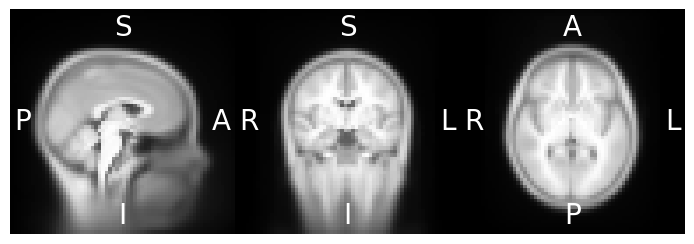

In [16]:
im_temp.new_image_like(manat_arr.astype(np.float32)).plot_ortho(flat=True,xyz_lines=False,orient_labels=True,figsize=1.0)

In [17]:
flat_arr = anat_arr.reshape(nsubs,-1)
print(flat_arr.shape)
flat_arr = flat_arr[:,flat_arr.sum(axis=0)!=0]
print(flat_arr.shape)
#plt.imshow(anat_arr.reshape(100,-1))

(4836, 262144)


/data/aglinska/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:47: RuntimeWarning:

overflow encountered in reduce



(4836, 255754)


In [18]:
cmat_arr = np.corrcoef(flat_arr)
cmat_arr.shape

(4836, 4836)

In [19]:
cbar.set_label?

Object `cbar.set_label` not found.


Text(0, 0.5, 'Subjects')

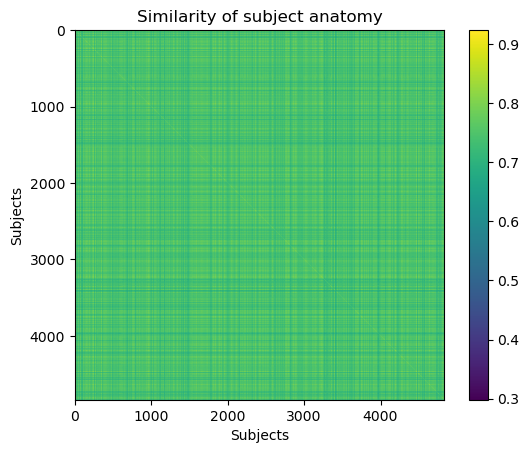

In [20]:
plt.imshow(cmat_arr,vmin=get_triu(cmat_arr).min(),vmax=get_triu(cmat_arr).max())
cbar = plt.colorbar()
plt.title('Similarity of subject anatomy')
plt.xlabel('Subjects')
plt.ylabel('Subjects')

In [21]:
mflat_arr = flat_arr.mean(axis=0)

In [22]:
corr2mean = [np.corrcoef(flat_arr[i,:],mflat_arr)[0,1] for i in tqdm(range(flat_arr.shape[0]))]

  0%|          | 0/4836 [00:00<?, ?it/s]

  0%|          | 22/4836 [00:00<00:22, 214.50it/s]

  1%|          | 46/4836 [00:00<00:21, 223.44it/s]

  1%|▏         | 70/4836 [00:00<00:20, 228.11it/s]

  2%|▏         | 94/4836 [00:00<00:20, 230.68it/s]

  2%|▏         | 118/4836 [00:00<00:20, 232.29it/s]

  3%|▎         | 142/4836 [00:00<00:20, 233.64it/s]

  3%|▎         | 166/4836 [00:00<00:20, 231.95it/s]

  4%|▍         | 190/4836 [00:00<00:19, 232.53it/s]

  4%|▍         | 214/4836 [00:00<00:19, 233.81it/s]

  5%|▍         | 238/4836 [00:01<00:19, 234.99it/s]

  5%|▌         | 262/4836 [00:01<00:19, 235.09it/s]

  6%|▌         | 286/4836 [00:01<00:19, 235.08it/s]

  6%|▋         | 310/4836 [00:01<00:19, 235.37it/s]

  7%|▋         | 334/4836 [00:01<00:19, 235.45it/s]

  7%|▋         | 358/4836 [00:01<00:19, 235.18it/s]

  8%|▊         | 382/4836 [00:01<00:18, 235.69it/s]

  8%|▊         | 406/4836 [00:01<00:18, 235.27it/s]

  9%|▉         | 430/4836 [00:01<00:18, 235.00it/s]

  9%|▉         | 454/4836 [00:01<00:18, 233.66it/s]

 10%|▉         | 478/4836 [00:02<00:18, 233.04it/s]

 10%|█         | 502/4836 [00:02<00:18, 234.18it/s]

 11%|█         | 526/4836 [00:02<00:18, 234.67it/s]

 11%|█▏        | 550/4836 [00:02<00:18, 234.47it/s]

 12%|█▏        | 574/4836 [00:02<00:18, 234.36it/s]

 12%|█▏        | 598/4836 [00:02<00:18, 233.21it/s]

 13%|█▎        | 622/4836 [00:02<00:18, 232.31it/s]

 13%|█▎        | 646/4836 [00:02<00:18, 231.88it/s]

 14%|█▍        | 670/4836 [00:02<00:18, 231.12it/s]

 14%|█▍        | 694/4836 [00:02<00:17, 230.83it/s]

 15%|█▍        | 718/4836 [00:03<00:17, 230.55it/s]

 15%|█▌        | 742/4836 [00:03<00:17, 230.45it/s]

 16%|█▌        | 766/4836 [00:03<00:17, 230.46it/s]

 16%|█▋        | 790/4836 [00:03<00:17, 230.78it/s]

 17%|█▋        | 814/4836 [00:03<00:17, 229.64it/s]

 17%|█▋        | 838/4836 [00:03<00:17, 229.82it/s]

 18%|█▊        | 862/4836 [00:03<00:17, 230.13it/s]

 18%|█▊        | 886/4836 [00:03<00:17, 229.86it/s]

 19%|█▉        | 909/4836 [00:03<00:17, 229.71it/s]

 19%|█▉        | 932/4836 [00:04<00:17, 220.21it/s]

 20%|█▉        | 955/4836 [00:04<00:17, 215.84it/s]

 20%|██        | 977/4836 [00:04<00:18, 212.81it/s]

 21%|██        | 1001/4836 [00:04<00:17, 219.44it/s]

 21%|██        | 1025/4836 [00:04<00:16, 224.23it/s]

 22%|██▏       | 1049/4836 [00:04<00:16, 226.97it/s]

 22%|██▏       | 1073/4836 [00:04<00:16, 230.11it/s]

 23%|██▎       | 1097/4836 [00:04<00:16, 232.11it/s]

 23%|██▎       | 1121/4836 [00:04<00:15, 233.48it/s]

 24%|██▎       | 1145/4836 [00:04<00:15, 234.27it/s]

 24%|██▍       | 1169/4836 [00:05<00:15, 235.36it/s]

 25%|██▍       | 1193/4836 [00:05<00:15, 235.41it/s]

 25%|██▌       | 1217/4836 [00:05<00:15, 235.44it/s]

 26%|██▌       | 1241/4836 [00:05<00:15, 235.96it/s]

 26%|██▌       | 1265/4836 [00:05<00:15, 236.05it/s]

 27%|██▋       | 1289/4836 [00:05<00:15, 235.86it/s]

 27%|██▋       | 1313/4836 [00:05<00:14, 236.42it/s]

 28%|██▊       | 1337/4836 [00:05<00:14, 236.25it/s]

 28%|██▊       | 1361/4836 [00:05<00:14, 236.93it/s]

 29%|██▊       | 1385/4836 [00:05<00:14, 236.59it/s]

 29%|██▉       | 1409/4836 [00:06<00:14, 236.84it/s]

 30%|██▉       | 1433/4836 [00:06<00:14, 236.05it/s]

 30%|███       | 1457/4836 [00:06<00:14, 236.45it/s]

 31%|███       | 1481/4836 [00:06<00:14, 236.45it/s]

 31%|███       | 1505/4836 [00:06<00:14, 236.82it/s]

 32%|███▏      | 1529/4836 [00:06<00:13, 237.05it/s]

 32%|███▏      | 1553/4836 [00:06<00:13, 237.24it/s]

 33%|███▎      | 1577/4836 [00:06<00:13, 237.07it/s]

 33%|███▎      | 1601/4836 [00:06<00:13, 237.41it/s]

 34%|███▎      | 1625/4836 [00:06<00:13, 237.52it/s]

 34%|███▍      | 1649/4836 [00:07<00:13, 237.32it/s]

 35%|███▍      | 1673/4836 [00:07<00:13, 237.29it/s]

 35%|███▌      | 1697/4836 [00:07<00:13, 236.22it/s]

 36%|███▌      | 1721/4836 [00:07<00:13, 236.34it/s]

 36%|███▌      | 1745/4836 [00:07<00:13, 234.70it/s]

 37%|███▋      | 1769/4836 [00:07<00:13, 233.27it/s]

 37%|███▋      | 1793/4836 [00:07<00:13, 232.03it/s]

 38%|███▊      | 1817/4836 [00:07<00:13, 231.56it/s]

 38%|███▊      | 1841/4836 [00:07<00:12, 231.60it/s]

 39%|███▊      | 1865/4836 [00:08<00:12, 229.93it/s]

 39%|███▉      | 1889/4836 [00:08<00:12, 230.07it/s]

 40%|███▉      | 1913/4836 [00:08<00:12, 230.73it/s]

 40%|████      | 1937/4836 [00:08<00:12, 230.54it/s]

 41%|████      | 1961/4836 [00:08<00:12, 230.81it/s]

 41%|████      | 1985/4836 [00:08<00:12, 228.88it/s]

 42%|████▏     | 2009/4836 [00:08<00:12, 229.11it/s]

 42%|████▏     | 2033/4836 [00:08<00:12, 229.49it/s]

 43%|████▎     | 2057/4836 [00:08<00:12, 230.11it/s]

 43%|████▎     | 2081/4836 [00:08<00:11, 230.53it/s]

 44%|████▎     | 2105/4836 [00:09<00:11, 232.27it/s]

 44%|████▍     | 2129/4836 [00:09<00:11, 233.30it/s]

 45%|████▍     | 2153/4836 [00:09<00:11, 234.18it/s]

 45%|████▌     | 2177/4836 [00:09<00:11, 234.76it/s]

 46%|████▌     | 2201/4836 [00:09<00:11, 235.11it/s]

 46%|████▌     | 2225/4836 [00:09<00:11, 235.25it/s]

 47%|████▋     | 2249/4836 [00:09<00:10, 235.37it/s]

 47%|████▋     | 2273/4836 [00:09<00:10, 235.97it/s]

 47%|████▋     | 2297/4836 [00:09<00:10, 235.71it/s]

 48%|████▊     | 2321/4836 [00:09<00:10, 235.66it/s]

 48%|████▊     | 2345/4836 [00:10<00:10, 235.83it/s]

 49%|████▉     | 2369/4836 [00:10<00:10, 235.84it/s]

 49%|████▉     | 2393/4836 [00:10<00:10, 235.96it/s]

 50%|████▉     | 2417/4836 [00:10<00:10, 236.16it/s]

 50%|█████     | 2441/4836 [00:10<00:10, 236.07it/s]

 51%|█████     | 2465/4836 [00:10<00:10, 235.96it/s]

 51%|█████▏    | 2489/4836 [00:10<00:09, 236.54it/s]

 52%|█████▏    | 2513/4836 [00:10<00:09, 236.86it/s]

 52%|█████▏    | 2537/4836 [00:10<00:09, 236.84it/s]

 53%|█████▎    | 2561/4836 [00:10<00:09, 236.53it/s]

 53%|█████▎    | 2585/4836 [00:11<00:09, 236.84it/s]

 54%|█████▍    | 2609/4836 [00:11<00:09, 236.63it/s]

 54%|█████▍    | 2633/4836 [00:11<00:09, 236.43it/s]

 55%|█████▍    | 2657/4836 [00:11<00:09, 236.38it/s]

 55%|█████▌    | 2681/4836 [00:11<00:09, 236.44it/s]

 56%|█████▌    | 2705/4836 [00:11<00:09, 236.34it/s]

 56%|█████▋    | 2729/4836 [00:11<00:08, 236.00it/s]

 57%|█████▋    | 2753/4836 [00:11<00:08, 236.03it/s]

 57%|█████▋    | 2777/4836 [00:11<00:08, 236.24it/s]

 58%|█████▊    | 2801/4836 [00:12<00:08, 236.01it/s]

 58%|█████▊    | 2825/4836 [00:12<00:08, 234.35it/s]

 59%|█████▉    | 2849/4836 [00:12<00:08, 233.24it/s]

 59%|█████▉    | 2873/4836 [00:12<00:08, 232.43it/s]

 60%|█████▉    | 2897/4836 [00:12<00:08, 231.35it/s]

 60%|██████    | 2921/4836 [00:12<00:08, 229.84it/s]

 61%|██████    | 2945/4836 [00:12<00:08, 229.89it/s]

 61%|██████▏   | 2969/4836 [00:12<00:08, 230.07it/s]

 62%|██████▏   | 2993/4836 [00:12<00:08, 230.22it/s]

 62%|██████▏   | 3017/4836 [00:12<00:07, 230.31it/s]

 63%|██████▎   | 3041/4836 [00:13<00:07, 230.28it/s]

 63%|██████▎   | 3065/4836 [00:13<00:07, 230.23it/s]

 64%|██████▍   | 3089/4836 [00:13<00:07, 230.15it/s]

 64%|██████▍   | 3113/4836 [00:13<00:07, 226.82it/s]

 65%|██████▍   | 3136/4836 [00:13<00:07, 227.70it/s]

 65%|██████▌   | 3160/4836 [00:13<00:07, 229.55it/s]

 66%|██████▌   | 3184/4836 [00:13<00:07, 231.79it/s]

 66%|██████▋   | 3208/4836 [00:13<00:06, 232.69it/s]

 67%|██████▋   | 3232/4836 [00:13<00:06, 233.54it/s]

 67%|██████▋   | 3256/4836 [00:13<00:06, 234.38it/s]

 68%|██████▊   | 3280/4836 [00:14<00:06, 234.78it/s]

 68%|██████▊   | 3304/4836 [00:14<00:06, 234.57it/s]

 69%|██████▉   | 3328/4836 [00:14<00:06, 234.83it/s]

 69%|██████▉   | 3352/4836 [00:14<00:06, 234.94it/s]

 70%|██████▉   | 3376/4836 [00:14<00:06, 234.89it/s]

 70%|███████   | 3400/4836 [00:14<00:06, 235.14it/s]

 71%|███████   | 3424/4836 [00:14<00:05, 235.39it/s]

 71%|███████▏  | 3448/4836 [00:14<00:05, 235.57it/s]

 72%|███████▏  | 3472/4836 [00:14<00:05, 235.76it/s]

 72%|███████▏  | 3496/4836 [00:14<00:05, 236.18it/s]

 73%|███████▎  | 3520/4836 [00:15<00:05, 236.22it/s]

 73%|███████▎  | 3544/4836 [00:15<00:05, 236.21it/s]

 74%|███████▍  | 3568/4836 [00:15<00:05, 236.33it/s]

 74%|███████▍  | 3592/4836 [00:15<00:05, 236.35it/s]

 75%|███████▍  | 3616/4836 [00:15<00:05, 236.18it/s]

 75%|███████▌  | 3640/4836 [00:15<00:05, 236.52it/s]

 76%|███████▌  | 3664/4836 [00:15<00:04, 235.76it/s]

 76%|███████▋  | 3688/4836 [00:15<00:04, 236.20it/s]

 77%|███████▋  | 3712/4836 [00:15<00:04, 236.17it/s]

 77%|███████▋  | 3736/4836 [00:16<00:04, 236.31it/s]

 78%|███████▊  | 3760/4836 [00:16<00:04, 236.44it/s]

 78%|███████▊  | 3784/4836 [00:16<00:04, 236.39it/s]

 79%|███████▊  | 3808/4836 [00:16<00:04, 236.71it/s]

 79%|███████▉  | 3832/4836 [00:16<00:04, 236.68it/s]

 80%|███████▉  | 3856/4836 [00:16<00:04, 236.81it/s]

 80%|████████  | 3880/4836 [00:16<00:04, 236.04it/s]

 81%|████████  | 3904/4836 [00:16<00:03, 234.18it/s]

 81%|████████  | 3928/4836 [00:16<00:03, 232.06it/s]

 82%|████████▏ | 3952/4836 [00:16<00:03, 231.37it/s]

 82%|████████▏ | 3976/4836 [00:17<00:03, 230.31it/s]

 83%|████████▎ | 4000/4836 [00:17<00:03, 230.42it/s]

 83%|████████▎ | 4024/4836 [00:17<00:03, 230.46it/s]

 84%|████████▎ | 4048/4836 [00:17<00:03, 230.48it/s]

 84%|████████▍ | 4072/4836 [00:17<00:03, 230.62it/s]

 85%|████████▍ | 4096/4836 [00:17<00:03, 230.66it/s]

 85%|████████▌ | 4120/4836 [00:17<00:03, 230.60it/s]

 86%|████████▌ | 4144/4836 [00:17<00:03, 230.23it/s]

 86%|████████▌ | 4168/4836 [00:17<00:02, 229.84it/s]

 87%|████████▋ | 4191/4836 [00:17<00:02, 228.87it/s]

 87%|████████▋ | 4214/4836 [00:18<00:02, 229.01it/s]

 88%|████████▊ | 4238/4836 [00:18<00:02, 229.95it/s]

 88%|████████▊ | 4262/4836 [00:18<00:02, 231.67it/s]

 89%|████████▊ | 4286/4836 [00:18<00:02, 232.91it/s]

 89%|████████▉ | 4310/4836 [00:18<00:02, 233.69it/s]

 90%|████████▉ | 4334/4836 [00:18<00:02, 234.12it/s]

 90%|█████████ | 4358/4836 [00:18<00:02, 234.44it/s]

 91%|█████████ | 4382/4836 [00:18<00:01, 234.78it/s]

 91%|█████████ | 4406/4836 [00:18<00:01, 235.28it/s]

 92%|█████████▏| 4430/4836 [00:18<00:01, 235.60it/s]

 92%|█████████▏| 4454/4836 [00:19<00:01, 235.81it/s]

 93%|█████████▎| 4478/4836 [00:19<00:01, 235.80it/s]

 93%|█████████▎| 4502/4836 [00:19<00:01, 236.00it/s]

 94%|█████████▎| 4526/4836 [00:19<00:01, 235.67it/s]

 94%|█████████▍| 4550/4836 [00:19<00:01, 235.45it/s]

 95%|█████████▍| 4574/4836 [00:19<00:01, 235.80it/s]

 95%|█████████▌| 4598/4836 [00:19<00:01, 235.05it/s]

 96%|█████████▌| 4622/4836 [00:19<00:00, 234.85it/s]

 96%|█████████▌| 4646/4836 [00:19<00:00, 235.18it/s]

 97%|█████████▋| 4670/4836 [00:20<00:00, 235.26it/s]

 97%|█████████▋| 4694/4836 [00:20<00:00, 235.58it/s]

 98%|█████████▊| 4718/4836 [00:20<00:00, 235.64it/s]

 98%|█████████▊| 4742/4836 [00:20<00:00, 235.62it/s]

 99%|█████████▊| 4766/4836 [00:20<00:00, 235.50it/s]

 99%|█████████▉| 4790/4836 [00:20<00:00, 234.74it/s]

100%|█████████▉| 4814/4836 [00:20<00:00, 235.14it/s]

100%|██████████| 4836/4836 [00:20<00:00, 233.41it/s]

Text(0.5, 0, 'correlation with mean image')

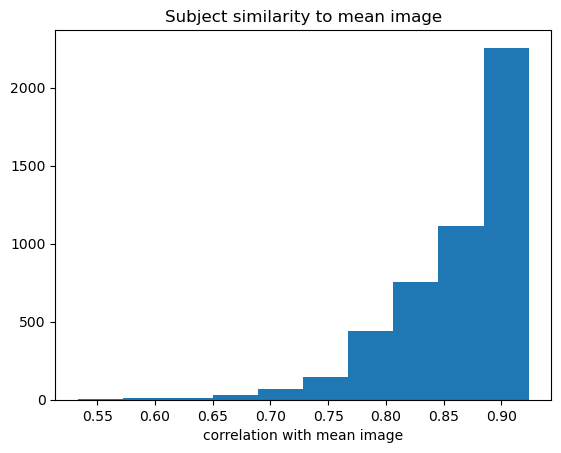

In [23]:
plt.hist(corr2mean)
plt.title('Subject similarity to mean image')
plt.xlabel('correlation with mean image')

In [24]:
argsort = np.argsort(corr2mean)

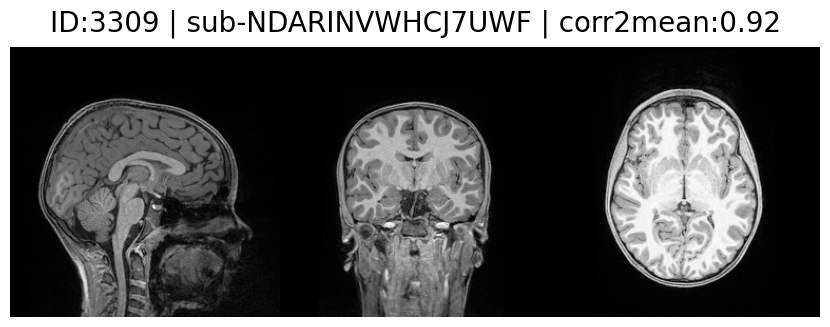

In [25]:
i = len(argsort)-1
ants.image_read(fn_temp.format(sub=folders[argsort[i]])).plot_ortho(flat=True,xyz_lines=False,orient_labels=False,title=f'ID:{argsort[i]} | {folders[argsort[i]]} | corr2mean:{corr2mean[argsort[i]]:.2f}',figsize=1.2,titlefontsize=20)

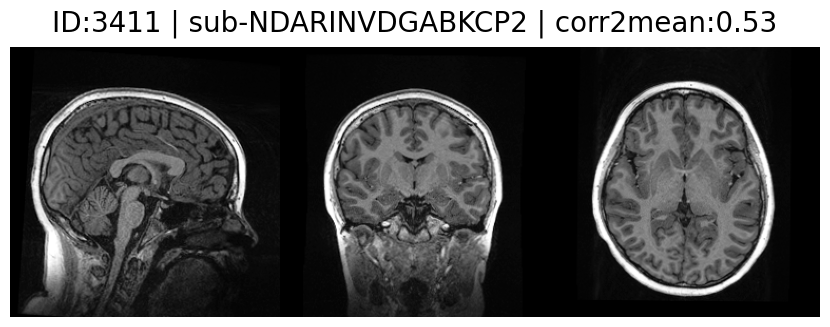

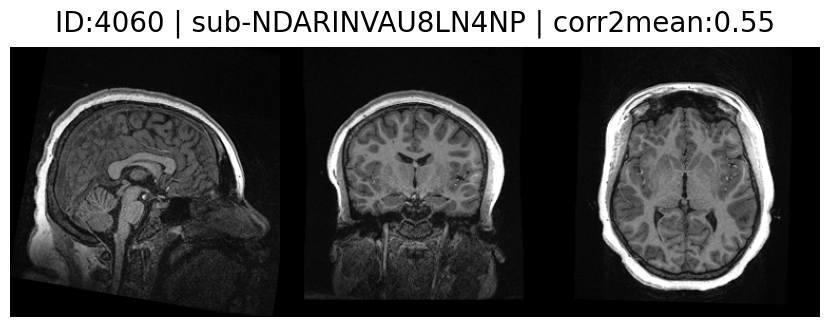

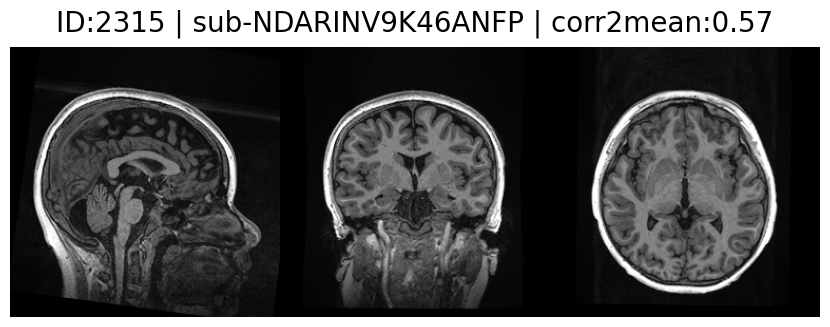

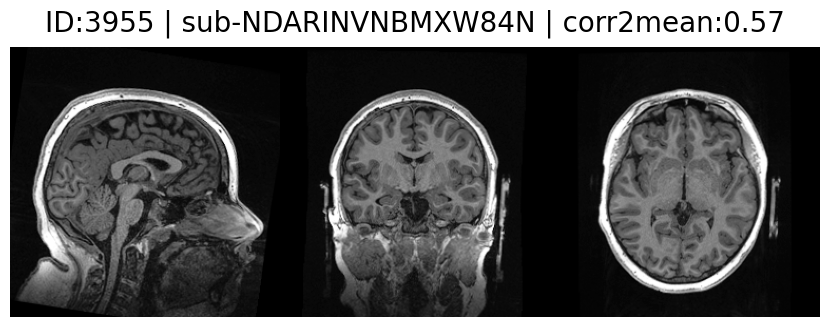

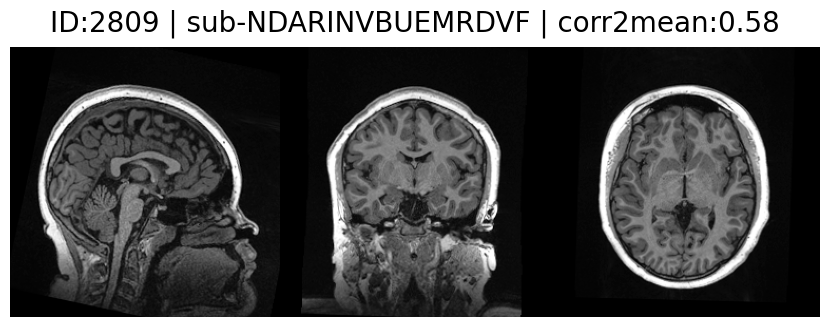

In [26]:
for i in range(5):
    ants.image_read(fn_temp.format(sub=folders[argsort[i]])).plot_ortho(flat=True,xyz_lines=False,orient_labels=False,title=f'ID:{argsort[i]} | {folders[argsort[i]]} | corr2mean:{corr2mean[argsort[i]]:.2f}',figsize=1.2,titlefontsize=20)